<a href="https://colab.research.google.com/github/woojoo123/Project/blob/main/Lung_lesion_detection/EDA_%2B_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,973 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and dire

# EDA

## train.csv ÌååÏùº Î°úÎìú

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/vinbigdata/train.csv')
train_df.head()

image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  width  height  
0     NaN     NaN     NaN     NaN   2332    2580  
1     NaN     NaN     NaN     NaN   2954    3159  
2   691.0  1375.0  1653.0  1831.0   2080    2336  
3  1264.0   743.0  1611.0  1019.0   2304    2880  
4     NaN     NaN     NaN     NaN   2540    3072

In [ ]:
# ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò ÌôïÏù∏
class_counts = train_df["class_name"].value_counts()
print(class_counts)

class_name
No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: count, dtype: int64


## ÌèêÏôÄ Í¥ÄÎ†® ÏóÜÎäî ÏßàÌôòÏ†úÍ±∞

In [ ]:
# Ï†úÍ±∞Ìï† ÌÅ¥ÎûòÏä§ Î¶¨Ïä§Ìä∏
remove_classes = ["Aortic enlargement", "Calcification", "Cardiomegaly"]

# ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Í∏∞
filtered_train_df = train_df[~train_df["class_name"].isin(remove_classes)].copy()

# Í≤∞Í≥º ÌôïÏù∏
print(filtered_train_df["class_name"].value_counts())
print(f"ÌïÑÌÑ∞ÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {filtered_train_df.shape[0]}")

class_name
No finding            31818
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: count, dtype: int64
ÌïÑÌÑ∞ÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 54365


## Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ ÎπÑÏú® ÌôïÏù∏

In [ ]:
# Ï†ïÏÉÅ vs ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
normal_count = filtered_train_df[filtered_train_df["class_name"] == "No finding"].shape[0]
abnormal_count = filtered_train_df[filtered_train_df["class_name"] != "No finding"].shape[0]

print(f"Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {normal_count}")
print(f"ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {abnormal_count}")

Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 31818
ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 22547


## ÌÅ¥ÎûòÏä§Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÏãúÍ∞ÅÌôî

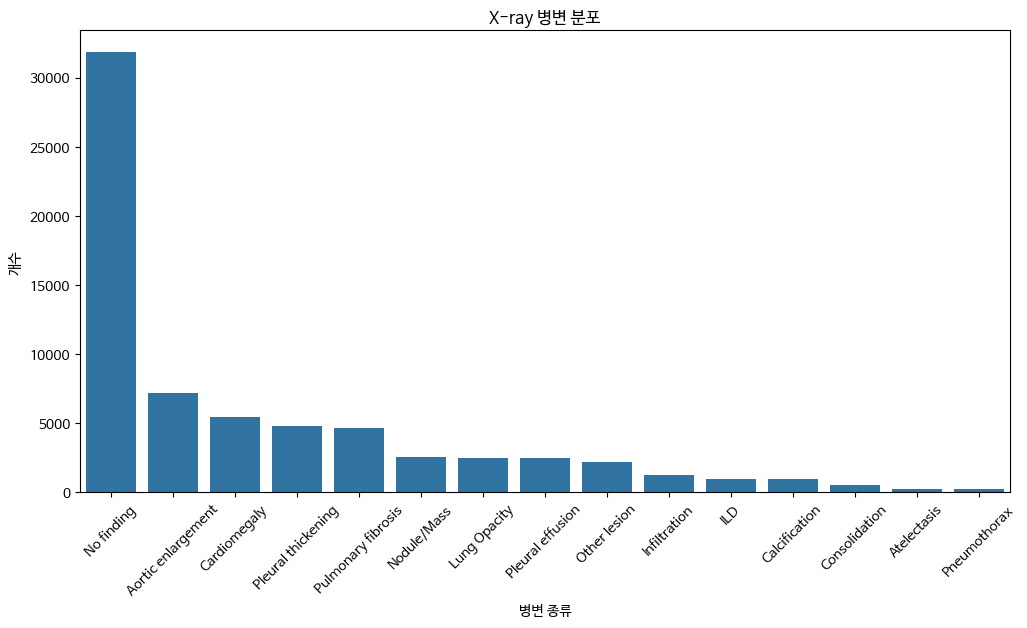

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ÌÅ¥ÎûòÏä§Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
class_counts = train_df["class_name"].value_counts()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Î≥ëÎ≥Ä Ï¢ÖÎ•ò")
plt.ylabel("Í∞úÏàò")
plt.title("X-ray Î≥ëÎ≥Ä Î∂ÑÌè¨")
plt.show()

## Î∞îÏö¥Îî© Î∞ïÏä§ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏÑ†ÌÉù (Ïó¨Í∏∞ÏÑúÎäî Ï≤´ Î≤àÏß∏ ÎπÑÏ†ïÏÉÅ Ïù¥ÎØ∏ÏßÄ ÏÑ†ÌÉù)
sample_image_id = train_df[train_df["class_name"] != "No finding"]["image_id"].iloc[2]
sample_image_path = f"/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/vinbigdata/train/{sample_image_id}.png"

# Ïù¥ÎØ∏ÏßÄ Î°úÎìú
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Î∞îÏö¥Îî© Î∞ïÏä§ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
bbox_info = train_df[train_df["image_id"] == sample_image_id]

# Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
for _, row in bbox_info.iterrows():
    if pd.notna(row["x_min"]):
        x_min, y_min, x_max, y_max = int(row["x_min"]), int(row["y_min"]), int(row["x_max"]), int(row["y_max"])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis("off")
plt.title(f"X-ray with Bounding Boxes ({sample_image_id})")
plt.show()

NameError: name 'train_df' is not defined

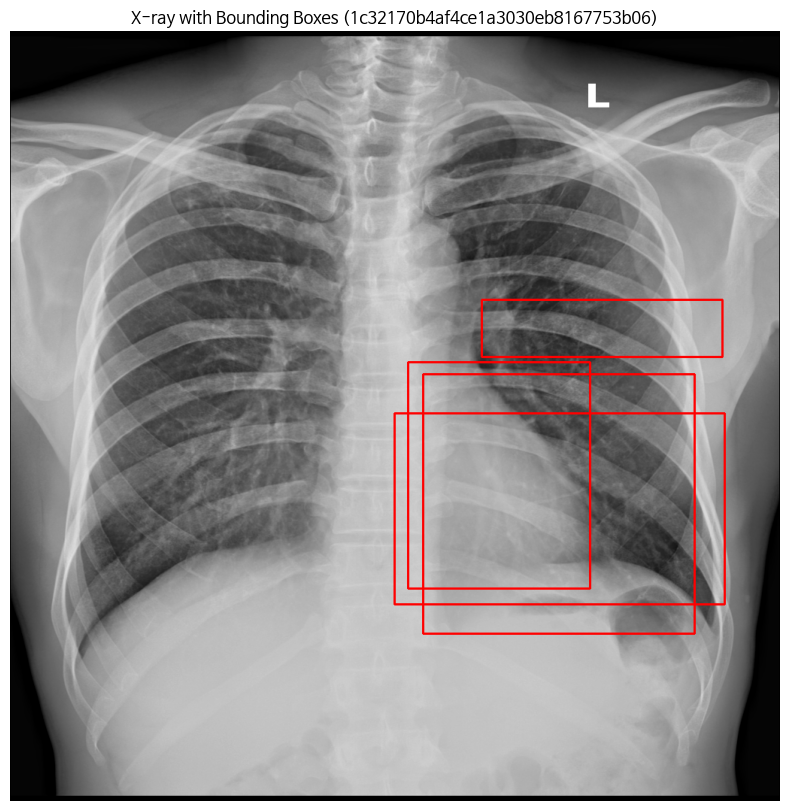

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏÑ†ÌÉù (Ïó¨Í∏∞ÏÑúÎäî Ï≤´ Î≤àÏß∏ ÎπÑÏ†ïÏÉÅ Ïù¥ÎØ∏ÏßÄ ÏÑ†ÌÉù)
sample_image_id = train_df[train_df["class_name"] != "No finding"]["image_id"].iloc[2]
sample_image_path = f"/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/vinbigdata/train/{sample_image_id}.png"

# Ïù¥ÎØ∏ÏßÄ Î°úÎìú
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Î∞îÏö¥Îî© Î∞ïÏä§ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
bbox_info = train_df[train_df["image_id"] == sample_image_id]

# Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
for _, row in bbox_info.iterrows():
    if pd.notna(row["x_min"]):
        x_min, y_min, x_max, y_max = int(row["x_min"]), int(row["y_min"]), int(row["x_max"]), int(row["y_max"])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis("off")
plt.title(f"X-ray with Bounding Boxes ({sample_image_id})")
plt.show()

# Preprocessing

## Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú Ï†ïÍ∑úÌôî
- Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëúÎ•º [0, 1] Î≤îÏúÑÎ°ú Î≥ÄÌôòÌï¥Ïïº YOLO Îì±Ïùò Î™®Îç∏ÏóêÏÑú ÏÇ¨Ïö© Í∞ÄÎä•!

In [ ]:
import cv2
import os

# Îç∞Ïù¥ÌÑ∞ÏÖã Ìè¥Îçî Í≤ΩÎ°ú
dataset_path = "/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/vinbigdata/train"

# ÏûÑÏùòÏùò Ïù¥ÎØ∏ÏßÄ ÌïòÎÇò Î∂àÎü¨ÏôÄÏÑú ÌÅ¨Í∏∞ ÌôïÏù∏
sample_image_path = os.path.join(dataset_path, os.listdir(dataset_path)[3])
image = cv2.imread(sample_image_path)

# Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï∂úÎ†•
print(f"ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: {image.shape[:2]} (ÎÜíÏù¥, ÎÑàÎπÑ)")

ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: (1024, 1024) (ÎÜíÏù¥, ÎÑàÎπÑ)


In [ ]:
# Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú Ï†ïÍ∑úÌôî Ìï®Ïàò
def normalize_bbox(row):
    row["x_min"] /= row["width"]
    row["y_min"] /= row["height"]
    row["x_max"] /= row["width"]
    row["y_max"] /= row["height"]
    return row

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï†ïÍ∑úÌôî Ï†ÅÏö©
filtered_train_df = filtered_train_df.apply(normalize_bbox, axis=1)

# Î≥ÄÌôò Í≤∞Í≥º ÌôïÏù∏
print(filtered_train_df.head())

                           image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   
5  1c32170b4af4ce1a3030eb8167753b06  Pleural thickening        11     R9   
6  0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD         5    R17   

      x_min     y_min     x_max     y_max  width  height  
0       NaN       NaN       NaN       NaN   2332    2580  
1       NaN       NaN       NaN       NaN   2954    3159  
4       NaN       NaN       NaN       NaN   2540    3072  
5  0.246850  0.116211  0.372835  0.140951   2540    3072  
6  0.589497  0.095890  0.957549  0.848924   2285    2555  


In [ ]:
filtered_train_df.to_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/filtered_train_df.csv')

In [ ]:
# rm -rf "/content/train_augmented"

In [ ]:
import os

# Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî Í≤ΩÎ°ú
image_folder = "/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/vinbigdata/train"

# ÌååÏùº Í∞úÏàò ÌôïÏù∏
if os.path.exists(image_folder):
    image_files = os.listdir(image_folder)
    print(f"‚úÖ Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî ÎÇ¥ ÌååÏùº Í∞úÏàò: {len(image_files)}")
    print("üìÇ ÏÉòÌîå ÌååÏùº 5Í∞ú:", image_files[:5])  # ÏùºÎ∂Ä ÌååÏùº Ï∂úÎ†•
else:
    print(f"‚ùå Ìè¥ÎçîÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå: {image_folder}")

‚úÖ Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî ÎÇ¥ ÌååÏùº Í∞úÏàò: 15000
üìÇ ÏÉòÌîå ÌååÏùº 5Í∞ú: ['ede3e4041468a91f1a8027aeaa10e540.png', 'eda707d79298458f23f778b0c8229d73.png', 'ed9f5c40c389c115089e5a8f15e162b0.png', 'ee387adc8e34dcbb696539dcbb626a9d.png', 'ee3b2a3399a40af7703ce312d43df635.png']


## filtered Í∏∞Ï§ÄÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ Îã§Ïãú Ï†ÄÏû•

In [ ]:
import os
import shutil
import pandas as pd
from multiprocessing import Pool

# Í≤ΩÎ°ú ÏÑ§Ï†ï
csv_path = "/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/filtered_train_df.csv"
original_images_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/vinbigdata/train"

# Colab Î°úÏª¨ Ï†ÄÏû•ÏÜå (/content/)Ïóê Î®ºÏ†Ä Ï†ÄÏû• (Google DriveÎ≥¥Îã§ Îπ†Î¶Ñ)
temp_filtered_images_path = "/content/filtered_images"
os.makedirs(temp_filtered_images_path, exist_ok=True)

# ÏµúÏ¢Ö Google Drive Ï†ÄÏû• Í≤ΩÎ°ú
filtered_images_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/filtered_data/filtered_images"
os.makedirs(filtered_images_path, exist_ok=True)

# CSV Î°úÎìú
filtered_df = pd.read_csv(csv_path)
image_list = filtered_df["image_id"].unique()

# Î©ÄÌã∞ ÌîÑÎ°úÏÑ∏Ïã±ÏùÑ ÌôúÏö©Ìïú Î≥ëÎ†¨ Î≥µÏÇ¨ (ÏÜçÎèÑ Ìñ•ÏÉÅ)
def copy_image(image_id):
    src_path = os.path.join(original_images_path, f"{image_id}.png")
    dest_path = os.path.join(temp_filtered_images_path, f"{image_id}.png")

    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)  # copy2 ÎåÄÏã† copy ÏÇ¨Ïö© (Îçî Îπ†Î¶Ñ)
        return True
    return False

# Î≥ëÎ†¨ Î≥µÏÇ¨ Ïã§Ìñâ
with Pool(processes=4) as pool:  # CPU 4Í∞ú ÏÇ¨Ïö© (Ïà´Ïûê Ï°∞Ï†ï Í∞ÄÎä•)
    results = pool.map(copy_image, image_list)

# ColabÏóêÏÑú Google DriveÎ°ú Ìïú Î≤àÏóê Ïù¥Îèô (ÏÜçÎèÑ Ìñ•ÏÉÅ)
shutil.copytree(temp_filtered_images_path, filtered_images_path, dirs_exist_ok=True)

print(f"‚úÖ Ï¥ù {sum(results)}Í∞úÏùò Ïù¥ÎØ∏ÏßÄ Î≥µÏÇ¨ ÏôÑÎ£å! ")

‚úÖ Ï¥ù 14018Í∞úÏùò Ïù¥ÎØ∏ÏßÄ Î≥µÏÇ¨ ÏôÑÎ£å! 


In [ ]:
import os

filtered_images_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/filtered_data/filtered_images"

if os.path.exists(filtered_images_path):
    image_files = os.listdir(filtered_images_path)
    print(f"‚úÖ `filtered_train_df.csv` Í∏∞Ï§ÄÏúºÎ°ú Ï†ÄÏû•Îêú Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: {len(image_files)}")
    print("üìÇ ÏÉòÌîå ÌååÏùº 5Í∞ú:", image_files[:5])
else:
    print(f"‚ùå Ìè¥ÎçîÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå: {filtered_images_path}")

‚úÖ `filtered_train_df.csv` Í∏∞Ï§ÄÏúºÎ°ú Ï†ÄÏû•Îêú Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: 14018
üìÇ ÏÉòÌîå ÌååÏùº 5Í∞ú: ['48e258ce61a71b27f93233e021024be8.png', '4cccd244506af875fc9d2a32ad2b4b96.png', '64f9b6387d002d481fb99ac6ad4da695.png', '133ed9054828b0e75987e00217aef89d.png', '17f57814aa95b2294e9fd97cc27c995e.png']


## Ï¥ù Î≥ëÎ≥Ä Í∞úÏàò

In [ ]:
pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/filtered_data/filtered_train_df.csv')

image_id          class_name  class_id rad_id  \
0      50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1      21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2      063319de25ce7edb9b1c6b8881290140          No finding        14    R10   
3      1c32170b4af4ce1a3030eb8167753b06  Pleural thickening        11     R9   
4      0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD         5    R17   
...                                 ...                 ...       ...    ...   
54360  db169d0be36123bd55b866d6aa73983b        Other lesion         9     R8   
54361  936fd5cff1c058d39817a08f58b72cae          No finding        14     R1   
54362  ca7e72954550eeb610fe22bf0244b7fa          No finding        14     R1   
54363  aa17d5312a0fb4a2939436abca7f9579          No finding        14     R8   
54364  5e272e3adbdaafb07a7e84a9e62b1a4c          No finding        14    R16   

          x_min     y_min     x_max     y_max  width  height  
0           NaN       NaN       NaN       NaN   2332    2580  
1           NaN       NaN       NaN       NaN   2954    3159  
2           NaN       NaN       NaN       NaN   2540    3072  
3      0.246850  0.116211  0.372835  0.140951   2540    3072  
4      0.589497  0.095890  0.957549  0.848924   2285    2555  
...         ...       ...       ...       ...    ...     ...  
54360  0.002604  0.232639  0.118056  0.602778   2304    2880  
54361       NaN       NaN       NaN       NaN   2444    3200  
54362       NaN       NaN       NaN       NaN   1994    2430  
54363       NaN       NaN       NaN       NaN   2048    2500  
54364       NaN       NaN       NaN       NaN   2048    2500  

[54365 rows x 10 columns]

In [ ]:
pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/filtered_train_df.csv')

image_id          class_name  class_id rad_id  \
0      50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1      21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2      063319de25ce7edb9b1c6b8881290140          No finding        14    R10   
3      1c32170b4af4ce1a3030eb8167753b06  Pleural thickening        11     R9   
4      0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD         5    R17   
...                                 ...                 ...       ...    ...   
54360  db169d0be36123bd55b866d6aa73983b        Other lesion         9     R8   
54361  936fd5cff1c058d39817a08f58b72cae          No finding        14     R1   
54362  ca7e72954550eeb610fe22bf0244b7fa          No finding        14     R1   
54363  aa17d5312a0fb4a2939436abca7f9579          No finding        14     R8   
54364  5e272e3adbdaafb07a7e84a9e62b1a4c          No finding        14    R16   

          x_min     y_min     x_max     y_max  width  height  
0           NaN       NaN       NaN       NaN   2332    2580  
1           NaN       NaN       NaN       NaN   2954    3159  
2           NaN       NaN       NaN       NaN   2540    3072  
3      0.246850  0.116211  0.372835  0.140951   2540    3072  
4      0.589497  0.095890  0.957549  0.848924   2285    2555  
...         ...       ...       ...       ...    ...     ...  
54360  0.002604  0.232639  0.118056  0.602778   2304    2880  
54361       NaN       NaN       NaN       NaN   2444    3200  
54362       NaN       NaN       NaN       NaN   1994    2430  
54363       NaN       NaN       NaN       NaN   2048    2500  
54364       NaN       NaN       NaN       NaN   2048    2500  

[54365 rows x 10 columns]

## Ïã§Ï†ú X-ray Ïù¥ÎØ∏ÏßÄ Í∞úÏàò

In [ ]:
import pandas as pd

# CSV ÌååÏùº Î°úÎìú
csv_path = "/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/filtered_train_df.csv"
train_df = pd.read_csv(csv_path)

# Í≥†Ïú†Ìïú X-ray Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ÌôïÏù∏
unique_images = train_df["image_id"].nunique()

print(f"Ïã§Ï†ú X-ray Ïù¥ÎØ∏ÏßÄ Í∞úÏàò (Í≥†Ïú†Ìïú image_id Í∞úÏàò): {unique_images}")

Ïã§Ï†ú X-ray Ïù¥ÎØ∏ÏßÄ Í∞úÏàò (Í≥†Ïú†Ìïú image_id Í∞úÏàò): 14018


## X-ray Ïù¥ÎØ∏ÏßÄÎãπ Î≥ëÎ≥Ä Í∞úÏàò ÌôïÏù∏ÌïòÍ∏∞

In [ ]:
import pandas as pd

# CSV ÌååÏùº Î°úÎìú
csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/filtered_train_df.csv"
train_df = pd.read_csv(csv_path)

# Í∞Å X-ray Ïù¥ÎØ∏ÏßÄÎãπ Î≥ëÎ≥Ä Í∞úÏàò Í≥ÑÏÇ∞
lesion_counts = train_df["image_id"].value_counts()

# Î≥ëÎ≥Ä Í∞úÏàò ÌÜµÍ≥Ñ Ï∂úÎ†•
print(f"X-ray Ìïú Ïû•Îãπ ÌèâÍ∑† Î≥ëÎ≥Ä Í∞úÏàò: {lesion_counts.mean():.2f}")
print(f"X-rayÎãπ Î≥ëÎ≥Ä Í∞úÏàò Î∂ÑÌè¨:\n{lesion_counts.describe()}")

X-ray Ìïú Ïû•Îãπ ÌèâÍ∑† Î≥ëÎ≥Ä Í∞úÏàò: 3.88
X-rayÎãπ Î≥ëÎ≥Ä Í∞úÏàò Î∂ÑÌè¨:
count    14018.000000
mean         3.878228
std          3.036802
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max         57.000000
Name: count, dtype: float64


## X-ray Í∞úÏàò Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏

In [ ]:
import pandas as pd

# CSV ÌååÏùº Î°úÎìú
csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/filtered_train_df.csv"
train_df = pd.read_csv(csv_path)

# `image_id` Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ ÎùºÎ≤® ÏÑ§Ï†ï
train_df["label"] = train_df["class_name"].apply(lambda x: "normal" if x == "No finding" else "abnormal")

# Í∞ôÏùÄ `image_id`Í∞Ä Ïó¨Îü¨ Î≤à Îì±Ïû•ÌïòÎäî Í±∏ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ uniqueÌïú X-ray Í∞úÏàòÎßå ÌôïÏù∏
unique_images = train_df.groupby("image_id")["label"].first().reset_index()

# Ï†ïÏÉÅ / ÎπÑÏ†ïÏÉÅ Í∞úÏàò ÌôïÏù∏
class_counts = unique_images["label"].value_counts()
print(f"Ï†ïÏÉÅ X-ray Í∞úÏàò: {class_counts['normal']}")
print(f"ÎπÑÏ†ïÏÉÅ X-ray Í∞úÏàò: {class_counts['abnormal']}")

Ï†ïÏÉÅ X-ray Í∞úÏàò: 10606
ÎπÑÏ†ïÏÉÅ X-ray Í∞úÏàò: 3412


In [ ]:
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
labels = ["Normal", "Abnormal"]
counts = [10606, 3412]

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=["blue", "red"])
plt.ylabel("Count")
plt.xlabel("Label")
plt.title("Distribution of Normal vs. Abnormal X-ray Images")

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()

## Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
import shutil

# Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏ ÏÑ§Ï†ï
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.1),
    A.Rotate(limit=10, p=0.3),
])

# Í≤ΩÎ°ú ÏÑ§Ï†ï
input_dir = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/vinbigdata/train"
output_dir = "/content/train_augmented/images"
os.makedirs(output_dir, exist_ok=True)

# CSV Î°úÎìú (filtered_train_df.csv ÏÇ¨Ïö©)
csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/filtered_train_df.csv"
train_df = pd.read_csv(csv_path)

# `image_id` Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ ÎùºÎ≤® ÏÑ§Ï†ï
train_df["label"] = train_df["class_name"].apply(lambda x: "normal" if x == "No finding" else "abnormal")

# Í∞ôÏùÄ `image_id`Í∞Ä Ïó¨Îü¨ Î≤à Îì±Ïû•ÌïòÎäî Í±∏ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ uniqueÌïú X-ray Í∏∞Ï§ÄÏúºÎ°ú ÌïÑÌÑ∞ÎßÅ
unique_images = train_df.groupby("image_id")["label"].first().reset_index()

# ÎπÑÏ†ïÏÉÅ X-rayÎßå ÌïÑÌÑ∞ÎßÅ
abnormal_df = unique_images[unique_images["label"] == "abnormal"]

# ÎπÑÏ†ïÏÉÅ X-rayÎßå Ï¶ùÍ∞ï ÏàòÌñâ
augmented_images = []

for _, row in tqdm(abnormal_df.iterrows(), total=len(abnormal_df)):
    image_id = row["image_id"]
    image_path = os.path.join(input_dir, f"{image_id}.png")

    # Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÌôïÏù∏
    if not os.path.exists(image_path):
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {image_path}")
        continue

    # Ï¶ùÍ∞ï ÏàòÌñâ (Í∞Å Ïù¥ÎØ∏ÏßÄÎãπ 2Ìöå Ï∂îÍ∞Ä Ï¶ùÍ∞ï)
    for i in range(2):
        augmented = transform(image=image)["image"]
        augmented = np.clip(augmented, 0, 255).astype(np.uint8)  # uint8 Î≥ÄÌôò

        new_image_name = f"{image_id}_aug{i}.png"
        output_path = os.path.join(output_dir, new_image_name)

        # Ï†ÄÏû•
        cv2.imwrite(output_path, augmented)

        # Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ Ï∂îÍ∞Ä
        new_row = row.copy()
        new_row["image_id"] = new_image_name
        augmented_images.append(new_row)

print("‚úÖ Î™®Îì† ÎπÑÏ†ïÏÉÅ X-ray Ï¶ùÍ∞ï ÏôÑÎ£å!")

# **Google DriveÎ°ú Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Ïù¥Îèô**
drive_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_augmented/images"
os.makedirs(drive_path, exist_ok=True)  # Google Drive Ìè¥ÎçîÍ∞Ä ÏóÜÏúºÎ©¥ ÏÉùÏÑ±
shutil.copytree(output_dir, drive_path, dirs_exist_ok=True)
print(f"ÏµúÏ¢Ö Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Google DriveÏóê Ï†ÄÏû• ÏôÑÎ£å: {drive_path}")


# **Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ CSV Ï†ÄÏû•**
csv_output_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_augmented.csv"
augmented_train_df = pd.concat([train_df, pd.DataFrame(augmented_images)], ignore_index=True)
augmented_train_df.to_csv(csv_output_path, index=False)

print(f"‚úÖ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏôÑÎ£å! ÏÉàÎ°úÏö¥ CSV Ï†ÄÏû•Îê®: {csv_output_path}")

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3412/3412 [15:20<00:00,  3.71it/s]


‚úÖ Î™®Îì† ÎπÑÏ†ïÏÉÅ X-ray Ï¶ùÍ∞ï ÏôÑÎ£å!
ÏµúÏ¢Ö Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Google DriveÏóê Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_augmented/images
‚úÖ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏôÑÎ£å! ÏÉàÎ°úÏö¥ CSV Ï†ÄÏû•Îê®: /content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_augmented.csv


In [ ]:
# CSV ÌååÏùº Î°úÎìú
csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_augmented/train_augmented.csv"
train_df = pd.read_csv(csv_path)

# Í≥†Ïú†Ìïú X-ray Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ÌôïÏù∏
unique_images = train_df["image_id"].nunique()

print(f"Ïã§Ï†ú X-ray Ïù¥ÎØ∏ÏßÄ Í∞úÏàò (Í≥†Ïú†Ìïú image_id Í∞úÏàò): {unique_images}")

Ïã§Ï†ú X-ray Ïù¥ÎØ∏ÏßÄ Í∞úÏàò (Í≥†Ïú†Ìïú image_id Í∞úÏàò): 20842


In [ ]:
import os

# Google DriveÏùò Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî Í≤ΩÎ°ú
drive_image_folder = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_augmented/images"

# Ìè¥Îçî ÎÇ¥ ÌååÏùº Í∞úÏàò ÌôïÏù∏
if os.path.exists(drive_image_folder):
    drive_image_files = os.listdir(drive_image_folder)
    print(f"‚úÖ Google DriveÏóê Ï†ÄÏû•Îêú Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: {len(drive_image_files)}")
    print("üìÇ ÏÉòÌîå ÌååÏùº 5Í∞ú:", drive_image_files[:5])  # ÏùºÎ∂Ä ÌååÏùº Ï∂úÎ†•
else:
    print(f"‚ùå Ìè¥ÎçîÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå: {drive_image_folder}")

‚úÖ Google DriveÏóê Ï†ÄÏû•Îêú Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: 6824
üìÇ ÏÉòÌîå ÌååÏùº 5Í∞ú: ['440d5de43270006800efa1caecede2f1_aug0.png', 'dd1ec1034edd4e6b9696ea5cbeca6168_aug1.png', 'c1ca66539955f94f6dbd74fb5ba7208d_aug1.png', 'a87dc1505bcdb64c00c84b096799bdab_aug0.png', 'c24029f31fb9ae265934082ce6b47d33_aug0.png']


## ÎùºÎ≤® Ï∂îÍ∞Ä

In [ ]:
import pandas as pd

# CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_augmented/train_augmented.csv"

# CSV Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(csv_path)

# Ï†ïÏÉÅ(Ï†ïÏÉÅ=No finding) / ÎπÑÏ†ïÏÉÅ(Í∑∏ Ïô∏) ÎùºÎ≤® Ï∂îÍ∞Ä
df["label"] = df["class_name"].apply(lambda x: 0 if x == "No finding" else 1)

# ÏÉàÎ°úÏö¥ CSV Ï†ÄÏû• (Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ ÎùºÎ≤® Ìè¨Ìï®)
df.to_csv("/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_augmented_label.csv", index=False)

print(f"`train_augmented.csv`Ïóê Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ ÎùºÎ≤® Ï∂îÍ∞Ä ÏôÑÎ£å!")

`train_augmented.csv`Ïóê Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ ÎùºÎ≤® Ï∂îÍ∞Ä ÏôÑÎ£å!


In [ ]:
pd.read_csv('/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_augmented_label.csv')

image_id          class_name  \
0               50a418190bc3fb1ef1633bf9678929b3          No finding   
1               21a10246a5ec7af151081d0cd6d65dc9          No finding   
2               063319de25ce7edb9b1c6b8881290140          No finding   
3               1c32170b4af4ce1a3030eb8167753b06  Pleural thickening   
4               0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD   
...                                          ...                 ...   
61184  ff924bcbd38f123aec723aa7040d7e43_aug1.png                 NaN   
61185  ffceb71a80efba3b83c88e11f4b9694b_aug0.png                 NaN   
61186  ffceb71a80efba3b83c88e11f4b9694b_aug1.png                 NaN   
61187  ffe6f9fe648a7ec29a50feb92d6c15a4_aug0.png                 NaN   
61188  ffe6f9fe648a7ec29a50feb92d6c15a4_aug1.png                 NaN   

       class_id rad_id     x_min     y_min     x_max     y_max   width  \
0          14.0    R11       NaN       NaN       NaN       NaN  2332.0   
1          14.0     R7       NaN       NaN       NaN       NaN  2954.0   
2          14.0    R10       NaN       NaN       NaN       NaN  2540.0   
3          11.0     R9  0.246850  0.116211  0.372835  0.140951  2540.0   
4           5.0    R17  0.589497  0.095890  0.957549  0.848924  2285.0   
...         ...    ...       ...       ...       ...       ...     ...   
61184       NaN    NaN       NaN       NaN       NaN       NaN     NaN   
61185       NaN    NaN       NaN       NaN       NaN       NaN     NaN   
61186       NaN    NaN       NaN       NaN       NaN       NaN     NaN   
61187       NaN    NaN       NaN       NaN       NaN       NaN     NaN   
61188       NaN    NaN       NaN       NaN       NaN       NaN     NaN   

       height  label  
0      2580.0      0  
1      3159.0      0  
2      3072.0      0  
3      3072.0      1  
4      2555.0      1  
...       ...    ...  
61184     NaN      1  
61185     NaN      1  
61186     NaN      1  
61187     NaN      1  
61188     NaN      1  

[61189 rows x 11 columns]

Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:
label
0    10606
1    10236
Name: count, dtype: int64


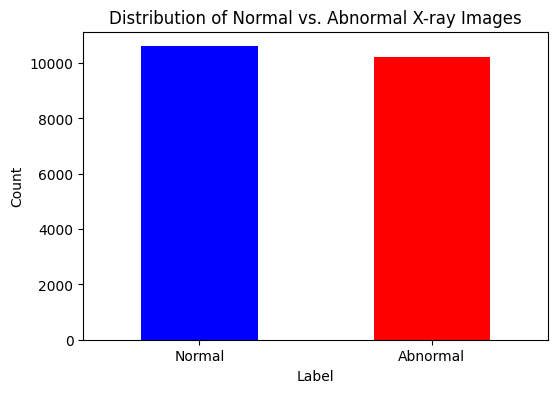

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV ÌååÏùº Î°úÎìú
csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_augmented_label.csv"
df = pd.read_csv(csv_path)

# Ï§ëÎ≥µÎêú image_id Ï†úÍ±∞ ÌõÑ Ï†ïÏÉÅ(0)Í≥º ÎπÑÏ†ïÏÉÅ(1) Í∞úÏàò Í≥ÑÏÇ∞
label_counts = df.drop_duplicates(subset=["image_id"])["label"].value_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print("Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:")
print(label_counts)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
label_counts.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Normal", "Abnormal"], rotation=0)
plt.ylabel("Count")
plt.xlabel("Label")
plt.title("Distribution of Normal vs. Abnormal X-ray Images")
plt.show()

## Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï (Ï¢åÌëú Ìè¨Ìï®)

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
import shutil

# Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏ ÏÑ§Ï†ï (Bounding Box Î≥ÄÌòï Ìè¨Ìï®)
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.1),
    A.Rotate(limit=10, p=0.3),
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_name"]))  # Î∞îÏö¥Îî© Î∞ïÏä§ Î≥ÄÌòï ÌôúÏÑ±Ìôî

# Í≤ΩÎ°ú ÏÑ§Ï†ï
input_dir = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/vinbigdata/train"
output_dir = "/content/train_augmented/images"
os.makedirs(output_dir, exist_ok=True)

# CSV Î°úÎìú (filtered_train_df.csv ÏÇ¨Ïö©)
csv_path = "/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/filtered_data/filtered_train_df.csv"
train_df = pd.read_csv(csv_path)

# Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ ÎùºÎ≤® ÏÑ§Ï†ï
train_df["label"] = train_df["class_name"].apply(lambda x: "normal" if x == "No finding" else "abnormal")

#  ÎπÑÏ†ïÏÉÅ X-ray Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
unique_images = train_df.groupby("image_id")["label"].first().reset_index()
abnormal_df = unique_images[unique_images["label"] == "abnormal"]

# Î∞îÏö¥Îî© Î∞ïÏä§ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏàòÌñâ
augmented_images = []

for _, row in tqdm(abnormal_df.iterrows(), total=len(abnormal_df)):
    image_id = row["image_id"]
    image_path = os.path.join(input_dir, f"{image_id}.png")

    # Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÌôïÏù∏
    if not os.path.exists(image_path):
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {image_path}")
        continue

    # ÏõêÎ≥∏ Î∞îÏö¥Îî© Î∞ïÏä§ Í∞ÄÏ†∏Ïò§Í∏∞
    bbox_rows = train_df[train_df["image_id"] == image_id]  # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏùò Î™®Îì† Î∞îÏö¥Îî© Î∞ïÏä§ Í∞ÄÏ†∏Ïò§Í∏∞
    bboxes = []
    class_names = []

    for _, bbox_row in bbox_rows.iterrows():
        if pd.notna(bbox_row["x_min"]):
            bboxes.append([bbox_row["x_min"], bbox_row["y_min"], bbox_row["x_max"], bbox_row["y_max"]])
            class_names.append(bbox_row["class_name"])

    # Ï¶ùÍ∞ï ÏàòÌñâ (Í∞Å Ïù¥ÎØ∏ÏßÄÎãπ 2Ìöå Ï∂îÍ∞Ä Ï¶ùÍ∞ï)
    for i in range(2):
        augmented = transform(image=image, bboxes=bboxes, class_name=class_names)

        aug_image = np.clip(augmented["image"], 0, 255).astype(np.uint8)
        new_image_name = f"{image_id}_aug{i}.png"
        output_path = os.path.join(output_dir, new_image_name)

        # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
        cv2.imwrite(output_path, aug_image)

        # Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ Ï∂îÍ∞Ä (Ïó¨Îü¨ Í∞úÏùò Î∞îÏö¥Îî© Î∞ïÏä§Î•º Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú Ï†ÄÏû•)
        for bbox, class_name in zip(augmented["bboxes"], class_names):
            new_row = row.copy()
            new_row["image_id"] = new_image_name
            new_row["x_min"], new_row["y_min"], new_row["x_max"], new_row["y_max"] = bbox
            new_row["class_name"] = class_name
            augmented_images.append(new_row)

print("Î™®Îì† ÎπÑÏ†ïÏÉÅ X-ray Ï¶ùÍ∞ï ÏôÑÎ£å!")

# 7. Google DriveÎ°ú Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Ïù¥Îèô
drive_path = "/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/images"
os.makedirs(drive_path, exist_ok=True)
shutil.copytree(output_dir, drive_path, dirs_exist_ok=True)
print(f"ÏµúÏ¢Ö Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Google DriveÏóê Ï†ÄÏû• ÏôÑÎ£å: {drive_path}")

# 8. Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ CSV Ï†ÄÏû• (YOLO ÌïôÏäµÏö©)
csv_output_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/re_train_augmented/re_train_augmented.csv"
augmented_train_df = pd.concat([train_df, pd.DataFrame(augmented_images)], ignore_index=True)
augmented_train_df.to_csv(csv_output_path, index=False)

print(f"Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏôÑÎ£å! ÏÉàÎ°úÏö¥ CSV Ï†ÄÏû•Îê®: {csv_output_path}")

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3412/3412 [23:47<00:00,  2.39it/s]


Î™®Îì† ÎπÑÏ†ïÏÉÅ X-ray Ï¶ùÍ∞ï ÏôÑÎ£å!
ÏµúÏ¢Ö Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Google DriveÏóê Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/images
Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏôÑÎ£å! ÏÉàÎ°úÏö¥ CSV Ï†ÄÏû•Îê®: /content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/re_train_augmented/re_train_augmented.csv


In [ ]:
pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/filtered_data/filtered_train_df.csv')

image_id          class_name  class_id rad_id  \
0      50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1      21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2      063319de25ce7edb9b1c6b8881290140          No finding        14    R10   
3      1c32170b4af4ce1a3030eb8167753b06  Pleural thickening        11     R9   
4      0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD         5    R17   
...                                 ...                 ...       ...    ...   
54360  db169d0be36123bd55b866d6aa73983b        Other lesion         9     R8   
54361  936fd5cff1c058d39817a08f58b72cae          No finding        14     R1   
54362  ca7e72954550eeb610fe22bf0244b7fa          No finding        14     R1   
54363  aa17d5312a0fb4a2939436abca7f9579          No finding        14     R8   
54364  5e272e3adbdaafb07a7e84a9e62b1a4c          No finding        14    R16   

          x_min     y_min     x_max     y_max  width  height  
0           NaN       NaN       NaN       NaN   2332    2580  
1           NaN       NaN       NaN       NaN   2954    3159  
2           NaN       NaN       NaN       NaN   2540    3072  
3      0.246850  0.116211  0.372835  0.140951   2540    3072  
4      0.589497  0.095890  0.957549  0.848924   2285    2555  
...         ...       ...       ...       ...    ...     ...  
54360  0.002604  0.232639  0.118056  0.602778   2304    2880  
54361       NaN       NaN       NaN       NaN   2444    3200  
54362       NaN       NaN       NaN       NaN   1994    2430  
54363       NaN       NaN       NaN       NaN   2048    2500  
54364       NaN       NaN       NaN       NaN   2048    2500  

[54365 rows x 10 columns]

In [ ]:
pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/train_augmented_label.csv')

image_id          class_name  \
0               50a418190bc3fb1ef1633bf9678929b3          No finding   
1               21a10246a5ec7af151081d0cd6d65dc9          No finding   
2               063319de25ce7edb9b1c6b8881290140          No finding   
3               1c32170b4af4ce1a3030eb8167753b06  Pleural thickening   
4               0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD   
...                                          ...                 ...   
61184  ff924bcbd38f123aec723aa7040d7e43_aug1.png                 NaN   
61185  ffceb71a80efba3b83c88e11f4b9694b_aug0.png                 NaN   
61186  ffceb71a80efba3b83c88e11f4b9694b_aug1.png                 NaN   
61187  ffe6f9fe648a7ec29a50feb92d6c15a4_aug0.png                 NaN   
61188  ffe6f9fe648a7ec29a50feb92d6c15a4_aug1.png                 NaN   

       class_id rad_id     x_min     y_min     x_max     y_max   width  \
0          14.0    R11       NaN       NaN       NaN       NaN  2332.0   
1          14.0     R7       NaN       NaN       NaN       NaN  2954.0   
2          14.0    R10       NaN       NaN       NaN       NaN  2540.0   
3          11.0     R9  0.246850  0.116211  0.372835  0.140951  2540.0   
4           5.0    R17  0.589497  0.095890  0.957549  0.848924  2285.0   
...         ...    ...       ...       ...       ...       ...     ...   
61184       NaN    NaN       NaN       NaN       NaN       NaN     NaN   
61185       NaN    NaN       NaN       NaN       NaN       NaN     NaN   
61186       NaN    NaN       NaN       NaN       NaN       NaN     NaN   
61187       NaN    NaN       NaN       NaN       NaN       NaN     NaN   
61188       NaN    NaN       NaN       NaN       NaN       NaN     NaN   

       height  label  
0      2580.0      0  
1      3159.0      0  
2      3072.0      0  
3      3072.0      1  
4      2555.0      1  
...       ...    ...  
61184     NaN      1  
61185     NaN      1  
61186     NaN      1  
61187     NaN      1  
61188     NaN      1  

[61189 rows x 11 columns]

In [ ]:
pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/re_train_augmented.csv')

<ipython-input-5-0405dabcea80>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/re_train_augmented.csv')


image_id          class_name  \
0               50a418190bc3fb1ef1633bf9678929b3          No finding   
1               21a10246a5ec7af151081d0cd6d65dc9          No finding   
2               063319de25ce7edb9b1c6b8881290140          No finding   
3               1c32170b4af4ce1a3030eb8167753b06  Pleural thickening   
4               0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD   
...                                          ...                 ...   
85925  ff924bcbd38f123aec723aa7040d7e43_aug1.png  Pulmonary fibrosis   
85926  ff924bcbd38f123aec723aa7040d7e43_aug1.png        Lung Opacity   
85927  ffceb71a80efba3b83c88e11f4b9694b_aug1.png  Pulmonary fibrosis   
85928  ffceb71a80efba3b83c88e11f4b9694b_aug1.png  Pulmonary fibrosis   
85929  ffe6f9fe648a7ec29a50feb92d6c15a4_aug1.png        Other lesion   

       class_id rad_id        x_min     y_min        x_max     y_max   width  \
0          14.0    R11          NaN       NaN          NaN       NaN  2332.0   
1          14.0     R7          NaN       NaN          NaN       NaN  2954.0   
2          14.0    R10          NaN       NaN          NaN       NaN  2540.0   
3          11.0     R9     0.246850  0.116211     0.372835  0.140951  2540.0   
4           5.0    R17     0.589497  0.095890     0.957549  0.848924  2285.0   
...         ...    ...          ...       ...          ...       ...     ...   
85925       NaN    NaN     0.677083  0.199777     0.903986  0.434896     NaN   
85926       NaN    NaN     0.221920  0.177827     0.432065  0.275670     NaN   
85927       NaN    NaN     0.788525  0.491468     0.895211  0.527730     NaN   
85928       NaN    NaN     0.677572  0.491468     0.908013  0.546075     NaN   
85929       NaN    NaN  1023.779114  0.401820  1023.790344  0.414771     NaN   

       height     label  
0      2580.0    normal  
1      3159.0    normal  
2      3072.0    normal  
3      3072.0  abnormal  
4      2555.0  abnormal  
...       ...       ...  
85925     NaN  abnormal  
85926     NaN  abnormal  
85927     NaN  abnormal  
85928     NaN  abnormal  
85929     NaN  abnormal  

[85930 rows x 11 columns]

In [ ]:
import pandas as pd

# Ï†ïÌôïÌïú ÌååÏùº Í≤ΩÎ°ú ÏûÖÎ†• (Î°úÏª¨ ÎòêÎäî Google Drive ÎßàÏö¥Ìä∏ Í≤ΩÎ°ú)
csv_path1 = "/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/train_augmented_label.csv"
csv_path2 = "/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/re_train_augmented.csv"

# ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏ ÌõÑ Î°úÎìú
if os.path.exists(csv_path1) and os.path.exists(csv_path2):
    df1 = pd.read_csv(csv_path1)
    df2 = pd.read_csv(csv_path2)

    # Ï§ëÎ≥µÎêòÏßÄ ÏïäÏùÄ Í≥†Ïú†Ìïú `image_id` Í∞úÏàò ÌôïÏù∏
    unique_images_1 = df1["image_id"].nunique()
    unique_images_2 = df2["image_id"].nunique()

    print(f"üìä Ï≤´ Î≤àÏß∏ CSV (train_augmented.csv) - Í≥†Ïú†Ìïú image_id Í∞úÏàò: {unique_images_1}")
    print(f"üìä Îëê Î≤àÏß∏ CSV (re_train_augmented.csv) - Í≥†Ïú†Ìïú image_id Í∞úÏàò: {unique_images_2}")
else:
    print("‚ùå CSV ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§. ÌååÏùº Í≤ΩÎ°úÎ•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")

üìä Ï≤´ Î≤àÏß∏ CSV (train_augmented.csv) - Í≥†Ïú†Ìïú image_id Í∞úÏàò: 20842
üìä Îëê Î≤àÏß∏ CSV (re_train_augmented.csv) - Í≥†Ïú†Ìïú image_id Í∞úÏàò: 18790


<ipython-input-17-37079c7c539a>:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(csv_path2)


<ipython-input-18-fbb95e1c2777>:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


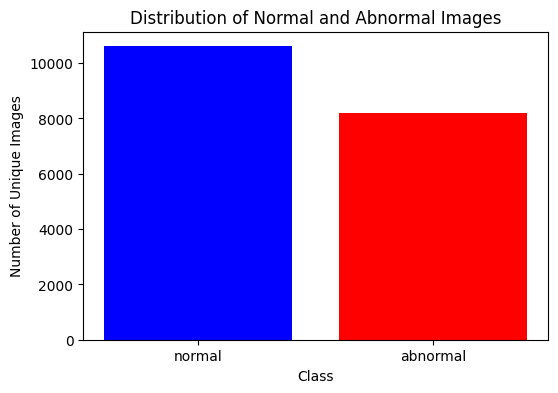

‚úÖ Ï†ïÏÉÅ(Normal) Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: 10606
‚úÖ ÎπÑÏ†ïÏÉÅ(Abnormal) Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: 8184


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/re_train_augmented/re_train_augmented.csv"

# CSV ÌååÏùº Î°úÎìú
df = pd.read_csv(csv_path)

# Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Í≥†Ïú†Ìïú image_id Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏
unique_df = df.drop_duplicates(subset=["image_id"])

# 'label' Ïª¨Îüº Í∞í ÌôïÏù∏ (Ï†ïÏÉÅ: "normal", ÎπÑÏ†ïÏÉÅ: "abnormal")
if "label" not in unique_df.columns:
    print("‚ùå 'label' Ïª¨ÎüºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§. CSV ÌååÏùºÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
else:
    # Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò Í≥ÑÏÇ∞
    label_counts = unique_df["label"].value_counts()

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, 4))
    plt.bar(label_counts.index, label_counts.values, color=["blue", "red"])
    plt.xlabel("Class")
    plt.ylabel("Number of Unique Images")
    plt.title("Distribution of Normal and Abnormal Images")
    plt.show()

    # Í∞úÏàò Ï∂úÎ†•
    print(f"‚úÖ Ï†ïÏÉÅ(Normal) Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: {label_counts.get('normal', 0)}")
    print(f"‚úÖ ÎπÑÏ†ïÏÉÅ(Abnormal) Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: {label_counts.get('abnormal', 0)}")

In [ ]:
import os

# Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•Îêú ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú
image_dir = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/re_train_augmented/images"

# Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í∞úÏàò ÌôïÏù∏
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]  # Ïù¥ÎØ∏ÏßÄ ÌôïÏû•Ïûê ÌïÑÌÑ∞ÎßÅ
print(f"üìÇ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: {len(image_files)} Í∞ú")

üìÇ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: 6824 Í∞ú


## ÎùºÎ≤® Ï∂îÍ∞Ä

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/re_train_augmented.csv')

# 'label' Ïó¥ Î≥ÄÌôò (normal ‚Üí 0, abnormal ‚Üí 1)
df['label'] = df['label'].map({'normal': '0', 'abnormal': '1'})

# Î≥ÄÍ≤ΩÎêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(df.head())

# Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû• (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
df.to_csv("/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/labeled_re_train_augmented.csv", index=False)  # ÎòêÎäî df.to_excel("modified_data.xlsx", index=False)

<ipython-input-23-a5c8432ddeb9>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/re_train_augmented.csv')


                           image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding      14.0    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding      14.0     R7   
2  063319de25ce7edb9b1c6b8881290140          No finding      14.0    R10   
3  1c32170b4af4ce1a3030eb8167753b06  Pleural thickening      11.0     R9   
4  0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD       5.0    R17   

      x_min     y_min     x_max     y_max   width  height label  
0       NaN       NaN       NaN       NaN  2332.0  2580.0     0  
1       NaN       NaN       NaN       NaN  2954.0  3159.0     0  
2       NaN       NaN       NaN       NaN  2540.0  3072.0     0  
3  0.246850  0.116211  0.372835  0.140951  2540.0  3072.0     1  
4  0.589497  0.095890  0.957549  0.848924  2285.0  2555.0     1  


In [ ]:
pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/labeled_re_train_augmented.csv')

<ipython-input-26-85c9f6da715f>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/labeled_re_train_augmented.csv')


image_id          class_name  \
0               50a418190bc3fb1ef1633bf9678929b3          No finding   
1               21a10246a5ec7af151081d0cd6d65dc9          No finding   
2               063319de25ce7edb9b1c6b8881290140          No finding   
3               1c32170b4af4ce1a3030eb8167753b06  Pleural thickening   
4               0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD   
...                                          ...                 ...   
85925  ff924bcbd38f123aec723aa7040d7e43_aug1.png  Pulmonary fibrosis   
85926  ff924bcbd38f123aec723aa7040d7e43_aug1.png        Lung Opacity   
85927  ffceb71a80efba3b83c88e11f4b9694b_aug1.png  Pulmonary fibrosis   
85928  ffceb71a80efba3b83c88e11f4b9694b_aug1.png  Pulmonary fibrosis   
85929  ffe6f9fe648a7ec29a50feb92d6c15a4_aug1.png        Other lesion   

       class_id rad_id        x_min     y_min        x_max     y_max   width  \
0          14.0    R11          NaN       NaN          NaN       NaN  2332.0   
1          14.0     R7          NaN       NaN          NaN       NaN  2954.0   
2          14.0    R10          NaN       NaN          NaN       NaN  2540.0   
3          11.0     R9     0.246850  0.116211     0.372835  0.140951  2540.0   
4           5.0    R17     0.589497  0.095890     0.957549  0.848924  2285.0   
...         ...    ...          ...       ...          ...       ...     ...   
85925       NaN    NaN     0.677083  0.199777     0.903986  0.434896     NaN   
85926       NaN    NaN     0.221920  0.177827     0.432065  0.275670     NaN   
85927       NaN    NaN     0.788525  0.491468     0.895211  0.527730     NaN   
85928       NaN    NaN     0.677572  0.491468     0.908013  0.546075     NaN   
85929       NaN    NaN  1023.779114  0.401820  1023.790344  0.414771     NaN   

       height  label  
0      2580.0      0  
1      3159.0      0  
2      3072.0      0  
3      3072.0      1  
4      2555.0      1  
...       ...    ...  
85925     NaN      1  
85926     NaN      1  
85927     NaN      1  
85928     NaN      1  
85929     NaN      1  

[85930 rows x 11 columns]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/re_train_augmented.csv')
unique_df = df.drop_duplicates(subset=["image_id"])

unique_df.value_counts('label')

label
0    10606
1     8184
Name: count, dtype: int64

## ÎßàÏßÄÎßâ

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
import shutil

# Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏ ÏÑ§Ï†ï (Bounding Box Î≥ÄÌòï Ìè¨Ìï®)
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.1),
    A.Rotate(limit=10, p=0.3),
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_name"]))

# Í≤ΩÎ°ú ÏÑ§Ï†ï
input_dir = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/vinbigdata/train"
output_dir = "/content/train_augmented1/images"
os.makedirs(output_dir, exist_ok=True)

# CSV Î°úÎìú (filtered_train_df.csv ÏÇ¨Ïö©)
csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/filtered_data/filtered_train_df.csv"
train_df = pd.read_csv(csv_path)

# `image_id` Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ ÎùºÎ≤® ÏÑ§Ï†ï
train_df["label"] = train_df["class_name"].apply(lambda x: "normal" if x == "No finding" else "abnormal")

# ÎπÑÏ†ïÏÉÅ X-rayÎßå ÌïÑÌÑ∞ÎßÅ
unique_images = train_df.groupby("image_id")["label"].first().reset_index()
abnormal_df = unique_images[unique_images["label"] == "abnormal"]

# Î∞îÏö¥Îî© Î∞ïÏä§ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏàòÌñâ
augmented_images = []

for _, row in tqdm(abnormal_df.iterrows(), total=len(abnormal_df)):
    image_id = row["image_id"]
    image_path = os.path.join(input_dir, f"{image_id}.png")

    # Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÌôïÏù∏
    if not os.path.exists(image_path):
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {image_path}")
        continue

    # ÏõêÎ≥∏ Î∞îÏö¥Îî© Î∞ïÏä§ Í∞ÄÏ†∏Ïò§Í∏∞
    bbox_rows = train_df[train_df["image_id"] == image_id]
    bboxes = []
    class_names = []

    for _, bbox_row in bbox_rows.iterrows():
        if pd.notna(bbox_row["x_min"]):
            bboxes.append([bbox_row["x_min"], bbox_row["y_min"], bbox_row["x_max"], bbox_row["y_max"]])
            class_names.append(bbox_row["class_name"])

    # Ï¶ùÍ∞ï ÏàòÌñâ (Í∞Å Ïù¥ÎØ∏ÏßÄÎãπ 3Ìöå Ï∂îÍ∞Ä Ï¶ùÍ∞ï)
    for i in range(3):
        augmented = transform(image=image, bboxes=bboxes, class_name=class_names)

        aug_image = np.clip(augmented["image"], 0, 255).astype(np.uint8)
        new_image_name = f"{image_id}_aug{i}.png"
        output_path = os.path.join(output_dir, new_image_name)

        # Î∞îÏö¥Îî© Î∞ïÏä§Í∞Ä ÏûàÎäî Í≤ΩÏö∞ÏóêÎßå Ï†ÄÏû•
        if len(augmented["bboxes"]) > 0:
            cv2.imwrite(output_path, aug_image)
            for bbox, class_name in zip(augmented["bboxes"], class_names):
                new_row = row.copy()
                new_row["image_id"] = new_image_name
                new_row["x_min"], new_row["y_min"], new_row["x_max"], new_row["y_max"] = bbox
                new_row["class_name"] = class_name
                augmented_images.append(new_row)
        else:
            print(f"‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: {new_image_name}, ÏÇ≠Ï†úÎê®.")
            continue  # Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÎäî Ïù¥ÎØ∏ÏßÄÎäî Ï†ÄÏû•ÌïòÏßÄ ÏïäÏùå

print("‚úÖ Î™®Îì† ÎπÑÏ†ïÏÉÅ X-ray Ï¶ùÍ∞ï ÏôÑÎ£å!")

# Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Ïù¥Îèô
drive_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/last_train_augmented/images"
os.makedirs(drive_path, exist_ok=True)
shutil.copytree(output_dir, drive_path, dirs_exist_ok=True)
print(f"ÏµúÏ¢Ö Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Google DriveÏóê Ï†ÄÏû• ÏôÑÎ£å: {drive_path}")

# Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ CSV Ï†ÄÏû•
csv_output_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/last_train_augmented/last_train_augmented.csv"
augmented_train_df = pd.concat([train_df, pd.DataFrame(augmented_images)], ignore_index=True)
augmented_train_df.to_csv(csv_output_path, index=False)

print(f"‚úÖ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏôÑÎ£å! ÏÉàÎ°úÏö¥ CSV Ï†ÄÏû•Îê®: {csv_output_path}")

# üìå Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÎäî Ï¶ùÍ∞ï Ïù¥ÎØ∏ÏßÄ ÏÇ≠Ï†ú (Ïù¥ÎØ∏ Ï†ÄÏû•Îêú Ìè¥ÎçîÏóêÏÑú Ï†ïÎ¶¨)
saved_image_files = set(os.listdir(output_dir))  # Ï†ÄÏû•Îêú Î™®Îì† Ïù¥ÎØ∏ÏßÄ Î™©Î°ù
valid_image_ids = set(pd.read_csv(csv_output_path)["image_id"].unique())  # CSVÏóê Ï°¥Ïû¨ÌïòÎäî image_id

for image_file in saved_image_files:
    if image_file not in valid_image_ids:
        os.remove(os.path.join(output_dir, image_file))  # CSVÏóêÏÑú Ï†úÏô∏Îêú Ïù¥ÎØ∏ÏßÄÎäî ÏÇ≠Ï†ú

print(f"‚úÖ Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ ÏÇ≠Ï†ú ÏôÑÎ£å! ÎÇ®ÏùÄ Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í∞úÏàò: {len(valid_image_ids)}")

  0%|          | 1/3412 [00:00<06:12,  9.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0005e8e3701dfb1dd93d53e2ff537b6e_aug1.png, ÏÇ≠Ï†úÎê®.


  0%|          | 4/3412 [00:00<10:14,  5.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 000d68e42b71d3eac10ccc077aba07c1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 00150343289f317a0ad5629d5b7d9ef9_aug1.png, ÏÇ≠Ï†úÎê®.


  0%|          | 8/3412 [00:01<08:03,  7.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0061cf6d35e253b6e7f03940592cc35e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 008b3176a7248a0a189b5731ac8d2e95_aug2.png, ÏÇ≠Ï†úÎê®.


  0%|          | 12/3412 [00:01<07:02,  8.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 00aca42a24e4ea6066cca2546150c36e_aug2.png, ÏÇ≠Ï†úÎê®.


  0%|          | 15/3412 [00:02<06:17,  8.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 010018c93ed33ae56ed048ee54867e46_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 010018c93ed33ae56ed048ee54867e46_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 010a3dbb67bc37800a041866844861b1_aug2.png, ÏÇ≠Ï†úÎê®.


  0%|          | 17/3412 [00:02<05:57,  9.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0114c5cd093c742334d5a5fa14140421_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0114c5cd093c742334d5a5fa14140421_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 011ae9520e81f1efe71c9d954ec07d09_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 011ae9520e81f1efe71c9d954ec07d09_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 013893a5fa90241c65c3efcdbdd2cec1_aug1.png, ÏÇ≠Ï†úÎê®.


  1%|          | 22/3412 [00:02<05:46,  9.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 01546d3e6175ceaabd7d92f0c566579d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 01570ee44031e4ebab6031501293bf66_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0162dad8330007f8f0daf43bcf4033f1_aug0.png, ÏÇ≠Ï†úÎê®.


  1%|          | 24/3412 [00:03<05:39,  9.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0187da5fd71c7a2917346bf12a67bbe4_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0187da5fd71c7a2917346bf12a67bbe4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 018a2fe44c3451281ec338c27ecc9c53_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 018a2fe44c3451281ec338c27ecc9c53_aug2.png, ÏÇ≠Ï†úÎê®.


  1%|          | 27/3412 [00:03<06:06,  9.23it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 018ef9c5d5b20c5161a5c48703171c3b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 018ef9c5d5b20c5161a5c48703171c3b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 01a3c3d994d85ce5634d2d13c03fd4b0_aug0.png, ÏÇ≠Ï†úÎê®.


  1%|          | 29/3412 [00:03<05:48,  9.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 01b0510a8d3b0860429536653db5eb21_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 01b0510a8d3b0860429536653db5eb21_aug1.png, ÏÇ≠Ï†úÎê®.


  1%|          | 31/3412 [00:03<05:33, 10.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 01cbbeab94b4d2bfd5cd8a467fee46a7_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 01d6446afde9fbf4332904bc331e9660_aug1.png, ÏÇ≠Ï†úÎê®.


  1%|          | 36/3412 [00:04<06:13,  9.04it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0211f9fe31142ba1e25fb6a2ea3fea38_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02222df826791117f315ecb2b58c5b69_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 023a8b8557d1fd59f272c63be6f3d4c0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 023a8b8557d1fd59f272c63be6f3d4c0_aug2.png, ÏÇ≠Ï†úÎê®.


  1%|          | 40/3412 [00:04<07:08,  7.86it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 025534801b62d61f1c1c9e571ea74695_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02562eb68a9c682f5f644fa7a099733f_aug1.png, ÏÇ≠Ï†úÎê®.


  1%|‚ñè         | 45/3412 [00:05<07:02,  7.97it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02957c14fee52ac6d0617e6d86275a25_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02957c14fee52ac6d0617e6d86275a25_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02a4774868d677ef8ecff2168c0161c0_aug2.png, ÏÇ≠Ï†úÎê®.


  1%|‚ñè         | 47/3412 [00:05<05:57,  9.42it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02acf0e7d0932f9c6a06fd4bbe1f5d90_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02acf0e7d0932f9c6a06fd4bbe1f5d90_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02cd1d17763c869ff3d4af5e28539456_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02cd1d17763c869ff3d4af5e28539456_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02d9d0c89022adc381c23e72add7c389_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02d9d0c89022adc381c23e72add7c389_aug2.png, ÏÇ≠Ï†úÎê®.


  1%|‚ñè         | 49/3412 [00:05<05:28, 10.25it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02fe3eea41166a1d3eb75307a12c4a63_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 02fe3eea41166a1d3eb75307a12c4a63_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0339aac16e3dd93ee397315a224147a6_aug0.png, ÏÇ≠Ï†úÎê®.


  1%|‚ñè         | 51/3412 [00:06<05:38,  9.92it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 033e1637bed9b9f3dccac9c6c419adc2_aug0.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 55/3412 [00:06<07:00,  7.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 035480fbf46e946e21e7dce78637c329_aug2.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 58/3412 [00:07<06:21,  8.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 038fc325ff4aa0a21c76d5dd7c740c89_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 039c6997248b3a6ba3c909af35fce0eb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 039c6997248b3a6ba3c909af35fce0eb_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 03a6078c0c12fb076b50ae017e590e19_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 03cd593a310656563a5aa3886ff30380_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 03cd593a310656563a5aa3886ff30380_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 03e6ecfa6f6fb33dfeac6ca4f9b459c9_aug0.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 60/3412 [00:07<06:33,  8.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 03e6ecfa6f6fb33dfeac6ca4f9b459c9_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 03f0bf0a7403c050a7ce574f98fd8ab6_aug1.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 64/3412 [00:07<05:41,  9.81it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 041081d11262c5f150e655f5e5ff0a2c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 041081d11262c5f150e655f5e5ff0a2c_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 041762ff7fe435f22ea7541e77bfeafa_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 041762ff7fe435f22ea7541e77bfeafa_aug1.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 65/3412 [00:07<05:56,  9.39it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 044c53b3fd48fc029318fbcee70ae0d1_aug1.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 69/3412 [00:08<06:44,  8.27it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 047182a6e86808669f896307dcd550c7_aug1.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 72/3412 [00:08<06:24,  8.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 04994993c9e416f32ce24c7e7501d3be_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 04bb8bd7ee6f88a16623fe5c6dd4da91_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 04bb8bd7ee6f88a16623fe5c6dd4da91_aug2.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 75/3412 [00:09<07:12,  7.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 04fbba5834f2abd713e66b3d0e6a678e_aug0.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 77/3412 [00:09<07:04,  7.86it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0501d62912b9a6ff04eae4ffc56affc2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 051132a778e61a86eb147c7c6f564dfe_aug0.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 79/3412 [00:09<07:19,  7.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 051c2436c0acdb5e09d085c7e4a764f3_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 051d112b55e4c9f9dfa53307cc2ffb62_aug0.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 81/3412 [00:09<06:57,  7.98it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 052cf8f6cb59da96df7386adf8d5f6a0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 053700069ddf3c4f1f6c477a48337836_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 053700069ddf3c4f1f6c477a48337836_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 053cf0f0a75926ebd53f0265bad6aee4_aug0.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 82/3412 [00:09<06:58,  7.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 053cf0f0a75926ebd53f0265bad6aee4_aug1.png, ÏÇ≠Ï†úÎê®.


  2%|‚ñè         | 85/3412 [00:10<09:05,  6.10it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 05721adb43ab7c061733568b274c006b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 059412ad34b2c48179f178e3138b5022_aug0.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 87/3412 [00:10<08:42,  6.37it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 059ec0fc0d6840cff6e268e46f85faa0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 05c0c802db4f100de8e2a9fa4aa62d14_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 05c0c802db4f100de8e2a9fa4aa62d14_aug1.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 89/3412 [00:11<08:55,  6.21it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 05d676834dbed1639cb5eea70c1e307b_aug1.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 90/3412 [00:11<09:17,  5.96it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 05e0b2465053b685ca37849eac3dd62f_aug0.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 91/3412 [00:11<11:11,  4.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 05f202ee95a17a4b1e6dbe1916ffe8bf_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 05f202ee95a17a4b1e6dbe1916ffe8bf_aug1.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 95/3412 [00:12<10:23,  5.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 061fa33f6ba0028fbbad8caaeac8d145_aug1.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 96/3412 [00:12<10:44,  5.15it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 064023f1ff95962a1eee46b9f05f7309_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0686521b0b8cf9426f253601b805fb52_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0686521b0b8cf9426f253601b805fb52_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0686521b0b8cf9426f253601b805fb52_aug2.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 98/3412 [00:12<08:06,  6.81it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0690821a2e255ce175bfa7f36e308f63_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0697473448bb5e83ac926fe92271e7d8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0697473448bb5e83ac926fe92271e7d8_aug2.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 101/3412 [00:13<07:17,  7.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 06b04918044786c36584a86273d72747_aug2.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 103/3412 [00:13<07:05,  7.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 06dfb2b996464c7b0e4c5177d433edbe_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 06e523e21ac668629092e85928b176a3_aug1.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 105/3412 [00:13<07:06,  7.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 06f3c1a8441d61da08aac07558ab5f05_aug0.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 106/3412 [00:13<07:21,  7.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0710fe2b90ee68e54b84e795abb018df_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0710fe2b90ee68e54b84e795abb018df_aug2.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 110/3412 [00:14<06:51,  8.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 071ff9c782ead87dfa9b1c025c25e769_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 074db6a4ab3aebd54fa0f628eb0e9b0e_aug1.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 111/3412 [00:14<06:42,  8.21it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0760a14308badcbd370c6866c9db3a0a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 077c76dffde69c0b90c28d78ef2ac31e_aug1.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 117/3412 [00:15<06:48,  8.07it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 07d004fabfd7246f9ed4283dd5237deb_aug1.png, ÏÇ≠Ï†úÎê®.


  3%|‚ñé         | 119/3412 [00:15<06:31,  8.41it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 081d1700020b6bf0099f1e4d8aeec0f3_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 083a89dfc9a74a3f809035f886634ee2_aug1.png, ÏÇ≠Ï†úÎê®.


  4%|‚ñé         | 121/3412 [00:15<06:25,  8.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0844f274f2a388e70231d3133754ac35_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0853ab3a3dbadae1e6f28b933ddff809_aug0.png, ÏÇ≠Ï†úÎê®.


  4%|‚ñé         | 124/3412 [00:15<07:18,  7.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 08ce56202e44175674fc5f5517e74db4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 08e3d3783927a15d35137c756c1a7e0b_aug2.png, ÏÇ≠Ï†úÎê®.


  4%|‚ñé         | 127/3412 [00:16<06:18,  8.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 090b30ca55ab2a592cd3b24c9407a2bf_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 090b30ca55ab2a592cd3b24c9407a2bf_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 09175449df9374e0f6afe517f7b6249f_aug2.png, ÏÇ≠Ï†úÎê®.


  4%|‚ñç         | 131/3412 [00:16<06:21,  8.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 095c13d937c0dd9f547035344ba6c6c4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 096688dacee6b1a1a5660ad15024a6f9_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 097c63f9c6d46cfe5bd4937f277fbdbd_aug2.png, ÏÇ≠Ï†úÎê®.


  4%|‚ñç         | 135/3412 [00:17<05:29,  9.94it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 09b9674023305cb9a0acb367600efffa_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 09b9674023305cb9a0acb367600efffa_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 09c9887c189f99704b452f193a40eaf7_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 09d6b99ffec66ae485de851924187bfe_aug0.png, ÏÇ≠Ï†úÎê®.


  4%|‚ñç         | 138/3412 [00:17<05:31,  9.87it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 09df460412ce705d0f634436f518f46d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 09f0b00bd079304f72c079d369925aee_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 09f0b00bd079304f72c079d369925aee_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 09f9a62fceffacc4d062a7fe24a626b8_aug0.png, ÏÇ≠Ï†úÎê®.


  4%|‚ñç         | 140/3412 [00:17<06:29,  8.39it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0a072917005494298d153c01bbd8f689_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0a0ac65c40a9ac441651e4bfbde03c4e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0a0ac65c40a9ac441651e4bfbde03c4e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0a0ac65c40a9ac441651e4bfbde03c4e_aug2.png, ÏÇ≠Ï†úÎê®.


  4%|‚ñç         | 143/3412 [00:18<07:38,  7.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0a16dc6491142ff8c7c36f3b3f4ebd02_aug0.png, ÏÇ≠Ï†úÎê®.


  4%|‚ñç         | 146/3412 [00:18<08:23,  6.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0a4fbc9ade84a7abd1680eb8ba031a9d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0a61578e3d77b1cebc86d13a41efa31b_aug2.png, ÏÇ≠Ï†úÎê®.


  4%|‚ñç         | 148/3412 [00:18<07:19,  7.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0a9909b1cd924cd593151ba2d3d3dd55_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0aad4ac2ea24742e3f9de3d29fae6d95_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0aad4ac2ea24742e3f9de3d29fae6d95_aug2.png, ÏÇ≠Ï†úÎê®.


  4%|‚ñç         | 153/3412 [00:19<06:57,  7.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0b0e106a53f9dc3b28a9b15f94510b7a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0b0e106a53f9dc3b28a9b15f94510b7a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0b1b897b1e1e170f1b5fd7aeff553afa_aug0.png, ÏÇ≠Ï†úÎê®.


  5%|‚ñç         | 156/3412 [00:19<06:14,  8.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0b5213c456c26b48ca011b9865c4e6ce_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0b6006be69ea1764f9bf80e5091b1e8e_aug0.png, ÏÇ≠Ï†úÎê®.


  5%|‚ñç         | 158/3412 [00:20<06:16,  8.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0b62bc6644be72ce4dfa5ea77a77f311_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0b98b21145a9425bf3eeea4b0de425e7_aug0.png, ÏÇ≠Ï†úÎê®.


  5%|‚ñç         | 161/3412 [00:20<05:26,  9.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0be2bdac4e84982ad1b24830d2cce470_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0be2bdac4e84982ad1b24830d2cce470_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0be45114544283beb4f6d371f946e889_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0be45114544283beb4f6d371f946e889_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0bed7f179df709d35aef763544ebfebf_aug1.png, ÏÇ≠Ï†úÎê®.


  5%|‚ñç         | 163/3412 [00:20<05:33,  9.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0bee0cde729de2d82b39527c37f11934_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0bee0cde729de2d82b39527c37f11934_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0bef06d948ac1fe20ade505ba9960885_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0c2079e62ddfb06a8a5300cefaa3a970_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0c2079e62ddfb06a8a5300cefaa3a970_aug1.png, ÏÇ≠Ï†úÎê®.


  5%|‚ñç         | 165/3412 [00:20<05:19, 10.15it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0c31081e8ada2990bcbef0f12ea60b07_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0c577dc6594dab44ebbd6964de673eaa_aug1.png, ÏÇ≠Ï†úÎê®.


  5%|‚ñç         | 168/3412 [00:21<08:15,  6.55it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0c5ff01c7bfb4362fcd98f36e555b08c_aug0.png, ÏÇ≠Ï†úÎê®.


  5%|‚ñå         | 173/3412 [00:22<07:47,  6.92it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0c7a38f293d5f5e4846aa4ca6db4daf1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0c8447ce02d73c505a90a9c7af8c83ce_aug2.png, ÏÇ≠Ï†úÎê®.


  5%|‚ñå         | 178/3412 [00:22<07:15,  7.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0cf83a19a8281e4a281dece9854008ac_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0cf83a19a8281e4a281dece9854008ac_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0cfae3f740f87ca3b96dec765d06fad0_aug1.png, ÏÇ≠Ï†úÎê®.


  5%|‚ñå         | 179/3412 [00:23<09:45,  5.52it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0d03df2e9ed557d0c9edcec777056c1f_aug1.png, ÏÇ≠Ï†úÎê®.


  5%|‚ñå         | 182/3412 [00:23<08:51,  6.08it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0d266f5353352d86d3c092da96dc67f5_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0d266f5353352d86d3c092da96dc67f5_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0d30dc1e0070e7a934f39452e3ad3b83_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0d30dc1e0070e7a934f39452e3ad3b83_aug2.png, ÏÇ≠Ï†úÎê®.


  5%|‚ñå         | 184/3412 [00:23<08:10,  6.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0d3b1464574b7db3d664dc0aa0b66549_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0d3b1464574b7db3d664dc0aa0b66549_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0d5597f8b17330d498fc5e13893e3081_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0d5597f8b17330d498fc5e13893e3081_aug2.png, ÏÇ≠Ï†úÎê®.


  5%|‚ñå         | 187/3412 [00:24<08:29,  6.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0d94045f9e16f077bc6bbdea9f6c561b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0d94045f9e16f077bc6bbdea9f6c561b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0dbdb924a9140849abd4ff650c5356da_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0dbdb924a9140849abd4ff650c5356da_aug1.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñå         | 189/3412 [00:24<09:08,  5.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0df187b5072103a0919c1a34be03e7ed_aug0.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñå         | 191/3412 [00:25<09:19,  5.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0e093fa90e5be5666cd396d722cc84ac_aug2.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñå         | 192/3412 [00:25<08:54,  6.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0e6af94d17007c94d858b3bb7adb7dac_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0e6af94d17007c94d858b3bb7adb7dac_aug1.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñå         | 194/3412 [00:25<08:32,  6.27it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0e87195ff59d4294d61b8bffddb3c03c_aug1.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñå         | 199/3412 [00:26<09:24,  5.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0eac4cf8618d5e582c336217d0291f25_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0eac4cf8618d5e582c336217d0291f25_aug2.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñå         | 202/3412 [00:27<07:28,  7.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0f186e3eba8d9ebd51feed957204ddbf_aug2.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñå         | 205/3412 [00:27<06:16,  8.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0f4fd2b86df83111f83444ee90edbea1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0f81902a673f0d826b55ea9dc9da297b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0fafbbfb67745f8c29351f9f7263b82f_aug2.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñå         | 208/3412 [00:27<05:48,  9.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0fca086ebe001f784d428aa9973ba691_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 0fd981034f74251d4a5d72891940d585_aug0.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñå         | 211/3412 [00:27<05:42,  9.34it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 103fb193578933a2d53ae31ff0fc3319_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 103fb193578933a2d53ae31ff0fc3319_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 104b915269077619e2b3bbf641506327_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 105c3102661ee24684dc180a32dc7119_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 105c3102661ee24684dc180a32dc7119_aug1.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñã         | 214/3412 [00:28<05:50,  9.11it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1060e455b64eea9e29ca4a3e05b47557_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1066a058b5bae597f2dbb33780c2577d_aug1.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñã         | 216/3412 [00:28<05:58,  8.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 106a3da41d2e3d9f508c09b28e8abdaf_aug1.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñã         | 217/3412 [00:28<06:11,  8.60it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1071b3b85121012c5061894bf3b8704b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 10ab7eaa1ef08dea7a899cc893564838_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 10e7dac260f11046164aa94f2d8add9f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 10e7dac260f11046164aa94f2d8add9f_aug1.png, ÏÇ≠Ï†úÎê®.


  6%|‚ñã         | 221/3412 [00:29<06:07,  8.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 10f28558b1667b3d30d9e4c44f7a5bc6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 110cd42557499b2bcfe84732b281172c_aug1.png, ÏÇ≠Ï†úÎê®.


  7%|‚ñã         | 225/3412 [00:29<05:26,  9.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 112cf0367dd8b6aa14b4e384439d9eb7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 112cf0367dd8b6aa14b4e384439d9eb7_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 113274a4ca3c2e72b7ff1bd3ce5006b6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1133414000e82176ab7852aeacc762eb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1133414000e82176ab7852aeacc762eb_aug2.png, ÏÇ≠Ï†úÎê®.


  7%|‚ñã         | 227/3412 [00:29<05:06, 10.39it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1138649f25528f0ab76c93ac60279ca3_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1148a27d6ea1ec7669de022fe2480890_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1148a27d6ea1ec7669de022fe2480890_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 116c19c289e285a60ab20cf72090c9fa_aug0.png, ÏÇ≠Ï†úÎê®.


  7%|‚ñã         | 231/3412 [00:29<04:33, 11.62it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 11750f2005f2f50d592c5c5cc145fdfe_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 117c218c2534e3d40a6ca0b3d724eb24_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 117c218c2534e3d40a6ca0b3d724eb24_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 117c218c2534e3d40a6ca0b3d724eb24_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 119bc2dba30b0ba7995e189504126ed1_aug2.png, ÏÇ≠Ï†úÎê®.


  7%|‚ñã         | 237/3412 [00:30<06:31,  8.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1245f853816564c0ee3f1b9e93521ff0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 124ec853c372fcf7f4428b26b32be62f_aug1.png, ÏÇ≠Ï†úÎê®.


  7%|‚ñã         | 239/3412 [00:31<06:46,  7.81it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1259ee6feb64a552e3521ddcb395888c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 126ae7336c7776a82bf3c15c0c6751c0_aug2.png, ÏÇ≠Ï†úÎê®.


  7%|‚ñã         | 242/3412 [00:31<06:43,  7.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1280dc55c1ff852024be232c2942e3fd_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1283d5ba97663aef3b97ee4f1884e9f9_aug0.png, ÏÇ≠Ï†úÎê®.


  7%|‚ñã         | 245/3412 [00:31<06:33,  8.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 128f55a981d4192a2990946431a7469b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 128f55a981d4192a2990946431a7469b_aug2.png, ÏÇ≠Ï†úÎê®.


  7%|‚ñã         | 247/3412 [00:31<05:44,  9.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 129a1e7753432edd052a2cdbfbaee00e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 129a1e7753432edd052a2cdbfbaee00e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 12bd4c85000b33c532fb9d57b5f2a08e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 12bd4c85000b33c532fb9d57b5f2a08e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 12ccbda1f9c224e5d5496cd7fe3d26d7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 12ccbda1f9c224e5d5496cd7fe3d26d7_aug2.png, ÏÇ≠Ï†úÎê®.


  7%|‚ñã         | 249/3412 [00:32<05:14, 10.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 12d8de45e35e8b8c896109bfb46f8a82_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 12d8de45e35e8b8c896109bfb46f8a82_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 12e0e910766f2d1b1ccda7c32051643f_aug1.png, ÏÇ≠Ï†úÎê®.


  7%|‚ñã         | 252/3412 [00:32<05:31,  9.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 12ede510c82b53705e33fa758ff03131_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 12ede510c82b53705e33fa758ff03131_aug2.png, ÏÇ≠Ï†úÎê®.


  7%|‚ñã         | 254/3412 [00:32<06:34,  8.01it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 13088cbf40717bace59ef0961554c08f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 133ed9054828b0e75987e00217aef89d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 133ed9054828b0e75987e00217aef89d_aug1.png, ÏÇ≠Ï†úÎê®.


  8%|‚ñä         | 258/3412 [00:33<07:08,  7.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1374c483d258203eadf6c6a525899d51_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 13776ecb39222a7aaace2d9721abebbe_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 13776ecb39222a7aaace2d9721abebbe_aug2.png, ÏÇ≠Ï†úÎê®.


  8%|‚ñä         | 261/3412 [00:33<06:16,  8.37it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 13ceff5f3d113919c224c8b42d3c2411_aug2.png, ÏÇ≠Ï†úÎê®.


  8%|‚ñä         | 266/3412 [00:34<07:11,  7.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 145691883baff4df3e4863ca6354c44e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 145bbf5912e81c52ceac691693dfc716_aug0.png, ÏÇ≠Ï†úÎê®.


  8%|‚ñä         | 269/3412 [00:34<06:42,  7.81it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 146584f4913fd351785bf9159fd17617_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 14742737297b34ac440a0338877663ac_aug1.png, ÏÇ≠Ï†úÎê®.


  8%|‚ñä         | 273/3412 [00:35<06:43,  7.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 14f8770d112738119f0f31ee75e8fc41_aug0.png, ÏÇ≠Ï†úÎê®.


  8%|‚ñä         | 275/3412 [00:35<06:41,  7.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 150cfe73d6dd162e02e1bc799a9d71e0_aug1.png, ÏÇ≠Ï†úÎê®.


  8%|‚ñä         | 277/3412 [00:35<06:34,  7.94it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 151893dad65d5077f5a377fc9d0e6881_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 151a8ce59aa6e414ee8a9c9d711cee61_aug1.png, ÏÇ≠Ï†úÎê®.


  8%|‚ñä         | 278/3412 [00:35<06:13,  8.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 151aade5871241a6deb39da83b9d2c47_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 156620bd19b7dee86079be71d26bd87e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 156620bd19b7dee86079be71d26bd87e_aug2.png, ÏÇ≠Ï†úÎê®.


  8%|‚ñä         | 281/3412 [00:36<06:16,  8.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 15a12089e9c773cb200ee8959740e1b3_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 15acee7728e6530dfa2bd01521c7148d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 15acee7728e6530dfa2bd01521c7148d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 15acee7728e6530dfa2bd01521c7148d_aug2.png, ÏÇ≠Ï†úÎê®.


  8%|‚ñä         | 285/3412 [00:36<07:20,  7.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 15c3fc505c414c69ba757cb3be3ed213_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 15c3fc505c414c69ba757cb3be3ed213_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 15edc6ae9aebe34220472aa7fcf34b08_aug1.png, ÏÇ≠Ï†úÎê®.


  8%|‚ñä         | 286/3412 [00:37<08:08,  6.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 15f023463d88b8f8bc852a9a7b72e6e3_aug0.png, ÏÇ≠Ï†úÎê®.


  8%|‚ñä         | 288/3412 [00:37<07:47,  6.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 16041095041e6b5afb13e8da17bf45b4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1606093b9d036cda7e30316ada6ea2cf_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1606093b9d036cda7e30316ada6ea2cf_aug1.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñä         | 291/3412 [00:37<07:23,  7.04it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 163898fbc57f00f58ad27e72031a541f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 163898fbc57f00f58ad27e72031a541f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 16565752b931dfbec4b042b26786401a_aug1.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñä         | 292/3412 [00:38<08:26,  6.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1659dcad9ea4f12c3c91b5702e800669_aug1.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñä         | 296/3412 [00:39<14:55,  3.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 16b02dc3b4e8deb6c1cc686c9ef911dd_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 16b02dc3b4e8deb6c1cc686c9ef911dd_aug2.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñä         | 298/3412 [00:39<15:06,  3.44it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 16edfb76036ad3b10d9479e16ad7e92a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1700104c53dad4e23980cc44dfec1b64_aug0.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñâ         | 301/3412 [00:40<12:25,  4.18it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 170709246c0ac68fa305fb3acc2cfb77_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1722c7262a821be25de56e351d641993_aug2.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñâ         | 303/3412 [00:40<10:10,  5.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1725b46578ff86f1a8d21b10d4d4699a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1730d2ebd1cc96e9e5656cdf916ac7f8_aug1.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñâ         | 305/3412 [00:41<11:07,  4.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1756a285d1bc917bbe55024b0727a836_aug1.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñâ         | 306/3412 [00:42<18:00,  2.87it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 175e3663cc06a6d4ee39f8f9fa7f9183_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 17791317b59d89c03ce7a15826e1b876_aug1.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñâ         | 312/3412 [00:43<09:11,  5.62it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 17a43dc27cccda142f5d54d378f4aed7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 17a43dc27cccda142f5d54d378f4aed7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 17a43dc27cccda142f5d54d378f4aed7_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 17b6cfad0ea2ecd3b9511743a608bcb7_aug2.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñâ         | 315/3412 [00:43<08:01,  6.44it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1812172c7ad3771c05d1238bb3066217_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1812172c7ad3771c05d1238bb3066217_aug2.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñâ         | 318/3412 [00:44<06:54,  7.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 183015e171f5159d7e60d43578632a3f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 183015e171f5159d7e60d43578632a3f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1831b088f3a62617cb5cacc3d852cd3c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1831b088f3a62617cb5cacc3d852cd3c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 18384bcf54af7c121723805cbd00f44d_aug0.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñâ         | 320/3412 [00:44<06:10,  8.35it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 18384bcf54af7c121723805cbd00f44d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 18533a53425600e4da1e36085cbad104_aug1.png, ÏÇ≠Ï†úÎê®.


  9%|‚ñâ         | 323/3412 [00:44<05:28,  9.39it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 18a3dd5dcbabc9484be39f9f2f6c0756_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 18a3dd5dcbabc9484be39f9f2f6c0756_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 18a5c8860abc63dbef3627d3e5efd951_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 18a5c8860abc63dbef3627d3e5efd951_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 18a61a07e6f5f13ebfee57fa36cd8b6f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 18a61a07e6f5f13ebfee57fa36cd8b6f_aug2.png, ÏÇ≠Ï†úÎê®.


 10%|‚ñâ         | 325/3412 [00:44<05:32,  9.27it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 18b362567e282e3ada32ee486ea6bad1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 18ee9ef3baea468de2087e0edd85e919_aug0.png, ÏÇ≠Ï†úÎê®.


 10%|‚ñâ         | 327/3412 [00:45<06:10,  8.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1932e3ca2084c4ef9ee98c747cd21f16_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 19417bae94986e8c122ae6efd92e3997_aug2.png, ÏÇ≠Ï†úÎê®.


 10%|‚ñâ         | 330/3412 [00:45<05:54,  8.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1981a0c4cdbb5d4eeb9c2572813a453f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1981a0c4cdbb5d4eeb9c2572813a453f_aug2.png, ÏÇ≠Ï†úÎê®.


 10%|‚ñâ         | 332/3412 [00:45<05:59,  8.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 19850eb0ba7a72faf4b329254ab42828_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 19b90a86dccdc11c785cc955ee22db2f_aug0.png, ÏÇ≠Ï†úÎê®.


 10%|‚ñâ         | 334/3412 [00:45<06:19,  8.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 19da7247b897983617e17c69636620ad_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 19da7247b897983617e17c69636620ad_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1a39c8cd556ab64679d04d440466a2f5_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1a414a1cb6b545c2ee4de4abede481c7_aug0.png, ÏÇ≠Ï†úÎê®.


 10%|‚ñâ         | 337/3412 [00:46<06:30,  7.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1a4a1dfe32d84179b5ab03e56532bcde_aug1.png, ÏÇ≠Ï†úÎê®.


 10%|‚ñâ         | 339/3412 [00:46<06:05,  8.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1a4f3604083f0bb00c748cd1c19236c2_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1a6380efb810f2c8fbae25143ab93773_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1a85266eec98f756269a91a56d5fb1a8_aug0.png, ÏÇ≠Ï†úÎê®.


 10%|‚ñà         | 342/3412 [00:59<1:45:29,  2.06s/it]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1aaa4b217affae30113bd3a7a384a4c7_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1aaab6baefab214419016ad2f3175120_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1aaab6baefab214419016ad2f3175120_aug2.png, ÏÇ≠Ï†úÎê®.


 10%|‚ñà         | 344/3412 [01:00<1:01:27,  1.20s/it]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1acd93cf651789703cd37ab249f58580_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1acd93cf651789703cd37ab249f58580_aug1.png, ÏÇ≠Ï†úÎê®.


 10%|‚ñà         | 346/3412 [01:01<36:07,  1.41it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1ad9acab15f15722dada12e90242178c_aug2.png, ÏÇ≠Ï†úÎê®.


 10%|‚ñà         | 347/3412 [01:01<29:25,  1.74it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1aef7fa409ee0cb4579032577e02e9cb_aug1.png, ÏÇ≠Ï†úÎê®.


 10%|‚ñà         | 355/3412 [01:02<09:30,  5.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1b6b4e0d7f5f7d7ad2bf8b70783244be_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1b6b4e0d7f5f7d7ad2bf8b70783244be_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1b6fbfb87455d2145db222bc4c3e9875_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1b6fbfb87455d2145db222bc4c3e9875_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1b6fbfb87455d2145db222bc4c3e9875_aug2.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà         | 360/3412 [01:03<07:09,  7.11it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1bbd7232924e951e7fa87ffa0f62ec3d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1bc4c3008d6a7144722daa35a7ff2b00_aug2.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà         | 362/3412 [01:03<06:09,  8.24it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1be94a4e06067c5ecd66488cad60a087_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1be94a4e06067c5ecd66488cad60a087_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1bf31ecce06f5cab7b82b36daea676b6_aug0.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà         | 365/3412 [01:04<06:32,  7.77it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1c1ef26e3b3323f74041f6dd2371cd24_aug1.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà         | 366/3412 [01:04<07:34,  6.71it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1c32170b4af4ce1a3030eb8167753b06_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1c32170b4af4ce1a3030eb8167753b06_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1c32170b4af4ce1a3030eb8167753b06_aug2.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà         | 369/3412 [01:04<06:42,  7.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1c4d23bf90d9e32947d50b5e01ce4d78_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1c4d37f9cbacdce0f114ed4c3fd94dd5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1c572f5c1b3f2d9dfb23b48f25a7ace0_aug2.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà         | 373/3412 [01:05<06:34,  7.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1cb2f31d6914dbb6550d2ed5538fc184_aug1.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà         | 375/3412 [01:05<05:29,  9.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d0b8741c4689494aed1c1859eb891dc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d0b8741c4689494aed1c1859eb891dc_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d1b26e179d9394bc1d9971ec50d1aaf_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d1b26e179d9394bc1d9971ec50d1aaf_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d21c69075630b741fe0629e696fa167_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d21c69075630b741fe0629e696fa167_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d21c69075630b741fe0629e696fa167_aug2.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà         | 378/3412 [01:05<05:48,  8.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d2cef0157f477b7b635a86a85b6f9e4_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d36704fc4f9a8f997128b92551bbc4d_aug1.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà         | 382/3412 [01:06<05:43,  8.81it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d37efa5bcce26d6cc9a224f99db3f0e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d37efa5bcce26d6cc9a224f99db3f0e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d730f10402fbb1de01aa617b80a8242_aug2.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà‚ñè        | 384/3412 [01:06<06:21,  7.94it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d7ba4000ddf7f707822b2aab9ed4b36_aug2.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà‚ñè        | 386/3412 [01:06<05:56,  8.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1d8f4d5daf11f2b01695b71a862aa813_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1dafb16f8c69e188cf2152200e0cb2ef_aug0.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà‚ñè        | 388/3412 [01:06<05:55,  8.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1dc3bbcc437933158a734f7e28547bb5_aug2.png, ÏÇ≠Ï†úÎê®.


 11%|‚ñà‚ñè        | 391/3412 [01:07<05:55,  8.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1e1dcf1ea1d974a5fea81b7616a11723_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1e380cbe7d0d59de0527d31486a24fa2_aug0.png, ÏÇ≠Ï†úÎê®.


 12%|‚ñà‚ñè        | 394/3412 [01:07<05:51,  8.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1e685beca49d62411bb69bc4ddf7ad11_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1e717af900c3f539f967ad27b1ce905f_aug0.png, ÏÇ≠Ï†úÎê®.


 12%|‚ñà‚ñè        | 396/3412 [01:07<06:40,  7.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1e8892e58834c2a38f8d0b574327ed81_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1e8892e58834c2a38f8d0b574327ed81_aug1.png, ÏÇ≠Ï†úÎê®.


 12%|‚ñà‚ñè        | 399/3412 [01:08<07:39,  6.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1e96e84ac07738cd2f019b1c1d1aac5c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1ec44d3bc379cf915de2c69bcb325cc2_aug0.png, ÏÇ≠Ï†úÎê®.


 12%|‚ñà‚ñè        | 401/3412 [01:08<07:55,  6.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1ec5b9d1af1a295a5e0d1da32d4ed835_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1ed4cf45940bbfbcdc31cf4289c1c1e4_aug2.png, ÏÇ≠Ï†úÎê®.


 12%|‚ñà‚ñè        | 403/3412 [01:09<07:31,  6.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1ed597069acd8f4b77174148664e84d8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1ee72c7f5de164530f9efa3c2d04bffc_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1ee72c7f5de164530f9efa3c2d04bffc_aug1.png, ÏÇ≠Ï†úÎê®.


 12%|‚ñà‚ñè        | 404/3412 [01:09<07:11,  6.96it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1ee956f957e7b9ec0787e07fe2b76135_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1ee956f957e7b9ec0787e07fe2b76135_aug2.png, ÏÇ≠Ï†úÎê®.


 12%|‚ñà‚ñè        | 409/3412 [01:10<08:09,  6.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1f80202df9f9ee45002ea22f2f29d31f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1f897eadcbbca4e2104e7a2d7fd3e0f9_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1f897eadcbbca4e2104e7a2d7fd3e0f9_aug2.png, ÏÇ≠Ï†úÎê®.


 12%|‚ñà‚ñè        | 411/3412 [01:10<08:13,  6.08it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1fc71d17e68259b0ae13b884ccce7309_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1fce42f55a0de66eb161fc831cd33cc3_aug2.png, ÏÇ≠Ï†úÎê®.


 12%|‚ñà‚ñè        | 414/3412 [01:10<07:37,  6.55it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 1fec989e95cea875cef982129f8e9097_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 20394e709ffb7128e582a7b0901dca2d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 206f64789c8237b16ef4da5a38d74cdc_aug0.png, ÏÇ≠Ï†úÎê®.


 12%|‚ñà‚ñè        | 416/3412 [01:11<07:26,  6.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2072e55e4f38ef869fc492b5e282057b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2072e55e4f38ef869fc492b5e282057b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 208cddf534a1bc9c35f5faa6a6c51f94_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 208cddf534a1bc9c35f5faa6a6c51f94_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 208cddf534a1bc9c35f5faa6a6c51f94_aug2.png, ÏÇ≠Ï†úÎê®.


 12%|‚ñà‚ñè        | 421/3412 [01:11<06:28,  7.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 20e88cb9beaf2949c3fdd01827404235_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 21042debbedcf41f16302df107a594a2_aug1.png, ÏÇ≠Ï†úÎê®.


 12%|‚ñà‚ñè        | 424/3412 [01:12<05:58,  8.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2121782e288bb5fccf342938ce4faee2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 215ebc513445e8e809addf6029df970c_aug0.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 427/3412 [01:12<06:00,  8.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 21bdb7a46e19c697209064855102859e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 21cc15968368582b548bdc50f24d1ce5_aug0.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 430/3412 [01:12<05:59,  8.30it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 21d0e0bb639ebec0b2a2ce0c5c805344_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 21d0e0bb639ebec0b2a2ce0c5c805344_aug1.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 432/3412 [01:13<05:35,  8.87it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 21f596b4f75fd3d0ff54f55ad760272b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 21f596b4f75fd3d0ff54f55ad760272b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2201904fdc9c81df726cb626bf58edeb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 221c92d2718f1f49ee483ab4afbc7238_aug0.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 434/3412 [01:13<05:32,  8.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 221c92d2718f1f49ee483ab4afbc7238_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2229148faa205e881cf0d932755c9e40_aug0.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 436/3412 [01:13<05:27,  9.08it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 222b7757f55bee221e7aba69fc9928d0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 222beb3cd839eacd08d35c2785e48265_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 222cd825ec14127cfb030b84780c30d5_aug1.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 439/3412 [01:13<05:54,  8.38it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 224ad5cca3b13b0a820052fe0491699a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2254df0c59c659c6eec67a73327bc857_aug0.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 441/3412 [01:14<05:40,  8.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 22576c31ecae86e2e6d580b4bebb5d77_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 226452107c14a6218e9c4d582025110b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 226452107c14a6218e9c4d582025110b_aug1.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 442/3412 [01:14<07:04,  6.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 22672ab82c290c20b86863291e25ef6c_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 22807ea675967a02baf8f510543a4a95_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 22807ea675967a02baf8f510543a4a95_aug2.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 446/3412 [01:14<05:47,  8.55it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 228d41a874a5536d83b62b9161da1d61_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 22b8e616a61bbc4caaed0cf23b7159df_aug2.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 448/3412 [01:15<05:45,  8.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 22c9f6b6888cce9bad89c72a2f87e56f_aug0.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 450/3412 [01:15<05:45,  8.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 22d12a2c3610060793453d39c4330429_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 230ffa646a0bec6bce8b027cd4c66832_aug2.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 452/3412 [01:15<06:14,  7.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 231eceaec9e603e7cdb2021bd2ccbe02_aug0.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 455/3412 [01:16<06:38,  7.42it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 236c84dba2293e1afd669eee1b6511c6_aug2.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 457/3412 [01:16<06:03,  8.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 23976276263082c45eec8db02176a30b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 23b8b9881d7effc2a5aa2b7372f01d7f_aug0.png, ÏÇ≠Ï†úÎê®.


 13%|‚ñà‚ñé        | 460/3412 [01:16<06:25,  7.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 23ca1279bcbf10d8dc39e769e145a516_aug0.png, ÏÇ≠Ï†úÎê®.


 14%|‚ñà‚ñé        | 462/3412 [01:16<06:20,  7.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 23d1c67775a1f20404642b6086b74cc8_aug1.png, ÏÇ≠Ï†úÎê®.


 14%|‚ñà‚ñé        | 467/3412 [01:17<06:24,  7.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2400efb8ccb698992e54ec03286d35ef_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 24051b6c68ac93e887c70b671d9197cb_aug0.png, ÏÇ≠Ï†úÎê®.


 14%|‚ñà‚ñç        | 470/3412 [01:17<05:36,  8.74it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2461bde97f5dad74ca07c6a5e6ce56c1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2461bde97f5dad74ca07c6a5e6ce56c1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2461bde97f5dad74ca07c6a5e6ce56c1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2461ca359068b06237e93aae140a25f3_aug2.png, ÏÇ≠Ï†úÎê®.


 14%|‚ñà‚ñç        | 472/3412 [01:18<05:12,  9.42it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2469a8efd790f12eb9304f5c013a966e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 247af0fcdbe53ade2def3f79e4eb9345_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 24aae4c9a587c5f0440e6d305bebd26e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 24aae4c9a587c5f0440e6d305bebd26e_aug1.png, ÏÇ≠Ï†úÎê®.


 14%|‚ñà‚ñç        | 474/3412 [01:18<04:59,  9.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 24b3b89454ece6db0ba1a5cb83f3421a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 24b3c4ccc0e19044935c8f40ab37fc18_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 24b3c4ccc0e19044935c8f40ab37fc18_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 24b77560428d23bcaf7c06a536fbb287_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 24b77560428d23bcaf7c06a536fbb287_aug1.png, ÏÇ≠Ï†úÎê®.


 14%|‚ñà‚ñç        | 478/3412 [01:18<05:18,  9.22it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 24c408efe011f2d27322e93440221aa1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 24c408efe011f2d27322e93440221aa1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 24dd3c2b634ac8b951b5aa1b24a536c8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 24dd3c2b634ac8b951b5aa1b24a536c8_aug1.png, ÏÇ≠Ï†úÎê®.


 14%|‚ñà‚ñç        | 482/3412 [01:19<06:07,  7.97it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2534b21e1fcdf7748a07109999952840_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 253760c0117371987f0cbc8b20e684de_aug0.png, ÏÇ≠Ï†úÎê®.


 14%|‚ñà‚ñç        | 485/3412 [01:19<05:24,  9.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2546f825d7846960568c710eab2cbbd3_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2546f825d7846960568c710eab2cbbd3_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 25673b843469af61ad711cdd1d920a8b_aug2.png, ÏÇ≠Ï†úÎê®.


 14%|‚ñà‚ñç        | 488/3412 [01:19<06:13,  7.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 25897fa85891d5fcf7c65d520628cf20_aug0.png, ÏÇ≠Ï†úÎê®.


 14%|‚ñà‚ñç        | 491/3412 [01:20<06:28,  7.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2592036272857648c597c9045a6588d1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2596fb668f0ec31ac6622ea546e600cf_aug0.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñç        | 495/3412 [01:21<07:22,  6.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 25b123c53b8d9f39e9e29e4ee34c9906_aug0.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñç        | 497/3412 [01:21<06:08,  7.92it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 25e4fa50ffa395dd163a97ca6bef8fe0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 25e99dd3d0a8e45529b0c04f28a31313_aug0.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñç        | 500/3412 [01:21<07:32,  6.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 26585204e3c296a3b105bd5bd1c537ee_aug0.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñç        | 502/3412 [01:22<07:25,  6.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 267d32594c86cba886ed0733e946c1df_aug2.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñç        | 504/3412 [01:22<08:06,  5.98it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 268521c3c47990c84e7175a31d8c509c_aug0.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñç        | 507/3412 [01:23<07:54,  6.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 269fe47164da086b729babc8225ea116_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 26a2c28022c4eb76848703d3bd669562_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 26be9cde1a3d1a38f19c6753cc9ed40d_aug0.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñç        | 509/3412 [01:23<07:57,  6.08it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 26be9cde1a3d1a38f19c6753cc9ed40d_aug2.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñç        | 511/3412 [01:23<07:47,  6.21it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 26d1d5a0ef2e692c6340e74859ffdc53_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 26d9a51c0e889911fadbfd7219c6540a_aug0.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñå        | 515/3412 [01:24<08:14,  5.86it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 27179c32f1a5d2b20d5a289372823554_aug0.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñå        | 518/3412 [01:24<07:41,  6.28it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 273a53879b3ba9afa3d6d1e3aea0a453_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 276eab8db40adc114124d1383afeba5c_aug2.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñå        | 519/3412 [01:25<08:14,  5.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 27ae5a2982f9ef772cccfbd14332f965_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 27ae5a2982f9ef772cccfbd14332f965_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 27ae5a2982f9ef772cccfbd14332f965_aug2.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñå        | 522/3412 [01:25<09:10,  5.25it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 27c2bfe6ab94022f4137c7e421af973c_aug0.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñå        | 524/3412 [01:25<07:28,  6.44it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 27e113d3d158dbdd548b534c26164e55_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 27e113d3d158dbdd548b534c26164e55_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 27e6678a92ac10ed461ddc9f04bd3fcf_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 27e6678a92ac10ed461ddc9f04bd3fcf_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 27e6678a92ac10ed461ddc9f04bd3fcf_aug2.png, ÏÇ≠Ï†úÎê®.


 15%|‚ñà‚ñå        | 527/3412 [01:26<05:59,  8.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 27ea40d58f6894394fc2990d739a8c0e_aug2.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñå        | 531/3412 [01:26<05:31,  8.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 28439c0a4f24e1319b22dd12b8a56a14_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 285c4b227a6c923d674fa58fdfdd2eca_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2860567dbd5d3f2597072e0b0e45ccd6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2860567dbd5d3f2597072e0b0e45ccd6_aug1.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñå        | 533/3412 [01:26<05:14,  9.15it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2866813d0d8eeae54af11160adb68731_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 28711a5bb20257be65943b9374dfb3c3_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 28896771fc2f06e7fe9444b125644731_aug0.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñå        | 536/3412 [01:27<05:03,  9.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 28936b1a86428a44f356135a896b8627_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2895afe060760a377fea0d6c8fcbf9d1_aug0.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñå        | 539/3412 [01:27<06:00,  7.96it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 28ff3d4ede34ff71de27c9091b25fc44_aug0.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñå        | 542/3412 [01:28<06:41,  7.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 299057220a9508923d271ac70bff843b_aug0.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñå        | 544/3412 [01:28<06:08,  7.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2998cdc708e79055543eb95842261f57_aug2.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñå        | 547/3412 [01:28<05:48,  8.23it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2a180035c17769657f1d89651ff4babd_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2a180035c17769657f1d89651ff4babd_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2a3308874776a5824f84b6ec3fee10b1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2a3308874776a5824f84b6ec3fee10b1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2a3308874776a5824f84b6ec3fee10b1_aug2.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñå        | 549/3412 [01:28<04:51,  9.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2a335bf71ad32a097557e379b6113ce9_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2a3def0aa2b27bea4235348e5d4cf345_aug0.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñå        | 553/3412 [01:29<05:35,  8.52it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2a5abc6af72d3329b7155f17154132f9_aug2.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñã        | 555/3412 [01:29<04:59,  9.55it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2a7a75a118e112a3b655617f77a3009a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2a7a75a118e112a3b655617f77a3009a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2a848e44e179f5e9b7d708835cfa5109_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2a96255deafcf2f24bf9f266e1c12633_aug0.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñã        | 556/3412 [01:29<05:09,  9.24it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2aae4700188dd1842bb1851d714d7f38_aug0.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñã        | 560/3412 [01:30<06:07,  7.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2ad18a594cbaf3c6d6145a7775829554_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2aeb88a0d7394443e815a4b3e15399d4_aug0.png, ÏÇ≠Ï†úÎê®.


 16%|‚ñà‚ñã        | 562/3412 [01:30<05:17,  8.98it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2b0d2503cdaa8d34ad9a82cf4fdb546e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2b0d2503cdaa8d34ad9a82cf4fdb546e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2b0d2503cdaa8d34ad9a82cf4fdb546e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2b24fc9d451749e2edfc5ff60be60192_aug0.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 564/3412 [01:30<05:49,  8.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2b24fc9d451749e2edfc5ff60be60192_aug2.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 566/3412 [01:30<05:38,  8.41it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2b658b536fb15c22f623c3d6672b64d0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2b658b536fb15c22f623c3d6672b64d0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2b6ec0aa221b1f430e8f5cb1696844dd_aug1.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 568/3412 [01:31<05:18,  8.92it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2b8a0c8760862e0bd6dbac062d421396_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2b8a0c8760862e0bd6dbac062d421396_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2ba459709d0d25824e0baf9f6d4f94e6_aug1.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 570/3412 [01:31<05:04,  9.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2ba459709d0d25824e0baf9f6d4f94e6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2ba839f1e3d3c2d8760c11ccb7e3f01c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2bac12b65fe143e0d0a4b56b320782e8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2bac12b65fe143e0d0a4b56b320782e8_aug2.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 573/3412 [01:31<05:12,  9.07it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2bcbeee6ac875c40fd3adc070a35f46b_aug1.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 574/3412 [01:31<05:15,  8.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2c3979232fe659fb46d4ca12263e75d0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2c42c054b21c3a7ff91f13e3b43e5418_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2c475d89c90a50567ba0cf5ddd62f68a_aug0.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 578/3412 [01:32<04:55,  9.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2c5d9c4fdfc633cb9a6af8ead0c45f19_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2c5d9c4fdfc633cb9a6af8ead0c45f19_aug2.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 580/3412 [01:32<05:23,  8.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2c892bb46e4187bddce8fe179d7225dc_aug0.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 583/3412 [01:32<05:12,  9.06it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2cb21c7b25708742a6eed6ba4a59e6eb_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2cb442312ff65f3255923b38dc6dc2fa_aug0.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 590/3412 [01:33<06:10,  7.62it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2d377f5b2bd10b8ead268046859d939a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2d4076277667dd84c623c7877ceeefff_aug0.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 592/3412 [01:33<05:45,  8.15it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2d4a3f928bbd1cf6cec20fc617af2fa3_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2d64ca640df9686f4d2f6152b6ca74ab_aug1.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 593/3412 [01:34<05:39,  8.31it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2d6c36cb32352b891ef90fb11f3215f7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2d817e7d481f611ed33a74e5cba97550_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2d817e7d481f611ed33a74e5cba97550_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2d817e7d481f611ed33a74e5cba97550_aug2.png, ÏÇ≠Ï†úÎê®.


 17%|‚ñà‚ñã        | 596/3412 [01:34<05:06,  9.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2d914572fd6d5cd4b158067b5a1eda1e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2da795e38db0e7086e2479f7aaf1e631_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2da795e38db0e7086e2479f7aaf1e631_aug1.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 598/3412 [01:34<04:38, 10.11it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2dae0b56a64f3708706e63711d970243_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2dae0b56a64f3708706e63711d970243_aug1.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 602/3412 [01:35<05:55,  7.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2e1571fc9e41f68fcc84b6094d664416_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2e1571fc9e41f68fcc84b6094d664416_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2e285b95faad220e17e6cbfbe514733e_aug1.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 604/3412 [01:35<06:26,  7.26it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2e31b4459572dee5881ec70c7b46dcab_aug0.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 608/3412 [01:35<06:16,  7.45it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2e62a91d3bdb8e212af2518125eb9dbc_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2e6afc683a445f6e88ab4a101618f718_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2e6afc683a445f6e88ab4a101618f718_aug1.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 611/3412 [01:36<07:12,  6.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2e846b1cde620c95fbb326a4bae3d9df_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2e9cb16d1950ad82347cade9cacedc8b_aug0.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 614/3412 [01:37<07:53,  5.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2f04c078e7bb7c23addf7464f7c4e925_aug2.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 615/3412 [01:37<07:37,  6.11it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2f3264d3c0a52bb2e280855bcfd35733_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2f35a721ceb1f89cbbd33ade57b32f4e_aug0.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 618/3412 [01:37<09:07,  5.10it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2f3f84ed97b4ae346a990e843d929f9d_aug1.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 620/3412 [01:38<08:15,  5.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2f4573aa154b6ee5f4ba4dc90626f5ec_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2f479f67c2228f246b889508f794b785_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2f4adab67a67f3ee8322175840092fe5_aug0.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 622/3412 [01:38<08:07,  5.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2f4bc0f22545fa58a89bfa13cc083191_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2f5a3aa315379bb01b8b4c9a1ece8e2e_aug1.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 626/3412 [01:39<07:51,  5.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2fa7906cc0d122c8ef0a654409b5e1d2_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2fd3d0e3b5de5535994ac58f2bd175da_aug1.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 629/3412 [01:39<06:42,  6.92it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2fd65c3d2a4c8d35293784167c7a2348_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 2fdd72337c9a875cf679564355b4bef2_aug2.png, ÏÇ≠Ï†úÎê®.


 18%|‚ñà‚ñä        | 631/3412 [01:39<06:25,  7.21it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 30174f91133f986dd4f8f95d2b2d92b2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3024b7dc8e38999c16ab20ed51c7aa2e_aug2.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñä        | 632/3412 [01:40<06:33,  7.07it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 30303a4b9ba969bea4e676cbd4a2496c_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3033cf4aadc4811b5e714fb3fe295a4e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3033cf4aadc4811b5e714fb3fe295a4e_aug2.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñä        | 635/3412 [01:40<06:21,  7.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 303e0a9c848a6f2697622543d6de3364_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3052424d097d8b94d387a20248639d47_aug0.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñä        | 637/3412 [01:40<06:36,  6.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 305c85dddfdddac905f288a8106ca371_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 305e4add9c72c91e9984305bf4e85aee_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 306ed332a8e21425894424f73c17b11f_aug0.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñä        | 639/3412 [01:40<05:54,  7.83it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 306ed332a8e21425894424f73c17b11f_aug2.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñâ        | 642/3412 [01:41<04:59,  9.25it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 309ca3d3a6991e2a001d75f734d88099_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 30a08276cab4bd3ba231b2307341b987_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 30a08276cab4bd3ba231b2307341b987_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 30c105116d347c2f1107e206362dd949_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 30c105116d347c2f1107e206362dd949_aug2.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñâ        | 644/3412 [01:41<05:11,  8.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 30cf440566432d0f579a2a10bb3f3bf3_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 30d01b42c2a0495ceea5873455e4c4e4_aug1.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñâ        | 645/3412 [01:41<05:19,  8.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 30d24189cf005a9baf02929afd518832_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 30d70dcb9b7a5d7e9028326954feaa35_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 30d70dcb9b7a5d7e9028326954feaa35_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3105bf6d00f6c2164ea9285b20692df5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3105bf6d00f6c2164ea9285b20692df5_aug1.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñâ        | 649/3412 [01:42<05:17,  8.71it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 310a5c5df24cacd7bfc923cf0ce2f310_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3115c1b6368f91b45f691edbd63f1a78_aug0.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñâ        | 651/3412 [01:42<05:23,  8.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3116e8acc9b97d7a581ea891ae9bed80_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3116e8acc9b97d7a581ea891ae9bed80_aug1.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñâ        | 654/3412 [01:42<04:52,  9.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3126f384167edfe4650413888feb60f1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3143c4090b404863d57a355e61585d0b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3143c4090b404863d57a355e61585d0b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3143c4090b404863d57a355e61585d0b_aug2.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñâ        | 656/3412 [01:42<04:44,  9.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3145bee8f1346fa89938289eedd7b05c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 314b28b21a620ea16d0de1103157b37d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 314b28b21a620ea16d0de1103157b37d_aug2.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñâ        | 659/3412 [01:43<04:58,  9.23it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3156b5feb62ed8cfdafef21f1f82a6c1_aug2.png, ÏÇ≠Ï†úÎê®.


 19%|‚ñà‚ñâ        | 661/3412 [01:43<04:50,  9.46it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3167f8c1907895bbfcd0effb6b25ce5a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 316b07c8233162f6c57b23d94b823ea8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 316b07c8233162f6c57b23d94b823ea8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 316ce67a6c95d104d5864cf2f30786bc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 316ce67a6c95d104d5864cf2f30786bc_aug2.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñâ        | 666/3412 [01:43<05:26,  8.41it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 319781be30659abddca9230f0bca5311_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 319781be30659abddca9230f0bca5311_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 31a2b39d2a73f406dbef13c7cd023eb0_aug1.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñâ        | 669/3412 [01:44<05:13,  8.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 31b94fc39e55c2494665e6a7ffde03b1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 31b94fc39e55c2494665e6a7ffde03b1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 31b94fc39e55c2494665e6a7ffde03b1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 31bdfdc7f6e09f2df77cefac8e857518_aug2.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñâ        | 672/3412 [01:44<05:22,  8.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 320636f4d907fe2a72073b7b5fe33f86_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 320ec834b1f64d745ebb19de0cfc184d_aug1.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñâ        | 674/3412 [01:44<05:13,  8.74it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 321c111713c3ee5385db0effb54ff568_aug2.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñâ        | 675/3412 [01:44<05:05,  8.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 323029b8a64431ac83ea6c71804f42c9_aug2.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñâ        | 679/3412 [01:45<05:43,  7.96it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 325fece9273ff0bf0ea08a42fe24626d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 326f5799de625f4fddd67b9c7827bfe5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3283c0e38a77249f38ca0c949862726a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3283c0e38a77249f38ca0c949862726a_aug1.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñâ        | 681/3412 [01:45<05:26,  8.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 328a03f1cf631960207c6f6f3026bdb1_aug1.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñà        | 684/3412 [01:46<06:14,  7.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 32c05ef69ce090ebbdaa6741c21afc01_aug2.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñà        | 686/3412 [01:46<06:03,  7.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 330423a5c20c1fab3ba43d966bd6e2e5_aug1.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñà        | 688/3412 [01:46<06:06,  7.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3312ab0661750f9899b4589eae97731a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 333a3070db2ef61c7b621e92d370d5c0_aug2.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñà        | 689/3412 [01:46<06:01,  7.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3349c0d8861ff59db82c4e6f1d10705a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3349c0d8861ff59db82c4e6f1d10705a_aug2.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñà        | 692/3412 [01:47<05:56,  7.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 339bd65420300e35fa74ef9a042cb778_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 33bcd2002f1d92524e489a70b48aaf38_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 33bcd2002f1d92524e489a70b48aaf38_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 33c856f133a5a726ffc26fe36d451518_aug0.png, ÏÇ≠Ï†úÎê®.


 20%|‚ñà‚ñà        | 696/3412 [01:47<04:56,  9.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 33cf3f2f72ca3c8480456091f6ccedfb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 33d11e9c98ade6b3937407364fd07103_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 33d11e9c98ade6b3937407364fd07103_aug1.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà        | 700/3412 [01:48<05:09,  8.77it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3441c644b35ade894f7a773095219d4f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 34557d39d42d74a3355d509f340cfc8a_aug0.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà        | 702/3412 [01:48<05:13,  8.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3469b1b71a43ca0b62f45805f80231b2_aug2.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà        | 705/3412 [01:48<05:19,  8.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 34b63ee871b59cc84249bc3c3ec8a4bf_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 34b63ee871b59cc84249bc3c3ec8a4bf_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 34b63ee871b59cc84249bc3c3ec8a4bf_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 34bc3d49ab74c913ee2517f5e0f4e09e_aug1.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà        | 709/3412 [01:49<05:15,  8.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 34c80ab45be6a7d01ee5ee230967f3e1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 34c83a38559d01f09ab25ee8ffc79511_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 34e22877dc637c756273febcdd660178_aug2.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà        | 711/3412 [01:49<04:48,  9.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 34fa4687fe0cb1a46f70f407ef9c134b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3527884ce43d577c1cc449fc0f17f646_aug0.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà        | 713/3412 [01:49<05:09,  8.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 352ab0683046ce107942e9e477007b72_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 352ab0683046ce107942e9e477007b72_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3531c673ad643e73b007a9e9a0a2aadf_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3531c673ad643e73b007a9e9a0a2aadf_aug1.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà        | 714/3412 [01:49<06:30,  6.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 353564207b9d09b26db607c43d99ce18_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 35388720c654dc329d698234c3205892_aug1.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà        | 719/3412 [01:50<07:57,  5.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 355d1c27824a343cde65516686c0a425_aug2.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà        | 721/3412 [01:51<07:44,  5.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 357b22f02be38869ae859f0add02b898_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 357f8f4587f096c180f701f450fffcfa_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 357f8f4587f096c180f701f450fffcfa_aug2.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà        | 723/3412 [01:51<07:36,  5.90it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3583d368951a896ea95b498bb4efaec4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3583d368951a896ea95b498bb4efaec4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 35d86694979dba2c3cade3f87924385a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 35de6aea3a75c405b780f3c1d2db38e0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 35de6aea3a75c405b780f3c1d2db38e0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 35de6aea3a75c405b780f3c1d2db38e0_aug2.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà‚ñè       | 727/3412 [01:52<06:52,  6.51it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3633b8a8cffa248a55bab4084f4ff5e9_aug0.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà‚ñè       | 730/3412 [01:52<07:14,  6.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 363dc405e14ed95659d88707f54730de_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 364a18cd8e445fdcb63e3692393e6854_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 364a18cd8e445fdcb63e3692393e6854_aug1.png, ÏÇ≠Ï†úÎê®.


 21%|‚ñà‚ñà‚ñè       | 731/3412 [01:52<06:56,  6.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 368befaff55745e30b3f200b298b2fd6_aug1.png, ÏÇ≠Ï†úÎê®.


 22%|‚ñà‚ñà‚ñè       | 734/3412 [01:53<07:47,  5.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 36cf5300d146ed2c232acd54b45f317e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 36d12290ed702e358cabe1d85657dafb_aug0.png, ÏÇ≠Ï†úÎê®.


 22%|‚ñà‚ñà‚ñè       | 737/3412 [01:53<05:54,  7.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 36e495b7888099453ba79ff57a2c4334_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 36e495b7888099453ba79ff57a2c4334_aug1.png, ÏÇ≠Ï†úÎê®.


 22%|‚ñà‚ñà‚ñè       | 739/3412 [01:53<04:48,  9.27it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 36fb4eaf5da9525924d1b4ff5bdbd52f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 36fb4eaf5da9525924d1b4ff5bdbd52f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 36fb9803c515de8b2b44028af25662ec_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 36fb9803c515de8b2b44028af25662ec_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 36fb9803c515de8b2b44028af25662ec_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 37029ba2468f77989cae221948b772ae_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 37029ba2468f77989cae221948b772ae_aug1.png, ÏÇ≠Ï†úÎê®.


 22%|‚ñà‚ñà‚ñè       | 743/3412 [01:54<04:29,  9.90it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 37111bde86ae8d81aa66f2f46f89c03b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 37111bde86ae8d81aa66f2f46f89c03b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 371b40dcd28695d56f820de513906913_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 371d6f540ac601affe81e547b05c551a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 371d6f540ac601affe81e547b05c551a_aug2.png, ÏÇ≠Ï†úÎê®.


 22%|‚ñà‚ñà‚ñè       | 747/3412 [01:54<04:40,  9.51it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 37233691ba64ed88b4e05882d7e41d61_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 37233691ba64ed88b4e05882d7e41d61_aug1.png, ÏÇ≠Ï†úÎê®.


 22%|‚ñà‚ñà‚ñè       | 749/3412 [01:54<05:02,  8.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 373c57c281c8b4476ee2603757fde26a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3759c5c3b6dd31e4f79dad538500928c_aug2.png, ÏÇ≠Ï†úÎê®.


 22%|‚ñà‚ñà‚ñè       | 751/3412 [01:55<05:05,  8.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 379aef556ea6744aa51174e342fabcef_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 379aef556ea6744aa51174e342fabcef_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 379da637859b61609c15e1f4ed2a5e7f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 379da637859b61609c15e1f4ed2a5e7f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 37a64f131e20057e6649e0cf60a3efce_aug0.png, ÏÇ≠Ï†úÎê®.


 22%|‚ñà‚ñà‚ñè       | 755/3412 [01:55<04:13, 10.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 37a64f131e20057e6649e0cf60a3efce_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 37c55613c78c7775df0514fb0c804f4a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 37c55613c78c7775df0514fb0c804f4a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 37c55613c78c7775df0514fb0c804f4a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 37d00f2fdb0521a0f3fd6c7ec458ff61_aug1.png, ÏÇ≠Ï†úÎê®.


 22%|‚ñà‚ñà‚ñè       | 759/3412 [01:56<05:06,  8.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 382fde0b4f36b498850d79b00cf5593d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3853062c38f4f0888baef9b1ec0a2331_aug2.png, ÏÇ≠Ï†úÎê®.


 22%|‚ñà‚ñà‚ñè       | 762/3412 [01:56<04:52,  9.07it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3875a7e4eb1bdb443470a1abbe93cb58_aug1.png, ÏÇ≠Ï†úÎê®.


 22%|‚ñà‚ñà‚ñè       | 765/3412 [01:56<05:34,  7.90it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 38ab2d3283b496d60dc137e94d16b7c6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 38d59aef0ecbc73f365767bc09692283_aug0.png, ÏÇ≠Ï†úÎê®.


 23%|‚ñà‚ñà‚ñé       | 769/3412 [01:57<04:47,  9.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 38e4156d00946746696b72f9bfa791de_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 38e4156d00946746696b72f9bfa791de_aug1.png, ÏÇ≠Ï†úÎê®.


 23%|‚ñà‚ñà‚ñé       | 771/3412 [01:57<04:46,  9.23it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 38e987ce7d99adc13adeebb0ca3e3182_aug1.png, ÏÇ≠Ï†úÎê®.


 23%|‚ñà‚ñà‚ñé       | 774/3412 [01:57<05:36,  7.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3911f0e97683eb279550e59ad3213da0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3929f29e01d98f3666da7114c4e554ed_aug0.png, ÏÇ≠Ï†úÎê®.


 23%|‚ñà‚ñà‚ñé       | 777/3412 [01:58<06:00,  7.30it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 393909c0d12d67fd08703d36970014e8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 394138b182cad5c9af7cac9bd1649a24_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 394138b182cad5c9af7cac9bd1649a24_aug2.png, ÏÇ≠Ï†úÎê®.


 23%|‚ñà‚ñà‚ñé       | 782/3412 [01:58<05:03,  8.67it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 39a043040baac31c12db628415939f3e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 39a043040baac31c12db628415939f3e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 39c0cec7df2082421f852bc79cb333a1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 39e1084eccfc3b7961eb19ea7ecaa8b7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 39e1084eccfc3b7961eb19ea7ecaa8b7_aug2.png, ÏÇ≠Ï†úÎê®.


 23%|‚ñà‚ñà‚ñé       | 785/3412 [01:59<04:55,  8.89it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 39eaf0dbdf50b88ac6b3f02b918ac86a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 39eaf0dbdf50b88ac6b3f02b918ac86a_aug1.png, ÏÇ≠Ï†úÎê®.


 23%|‚ñà‚ñà‚ñé       | 786/3412 [01:59<06:30,  6.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3a302fbbbf3364aa1a7731b59e6b98ec_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3a377dcc1d8747ccd388578f46c0d405_aug2.png, ÏÇ≠Ï†úÎê®.


 23%|‚ñà‚ñà‚ñé       | 790/3412 [01:59<05:39,  7.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3a59363995006fd88ee83584b1e3f6e7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3a6264c66e1ccad3f67960d50a152708_aug0.png, ÏÇ≠Ï†úÎê®.


 23%|‚ñà‚ñà‚ñé       | 792/3412 [02:00<05:21,  8.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3a813bd68c097cb009e6ef9d5f884489_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3a813d584b7e746b4baeb1e9a2002cfa_aug1.png, ÏÇ≠Ï†úÎê®.


 23%|‚ñà‚ñà‚ñé       | 794/3412 [02:00<05:23,  8.10it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3abc9bc2967d1891119ae82511e479b3_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3aefb8dc3f0615131c0dc1477b4e3133_aug0.png, ÏÇ≠Ï†úÎê®.


 23%|‚ñà‚ñà‚ñé       | 799/3412 [02:00<04:42,  9.26it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3b37f8d28d0153cedc41acb8020a0a6f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3b37f8d28d0153cedc41acb8020a0a6f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3b464abb85ca7ca83a105e6057afab52_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3b464abb85ca7ca83a105e6057afab52_aug1.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñé       | 804/3412 [02:01<04:47,  9.06it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3b7b733541b21f511d7d5be899070488_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3b84fad11366b42cf32c96c2d0fa84d4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3b887c0550e9722c9b86b7c22ad09e11_aug1.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñé       | 807/3412 [02:01<05:23,  8.04it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3b8e32e6bb1f8849af9fde0925b2761a_aug0.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñé       | 808/3412 [02:02<05:07,  8.46it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3bc2e1cb9a227c162900a57fb5acd0cf_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3bf462b3f48c0a1c35912a77a84f318d_aug2.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñç       | 814/3412 [02:02<05:27,  7.94it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3c314b1dd87505c653cd66939582a0aa_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3c3977477c6ca3ea8a3d18ba0e4afed4_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3c3977477c6ca3ea8a3d18ba0e4afed4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3c4863368b0bf5c811a52e24fa2cd2d8_aug0.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñç       | 816/3412 [02:03<05:19,  8.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3c4b09bd2eab548d9f86223ccb905deb_aug0.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñç       | 817/3412 [02:03<06:38,  6.51it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3c5e999bcc6ac19f375f201c27546de1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3c5e999bcc6ac19f375f201c27546de1_aug2.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñç       | 820/3412 [02:03<06:38,  6.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3c72da81a8c464b9a804b757363291c7_aug1.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñç       | 822/3412 [02:04<06:50,  6.30it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3ca77fab496427204152c5bd079ea9ce_aug0.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñç       | 824/3412 [02:04<07:08,  6.04it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3cac0eba7aff674db58e5e7d5cebe985_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3cd8187f824b95bd1d21945cbce7a15a_aug2.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñç       | 827/3412 [02:04<06:47,  6.34it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3cdce1131cdbbbc959330bb08be55a3d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3cdce1131cdbbbc959330bb08be55a3d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3ce8e5fe27fc9db53129cdbdd8de89de_aug2.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñç       | 829/3412 [02:05<06:41,  6.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3cf29ab62dd4b9866c7e055c59098d3e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3cf65c76b376cba244af23e119d705b9_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3cf65c76b376cba244af23e119d705b9_aug2.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñç       | 831/3412 [02:05<07:11,  5.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3d51d381e84870cd453748be166fb7ce_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3d51d381e84870cd453748be166fb7ce_aug1.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñç       | 833/3412 [02:05<07:11,  5.98it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3d592a653c8fefc7c85a43cf64c3c0f0_aug2.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñç       | 834/3412 [02:06<06:51,  6.27it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3daa0e551477dbb5c10280fd744c4087_aug0.png, ÏÇ≠Ï†úÎê®.


 24%|‚ñà‚ñà‚ñç       | 835/3412 [02:06<07:27,  5.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3dae58e1cf69a2284f2a44ded5c7405a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3db920cfa1955efefa82e2f46d2c7519_aug1.png, ÏÇ≠Ï†úÎê®.


 25%|‚ñà‚ñà‚ñç       | 841/3412 [02:07<06:48,  6.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3df005a70ab162381374fd43655aa145_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3dfb420f4634c36fde566f04e6d69651_aug0.png, ÏÇ≠Ï†úÎê®.


 25%|‚ñà‚ñà‚ñç       | 843/3412 [02:07<06:14,  6.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3e5c0424caa46a69a36024deb828d5de_aug2.png, ÏÇ≠Ï†úÎê®.


 25%|‚ñà‚ñà‚ñç       | 845/3412 [02:07<05:34,  7.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3ea334ae927f1feeaf80e59b5d937c31_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3eaab50f6e8eb3229e752d546e41979b_aug0.png, ÏÇ≠Ï†úÎê®.


 25%|‚ñà‚ñà‚ñç       | 847/3412 [02:08<05:04,  8.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3eb4d8c855c884225e771d77c18e6215_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3ee425093210d7bb252a277e4788f18f_aug2.png, ÏÇ≠Ï†úÎê®.


 25%|‚ñà‚ñà‚ñç       | 851/3412 [02:08<04:22,  9.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3ee674202cc0887b7b43db270ca54555_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3ee8d416f1b67797ce0495b4393b2aaf_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3ee8d416f1b67797ce0495b4393b2aaf_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3f0621a867476fca9f51e5eaec666aca_aug0.png, ÏÇ≠Ï†úÎê®.


 25%|‚ñà‚ñà‚ñå       | 853/3412 [02:08<04:41,  9.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3f0efef8e4a56b73d2b82e83e50c0b90_aug2.png, ÏÇ≠Ï†úÎê®.


 25%|‚ñà‚ñà‚ñå       | 855/3412 [02:08<04:53,  8.71it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3f3acd7f9f383c01b4392b8dd8bb8f10_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3f444025d87aeacdc84c8cc7d0bf50f6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3f59f95dab9548ad6cbbd7eec034bd57_aug1.png, ÏÇ≠Ï†úÎê®.


 25%|‚ñà‚ñà‚ñå       | 857/3412 [02:09<04:32,  9.38it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3f59f95dab9548ad6cbbd7eec034bd57_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3f7f3d2e14e41602ac1f5909ce5e4be0_aug2.png, ÏÇ≠Ï†úÎê®.


 25%|‚ñà‚ñà‚ñå       | 860/3412 [02:09<04:34,  9.30it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3fd5a48543be08bc92fbcaa0971cf50e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3fd9727ab2ea76dac5770130661a738d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3ff22a602b26d804863daaf6b7230d47_aug0.png, ÏÇ≠Ï†úÎê®.


 25%|‚ñà‚ñà‚ñå       | 863/3412 [02:09<04:34,  9.28it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 3ffaeb3a9eb495e0a59bd62b09bdf319_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4004f114ab2ecb224ac7484957b79ea4_aug0.png, ÏÇ≠Ï†úÎê®.


 25%|‚ñà‚ñà‚ñå       | 866/3412 [02:10<05:26,  7.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4016b176eaf40d514b0559a0aeb48f21_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4016b176eaf40d514b0559a0aeb48f21_aug2.png, ÏÇ≠Ï†úÎê®.


 25%|‚ñà‚ñà‚ñå       | 867/3412 [02:10<05:10,  8.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 402499b5db5c7e4d68f3024f6a43d819_aug2.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñå       | 872/3412 [02:11<05:36,  7.55it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4085e7c5e44d4bc75213131a8a6aee47_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 40b51daeb48afacaaa3efca42bcaaf9c_aug1.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñå       | 874/3412 [02:11<05:07,  8.25it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4113bf958daeb1b468c147801007dfc3_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4117133a86ed741c387d404a8ffe5581_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4117133a86ed741c387d404a8ffe5581_aug1.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñå       | 877/3412 [02:11<05:24,  7.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 411720e11033999fe479d1c1a66819e9_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4127fa1e8bcb9931cc8b49367eecef78_aug2.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñå       | 878/3412 [02:11<05:45,  7.34it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 412c4d81ec9510492343169ea6fc6a68_aug0.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñå       | 881/3412 [02:12<05:09,  8.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4134e5340d245866991f98a73310358f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4134e5340d245866991f98a73310358f_aug1.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñå       | 883/3412 [02:12<05:02,  8.35it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 414615baf78e32f3405cbcf5b742895d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 414ae85a6ec97db19ed913bde0062b11_aug2.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñå       | 885/3412 [02:12<05:08,  8.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 415f0f58066bad3d69bd5fac2c80574b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4170940c52599e7c3bb9b4088bb3d884_aug1.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñå       | 887/3412 [02:12<05:01,  8.39it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 417de085be6029490ca2690608d65e57_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 41981decf2f67490e917ab06a55a677c_aug2.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñå       | 890/3412 [02:13<04:21,  9.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 41a3987fef185ed06ea962df3493f57a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 41a85f4b0d6836e24334e29b3d952e76_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 41bce02542a90273d79a8cc6d214170d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 41bce02542a90273d79a8cc6d214170d_aug2.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñå       | 892/3412 [02:13<04:22,  9.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 41c40fd3bd0719e48290cd6f3485ca77_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 41cee81dbe9886a56b6c3ee56fb23448_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 41cee81dbe9886a56b6c3ee56fb23448_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 41d514ff20e011d114c57e8a5058fe61_aug1.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñå       | 894/3412 [02:13<04:11, 10.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 41d514ff20e011d114c57e8a5058fe61_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 41d642577ada2969ece3637f6c800139_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 41ebb4e4b4434bb495434e6a4026c9d7_aug0.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñã       | 898/3412 [02:14<04:21,  9.62it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 421a769663792125e8d7d05459a01efb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4230309aa0f542050321fe2be02554d7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4230309aa0f542050321fe2be02554d7_aug1.png, ÏÇ≠Ï†úÎê®.


 26%|‚ñà‚ñà‚ñã       | 901/3412 [02:14<04:35,  9.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4268985caaa0bb4145dd056d5aa84b27_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4268985caaa0bb4145dd056d5aa84b27_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 427693347c93b01e186e65ddabcc01b0_aug0.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 907/3412 [02:15<04:29,  9.31it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 42aa1ebd4dbf93efaeb7442f6484ed00_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 42aa1ebd4dbf93efaeb7442f6484ed00_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 42c049fd05428f7d606e9da4a95a8c3b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 42c049fd05428f7d606e9da4a95a8c3b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 42c049fd05428f7d606e9da4a95a8c3b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 42e45c17b9e92a9108ef6f2f47804d8a_aug2.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 908/3412 [02:15<04:27,  9.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 42fba4329860d5995fea57553104907a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 42fba4329860d5995fea57553104907a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4308b795084095f21117491e3b07f2a7_aug0.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 910/3412 [02:15<05:25,  7.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 430e3d75b2b3924e82d5fcf9bec84e8b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4334f287e7a843348a24c4dfa9718d6f_aug1.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 914/3412 [02:15<04:51,  8.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4361c97e29d8614a2b2a539beaf8aef0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 43947f72e5d1a4998606a193af8b7a69_aug0.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 916/3412 [02:16<04:57,  8.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 43947f72e5d1a4998606a193af8b7a69_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 43a9edf6cea5fec0b63f8a6d9e2a50d7_aug0.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 918/3412 [02:16<04:28,  9.28it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 43b12f96beff0400ddc04da244e69983_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 43b12f96beff0400ddc04da244e69983_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 43c1e275bc208f31cc3b1a6c8fda1ea7_aug0.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 919/3412 [02:16<06:44,  6.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 43cbc92d48a9318036e947277c3981fd_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 43d3137e74ebd344636228e786cb91b0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 43d3137e74ebd344636228e786cb91b0_aug2.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 923/3412 [02:17<05:12,  7.97it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 43e11813c6d7bcef779a1a287edc02c4_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 43e11813c6d7bcef779a1a287edc02c4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 440d5de43270006800efa1caecede2f1_aug0.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 925/3412 [02:17<04:54,  8.45it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 440d5de43270006800efa1caecede2f1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 440d5de43270006800efa1caecede2f1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 44227b3ea199ef4a06524f5c843e2608_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 44227b3ea199ef4a06524f5c843e2608_aug2.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 927/3412 [02:17<06:07,  6.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4492c069f7ada2a19b95a740e9af64e4_aug2.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 930/3412 [02:18<06:46,  6.11it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 44e0f233a3ade73cab164079b182bf41_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 44e0f233a3ade73cab164079b182bf41_aug2.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 932/3412 [02:18<07:06,  5.81it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4524f9b0da0eb546173210ef937b583c_aug1.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 933/3412 [02:18<07:31,  5.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4529b87e145b07c60ef3c4e3c914dc78_aug2.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 936/3412 [02:19<06:56,  5.94it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 454d4b20bb55eb38f90fd51706531b9e_aug1.png, ÏÇ≠Ï†úÎê®.


 27%|‚ñà‚ñà‚ñã       | 938/3412 [02:19<06:33,  6.28it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 457e53f750c2f152033022e7918cc296_aug1.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 940/3412 [02:19<05:52,  7.01it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 458c16f2648bd04054649d10a11b9fdf_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 458dac26200d54d8be49a43e001dc7da_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 458dac26200d54d8be49a43e001dc7da_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 458dac26200d54d8be49a43e001dc7da_aug2.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 942/3412 [02:20<06:15,  6.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 45d77bbb17ed1131a96b6fa31327a9de_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 45d77bbb17ed1131a96b6fa31327a9de_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 45f8fd11d471cfb910172d26f8157ee5_aug2.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 945/3412 [02:20<06:17,  6.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 45fe7f662e03438dcf15144ae9d74ce5_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 46355182cba3399f341d1cd6474f45ac_aug1.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 946/3412 [02:20<06:55,  5.93it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4652edceea12613caef68322a7fddec0_aug1.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 949/3412 [02:21<05:39,  7.25it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 46e487b18e0988c53bf9056bd3689a6d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 46e487b18e0988c53bf9056bd3689a6d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 46f3ff375571079569284a232627d27c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 46f3ff375571079569284a232627d27c_aug2.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 950/3412 [02:21<05:22,  7.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 47062412df3d5cbfe56f5753cfc45035_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 47110277377a779131d0e08d4389a503_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 47110277377a779131d0e08d4389a503_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 47188d0c91088558e62b52f1c9f06b0d_aug0.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 954/3412 [02:21<04:56,  8.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4726c4907566b5876c5c1fc7c5e876f1_aug0.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 956/3412 [02:22<04:23,  9.31it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 47322c3b3510df3e395773eca7e06dc8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 47413ec6c79b4795ea7849cea26ece84_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 47413ec6c79b4795ea7849cea26ece84_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 474f5063494b22e24a8a4855b080a640_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 474f5063494b22e24a8a4855b080a640_aug2.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 958/3412 [02:22<04:24,  9.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 47a50643e0ffee2204984ca1ac6bccf0_aug0.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 962/3412 [02:22<06:05,  6.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 47d5d77dd3faf937362a6a8c44c3df6d_aug2.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 964/3412 [02:23<05:09,  7.92it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 484ac8b02e7fdf5807e95774da5f625f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 484ac8b02e7fdf5807e95774da5f625f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 485c87f489b33281e4a49e4ac0ceded3_aug0.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 966/3412 [02:23<05:12,  7.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4869a847a5271f2eeffe65ff1db8a9b1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 48774729b8921e024731f773e541d248_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4899401111bd09c261554c3b55009e08_aug0.png, ÏÇ≠Ï†úÎê®.


 28%|‚ñà‚ñà‚ñä       | 970/3412 [02:24<06:25,  6.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 48e62136c5671259ad62877dfb5339d6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 48e62136c5671259ad62877dfb5339d6_aug2.png, ÏÇ≠Ï†úÎê®.


 29%|‚ñà‚ñà‚ñä       | 974/3412 [02:24<05:04,  8.00it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 49067626b247a6e8b9bd7e5b1d776c38_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 49124d28f1789656d1da791c8f60b17a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 492c436c00725c4c909ec6fbc9223b92_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 492c436c00725c4c909ec6fbc9223b92_aug1.png, ÏÇ≠Ï†úÎê®.


 29%|‚ñà‚ñà‚ñä       | 977/3412 [02:24<04:45,  8.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 495111db9d791a4667f35da65361aec5_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 495111db9d791a4667f35da65361aec5_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4972b3b12340e6f5b302c45ac60a1f75_aug0.png, ÏÇ≠Ï†úÎê®.


 29%|‚ñà‚ñà‚ñä       | 979/3412 [02:25<04:24,  9.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4972b3b12340e6f5b302c45ac60a1f75_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 497a208d6060186f0bf3d7ebcf57fc02_aug0.png, ÏÇ≠Ï†úÎê®.


 29%|‚ñà‚ñà‚ñâ       | 981/3412 [02:25<04:50,  8.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 498ac0c4815a890629cf509446a47238_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 498ac0c4815a890629cf509446a47238_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 499bf22f9d6aba3f7da0609d935c9e1d_aug0.png, ÏÇ≠Ï†úÎê®.


 29%|‚ñà‚ñà‚ñâ       | 988/3412 [02:26<04:34,  8.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4a24da485b9550c8df8b19caff945cdc_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4a24da485b9550c8df8b19caff945cdc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4a2dec8f7163be64ef67f0d09056c921_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4a2dec8f7163be64ef67f0d09056c921_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4a46cdf01cee2a200f00daedf11576a9_aug1.png, ÏÇ≠Ï†úÎê®.


 29%|‚ñà‚ñà‚ñâ       | 991/3412 [02:26<04:14,  9.51it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4a5732c7b9983cc84c987f27de556a9a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4a5732c7b9983cc84c987f27de556a9a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4ac56d1d9d015150191e49197b8ed15e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4adeb5e5837fa7187535346c27d1afa6_aug0.png, ÏÇ≠Ï†úÎê®.


 29%|‚ñà‚ñà‚ñâ       | 995/3412 [02:27<04:42,  8.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4b001bab36d94f73c1ead3ab74690dbc_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4b33db392748079f75a5250a15840b74_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4b33db392748079f75a5250a15840b74_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4b4502be77b11e64bf31e62dc098da41_aug0.png, ÏÇ≠Ï†úÎê®.


 29%|‚ñà‚ñà‚ñâ       | 996/3412 [02:27<04:41,  8.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4b56bc6d22b192f075f13231419dfcc8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4b6420b930df7a0b2b4d64fb1be5a796_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4b6420b930df7a0b2b4d64fb1be5a796_aug2.png, ÏÇ≠Ï†úÎê®.


 29%|‚ñà‚ñà‚ñâ       | 999/3412 [02:27<04:31,  8.87it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4b6ca2a1a046bd045ea254e6550c8b5c_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4b8c24a1eaeabd898c28a92d25cc3632_aug0.png, ÏÇ≠Ï†úÎê®.


 29%|‚ñà‚ñà‚ñâ       | 1001/3412 [02:27<04:33,  8.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4b91d54f3170a9c8a757e6acd6c25588_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4b91d54f3170a9c8a757e6acd6c25588_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4b9ee23b2f17c3621158a9bef81cf86b_aug0.png, ÏÇ≠Ï†úÎê®.


 29%|‚ñà‚ñà‚ñâ       | 1005/3412 [02:28<04:18,  9.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4bbfa8505b7fbc0685c14d1003763f9e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4bbfa8505b7fbc0685c14d1003763f9e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4bd2c3d9e7b1e62d3b55d858b5dca1a0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4bd2c3d9e7b1e62d3b55d858b5dca1a0_aug2.png, ÏÇ≠Ï†úÎê®.


 30%|‚ñà‚ñà‚ñâ       | 1007/3412 [02:28<04:33,  8.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4bd71829299b65b9ba7a01ce24387427_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4bd71829299b65b9ba7a01ce24387427_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4bdaa2947c7003aff2cd158ae9e186dc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4bdb9e0eb858b60bb9cf97656c5d6130_aug0.png, ÏÇ≠Ï†úÎê®.


 30%|‚ñà‚ñà‚ñâ       | 1011/3412 [02:29<05:10,  7.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4c02da7cd2dc7415b226103114e5aaf0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4c136dc24756a39edd30f610a01029df_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4c343392ba20dd751dab3f9178bf01af_aug0.png, ÏÇ≠Ï†úÎê®.


 30%|‚ñà‚ñà‚ñâ       | 1014/3412 [02:29<04:48,  8.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4c4a83fb016a133dcc7a868e7eb229e7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4c4a83fb016a133dcc7a868e7eb229e7_aug2.png, ÏÇ≠Ï†úÎê®.


 30%|‚ñà‚ñà‚ñâ       | 1016/3412 [02:29<04:39,  8.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4c5bf28c7cdb9d7c5ac93c78bbd7bdef_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4c68b98043a1d2f7215d0db1a761bab3_aug2.png, ÏÇ≠Ï†úÎê®.


 30%|‚ñà‚ñà‚ñâ       | 1020/3412 [02:30<04:52,  8.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4ccc63ecf9efef91deef0f5849e3ad34_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4ccc63ecf9efef91deef0f5849e3ad34_aug2.png, ÏÇ≠Ï†úÎê®.


 30%|‚ñà‚ñà‚ñâ       | 1022/3412 [02:30<04:30,  8.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4cf1b1d76ab89d36c71bb2c1cbd4335b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4cf1b1d76ab89d36c71bb2c1cbd4335b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4d314293037f079e4916231d262212d3_aug2.png, ÏÇ≠Ï†úÎê®.


 30%|‚ñà‚ñà‚ñà       | 1026/3412 [02:30<04:28,  8.89it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4d911f55a3576833aa411f5718c8021e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4d911f55a3576833aa411f5718c8021e_aug2.png, ÏÇ≠Ï†úÎê®.


 30%|‚ñà‚ñà‚ñà       | 1029/3412 [02:31<05:34,  7.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4dba0415612e40d5f6351068afec5188_aug0.png, ÏÇ≠Ï†úÎê®.


 30%|‚ñà‚ñà‚ñà       | 1033/3412 [02:31<05:50,  6.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4de285a2425fae1e19bb809500afb721_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4e0856fe29f4d2eecc45dcac43c39c1e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4e0856fe29f4d2eecc45dcac43c39c1e_aug2.png, ÏÇ≠Ï†úÎê®.


 30%|‚ñà‚ñà‚ñà       | 1034/3412 [02:32<05:40,  6.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4e1c7c8139ca923967f318edb0fec0e6_aug0.png, ÏÇ≠Ï†úÎê®.


 30%|‚ñà‚ñà‚ñà       | 1036/3412 [02:32<06:37,  5.98it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4e3a3b03cf00a9060ac139f57843a241_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4e67e6bf89bc680a13cdf9f72cf99423_aug0.png, ÏÇ≠Ï†úÎê®.


 30%|‚ñà‚ñà‚ñà       | 1039/3412 [02:33<07:00,  5.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4e7a534c72ee26ef1610dd6e5c94d246_aug1.png, ÏÇ≠Ï†úÎê®.


 31%|‚ñà‚ñà‚ñà       | 1043/3412 [02:33<07:37,  5.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4ec0857964d6c66165927a14b9b7f26f_aug2.png, ÏÇ≠Ï†úÎê®.


 31%|‚ñà‚ñà‚ñà       | 1046/3412 [02:34<07:34,  5.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4ef589fee1b30a47d9955e4613cf901c_aug0.png, ÏÇ≠Ï†úÎê®.


 31%|‚ñà‚ñà‚ñà       | 1049/3412 [02:34<06:33,  6.00it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4f1aea7b3a7d3d3af2a5367565bc4f37_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4f3f489a6b0257782ee57deaba29b0d8_aug2.png, ÏÇ≠Ï†úÎê®.


 31%|‚ñà‚ñà‚ñà       | 1052/3412 [02:35<05:53,  6.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4f55eff35e0c162fcde67c36b159e6c2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4f55eff35e0c162fcde67c36b159e6c2_aug2.png, ÏÇ≠Ï†úÎê®.


 31%|‚ñà‚ñà‚ñà       | 1055/3412 [02:35<05:32,  7.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 4fea09c4066a754deae204145651ba66_aug2.png, ÏÇ≠Ï†úÎê®.


 31%|‚ñà‚ñà‚ñà       | 1059/3412 [02:36<05:22,  7.30it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5076848df8fa698b517a34f6a8246d43_aug1.png, ÏÇ≠Ï†úÎê®.


 31%|‚ñà‚ñà‚ñà       | 1061/3412 [02:36<05:36,  6.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 508c4c30d17b6c425cecaaa7121c578a_aug0.png, ÏÇ≠Ï†úÎê®.


 31%|‚ñà‚ñà‚ñà       | 1064/3412 [02:36<05:09,  7.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 50b13defc76ed84a3b775856bfda2dfb_aug2.png, ÏÇ≠Ï†úÎê®.


 31%|‚ñà‚ñà‚ñà       | 1066/3412 [02:37<04:59,  7.83it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 510de55463812cc7e80f16d523892408_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 511b2a7296990326bdc26ed3ca30a329_aug0.png, ÏÇ≠Ï†úÎê®.


 31%|‚ñà‚ñà‚ñà‚ñè      | 1069/3412 [02:37<04:32,  8.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 511e8b50c9a7ecee4e1a8621f262e9ad_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 51252d90beb12e47b0684e8673080ee0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 513203e29fe43941076e37a945e58c36_aug1.png, ÏÇ≠Ï†úÎê®.


 31%|‚ñà‚ñà‚ñà‚ñè      | 1072/3412 [02:37<04:31,  8.62it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 51422a086cffde581d437b25a71f2b20_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5156d69e540648eb952371ec5c80bc81_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5161ae032f0552603b6de965b2bb3e09_aug0.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1076/3412 [02:38<04:23,  8.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5170326726acc5b2f50c4426417f3b23_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5170326726acc5b2f50c4426417f3b23_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 517f3939a9628db4475c2c0ae39b2d1b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 517f3939a9628db4475c2c0ae39b2d1b_aug2.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1079/3412 [02:38<04:25,  8.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 51a8d7259a0a6deac20b7c4979a7e847_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 51a8d7259a0a6deac20b7c4979a7e847_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 51b168d29879c8972aa29d9f31f4b00c_aug2.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1081/3412 [02:38<04:53,  7.94it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 51b32791c77b71fca56fc28f10ce770c_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 51cce256c4d5b81a6b65a24cfe7b3ba2_aug1.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1083/3412 [02:39<04:40,  8.31it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 51df5eca07ab2ddb3be2eeee9a52c605_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 51df5eca07ab2ddb3be2eeee9a52c605_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 51eb9c41906d5d46d35740f53d37ab49_aug1.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1088/3412 [02:40<05:45,  6.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5268b1ff61505e50ac05fd430cc45276_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5268b1ff61505e50ac05fd430cc45276_aug1.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1091/3412 [02:40<04:30,  8.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 52951d7de2485aba8ed62629eee4d254_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 52951d7de2485aba8ed62629eee4d254_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 52979eadb9adb0c1dc9a64fa0d3c4d26_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 52979eadb9adb0c1dc9a64fa0d3c4d26_aug2.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1093/3412 [02:40<04:27,  8.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 529d855ec524ddf484434d90da0e3f4a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 529d855ec524ddf484434d90da0e3f4a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 52a4ee5944586edccdb0e1f25b7a9ef8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 52a4ee5944586edccdb0e1f25b7a9ef8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 52ad48bb3bd43f207c56972dbc29ce4e_aug0.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1095/3412 [02:40<04:08,  9.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 52ad48bb3bd43f207c56972dbc29ce4e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 52c85584532b1c23d447ab91ac1787ef_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 52d44d46feb0f3aa85e55476860b3ba7_aug1.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1098/3412 [02:41<04:34,  8.42it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 52e2c09b396b3591287d7040a9df8177_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 53023065af5f5dbdc581ae1d01c707ba_aug0.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1101/3412 [02:41<04:40,  8.24it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5308d2b6f06e98bd8e7c16ed6124aff1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5318f62ea80235a9cc82ad475d79ee96_aug0.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1103/3412 [02:41<04:26,  8.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5325bdc682cf5b460a489405dc2369f0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 53385a96b1681676153e5e8900eaac66_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 534b124253b5513add03cd3c64d9b5cc_aug0.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1105/3412 [02:42<04:42,  8.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 53b1a490cd7e3a30e94014bdfd314d14_aug0.png, ÏÇ≠Ï†úÎê®.


 32%|‚ñà‚ñà‚ñà‚ñè      | 1108/3412 [02:42<04:37,  8.30it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 53be245b32ccb6e9cfd1bee68969fcd5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 53ccff63f08af78b59278f65fa89ab77_aug0.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1110/3412 [02:42<04:31,  8.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 53d0c95f346e365f81fb95c5c6a6d027_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 53d0c95f346e365f81fb95c5c6a6d027_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 53d4fbf11ca8be107a343df37ca9eddc_aug0.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1114/3412 [02:43<05:58,  6.42it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 53f8a8327590a490890d3d2acfb08dea_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 54122627c6aeed581fde506562a73b2e_aug2.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1117/3412 [02:43<05:06,  7.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 54402d9750c85f0e06e3d9464f6c2363_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 54402d9750c85f0e06e3d9464f6c2363_aug2.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1122/3412 [02:44<04:12,  9.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 545c9dbeb94829f48598298810c03c22_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 547c05d144ba6fc07c0c4bb052a3baad_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 547c05d144ba6fc07c0c4bb052a3baad_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 547c05d144ba6fc07c0c4bb052a3baad_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 548bf1d835906c257ca4557ca44b3e81_aug2.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1123/3412 [02:44<04:21,  8.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 54d9b89fd235a6141bc3512482e988a9_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 54d9b89fd235a6141bc3512482e988a9_aug2.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1126/3412 [02:44<04:50,  7.87it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 54f9194379210945be0ed72fac357456_aug0.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1128/3412 [02:45<05:23,  7.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 551456e08a1327bdba41297c8ebb8c6f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5562ea946b0ed8574dd20d05a001d6c4_aug0.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1130/3412 [02:45<05:36,  6.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5562ea946b0ed8574dd20d05a001d6c4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5578d9ba48381064e92e7c9198e1f1b4_aug2.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1132/3412 [02:45<04:57,  7.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 55a6f35d1fc71adbb833ae726a42e46e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 55bb2808e74d4d4bfda40275268603a4_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 55bb2808e74d4d4bfda40275268603a4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 55bb2808e74d4d4bfda40275268603a4_aug2.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1133/3412 [02:45<05:58,  6.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 55e39b1282cde6796b82c6b5019a1fb8_aug1.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1136/3412 [02:46<05:45,  6.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 55fb526d34d6a1397c64f537883fefec_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 560284e43ee691bdc27fa34135d9a743_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 560284e43ee691bdc27fa34135d9a743_aug1.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1137/3412 [02:46<05:16,  7.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 56148601578eca84683ee253d6f8833b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 56148601578eca84683ee253d6f8833b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 566150c4fe08a31a5a17d9d9f6c5f21f_aug1.png, ÏÇ≠Ï†úÎê®.


 33%|‚ñà‚ñà‚ñà‚ñé      | 1141/3412 [02:47<07:00,  5.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 569f16cfa1a0c9536565c78b092d098b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 56c3bbef093e2a2601cf4373aac9ff92_aug1.png, ÏÇ≠Ï†úÎê®.


 34%|‚ñà‚ñà‚ñà‚ñé      | 1145/3412 [02:48<07:10,  5.27it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 56e12dd250d23cb2199f1f90eb5a337f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 56e12dd250d23cb2199f1f90eb5a337f_aug1.png, ÏÇ≠Ï†úÎê®.


 34%|‚ñà‚ñà‚ñà‚ñé      | 1146/3412 [02:48<06:49,  5.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 56fc900d3d2f8bfec66a7b5577cf2b59_aug1.png, ÏÇ≠Ï†úÎê®.


 34%|‚ñà‚ñà‚ñà‚ñç      | 1152/3412 [02:49<04:57,  7.60it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 571ffeb5344b749ef4e99c75b8449a86_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 573b1453639e5e3e842956bbc7048547_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 573b1453639e5e3e842956bbc7048547_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 573b1453639e5e3e842956bbc7048547_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 573ff866dcd6b3a8805c5b87c4df8ff8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 573ff866dcd6b3a8805c5b87c4df8ff8_aug1.png, ÏÇ≠Ï†úÎê®.


 34%|‚ñà‚ñà‚ñà‚ñç      | 1156/3412 [02:49<04:15,  8.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 57850a5fb4ff1a1e8597a8bdea74759a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5789e4266faeb45b6a483cff6b83c5d1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 578ccc9ae139b55ba1aad1a0b657b8d5_aug2.png, ÏÇ≠Ï†úÎê®.


 34%|‚ñà‚ñà‚ñà‚ñç      | 1159/3412 [02:49<04:20,  8.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 579ceeec7e5374a80d88551c81db441a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 579ceeec7e5374a80d88551c81db441a_aug2.png, ÏÇ≠Ï†úÎê®.


 34%|‚ñà‚ñà‚ñà‚ñç      | 1161/3412 [02:50<04:20,  8.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 57a11dff1b33a1e011eb9ccd9a2f24cc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 57d537d956b0881fda614facacdd4408_aug2.png, ÏÇ≠Ï†úÎê®.


 34%|‚ñà‚ñà‚ñà‚ñç      | 1164/3412 [02:50<04:16,  8.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 57e37e82484254e6826397247ac940d1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 57e37e82484254e6826397247ac940d1_aug1.png, ÏÇ≠Ï†úÎê®.


 34%|‚ñà‚ñà‚ñà‚ñç      | 1168/3412 [02:51<05:06,  7.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 58ab031cf2346b3a7b8fb32fb9ccd1c1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 58ab031cf2346b3a7b8fb32fb9ccd1c1_aug1.png, ÏÇ≠Ï†úÎê®.


 34%|‚ñà‚ñà‚ñà‚ñç      | 1171/3412 [02:51<05:37,  6.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 58e1820f96aa84a141c9e217c46dfe71_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 58f0f69ce610c51dbecd42b9e83677c5_aug0.png, ÏÇ≠Ï†úÎê®.


 34%|‚ñà‚ñà‚ñà‚ñç      | 1175/3412 [02:52<04:37,  8.06it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5938d1edca572c6168c83190a35b4504_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5938d1edca572c6168c83190a35b4504_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 59463dec11bd9627f875e0372d9ce1e2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 59463dec11bd9627f875e0372d9ce1e2_aug2.png, ÏÇ≠Ï†úÎê®.


 35%|‚ñà‚ñà‚ñà‚ñç      | 1179/3412 [02:52<04:25,  8.42it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 59615049fbc2df4b0aaeb3aca6648421_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 59615049fbc2df4b0aaeb3aca6648421_aug1.png, ÏÇ≠Ï†úÎê®.


 35%|‚ñà‚ñà‚ñà‚ñç      | 1183/3412 [02:53<04:31,  8.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5999f46a39109c9af7dc63e3b580a1ba_aug0.png, ÏÇ≠Ï†úÎê®.


 35%|‚ñà‚ñà‚ñà‚ñç      | 1184/3412 [02:53<04:26,  8.37it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 59b1dc77610f1c18cf6524b476128321_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 59b1dc77610f1c18cf6524b476128321_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 59d215990b0e15b66e129d47f1b34943_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 59d215990b0e15b66e129d47f1b34943_aug2.png, ÏÇ≠Ï†úÎê®.


 35%|‚ñà‚ñà‚ñà‚ñç      | 1188/3412 [02:53<04:22,  8.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5a0fbc7c40ea94bef4c8342d47c05b26_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5a41618b987898b085e2411532f7b9f7_aug2.png, ÏÇ≠Ï†úÎê®.


 35%|‚ñà‚ñà‚ñà‚ñç      | 1190/3412 [02:53<04:10,  8.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5a43f10c267152bdbf23851b50c1c52d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5a43f10c267152bdbf23851b50c1c52d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5a43f10c267152bdbf23851b50c1c52d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5a58e4e711cccb78407ae86820d643d0_aug2.png, ÏÇ≠Ï†úÎê®.


 35%|‚ñà‚ñà‚ñà‚ñå      | 1196/3412 [02:54<05:01,  7.35it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5ab46f617dc0db05f4eee6def96c5d6e_aug2.png, ÏÇ≠Ï†úÎê®.


 35%|‚ñà‚ñà‚ñà‚ñå      | 1198/3412 [02:54<04:13,  8.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5b117af61738a1b97e73039969841851_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5b117af61738a1b97e73039969841851_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5b1670d49882cd6d4718a5bb8616b34f_aug2.png, ÏÇ≠Ï†úÎê®.


 35%|‚ñà‚ñà‚ñà‚ñå      | 1200/3412 [02:55<04:13,  8.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5b1ca661c257f3ab27cb8d43b7770fab_aug1.png, ÏÇ≠Ï†úÎê®.


 35%|‚ñà‚ñà‚ñà‚ñå      | 1203/3412 [02:55<04:51,  7.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5b2e28bd44d10e3e10605d0d95ffba22_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5b34fd56bddef0fba0a3d88286604cbe_aug0.png, ÏÇ≠Ï†úÎê®.


 35%|‚ñà‚ñà‚ñà‚ñå      | 1206/3412 [02:55<03:55,  9.38it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5b76b8bc5004e1b673e03e1a5b335034_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5ba3c5d4c87aeca558d9f2d452854085_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5ba3c5d4c87aeca558d9f2d452854085_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5ba3c5d4c87aeca558d9f2d452854085_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5bac140ce817cf691563067d70952e95_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5bac140ce817cf691563067d70952e95_aug2.png, ÏÇ≠Ï†úÎê®.


 35%|‚ñà‚ñà‚ñà‚ñå      | 1208/3412 [02:56<03:38, 10.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5bb68aea19f6eb00d28d0e6386afecfc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5bb68aea19f6eb00d28d0e6386afecfc_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5bbac8d8d5d451761634493ddc1b7f38_aug0.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñå      | 1212/3412 [02:56<03:48,  9.61it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5bec9b12b354f2d865db06ae323259b8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5bec9b12b354f2d865db06ae323259b8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5bf3368744630f459a499ccdccc9cdf1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5c0e5d5565e95746f3760193c38a48bf_aug1.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñå      | 1215/3412 [02:56<03:58,  9.22it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5c10838d84f0c6a1bf21c375100a1e7d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5c10838d84f0c6a1bf21c375100a1e7d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5c236bd87dff8c15d259c70b842620aa_aug0.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñå      | 1218/3412 [02:57<04:11,  8.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5ca166e3c183eed19a435a0db42d9939_aug0.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñå      | 1221/3412 [02:57<03:50,  9.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5ccbe9cf1b033cccdd76fd99cc6ccd01_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5ccbe9cf1b033cccdd76fd99cc6ccd01_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5cefd144909538b07270bd3283d567cc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5cefd144909538b07270bd3283d567cc_aug2.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñå      | 1225/3412 [02:58<04:16,  8.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5d3d38eae35191d06fd2a0261fa74934_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5d5a37ba110538a40cbc037126af47d3_aug0.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñå      | 1227/3412 [02:58<04:39,  7.81it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5d5a37ba110538a40cbc037126af47d3_aug2.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñå      | 1230/3412 [02:58<04:42,  7.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5d8aad3fbe2a422089ebf41678bda3ce_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5d8c27abe7add51ed3ede20c7d091f16_aug1.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñå      | 1232/3412 [02:59<06:01,  6.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5d915a93afa7a4d47aeb206eefba2465_aug0.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñå      | 1234/3412 [02:59<06:29,  5.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5de91fab780d937e6cba46c4e807bb12_aug0.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñã      | 1237/3412 [02:59<05:33,  6.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5e02cde47ed2fd338141e3dcff3139b9_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5e06a5e29082d7c841672d9d5ee5173d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5e06a5e29082d7c841672d9d5ee5173d_aug2.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñã      | 1238/3412 [03:00<05:24,  6.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5e679b95d1ce29e2bb0938b6b305a265_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5e679b95d1ce29e2bb0938b6b305a265_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5e7edf8a5f636b67a2a854b284360cfa_aug1.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñã      | 1240/3412 [03:00<05:17,  6.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5e7edf8a5f636b67a2a854b284360cfa_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5eaf3a8e7bc9dd931af72662081f009b_aug1.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñã      | 1242/3412 [03:00<05:24,  6.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5ee7d7e6df4cda91b44134754044751c_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5ee7d7e6df4cda91b44134754044751c_aug2.png, ÏÇ≠Ï†úÎê®.


 36%|‚ñà‚ñà‚ñà‚ñã      | 1245/3412 [03:01<04:55,  7.34it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5f39b234c96c89da0f9db28c873b75b1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5f39b234c96c89da0f9db28c873b75b1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5f4eff3b76151906fe87be784d191a1f_aug1.png, ÏÇ≠Ï†úÎê®.


 37%|‚ñà‚ñà‚ñà‚ñã      | 1250/3412 [03:02<05:57,  6.04it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5fb44599ac9e8866dc107e366467cafc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5fb44599ac9e8866dc107e366467cafc_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5fd4c67e23e05c603525dae871ee1077_aug0.png, ÏÇ≠Ï†úÎê®.


 37%|‚ñà‚ñà‚ñà‚ñã      | 1254/3412 [03:02<05:38,  6.37it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 5ff1fca7e25f078c81b1e22a057dcd69_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 60398630bcbf4f2fa6f5730fd9a9f4dc_aug0.png, ÏÇ≠Ï†úÎê®.


 37%|‚ñà‚ñà‚ñà‚ñã      | 1258/3412 [03:03<04:06,  8.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 604340ab6423f81a91ac72182163e9a4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 604340ab6423f81a91ac72182163e9a4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6056fe4eed40998cc745482220bd33a6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 606147f7461d5d7642f887d6b1b9d16b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 606147f7461d5d7642f887d6b1b9d16b_aug2.png, ÏÇ≠Ï†úÎê®.


 37%|‚ñà‚ñà‚ñà‚ñã      | 1259/3412 [03:03<04:06,  8.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 606765fe716741ebafc722890c81aaf8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6072a9325dcf5318517a0696040a9dcc_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6081e75c58a050442a9ff3a5a2a51ffc_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6081e75c58a050442a9ff3a5a2a51ffc_aug1.png, ÏÇ≠Ï†úÎê®.


 37%|‚ñà‚ñà‚ñà‚ñã      | 1264/3412 [03:03<03:42,  9.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 609aa57eca1fce9afb86a341b7b560fc_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 609eb619fc23177db779067b5cc816a7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 609eb619fc23177db779067b5cc816a7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 60ba71ee189d4892f99bdbe3fa08f98a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 60ba71ee189d4892f99bdbe3fa08f98a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 60d769f30bc9d356998abeeba51fa6ff_aug0.png, ÏÇ≠Ï†úÎê®.


 37%|‚ñà‚ñà‚ñà‚ñã      | 1268/3412 [03:04<04:04,  8.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 60fe9e6fc41b0e1f8be7b7b6b13db5cc_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 610d69d7787f995a196a5d8ea8ed1be5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 610d69d7787f995a196a5d8ea8ed1be5_aug2.png, ÏÇ≠Ï†úÎê®.


 37%|‚ñà‚ñà‚ñà‚ñã      | 1271/3412 [03:04<04:09,  8.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 611310e3e1ec37e73e74f1a756b3bb69_aug2.png, ÏÇ≠Ï†úÎê®.


 37%|‚ñà‚ñà‚ñà‚ñã      | 1273/3412 [03:04<04:06,  8.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6137da0107d18f2bc35b6814c0f00ac8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 613fd7f3a8b48248d4027c90a414ff9a_aug2.png, ÏÇ≠Ï†úÎê®.


 37%|‚ñà‚ñà‚ñà‚ñã      | 1276/3412 [03:05<04:12,  8.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 616f7784ae537b00b14617a57b53de73_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 61d584d7b486245f3e861371fcf7da9b_aug0.png, ÏÇ≠Ï†úÎê®.


 37%|‚ñà‚ñà‚ñà‚ñã      | 1278/3412 [03:05<03:54,  9.10it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 61d9e4505c1f8391ce055d3ce793a899_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 61eda4cf19454682248154196d27cf07_aug1.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1280/3412 [03:05<04:01,  8.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6206fcafbe92f484f03def2b5074a8a8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6206fcafbe92f484f03def2b5074a8a8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 62071e073320c21515baab6e5c55ddf8_aug1.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1281/3412 [03:05<03:58,  8.92it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 623a14228a9ea0c33a9012c02ef70487_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 623a14228a9ea0c33a9012c02ef70487_aug1.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1284/3412 [03:06<03:56,  9.00it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6253c422540c84bc747b4426ed507452_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6253c422540c84bc747b4426ed507452_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6257b0277b6dc697985febc707d83011_aug0.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1287/3412 [03:06<03:58,  8.90it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 62863bee894cbb15f96074e8da760b40_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 628ab07625d7ac80f9c909b4380e75b3_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 628ba9788c00a8fa5fd77992fa9f63ed_aug0.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1290/3412 [03:06<04:01,  8.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 62b135c34d01b4af10c39d65939d9d43_aug2.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1293/3412 [03:07<04:14,  8.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6312578be73812b1634727a012980bc6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6312578be73812b1634727a012980bc6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6314692e3a4f5fc017e052dbd1cd683e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 63236a382e8f97864ea5af5d1c7a5d5a_aug0.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1295/3412 [03:07<03:52,  9.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 633440744a1f7413483909dc0af84de1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 633440744a1f7413483909dc0af84de1_aug2.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1298/3412 [03:07<04:47,  7.35it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6371c2201020a3f7e4c5a56f8f7a4fea_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6371c2201020a3f7e4c5a56f8f7a4fea_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6398a304dcec08b7e3f31d0bdd6358a5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6398a304dcec08b7e3f31d0bdd6358a5_aug1.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1301/3412 [03:08<04:07,  8.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 639a44bdf6f3cfe5d05f96683604e758_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 639a44bdf6f3cfe5d05f96683604e758_aug2.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1303/3412 [03:08<04:22,  8.04it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 63af905bd663fe539c2b6c3190dd222d_aug2.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1305/3412 [03:08<04:35,  7.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 63f24af3bd9f735911958c1190306af1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 642617909307cc0ba39930495ed65a41_aug0.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1307/3412 [03:08<04:06,  8.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6452a9e9489dadc789cb44af7d3dadab_aug1.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1310/3412 [03:09<04:11,  8.35it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 64a46917dfbd81f3747a1635f47f622d_aug0.png, ÏÇ≠Ï†úÎê®.


 38%|‚ñà‚ñà‚ñà‚ñä      | 1312/3412 [03:09<04:31,  7.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 64b17a1d9119aa0a4df55d164eae856b_aug2.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñä      | 1314/3412 [03:09<04:19,  8.07it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 64f4fa78d723ad71e2422bc74bcd38f4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 64fd03319a30c50cfa302fc5457baf3f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6503bb06d6f9dc44244a562742a16c97_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6503bb06d6f9dc44244a562742a16c97_aug1.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñä      | 1317/3412 [03:10<03:42,  9.41it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6544852e523b70450c51b767f71eb275_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6544852e523b70450c51b767f71eb275_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 654957991bdf2ede340cc5335285be5f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 65591c33ed8729b0ed1eebf4f59e418b_aug0.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñä      | 1320/3412 [03:10<03:59,  8.74it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 65624a2cdd11858b1ebadc900859214d_aug1.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñä      | 1321/3412 [03:10<04:19,  8.06it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 659e8fa4b3d038c98fbfc0ab4cfcd411_aug0.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñâ      | 1327/3412 [03:11<03:27, 10.06it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 65dfd8ef3a4201185c6fd6e9135cb20d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 65f02d75dda093dfaf39ffaec74c5f56_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 65f02d75dda093dfaf39ffaec74c5f56_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 65f02d75dda093dfaf39ffaec74c5f56_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 660d934ad8ecf6701af7eb703e1cb4c8_aug1.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñâ      | 1328/3412 [03:11<03:57,  8.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 662fe30af3399b56c1579e95b0c6c87e_aug1.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñâ      | 1330/3412 [03:11<04:23,  7.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66332eb5425bcdc6854aae970cc656b9_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 665ba9b5664d7055c1d0ac1a44ea1ea9_aug0.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñâ      | 1333/3412 [03:11<03:50,  9.02it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6669f6481deca63ed9c421d5ac012c76_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6669f6481deca63ed9c421d5ac012c76_aug2.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñâ      | 1336/3412 [03:12<03:53,  8.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66856d8ef0cf387346c195d4e4adcf1a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6692df8a8c5f641eff181a2f589bfe80_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66a1a5d0239bd22d299a1e1333ed5d0b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66a1a5d0239bd22d299a1e1333ed5d0b_aug1.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñâ      | 1339/3412 [03:12<03:51,  8.97it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66a42146929520fe337cad37816f4384_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66a42146929520fe337cad37816f4384_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66bbea98f2c63f90d2c6e0d6792cca54_aug1.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñâ      | 1341/3412 [03:12<04:37,  7.46it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66c03db83615b5c925b5bbdcd4a3c326_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66c570971c7df4782e3dfb9e74f0dd1e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66cc79784846f7ec74c4ced47c244b24_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66cc79784846f7ec74c4ced47c244b24_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66cc79784846f7ec74c4ced47c244b24_aug2.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñâ      | 1344/3412 [03:13<04:42,  7.31it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66d28ab317b915eb7a400ad4a005ebc0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66d28ab317b915eb7a400ad4a005ebc0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66e2d822ac451ea21fcfa3182c56a651_aug1.png, ÏÇ≠Ï†úÎê®.


 39%|‚ñà‚ñà‚ñà‚ñâ      | 1346/3412 [03:13<04:51,  7.08it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 66e47c15c146fd0f6fb29adf167532ee_aug2.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñâ      | 1350/3412 [03:14<06:32,  5.26it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6747991aa8970e35ec44fe90b309d627_aug0.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñâ      | 1353/3412 [03:15<05:52,  5.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 675d4dfbc02d948b3be479815f560c2e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 675ffaef18559ad337d8abb65ee44624_aug1.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñâ      | 1355/3412 [03:15<05:32,  6.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 67923e1fdac310042f5feb9f788839bf_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 67923e1fdac310042f5feb9f788839bf_aug2.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñâ      | 1357/3412 [03:15<05:39,  6.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 67c83db34f74fb6203fc52f789ec3a31_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 67c83db34f74fb6203fc52f789ec3a31_aug2.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñâ      | 1359/3412 [03:15<05:40,  6.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 67cfebc952a1751733ad336895f0d73c_aug2.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñâ      | 1361/3412 [03:16<05:54,  5.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 67d78accb5656a6e435a912ca941c27e_aug2.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñâ      | 1363/3412 [03:16<05:01,  6.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6818b9a73dbaf129b63a2848ac1e576f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6818b9a73dbaf129b63a2848ac1e576f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 68194ba7f002feafff03a21625a07305_aug0.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñà      | 1365/3412 [03:16<05:03,  6.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 68291bf070ea8be26049e41d95b1bd25_aug0.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñà      | 1367/3412 [03:17<05:41,  5.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6833c509c10b569d6167db70b83ee5d5_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 68389e585575ff6e536f3fbff8101474_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 68389e585575ff6e536f3fbff8101474_aug2.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñà      | 1370/3412 [03:17<04:44,  7.18it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 683ec9af11ca7fe33686ddce989d3768_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 68ab5b60e34d374002405dfe7f14b7ff_aug2.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñà      | 1372/3412 [03:17<04:05,  8.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 68bf44155e1e9cd26c7ac566d5a02289_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 68d2d4cacb8e7d2b125fe18516356777_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 68d2d4cacb8e7d2b125fe18516356777_aug1.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñà      | 1376/3412 [03:18<04:51,  6.98it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 68fcd04c343c408db5acce03b38c2e1e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 68fcd04c343c408db5acce03b38c2e1e_aug1.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñà      | 1377/3412 [03:18<04:38,  7.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 690a74b4ebf969fbadc5ad0a1187968d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 693008c77b426c4afc45e990f5f07287_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 693008c77b426c4afc45e990f5f07287_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 696214f9b38c455d2b867484da3570d8_aug0.png, ÏÇ≠Ï†úÎê®.


 40%|‚ñà‚ñà‚ñà‚ñà      | 1381/3412 [03:19<04:01,  8.41it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 697c98dcc1457ad774db7b42a4e1e8b4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 697c98dcc1457ad774db7b42a4e1e8b4_aug2.png, ÏÇ≠Ï†úÎê®.


 41%|‚ñà‚ñà‚ñà‚ñà      | 1383/3412 [03:19<04:22,  7.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 69a3e19744062d97e679adf184b667c2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 69afc1cd6a3209dfc08651a43e7628fd_aug1.png, ÏÇ≠Ï†úÎê®.


 41%|‚ñà‚ñà‚ñà‚ñà      | 1388/3412 [03:19<04:04,  8.28it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 69e956035a447c4d4f4d28e13ed92dc4_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a0cf3914af765ef60fb7682f4c53cf8_aug2.png, ÏÇ≠Ï†úÎê®.


 41%|‚ñà‚ñà‚ñà‚ñà      | 1389/3412 [03:20<04:27,  7.55it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a0da094696816e8ccc92c81602173d1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a2119f5509f4f9b7811ff4e7d786a62_aug0.png, ÏÇ≠Ï†úÎê®.


 41%|‚ñà‚ñà‚ñà‚ñà      | 1392/3412 [03:20<03:29,  9.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a226af290752e9d60405e5a5a18e90f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a245106cf0448251656a6a0bd6aebd5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a245106cf0448251656a6a0bd6aebd5_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a245106cf0448251656a6a0bd6aebd5_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a29cfd596229d4ac24ad8cbaa103c11_aug1.png, ÏÇ≠Ï†úÎê®.


 41%|‚ñà‚ñà‚ñà‚ñà      | 1396/3412 [03:20<03:29,  9.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a4f9965e83bfad45d66d4afa5d28cc5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a4f9965e83bfad45d66d4afa5d28cc5_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a53a62b736fb59c4e2c35f99778656f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a53a62b736fb59c4e2c35f99778656f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a5a92798a840e7b12533ada2e2816cb_aug0.png, ÏÇ≠Ï†úÎê®.


 41%|‚ñà‚ñà‚ñà‚ñà      | 1398/3412 [03:21<03:36,  9.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a69a393d7beccc1043d5ee8cf0517d4_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a6d716b650b15a1babbcd82ca95d76e_aug1.png, ÏÇ≠Ï†úÎê®.


 41%|‚ñà‚ñà‚ñà‚ñà      | 1401/3412 [03:21<03:39,  9.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a731afa074fdf826107fa38023459a5_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a770deeb23778c30bbf5dc7d00f75c4_aug0.png, ÏÇ≠Ï†úÎê®.


 41%|‚ñà‚ñà‚ñà‚ñà      | 1404/3412 [03:21<03:25,  9.77it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a956ce4e56235dd8de081a965a36c2a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6a956ce4e56235dd8de081a965a36c2a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6ab69f995bbbc0522d8819fec2cf1d3b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6ab95c0f04cb1c61e635ba82b76df6b9_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6ab95c0f04cb1c61e635ba82b76df6b9_aug2.png, ÏÇ≠Ï†úÎê®.


 41%|‚ñà‚ñà‚ñà‚ñà      | 1405/3412 [03:21<03:32,  9.46it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6acc13406eda521dedfca734ddbe3e25_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6ada6149fec45a9046dbfe15e3459ec8_aug1.png, ÏÇ≠Ï†úÎê®.


 41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1410/3412 [03:22<04:19,  7.71it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6b49f9a611fb606933242b3409569497_aug0.png, ÏÇ≠Ï†úÎê®.


 41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1413/3412 [03:22<04:28,  7.45it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6b86fa23bbe9974e31308a8e4543b1b6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6b86fa23bbe9974e31308a8e4543b1b6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6b86fa23bbe9974e31308a8e4543b1b6_aug2.png, ÏÇ≠Ï†úÎê®.


 41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1415/3412 [03:23<03:55,  8.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6bb053f269fb54485e70eb65424578f3_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6bb053f269fb54485e70eb65424578f3_aug2.png, ÏÇ≠Ï†úÎê®.


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1419/3412 [03:23<04:12,  7.90it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6c08a98e48ba72aee1b7b62e1f28e6da_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6c08a98e48ba72aee1b7b62e1f28e6da_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6c35a010256b29d6db4956f5bffff4a2_aug2.png, ÏÇ≠Ï†úÎê®.


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1422/3412 [03:23<03:33,  9.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6c45f970e82a55ffca6f7259d82197e7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6c4b3875e507999d883e7bda6428fa30_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6c4b3875e507999d883e7bda6428fa30_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6c4b78e706f33af6d0561c990df490b0_aug2.png, ÏÇ≠Ï†úÎê®.


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1425/3412 [03:24<04:00,  8.28it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6c62972a4eeaf465e0461d4d74394366_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6c63a1225abbaf4be97d520df64d9125_aug0.png, ÏÇ≠Ï†úÎê®.


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1430/3412 [03:24<03:50,  8.60it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6c79f2551808438721052023e043ab4d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6cacb05336c1725300d12e762cca0fc8_aug0.png, ÏÇ≠Ï†úÎê®.


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1432/3412 [03:25<03:54,  8.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6cb76e80cd8312a6cb453b11d5ea44f8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6cb76e80cd8312a6cb453b11d5ea44f8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6cb76e80cd8312a6cb453b11d5ea44f8_aug2.png, ÏÇ≠Ï†úÎê®.


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1433/3412 [03:25<04:01,  8.18it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6ce61a39f1e1bff629566de047ab8775_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6cf0ea4eb8810156bfb48f5a7dbeffd3_aug0.png, ÏÇ≠Ï†úÎê®.


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1437/3412 [03:25<04:12,  7.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6d2ea40c6bdeaf8c3c7be4ae9125834e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6d55788f759da917cf8b89f300764dee_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6d55788f759da917cf8b89f300764dee_aug2.png, ÏÇ≠Ï†úÎê®.


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1440/3412 [03:26<05:06,  6.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6d6746496137a10dbfbb4019c47174c0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6db6e5b15b7497f9179ec06fb3723d5c_aug1.png, ÏÇ≠Ï†úÎê®.


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1442/3412 [03:26<04:50,  6.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6db88a54762f5e34ce31d2f43deb812d_aug1.png, ÏÇ≠Ï†úÎê®.


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1447/3412 [03:27<05:09,  6.34it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6dd1a29dcafeb9545da50d85324bb781_aug1.png, ÏÇ≠Ï†úÎê®.


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1448/3412 [03:27<04:41,  6.97it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6e11ca52ad7ea9add47da7eded8efe03_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6e11ca52ad7ea9add47da7eded8efe03_aug1.png, ÏÇ≠Ï†úÎê®.


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1450/3412 [03:28<05:01,  6.51it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6e224b4caf02b51618bda425011636f2_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6e224b4caf02b51618bda425011636f2_aug2.png, ÏÇ≠Ï†úÎê®.


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1452/3412 [03:28<05:10,  6.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6e2c5ac0b017ee374840d5ad3aba3629_aug2.png, ÏÇ≠Ï†úÎê®.


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1453/3412 [03:28<05:58,  5.46it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6e4391555899c8474c4d32f42b2ba21b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6e469682b53c4c558e23632c4c7e4fe5_aug0.png, ÏÇ≠Ï†úÎê®.


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1455/3412 [03:28<05:48,  5.61it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6e47a3c35eecd25bf915998f192b32d1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6e47a3c35eecd25bf915998f192b32d1_aug1.png, ÏÇ≠Ï†úÎê®.


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1458/3412 [03:29<05:49,  5.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6ebee97d53199fb6126b8eeb2acc7f44_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6ebee97d53199fb6126b8eeb2acc7f44_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6ed469a35361b49e04971347281bc312_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6ed469a35361b49e04971347281bc312_aug1.png, ÏÇ≠Ï†úÎê®.


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1459/3412 [03:29<05:07,  6.35it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6ed469a35361b49e04971347281bc312_aug2.png, ÏÇ≠Ï†úÎê®.


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1462/3412 [03:30<05:56,  5.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6f5f1420c9f88f1ec8b886e3700410f5_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6f81359c392e30ddea9260b22d732e69_aug0.png, ÏÇ≠Ï†úÎê®.


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1465/3412 [03:30<04:23,  7.38it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6f8d6f377c0d4ffcf13554466668be5a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6f8d6f377c0d4ffcf13554466668be5a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6f8e0af5fff2c4c45f6eb841a4221235_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6f9c69586ff53e488b23e7bb6b0556c5_aug0.png, ÏÇ≠Ï†úÎê®.


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1469/3412 [03:31<03:48,  8.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6fa721dbeeea8b191be3336226a2d3e8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6fa7dad34b96816f31cc091a0507bbdd_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 6fb55d54b54b05b50913b456d1b5d0cc_aug1.png, ÏÇ≠Ï†úÎê®.


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1476/3412 [03:31<03:34,  9.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7021edd61c6640c497c774e6ef61e491_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7021edd61c6640c497c774e6ef61e491_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 703637c0369923222e87e31bb7477b4f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 703637c0369923222e87e31bb7477b4f_aug2.png, ÏÇ≠Ï†úÎê®.


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1479/3412 [03:32<03:40,  8.77it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 703e3e8b33821c0b0553c5d534a5419f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 703e3e8b33821c0b0553c5d534a5419f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7043451da60cb89537435829965759c3_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7043451da60cb89537435829965759c3_aug1.png, ÏÇ≠Ï†úÎê®.


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1481/3412 [03:32<03:30,  9.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 70485d0ffe6e2b1d90b6127c5c023f18_aug1.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1488/3412 [03:33<04:17,  7.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 70e621d1855d992b74df22c66021b25d_aug2.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1490/3412 [03:33<03:59,  8.02it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 713f94c56bcf0a3622522744fb0d24d7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 714e4c788c40892e9a5500e4fde9c753_aug1.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1491/3412 [03:34<03:53,  8.23it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 71511f823c4664475131c1519d9bd0a8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 715278d742ca1d668e20ffab02e7fe36_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 715278d742ca1d668e20ffab02e7fe36_aug2.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1495/3412 [03:34<03:18,  9.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 717b848dae42dc6c33d6d3a5754e690b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 719182f814fc1a742e0fbc1a751f6af7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 719182f814fc1a742e0fbc1a751f6af7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 719ef3ece6314f7962ffe89cfd4cdb7f_aug2.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1497/3412 [03:34<03:30,  9.11it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 71a5a3f60976a7b46875a26dfd7a669e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 71a5a3f60976a7b46875a26dfd7a669e_aug2.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1499/3412 [03:34<03:21,  9.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 71dadd60877ab8a22b3d5075c40415c0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 71dadd60877ab8a22b3d5075c40415c0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7216517a6e4daf3bd95b7b065dac16dd_aug0.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1501/3412 [03:35<03:26,  9.26it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 72264a7633d9eaa863732d9d18658516_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7237fe007c5cab239011e89137eee3a7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7237fe007c5cab239011e89137eee3a7_aug2.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1505/3412 [03:35<03:34,  8.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 723f93a3f0e3905c498839d23b961631_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7245fcab6a98659146972d983aa01c6d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7253800842122c9e6e95878b46008f54_aug0.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1507/3412 [03:35<03:16,  9.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7253800842122c9e6e95878b46008f54_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7253800842122c9e6e95878b46008f54_aug2.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1508/3412 [03:35<03:30,  9.04it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 72a60e1680fed635062ad42bc5df893d_aug1.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1511/3412 [03:36<03:56,  8.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 72db011d874a7d2151f75b4f0ae679b2_aug0.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1514/3412 [03:36<03:24,  9.30it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 730b58517ca8b274e1b66e87c723c003_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 730b58517ca8b274e1b66e87c723c003_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7310cb76b0642a868c3eb66ce74e7d70_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7310cb76b0642a868c3eb66ce74e7d70_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7324c001e2512d3ea9197b0151c6c1b0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7324c001e2512d3ea9197b0151c6c1b0_aug1.png, ÏÇ≠Ï†úÎê®.


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1518/3412 [03:36<03:20,  9.46it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7339f20488fdc162a8b06c2d8c887277_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7339f20488fdc162a8b06c2d8c887277_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7339f20488fdc162a8b06c2d8c887277_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 734bbd50e6a2265ae0092510852c9c24_aug0.png, ÏÇ≠Ï†úÎê®.


 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1522/3412 [03:37<04:18,  7.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 736548ed94e659b342a15a4b32e71a1f_aug2.png, ÏÇ≠Ï†úÎê®.


 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1524/3412 [03:37<03:45,  8.38it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 73a09e14492d3c6c579a48507303431b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 73bc384e1f0ca88f3bcb2b5c6a8584f1_aug0.png, ÏÇ≠Ï†úÎê®.


 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1526/3412 [03:37<03:34,  8.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 73ca5ade271925fe03782a52a85f75b2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 73e54ffef4d7e3de197b530d4f1ae026_aug0.png, ÏÇ≠Ï†úÎê®.


 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1529/3412 [03:38<03:37,  8.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 74292e695d6b5868b89acf26363ee93e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 74292e695d6b5868b89acf26363ee93e_aug1.png, ÏÇ≠Ï†úÎê®.


 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1532/3412 [03:38<03:07, 10.02it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7444ecc98d1984f4e864b265857bda11_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 747eec98df4c54df053df178cc8c2395_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7486840374f87cde690928d1b33aa97c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7486840374f87cde690928d1b33aa97c_aug1.png, ÏÇ≠Ï†úÎê®.


 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1534/3412 [03:38<03:12,  9.77it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 74a6dc1a51dffd964baef5089fc4d1b6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7520d54e60d31f2310d1eb5c77a7507a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7520d54e60d31f2310d1eb5c77a7507a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7541cb14619967aa42444e6327bb2f59_aug2.png, ÏÇ≠Ï†úÎê®.


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1538/3412 [03:39<02:55, 10.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 75692666e09ea0a3cbfcc4b36241c7c0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 756afb66aecaf0675273016e8991d8d4_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 756afb66aecaf0675273016e8991d8d4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 756afb66aecaf0675273016e8991d8d4_aug2.png, ÏÇ≠Ï†úÎê®.


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1542/3412 [03:39<03:14,  9.61it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 75dc0e82de7e756942ad4dcdb45c1c8d_aug0.png, ÏÇ≠Ï†úÎê®.


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1545/3412 [03:40<03:46,  8.24it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 75ecc008a5e1a7f034c309b4f3f1e64e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 75ed9329d92e12a8d1eb26cdaa0c5094_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 761156f763bd414dfd2037ae413d5fe8_aug0.png, ÏÇ≠Ï†úÎê®.


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1546/3412 [03:40<04:03,  7.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 76150430edf4bc123a894d8dfb55b864_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 76150430edf4bc123a894d8dfb55b864_aug2.png, ÏÇ≠Ï†úÎê®.


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1550/3412 [03:40<04:21,  7.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 764eeaca1e91f7410e68f3daf40de6ab_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 764eeaca1e91f7410e68f3daf40de6ab_aug2.png, ÏÇ≠Ï†úÎê®.


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1552/3412 [03:41<04:38,  6.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7653a1c4431f1929ae8c73588e39b8d5_aug0.png, ÏÇ≠Ï†úÎê®.


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1555/3412 [03:41<04:37,  6.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7661ae717d26893100f399e76e02c438_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7664d4a022c8ca9a94c0bb8adb48209c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7664d4a022c8ca9a94c0bb8adb48209c_aug1.png, ÏÇ≠Ï†úÎê®.


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1557/3412 [03:42<05:25,  5.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 768db39e794f0d37d296c418e50d8126_aug1.png, ÏÇ≠Ï†úÎê®.


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1560/3412 [03:42<04:54,  6.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7691599752bbacd065fc71d3b54e67d0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 76a8a1a491e23dc44e0c33654f10c632_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 76a8a1a491e23dc44e0c33654f10c632_aug2.png, ÏÇ≠Ï†úÎê®.


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1561/3412 [03:42<04:38,  6.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 76ba59bd6f06fc0fa1ef003da3052c00_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 76ba59bd6f06fc0fa1ef003da3052c00_aug1.png, ÏÇ≠Ï†úÎê®.


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1565/3412 [03:43<06:20,  4.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7705b3f3b2a3a2de67e579119f53466e_aug0.png, ÏÇ≠Ï†úÎê®.


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1568/3412 [03:43<05:20,  5.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 771e151f13e719b549b4e3d74c4777fe_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7729fbb58b8006fe2b8305f9b2b33883_aug1.png, ÏÇ≠Ï†úÎê®.


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1569/3412 [03:44<05:41,  5.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 776d1803d568d646b2e8d8b0648cde5a_aug0.png, ÏÇ≠Ï†úÎê®.


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1573/3412 [03:44<04:09,  7.37it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 77b13969911c7f66060294c6cd76f58a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 77d62e6304de7f244ac509794c99b483_aug1.png, ÏÇ≠Ï†úÎê®.


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1575/3412 [03:44<04:08,  7.39it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 77d6928016b9ddbb311fe1653289790e_aug1.png, ÏÇ≠Ï†úÎê®.


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1577/3412 [03:45<03:20,  9.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 78076acd1cd80e71ff62d4fb58f047bc_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 78076acd1cd80e71ff62d4fb58f047bc_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7841614f51ed3dfd1c3177a52493c56b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7841614f51ed3dfd1c3177a52493c56b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 784a4ee98cfc37a7c1ae9721bc8603ed_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 784a4ee98cfc37a7c1ae9721bc8603ed_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 784a4ee98cfc37a7c1ae9721bc8603ed_aug2.png, ÏÇ≠Ï†úÎê®.


 46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1581/3412 [03:45<03:02, 10.06it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 78b96ab5b7fc1d75d73b3c9c747d5c96_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 78b96ab5b7fc1d75d73b3c9c747d5c96_aug2.png, ÏÇ≠Ï†úÎê®.


 46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1583/3412 [03:45<03:20,  9.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 78e8eee238eeb6f386be08ece092167c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 78faf91d607511da380a6cc4f0a335d1_aug0.png, ÏÇ≠Ï†úÎê®.


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1587/3412 [03:46<03:22,  9.00it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7959604f5c1f6b274a0da891bc47aad8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7962a93b582c5bc277d892f31dfc5dae_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7962a93b582c5bc277d892f31dfc5dae_aug1.png, ÏÇ≠Ï†úÎê®.


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1591/3412 [03:46<03:21,  9.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 79bd8310bd57dfd23d33bfe5b3cc81d3_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 79bd8310bd57dfd23d33bfe5b3cc81d3_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 79c5d4d7f3b2e7a5a183bfbe664c699d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 79ff39552d8204ba42c5041e7650effc_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 79ff39552d8204ba42c5041e7650effc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 79ff39552d8204ba42c5041e7650effc_aug2.png, ÏÇ≠Ï†úÎê®.


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1595/3412 [03:47<02:55, 10.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7a0d573c9f9582d04423325d3ca146e7_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7a1d72be9ef473df66d225c53e61f77e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7a3323fefdd4f7613e1ae2d4812c7b75_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7a3323fefdd4f7613e1ae2d4812c7b75_aug2.png, ÏÇ≠Ï†úÎê®.


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1597/3412 [03:47<03:14,  9.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7a4bbf44262ba36208dbb20153f4569d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7a5ed0a74ecc27101ba9cb64066cf452_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7a5ed0a74ecc27101ba9cb64066cf452_aug2.png, ÏÇ≠Ï†úÎê®.


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1600/3412 [03:47<03:18,  9.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7a7b30a642d5f305ccf5f7a6f2e901e8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7a99127d0a0c6a00aad2115a6ff9e653_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7a9bbc3d02750c716fa773dcae80363b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7a9bbc3d02750c716fa773dcae80363b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7a9bbc3d02750c716fa773dcae80363b_aug2.png, ÏÇ≠Ï†úÎê®.


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1602/3412 [03:47<02:59, 10.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7acb16c6d6f5cfc41a958e0b41e25106_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7aeae4110d509875a693b23aa17bd9ac_aug0.png, ÏÇ≠Ï†úÎê®.


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1607/3412 [03:48<03:21,  8.96it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7af293bb03a398b6c01473dafb739d1e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7af293bb03a398b6c01473dafb739d1e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7aff3521c214e535c920bdbd0b1a8a45_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7aff3521c214e535c920bdbd0b1a8a45_aug1.png, ÏÇ≠Ï†úÎê®.


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1614/3412 [03:49<03:28,  8.61it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7b6f5c06586ee0f71a4b0b815062a5a5_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7b759182d86f6a44b377ffcfce8a3b53_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7b759182d86f6a44b377ffcfce8a3b53_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7b87ff45f630da27a103b7e587bc6fd1_aug0.png, ÏÇ≠Ï†úÎê®.


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1618/3412 [03:49<03:50,  7.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7bd856b30b7129c81c6803c7f1fe23b3_aug2.png, ÏÇ≠Ï†úÎê®.


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1620/3412 [03:50<03:39,  8.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7c1add6833d5f0102b0d3619a1682a64_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7c2e1c2b8ddcfaeae966c23615f01546_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7c2e1c2b8ddcfaeae966c23615f01546_aug2.png, ÏÇ≠Ï†úÎê®.


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1622/3412 [03:50<03:14,  9.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7c522cd5b56c3fb87c066171a88cf481_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7c53cf2eb4f08dbc905b85f144f96b45_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7c5f3e2c0518bba6ca3464c385d4787c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7c5f3e2c0518bba6ca3464c385d4787c_aug1.png, ÏÇ≠Ï†úÎê®.


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1626/3412 [03:50<03:12,  9.27it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7c6bf9b40c9b53c6b49b00c0fa1e61e5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7c6bf9b40c9b53c6b49b00c0fa1e61e5_aug1.png, ÏÇ≠Ï†úÎê®.


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1629/3412 [03:51<03:31,  8.42it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7cc9b48563e197c84ec4ee8d30d5b3ce_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7cf206f4cfa9f72eb70cd9d5d9200185_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d084c9a42f2afea0089aa08932a6516_aug1.png, ÏÇ≠Ï†úÎê®.


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1631/3412 [03:51<03:37,  8.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d084c9a42f2afea0089aa08932a6516_aug2.png, ÏÇ≠Ï†úÎê®.


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1633/3412 [03:51<03:44,  7.94it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d0e636b3ef2ccbb0c67b3243a1478ce_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d0e636b3ef2ccbb0c67b3243a1478ce_aug2.png, ÏÇ≠Ï†úÎê®.


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1636/3412 [03:51<03:48,  7.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d3f19498c5e7a48a14376c3e170c68b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d48ee923365d79f033147cd5f4aafc1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d574e58da23077fc5c4579da786124b_aug0.png, ÏÇ≠Ï†úÎê®.


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1638/3412 [03:52<03:15,  9.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d574e58da23077fc5c4579da786124b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d5c70800f518f6584e25b2a88238a22_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d5de314c3280fe6e89ec1e101c1539e_aug2.png, ÏÇ≠Ï†úÎê®.


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1640/3412 [03:52<03:03,  9.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d610aae49bf4f979e16c2d8859f5f87_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d610aae49bf4f979e16c2d8859f5f87_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d6b2982de91c0a900396745c79f3c39_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d6b2982de91c0a900396745c79f3c39_aug2.png, ÏÇ≠Ï†úÎê®.


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1644/3412 [03:52<02:44, 10.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7d746268923b15615c93334eff3a6baf_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7da8cf1d4261791fbb0bae6f6bdb33ec_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7daa7e5ce05f09404b845efb87f3ea20_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7daa7e5ce05f09404b845efb87f3ea20_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7daa7e5ce05f09404b845efb87f3ea20_aug2.png, ÏÇ≠Ï†úÎê®.


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1647/3412 [03:53<03:12,  9.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7dbccd763c4ffbfd0d6b841fb5e4337a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7de4d79d0ed23bf080f899d09a652946_aug2.png, ÏÇ≠Ï†úÎê®.


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1650/3412 [03:53<03:20,  8.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7e16bd1b032a6695e408353dfa8499f9_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7e27268a3207b3c92b29380778076742_aug1.png, ÏÇ≠Ï†úÎê®.


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1653/3412 [03:53<02:46, 10.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7e2b67509fa24f95e4237ed93ac683e2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7e2b67509fa24f95e4237ed93ac683e2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7e3f75426ef14f71c12bc517925d75e9_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7e3f75426ef14f71c12bc517925d75e9_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7e3f75426ef14f71c12bc517925d75e9_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7e534f2dc65f7cef4f864325433017dd_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7e534f2dc65f7cef4f864325433017dd_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7e534f2dc65f7cef4f864325433017dd_aug2.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1657/3412 [03:54<02:58,  9.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7e705e1d7561ee00863609c72d39aded_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7e86aee54688699519f47582c4d44bf3_aug2.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1659/3412 [03:54<04:21,  6.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7ea14022f825d9bd869b05c7f10831db_aug1.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1661/3412 [03:54<04:20,  6.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7eb40f6abadc14f9b9f195c674cc2fd7_aug0.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1664/3412 [03:55<04:35,  6.35it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7ed01df33497667609ef5a2585b5e36d_aug0.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1667/3412 [03:55<05:15,  5.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7ee89ae8abd9f4ebe6447e05a1b4f744_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7f5eab5de5307d4ae8e2a0fa99c0b41a_aug0.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1672/3412 [03:56<04:34,  6.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7f96d122bf50434dcfd3dd9b16d2c05f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7f9a96e7377ba04fc585b805f93d5996_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7f9a96e7377ba04fc585b805f93d5996_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7fa31ce0f6768ace9e8b25d1240feda0_aug0.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1674/3412 [03:57<05:06,  5.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7fbdcc98dcb6e88187cf7461af6d2d61_aug0.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1675/3412 [03:57<04:36,  6.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7fd3b9dfa5050c1f879046960e0cf0d7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7fd3b9dfa5050c1f879046960e0cf0d7_aug1.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1677/3412 [03:57<05:28,  5.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 7ff5bb38db13ea89a27681c6dcf59b55_aug1.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1680/3412 [03:58<04:46,  6.04it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8004676ecf95af8cee446cbcd139a938_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8004676ecf95af8cee446cbcd139a938_aug2.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1682/3412 [03:58<04:16,  6.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 803e047ce22c14175d0631e947ed1599_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 803e047ce22c14175d0631e947ed1599_aug2.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1687/3412 [03:59<03:47,  7.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 80615519a6e4a619f88f76994b4a05ad_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8072c8f70ffb83e6a82b01aafb25263d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8072c8f70ffb83e6a82b01aafb25263d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 807797c8ef120370d45796ed35260d81_aug0.png, ÏÇ≠Ï†úÎê®.


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1688/3412 [03:59<03:42,  7.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8098d1ce056318c03a3c70ccf3707945_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 80b4a951ab0029dbcc40fd4480fc6162_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 80b4a951ab0029dbcc40fd4480fc6162_aug1.png, ÏÇ≠Ï†úÎê®.


 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1691/3412 [03:59<03:41,  7.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 80bc61a643d289b3c2afc3a1ad297e48_aug1.png, ÏÇ≠Ï†úÎê®.


 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1693/3412 [04:00<04:24,  6.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 80f2bd216bbb01b56cf50c9a85f79233_aug0.png, ÏÇ≠Ï†úÎê®.


 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1700/3412 [04:01<04:00,  7.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 81314db8b8a964015628efa277e1d7db_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 81314db8b8a964015628efa277e1d7db_aug2.png, ÏÇ≠Ï†úÎê®.


 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1702/3412 [04:01<03:17,  8.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 813e13e8b9385cbcffc45356265f6a10_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 816008f1b6e1fd740b3b52bb9e258377_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 816008f1b6e1fd740b3b52bb9e258377_aug1.png, ÏÇ≠Ï†úÎê®.


 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1704/3412 [04:01<03:05,  9.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8169688849f800eed6dded6f1c10a352_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8169688849f800eed6dded6f1c10a352_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 81b2b950caf9b6c1f2ba9162f3fd259b_aug0.png, ÏÇ≠Ï†úÎê®.


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1706/3412 [04:01<03:06,  9.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 81b8689df47e19fee5d5a2b104a3f8b1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 81e1bdd75db3ed8260cd2a8a206107a4_aug0.png, ÏÇ≠Ï†úÎê®.


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1709/3412 [04:02<03:20,  8.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 82240a46a3961830c1f340424fa7ce65_aug2.png, ÏÇ≠Ï†úÎê®.


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1710/3412 [04:02<03:40,  7.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8242bf2fdc119f6272d0fa3e5b4e583a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 824920c963d82a8c0a2a593177ad5b93_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 82603b0dce20d3f1495c3d02caf391cd_aug0.png, ÏÇ≠Ï†úÎê®.


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1713/3412 [04:02<03:48,  7.44it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 82603b0dce20d3f1495c3d02caf391cd_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 82624b37dc4d0169f3fe6fd87dcb5208_aug0.png, ÏÇ≠Ï†úÎê®.


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1714/3412 [04:02<03:48,  7.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 826ef40d8bd63f54f66cc620ad52c8e9_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 828468076a2fa7c97169cfb83a117593_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 828468076a2fa7c97169cfb83a117593_aug2.png, ÏÇ≠Ï†úÎê®.


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1716/3412 [04:02<03:29,  8.11it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 82877be2465c084b0b9bc186fc7f158f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 828c239be4afbb409fc1c190360a73c9_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 828c239be4afbb409fc1c190360a73c9_aug2.png, ÏÇ≠Ï†úÎê®.


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1722/3412 [04:03<03:36,  7.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 830d05f396b604388e2d7b68d79a6bbf_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 830d05f396b604388e2d7b68d79a6bbf_aug2.png, ÏÇ≠Ï†úÎê®.


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1724/3412 [04:03<03:34,  7.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 834088205c0b6066ebacac10dc6375d5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 834f395ef75cdefe26c9d2cb3cf809b4_aug1.png, ÏÇ≠Ï†úÎê®.


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1726/3412 [04:04<03:18,  8.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 835413c68fe1d065629f748ed4e67205_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 835413c68fe1d065629f748ed4e67205_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 835b1552b7be3350d697503504211aa4_aug2.png, ÏÇ≠Ï†úÎê®.


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1729/3412 [04:04<02:57,  9.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 838ef4aafc8f2392dabdfbee3a6721e0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 838ef4aafc8f2392dabdfbee3a6721e0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 83bf2acb96d1e39c553401a9c994eff1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 83bf2acb96d1e39c553401a9c994eff1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 83d663ac0f523bd9dd0b6234704767fd_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 83d663ac0f523bd9dd0b6234704767fd_aug2.png, ÏÇ≠Ï†úÎê®.


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1733/3412 [04:04<03:17,  8.51it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 83ead8dbc31cd2bbe0ddc8a93c071520_aug2.png, ÏÇ≠Ï†úÎê®.


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1735/3412 [04:05<03:15,  8.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84293339bfff0b76aadb731526ac3dd2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84293339bfff0b76aadb731526ac3dd2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 845d1edaada5683f85efcb17937404be_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 845d1edaada5683f85efcb17937404be_aug2.png, ÏÇ≠Ï†úÎê®.


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1739/3412 [04:05<02:56,  9.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84a27b87601b81cd39889ced2d489f70_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84a27b87601b81cd39889ced2d489f70_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84b3b3b5c73b0798b732b4f34f84ca05_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84b3b3b5c73b0798b732b4f34f84ca05_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84baca7ccea00d8087be7b834603a5db_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84baca7ccea00d8087be7b834603a5db_aug2.png, ÏÇ≠Ï†úÎê®.


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1742/3412 [04:05<02:57,  9.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84c87b7beb63b5b3ac76ed9da17c7033_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84c887e039ef9c6f05eac4a7920a3bab_aug0.png, ÏÇ≠Ï†úÎê®.


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1746/3412 [04:06<03:05,  8.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84eb3e8b282f648bbc43c356f058f24e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84fe5801e7bcf024bb26b7c9285e43bc_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 84fe5801e7bcf024bb26b7c9285e43bc_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 850efce317c8306a07d00f274e8cd8eb_aug0.png, ÏÇ≠Ï†úÎê®.


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1749/3412 [04:06<03:18,  8.39it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8559bb12926cbc66f8a6b40a7fd1207d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8566d9205d59b74e1828d61c6739e15d_aug0.png, ÏÇ≠Ï†úÎê®.


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1751/3412 [04:07<03:23,  8.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8573fa95ec3defbe2dec45d85a5093a1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 857b9d89572e03adb17d0630b33709ea_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 857b9d89572e03adb17d0630b33709ea_aug2.png, ÏÇ≠Ï†úÎê®.


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1754/3412 [04:07<03:26,  8.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 85ce3df7831fce5801ab5b798aa79c10_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 85ce3df7831fce5801ab5b798aa79c10_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 85cfc59f138f490784170dbaeb0112a7_aug1.png, ÏÇ≠Ï†úÎê®.


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1756/3412 [04:07<03:36,  7.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 85e4008def6c48bf43bcf70a5d1e2273_aug2.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1758/3412 [04:07<03:35,  7.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 861788e0e73283c8872552da6e6a4b7f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8622dd9ca5c02271e81ebc135a602520_aug1.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1759/3412 [04:08<03:39,  7.52it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 862a7784c0c283c84f570d01bc151667_aug1.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1761/3412 [04:08<04:49,  5.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8649d84b0796e9deccdd4f6bd8d4e998_aug1.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1764/3412 [04:09<05:53,  4.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 865ea295fcf3442224a58a60a9190b41_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 86c1b099be1f08120cdc722e88738dc0_aug1.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1766/3412 [04:09<04:39,  5.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 86d9b86fe05cf159ca827fad05736c4d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 86d9b86fe05cf159ca827fad05736c4d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 86dbe6128679f9c5752c1c82d040caa2_aug1.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1768/3412 [04:09<03:54,  7.01it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 86ea362edec93fb69697ad8e6920d0d7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 86ea362edec93fb69697ad8e6920d0d7_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 87072b31f1655d67bafa2705d96b876b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 87072b31f1655d67bafa2705d96b876b_aug2.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1769/3412 [04:09<04:05,  6.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8708b2d996ae54a106918d7b115ecfea_aug1.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1772/3412 [04:10<04:25,  6.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 872fcda56bcda425012eef3cbf6ebf95_aug2.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1774/3412 [04:10<04:13,  6.46it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 87545bddfd34ccf9d27c19a482f5a409_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8762595001d994ee7c1734a165301a09_aug2.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1775/3412 [04:10<04:36,  5.93it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 87686c267f1534a0b3107cbf62b15222_aug0.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1777/3412 [04:11<04:55,  5.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 877a53d035ddd0a518cb4c08f7f0d962_aug0.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1782/3412 [04:12<04:05,  6.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 87a516c6446958f3f56cf3e4ab8a0c5f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 87a516c6446958f3f56cf3e4ab8a0c5f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 87a724e9ba23be348dbaf24878afa014_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 87a8df2f22475c7200ebe891d0f25b88_aug0.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1785/3412 [04:12<03:10,  8.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 87c4e738629ba2dfbb78ea55247908f8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 87d6a8f38b07e64a2d2bd2e1594a44bf_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 87d6a8f38b07e64a2d2bd2e1594a44bf_aug2.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1788/3412 [04:12<03:24,  7.93it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8820320f9f26502110190b10d5321949_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8820320f9f26502110190b10d5321949_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8829ec5d02b48e5f5349b0cde4ddb30b_aug1.png, ÏÇ≠Ï†úÎê®.


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1790/3412 [04:13<03:28,  7.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8845010681f45c2c6f2271ac8bebdfbc_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 886159a41e7589ba0d0713980591e27d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 886159a41e7589ba0d0713980591e27d_aug2.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1793/3412 [04:13<03:32,  7.62it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 888880bfaaf252cc1f400ff43ee21451_aug1.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1795/3412 [04:13<03:40,  7.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 88932681cc425d08e5583baeafb9dd12_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 88974ca0acec2690c1e0377c4523662e_aug2.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1798/3412 [04:14<03:07,  8.60it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 88bf02cc510da5050a869c290d8f8565_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 88bf02cc510da5050a869c290d8f8565_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 88e33acc19c4296385bb217cf333d8ce_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 88fec30ba54121b6e7f1081d2d608704_aug2.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1802/3412 [04:14<03:43,  7.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8933f5b721da3ab96e2a6b7efa61fc24_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 897a9061820965f894abf66586bef0a5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 898aa25e4ce627843fa8ea0607a0cfc8_aug0.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1805/3412 [04:15<03:03,  8.74it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8991d0302a45f1bb372795cea3f18a75_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8991d0302a45f1bb372795cea3f18a75_aug1.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1808/3412 [04:15<03:35,  7.44it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 89e6ab133f587191383608ee04cea79a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8a1194107e6ab9101402512dba498e8e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8a1194107e6ab9101402512dba498e8e_aug2.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1810/3412 [04:15<03:26,  7.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8a454755517a41861d07dd898e6572a5_aug0.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1811/3412 [04:15<03:16,  8.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8a482be3ab941b8b011bd9badcb6c094_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8a67f8e2673ceb7004824904b6e72055_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8a67f8e2673ceb7004824904b6e72055_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8a7ca215a9c86fb9a1352de720c182f3_aug0.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1814/3412 [04:16<03:10,  8.37it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8a81e64b8258068648760ba016d0d3a6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8a9f6de8179f600733be50c16c7b929e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8a9f6de8179f600733be50c16c7b929e_aug2.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1817/3412 [04:16<03:08,  8.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8ab165974684980021cfd4d69d0874a5_aug0.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1819/3412 [04:16<03:46,  7.04it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8ac12a69ad57ca73535e04b6cfba5edb_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8ac52862c96cc0f4a21cb3f5314b2505_aug1.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1823/3412 [04:17<03:03,  8.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8acbe4fb1e5a886042029febc6700af2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8acbe4fb1e5a886042029febc6700af2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8ada567dbd73c16928ce0f7477275803_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8ada567dbd73c16928ce0f7477275803_aug2.png, ÏÇ≠Ï†úÎê®.


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1825/3412 [04:17<03:32,  7.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8aecb4535fbfdee0217ef2f37b735c29_aug0.png, ÏÇ≠Ï†úÎê®.


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1829/3412 [04:18<02:59,  8.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8b09d4ec88d8372bded8547543dbbf24_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8b1beee6ae2a00d5a98483e50c7ac0f2_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8b32bb8de86a0f89db7241a3de5eb5c2_aug0.png, ÏÇ≠Ï†úÎê®.


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1833/3412 [04:18<02:44,  9.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8b704237f088b80ad737f48ff49d8cd9_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8b704237f088b80ad737f48ff49d8cd9_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8b8046a319a835e4dacf1fb2449d880b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8bb45148873379b118cca29a71c28f4e_aug0.png, ÏÇ≠Ï†úÎê®.


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1839/3412 [04:19<03:15,  8.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8c000de5f90b8dd6ed6f77923874c20e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8c000de5f90b8dd6ed6f77923874c20e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8c09865ee3cb674cc41dee8bca45fe5a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8c09865ee3cb674cc41dee8bca45fe5a_aug1.png, ÏÇ≠Ï†úÎê®.


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1842/3412 [04:19<03:01,  8.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8c564256945c5e76731f827d472683ff_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8c564256945c5e76731f827d472683ff_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8cacb3b69e1fcc845537d1e4a7c1c5ab_aug0.png, ÏÇ≠Ï†úÎê®.


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1844/3412 [04:19<03:07,  8.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8cc5ee4cf5c697d98d7c85951aa4f8d7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8cd75497ddd543845e5a151e9a3b7561_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8cd75497ddd543845e5a151e9a3b7561_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8cd75497ddd543845e5a151e9a3b7561_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8d002d924e667aded2857442587afe81_aug1.png, ÏÇ≠Ï†úÎê®.


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1847/3412 [04:20<02:40,  9.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8d09bc6c72b4f8ad8346be6c55f9f136_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8d1c24466cec1a18b96989ced1f5422d_aug1.png, ÏÇ≠Ï†úÎê®.


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1849/3412 [04:20<02:33, 10.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8d435f703d51586aa164b24e5ec3b9b0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8d6a0dcadf3c7322e146e729f4ac4ebf_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8d6a0dcadf3c7322e146e729f4ac4ebf_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8d71580638dabfe93678f1a7bab30bfe_aug0.png, ÏÇ≠Ï†úÎê®.


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1852/3412 [04:20<02:51,  9.10it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8d74ba04415b33be3134b55c868016f8_aug0.png, ÏÇ≠Ï†úÎê®.


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1856/3412 [04:21<02:40,  9.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8db0ec16659e5c003a6b07debf49e554_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8db8173d076bab7a3fcc6656a0b3c15a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8db8173d076bab7a3fcc6656a0b3c15a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8dcb48f8f81f5d883b1c85b7106a2378_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8dcb48f8f81f5d883b1c85b7106a2378_aug2.png, ÏÇ≠Ï†úÎê®.


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1858/3412 [04:21<02:59,  8.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8dd6662d207b63fbfd51d2ccda2910cc_aug2.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1860/3412 [04:21<03:17,  7.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8de556d9cd8d026b8eba03870cc6acba_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8dfdb16f2373ca92d484bb8ae376d7dc_aug2.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1861/3412 [04:21<03:13,  8.00it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e063eadea9a6aeb684c893c8598be3e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e1a18777633a830c6e5897e4dddb6f7_aug0.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1864/3412 [04:22<03:54,  6.61it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e3cbb3460e37bd5418cb4bc23c07af8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e49cc23db589bc0acd59a8841128560_aug0.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1865/3412 [04:22<03:45,  6.87it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e506a2c5a4a64624770f56bd56fe684_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e506a2c5a4a64624770f56bd56fe684_aug2.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1867/3412 [04:22<03:54,  6.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e682cb1be531ca41c0e04e45c227797_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e682cb1be531ca41c0e04e45c227797_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e8108b7709b8f9f60eabe001816dbd4_aug0.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1868/3412 [04:23<04:07,  6.24it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e8108b7709b8f9f60eabe001816dbd4_aug2.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1870/3412 [04:23<04:31,  5.67it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e8d8e5b84f477e17297df90008ab053_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e8f6687544bfcd254e60e5e28b260d6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e8f6687544bfcd254e60e5e28b260d6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8e8f6687544bfcd254e60e5e28b260d6_aug2.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1873/3412 [04:23<03:57,  6.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8eb38ce22b1b5323c2dad3a92c79e1bd_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8eb496d5dd817b996672eab35e7de8f4_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8eb496d5dd817b996672eab35e7de8f4_aug1.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1875/3412 [04:24<04:09,  6.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8ef3fb1b703ffcb77d3709d45adf8695_aug0.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1876/3412 [04:24<04:15,  6.00it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8ef74927dbf4b7819d546c7e1f2e002e_aug1.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1879/3412 [04:24<04:11,  6.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8f175ebdd1fb0e26809311ca829077b8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8f186efb51af999168f501bda156eda5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8f186efb51af999168f501bda156eda5_aug1.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1880/3412 [04:25<04:23,  5.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8f2dd210a995d677029f2c3d285ff80e_aug1.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1882/3412 [04:25<04:36,  5.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8f4c737a0dbc8fc4be1e1def59ef4fa9_aug0.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1885/3412 [04:25<04:23,  5.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8f6709f15f4f222cf7af5bb49f73aa18_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8f98e3e6e86e573a6bd32403086b3707_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8f98e3e6e86e573a6bd32403086b3707_aug1.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1887/3412 [04:26<03:46,  6.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8fb5356727d6147b99fea57e012b0b64_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8fcbf4c0ba3178b938cc3c80df975fe3_aug0.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1888/3412 [04:26<03:45,  6.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 8fdf29fa92d82675c73489bcbb4dda0a_aug0.png, ÏÇ≠Ï†úÎê®.


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1892/3412 [04:26<03:11,  7.93it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 90014bdac9592e29646c4c358275fdfc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 900fa6baa0c15f5c96eaed57294ec6d4_aug1.png, ÏÇ≠Ï†úÎê®.


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1896/3412 [04:27<03:16,  7.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 902d77e0d68673b7f8d12a3ab1483b95_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9043e39c8e52843751e7cc9edc2c02e6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9043e39c8e52843751e7cc9edc2c02e6_aug1.png, ÏÇ≠Ï†úÎê®.


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1900/3412 [04:27<02:53,  8.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 906a43ceed5a95c81a94cc7c6ea41027_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 906a43ceed5a95c81a94cc7c6ea41027_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9071e5009f5db86b4c0dd0f6280b2c7a_aug1.png, ÏÇ≠Ï†úÎê®.


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1901/3412 [04:27<02:53,  8.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9074b5859c254e4cc0d1ae9781cfcdf1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 90823fdce55e57a5c6de680ccf9ffc38_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 90823fdce55e57a5c6de680ccf9ffc38_aug2.png, ÏÇ≠Ï†úÎê®.


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1906/3412 [04:28<02:47,  8.98it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 908e8d4196bf6a2c6a4bc91d62f1e8eb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 908e8d4196bf6a2c6a4bc91d62f1e8eb_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 90a27c3ac3327ddb800b2ae9bcc27ac6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 90a27c3ac3327ddb800b2ae9bcc27ac6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 90d8e7b88a0d29d30f98e069b0e2cceb_aug0.png, ÏÇ≠Ï†úÎê®.


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1910/3412 [04:28<02:22, 10.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 90f4166c777d2ecf85440797c6ee774c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 910c99ddbefd826f8e28f0969d0d162f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 910c99ddbefd826f8e28f0969d0d162f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9120a0510a95b14a2554cb6cd5319f00_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9120a0510a95b14a2554cb6cd5319f00_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9120a0510a95b14a2554cb6cd5319f00_aug2.png, ÏÇ≠Ï†úÎê®.


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1912/3412 [04:29<02:32,  9.81it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9134e1c89231ce785443c0e4eac783a7_aug1.png, ÏÇ≠Ï†úÎê®.


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1915/3412 [04:29<02:45,  9.06it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 917974e9208badd0cf8ed8f757276a1f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 917974e9208badd0cf8ed8f757276a1f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 918eae18d789f73c80e8431e03472648_aug0.png, ÏÇ≠Ï†úÎê®.


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1917/3412 [04:29<02:51,  8.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 918eae18d789f73c80e8431e03472648_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 91a12fbbe1ad5eb62cdf97edeb122280_aug1.png, ÏÇ≠Ï†úÎê®.


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1920/3412 [04:30<03:21,  7.42it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 91c5f8decf441bfaf7c89e7c3dd06fd9_aug2.png, ÏÇ≠Ï†úÎê®.


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1923/3412 [04:30<03:01,  8.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 91e4d6c6f6b7527f7963c2ed2f947a4a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 91e4d6c6f6b7527f7963c2ed2f947a4a_aug2.png, ÏÇ≠Ï†úÎê®.


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1927/3412 [04:31<03:30,  7.07it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 92113f2b921dcc352679d94851f4051f_aug1.png, ÏÇ≠Ï†úÎê®.


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1930/3412 [04:31<03:24,  7.23it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 924eb4734344e5808df5d15855d68178_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 924eb4734344e5808df5d15855d68178_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9255e7154b30dcddd72f1f5ae6e46470_aug1.png, ÏÇ≠Ï†úÎê®.


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1935/3412 [04:32<03:01,  8.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 92658ab8e0bb9aa59becf54ecb0e6063_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9278f10a8ff708a2cb687a2f0366ad74_aug0.png, ÏÇ≠Ï†úÎê®.


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1938/3412 [04:32<02:40,  9.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 928886f988f5f5791937a0ee73ff0b25_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9291d31a52303b92e8df393034a0a367_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9291d31a52303b92e8df393034a0a367_aug2.png, ÏÇ≠Ï†úÎê®.


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1941/3412 [04:32<03:01,  8.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 929cadd9346edbd600e909ce306ebfb6_aug1.png, ÏÇ≠Ï†úÎê®.


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1942/3412 [04:32<02:55,  8.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 92c4bde91acc54147a32701d24422734_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 92c4bde91acc54147a32701d24422734_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 92c8ef82a9059eade4fd85c649f3b1fe_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 92c8ef82a9059eade4fd85c649f3b1fe_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 92e484e2051dfa000b770a6ea1e0686b_aug0.png, ÏÇ≠Ï†úÎê®.


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1948/3412 [04:33<03:01,  8.07it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 92e9e7ccc49692f0c6fa6917d7289f6f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 92e9e7ccc49692f0c6fa6917d7289f6f_aug2.png, ÏÇ≠Ï†úÎê®.


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1952/3412 [04:34<03:07,  7.81it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9306d40fe3b77bd159c6ab92c0a306c8_aug0.png, ÏÇ≠Ï†úÎê®.


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1954/3412 [04:34<02:53,  8.41it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9316b2ca577b760f2611b9d99bff7053_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 931786165c810445eff5e832421a93c4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9340b8c8362e2734af5bf9edecf6efac_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9340b8c8362e2734af5bf9edecf6efac_aug1.png, ÏÇ≠Ï†úÎê®.


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1959/3412 [04:34<02:40,  9.08it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9378e938afe891b372d0d7a1924c7aa5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9385f1142a0999cae18ceb73dc804bc7_aug1.png, ÏÇ≠Ï†úÎê®.


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1961/3412 [04:35<02:58,  8.15it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9390e4ee9fcf6bdba3b1f03d40bfd4d1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9394d988f22d6f03b220ce1b1af919ca_aug0.png, ÏÇ≠Ï†úÎê®.


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1964/3412 [04:35<02:38,  9.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 93abddc3fe8d832eac4e48ef666437cd_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 93b19937892c90a3d062674c7c554765_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 93cb971f3c5504f1362de4367f9199d1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 93cb971f3c5504f1362de4367f9199d1_aug2.png, ÏÇ≠Ï†úÎê®.


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1970/3412 [04:36<03:32,  6.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 942df4c44fdc6ffe0111740028a25581_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 943587a46ada0ee193c60a106ac61934_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 943587a46ada0ee193c60a106ac61934_aug1.png, ÏÇ≠Ï†úÎê®.


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1971/3412 [04:36<03:29,  6.89it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9455d586debaa57d4e592d7a1292c977_aug0.png, ÏÇ≠Ï†úÎê®.


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1974/3412 [04:37<03:47,  6.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 947c9697bb1023635f14e326d13c55bc_aug1.png, ÏÇ≠Ï†úÎê®.


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1976/3412 [04:37<04:03,  5.90it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 952b065c0aac9ab20a9bcc051987a00f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 952b45e292277cdeec3873a510360fec_aug0.png, ÏÇ≠Ï†úÎê®.


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1980/3412 [04:38<03:49,  6.23it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 959612f16d4ab164853d66bde4ec1297_aug0.png, ÏÇ≠Ï†úÎê®.


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1983/3412 [04:38<04:47,  4.96it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 95b32ce2a10f57629eb63830376237ca_aug0.png, ÏÇ≠Ï†úÎê®.


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1988/3412 [04:39<04:04,  5.83it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 95d26610969ba722c1b4def95637e23f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 95d26610969ba722c1b4def95637e23f_aug1.png, ÏÇ≠Ï†úÎê®.


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1991/3412 [04:40<03:29,  6.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 96151d76b7654e7ee86045acfe659521_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 963e75d60b45a08a1de456d383759167_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9644622ee77d5894827ca63b323e704b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9644622ee77d5894827ca63b323e704b_aug1.png, ÏÇ≠Ï†úÎê®.


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1993/3412 [04:40<03:02,  7.77it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 96486c2488f9b4755798099db0d54a18_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 965d2c73cfa52a84d2f432118434037e_aug0.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1997/3412 [04:40<02:46,  8.52it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 966ae608783951f73244e01c1e5694d4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 96734f3235d72a018aaef6b78391df7a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 96734f3235d72a018aaef6b78391df7a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 967f2ad4d9bd6d377127624161468188_aug1.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1999/3412 [04:41<02:47,  8.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 968172a174cec0c1f043932fd8a4576b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 969d1591fb0b4bf7041938b6fbcfbdc8_aug2.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 2001/3412 [04:41<02:49,  8.34it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 96e6dbf6148db615d730bdc0d5d76785_aug0.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 2004/3412 [04:41<03:20,  7.02it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 96fb81c205dcedda4f036353e4f18cdb_aug1.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2006/3412 [04:42<02:59,  7.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9710d919aaab2bdac30900f140de109b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9710d919aaab2bdac30900f140de109b_aug1.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2008/3412 [04:42<02:37,  8.93it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 972b79ab9ba7e34488c4459e43241ab4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 972b79ab9ba7e34488c4459e43241ab4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 972f8298395b49ef09c8faf6a04e22b0_aug1.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2009/3412 [04:42<02:35,  9.02it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 97a05a3ade68254d5163547aab61f3f4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 97bd8561208807d003ff804d69348974_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 97bdb0096786b6ac9b5f0901cf144084_aug0.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2013/3412 [04:42<02:38,  8.83it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 97bf1159c3d5a11144527bd31d2ee628_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 97bf1159c3d5a11144527bd31d2ee628_aug1.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2016/3412 [04:43<02:36,  8.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 97f48290716a3cad241bf74f3ce47143_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 97f48290716a3cad241bf74f3ce47143_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 980030eec2892fd979adc481d9675550_aug0.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2021/3412 [04:43<02:40,  8.67it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9823c13f2412bfef40728c2f08972b03_aug0.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2024/3412 [04:44<02:23,  9.67it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9850d20ee4d2bf722154a90ae07ddff8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9850d20ee4d2bf722154a90ae07ddff8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9852b93d2e984a4c427f7d14be534717_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 98553a08561599e00ebcbc603e206557_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 98553a08561599e00ebcbc603e206557_aug2.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2027/3412 [04:44<02:46,  8.30it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 985be77c13eb905ee8e19a45e46ab785_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 98617a2bbd11c4afa7be664889cdd6de_aug1.png, ÏÇ≠Ï†úÎê®.


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2030/3412 [04:44<02:41,  8.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 98930c53682b85b91e22c7a59cfc36fa_aug0.png, ÏÇ≠Ï†úÎê®.


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2033/3412 [04:45<02:38,  8.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 98dca7e62a4f2d47455b9a275fa75a08_aug0.png, ÏÇ≠Ï†úÎê®.


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2036/3412 [04:45<02:31,  9.07it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 98ffafc82ac9d3aec1d4d3957d0d9322_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 98ffafc82ac9d3aec1d4d3957d0d9322_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 993adb8e17f2726e4c9bb5cb414d9de5_aug1.png, ÏÇ≠Ï†úÎê®.


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2040/3412 [04:46<02:44,  8.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 997230116fa99fe2335a4524899ea08d_aug0.png, ÏÇ≠Ï†úÎê®.


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2042/3412 [04:46<02:53,  7.90it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 997fca43b97287e53c551c3d4753edcb_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 999612f847684578b1fdcf2d9d4d4994_aug0.png, ÏÇ≠Ï†úÎê®.


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2044/3412 [04:46<02:36,  8.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 99b6a685b8c3992e218834b8777e0ce1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 99b6a685b8c3992e218834b8777e0ce1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 99c5019992434f96249d79326a472b05_aug1.png, ÏÇ≠Ï†úÎê®.


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 2046/3412 [04:46<02:28,  9.23it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 99f45d9953ae4d119bdac3987dffb676_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a080db6a1a2ceca36947cebd0367514_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a080db6a1a2ceca36947cebd0367514_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a103f2f70e89e234d5aca1a4535329b_aug1.png, ÏÇ≠Ï†úÎê®.


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2050/3412 [04:47<02:24,  9.41it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a10974aa0dabf26fb1b8a7d85cafedc_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a1781dd524b50ec31f94c184bbb6b4c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a1781dd524b50ec31f94c184bbb6b4c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a321e5a866cee9e943cf5f3684de512_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a321e5a866cee9e943cf5f3684de512_aug2.png, ÏÇ≠Ï†úÎê®.


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2052/3412 [04:47<02:32,  8.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a3d018df521eaab6b4eec203a19970b_aug2.png, ÏÇ≠Ï†úÎê®.


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2055/3412 [04:47<02:34,  8.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a51be5f7bf1078ac8972a14de31c515_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a6377016b455cd0f2b6e64bf1af6cc7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a8dbd52534ed67ccc9144ba1b43d185_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9a8dbd52534ed67ccc9144ba1b43d185_aug1.png, ÏÇ≠Ï†úÎê®.


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2060/3412 [04:48<02:17,  9.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9b12521fa480b7872a66995a796f03e5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9b12521fa480b7872a66995a796f03e5_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9b1d076abcb937c2e19f7c2e10dbcbc0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9b1d076abcb937c2e19f7c2e10dbcbc0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9b1e8c3a5bce9d3c3f9e7c6394289c67_aug0.png, ÏÇ≠Ï†úÎê®.


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2062/3412 [04:48<02:06, 10.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9b389242ffe5059b705ee8f5aac00bd5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9b389242ffe5059b705ee8f5aac00bd5_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9b962decc3b730467e74a8fbfaa0d953_aug0.png, ÏÇ≠Ï†úÎê®.


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2064/3412 [04:48<02:09, 10.45it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9b962decc3b730467e74a8fbfaa0d953_aug2.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2067/3412 [04:49<02:31,  8.86it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9b9f47628be6a48ddb41aec8ba39b454_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9b9f47628be6a48ddb41aec8ba39b454_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9bb8bb42168a8ce95a57d818bc23b112_aug2.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2069/3412 [04:49<02:24,  9.30it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9c12e58f5fd540a5b5457f9014e83479_aug0.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2072/3412 [04:49<02:20,  9.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9c3e095779134703dfd7b263d71b44f4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9c41221ce46d36fc44d140e21c3f3da7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9c41221ce46d36fc44d140e21c3f3da7_aug2.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2074/3412 [04:49<02:35,  8.62it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9c83d9f88170cd38f7bca54fe27dc48a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9c89004f6827ca42cc151098ce8bd986_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9c89004f6827ca42cc151098ce8bd986_aug1.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2077/3412 [04:50<02:47,  7.97it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9c9d6d92f17ef2b3145ad8743e11b194_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9c9d6d92f17ef2b3145ad8743e11b194_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9c9f556eea533f066368e0f4a452bee7_aug1.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2079/3412 [04:50<03:03,  7.27it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9ca2725b69db57ebc2df26a7da70affb_aug2.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2080/3412 [04:50<03:06,  7.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9caac1a690115767b3d4f97702f571d2_aug0.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2082/3412 [04:50<03:27,  6.42it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9ce4169ac820450d4a18f4d9d33d40f1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9d2c6d2e55ac8c64f264087ccc48187a_aug2.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2084/3412 [04:51<04:17,  5.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9d4654c4c7def98196c0f8f14277ec7c_aug0.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2086/3412 [04:51<03:58,  5.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9d66132dc1a3e262df38c3ad25626a00_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9d740f84910f8b7f0bfb870f8f4ad8b1_aug2.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 2089/3412 [04:52<03:34,  6.18it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9d9caa9e06ec349f19f871e3fe2f343a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9d9caa9e06ec349f19f871e3fe2f343a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9d9caa9e06ec349f19f871e3fe2f343a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9da65d59721d58bd125a4fc94b6ffec6_aug1.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2091/3412 [04:52<03:31,  6.23it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9dc2037ca1424465db0c4fe2972767f0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9def44a5c7f43c29e24752e03add7809_aug0.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2094/3412 [04:53<04:06,  5.34it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9df823bdb8130ffcea2bee7544a0db94_aug2.png, ÏÇ≠Ï†úÎê®.


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2096/3412 [04:53<03:59,  5.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9e104788d948797f70790dce9067c277_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9e394247ba5019ad6430530f0133bb68_aug1.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2099/3412 [04:54<03:25,  6.38it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9e4888894ce1958ed9367866eaa9cb79_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9e63db3c1b443ca561e426b798096b8f_aug1.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2100/3412 [04:54<03:07,  6.98it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9e6b3b14058606fadddc95950f8b8e3b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9e886934e6ac2d1b15603e91690b97ca_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9e886934e6ac2d1b15603e91690b97ca_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9e90a23fb8d5ce13eb766d538afcafea_aug1.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2105/3412 [04:54<02:11,  9.97it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9e952e4a222f3b3e022f0e0815ce9b02_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9e9cc9d084546cb6d7f7ddba63411a81_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9e9cc9d084546cb6d7f7ddba63411a81_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9e9cc9d084546cb6d7f7ddba63411a81_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9ea6802588a0cf35c44631bf01f9bd7f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9ea6802588a0cf35c44631bf01f9bd7f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9ea6802588a0cf35c44631bf01f9bd7f_aug2.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2107/3412 [04:54<02:14,  9.71it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9eb64584567f0c8e31e0dfcedd137aea_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9eb64584567f0c8e31e0dfcedd137aea_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9eba0d101f410f9cdfae46cb094ae2a6_aug0.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2109/3412 [04:55<02:23,  9.10it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9ef084b09e407e4f8f00932602d1a88d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9ef2c06481a9e65d71e6743d04217462_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9ef2c06481a9e65d71e6743d04217462_aug2.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2113/3412 [04:55<02:34,  8.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9f2360f56f61751a254678ec0adbc77d_aug0.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2116/3412 [04:55<02:31,  8.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9f3cd35d1e478da2bac4bf5afd1153c0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9f79612cb768f8fa50a6cb22e4e38a2a_aug2.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2117/3412 [04:56<02:29,  8.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9f7a76f14e777ed53606a7d6d3ef3890_aug1.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2120/3412 [04:56<02:47,  7.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9fa07ce40365c2c37f75ba3a5486b8c6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: 9fd7f8bc66d606ffee290028c4d5d1f3_aug0.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2123/3412 [04:56<02:38,  8.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a040343977edb13d15604e5e3c125e59_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a07064273b3f1112655970e8326f25df_aug2.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2125/3412 [04:57<02:26,  8.81it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a0a6050fdda9f59eff1ca6a197883fcb_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a0a6050fdda9f59eff1ca6a197883fcb_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a0e08352d5127c4654a6f563899fd901_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a0ed62efc8bf9e5053d18e250390b96d_aug0.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2126/3412 [04:57<02:31,  8.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a0ed62efc8bf9e5053d18e250390b96d_aug2.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2128/3412 [04:57<03:17,  6.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a0f8199197edd3488950b47b3db6646b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a1099e200fda2e6dc8c80d691fc6e70d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a1099e200fda2e6dc8c80d691fc6e70d_aug2.png, ÏÇ≠Ï†úÎê®.


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 2132/3412 [04:58<03:00,  7.08it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a1375f9466915186308ef31e0766db3f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a1375f9466915186308ef31e0766db3f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a137951bfa9be68fec6cb6ef0a679d20_aug1.png, ÏÇ≠Ï†úÎê®.


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2135/3412 [04:58<02:37,  8.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a153495b8f21f9c8a56d3489c513d721_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a1720873fde30e8b3dab6b5157e58e70_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a1720873fde30e8b3dab6b5157e58e70_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a18a90445d328302a6dc46ca43917e4a_aug2.png, ÏÇ≠Ï†úÎê®.


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2138/3412 [04:58<02:26,  8.67it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a1c5f6de8dea1889fbe3542682a5a4c4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a1df46be5ace1fcd65a304d44f83a1a6_aug2.png, ÏÇ≠Ï†úÎê®.


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2141/3412 [04:59<02:31,  8.39it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a1e8167621dbbff8f8bf5714e43fd188_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a2480b9f63cc65e052dc0b9ad19c866e_aug0.png, ÏÇ≠Ï†úÎê®.


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2145/3412 [04:59<02:36,  8.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a2511b7d5a4657b9b161d7c3e69587ae_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a2511b7d5a4657b9b161d7c3e69587ae_aug2.png, ÏÇ≠Ï†úÎê®.


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2148/3412 [04:59<02:36,  8.08it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a2c6dd0cabc2fc70fbb1cf2dac50d11c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a2c6dd0cabc2fc70fbb1cf2dac50d11c_aug1.png, ÏÇ≠Ï†úÎê®.


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2153/3412 [05:00<02:38,  7.93it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a2ef60f418b8518fc372b7c333f8a5c3_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a3106645d9ff642b102c1fae08356865_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a3138b15692cfedc5a35d1bf5314616e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a3138b15692cfedc5a35d1bf5314616e_aug1.png, ÏÇ≠Ï†úÎê®.


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2157/3412 [05:01<02:22,  8.83it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a31fef91832012791b0a749471e37159_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a31fef91832012791b0a749471e37159_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a330d6606525415c5e462b9e13ca8452_aug1.png, ÏÇ≠Ï†úÎê®.


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2158/3412 [05:01<02:27,  8.52it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a33cd2473556d2cdfd77ba3d2fa78349_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a340f6b48cac7f561fd07809cb4bed96_aug1.png, ÏÇ≠Ï†úÎê®.


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2162/3412 [05:01<02:45,  7.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a398135fec0dd0d8239d5b6d8d24454b_aug2.png, ÏÇ≠Ï†úÎê®.


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2164/3412 [05:02<02:31,  8.24it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a3ddfa552c6cd137bf46a5db89f5a2ce_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a3ddfa552c6cd137bf46a5db89f5a2ce_aug2.png, ÏÇ≠Ï†úÎê®.


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2167/3412 [05:02<02:30,  8.27it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a40a4c976a48e21acd6a2cd3d71cac4f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a40a4c976a48e21acd6a2cd3d71cac4f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a43f966e46d3da7816d35145890ad03d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a45407e8b1daab75a1217b65de60c29d_aug0.png, ÏÇ≠Ï†úÎê®.


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2171/3412 [05:02<02:45,  7.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a47a8dbe0f480f7ce3abfb0b9d880afa_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a47a8dbe0f480f7ce3abfb0b9d880afa_aug1.png, ÏÇ≠Ï†úÎê®.


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 2174/3412 [05:03<02:30,  8.23it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a4bf2029dfdd687dd7b4567b159a4121_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a4ce4aaed43f660e1055d6f30e4da63f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a4ce4aaed43f660e1055d6f30e4da63f_aug1.png, ÏÇ≠Ï†úÎê®.


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2178/3412 [05:03<02:37,  7.81it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a534ccaabf172ce675cfa296a26656de_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a534ccaabf172ce675cfa296a26656de_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a537060564b5e08c80f46362deb565e8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a54dadab8f6cc14103878d99092d2b7a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a54dadab8f6cc14103878d99092d2b7a_aug2.png, ÏÇ≠Ï†úÎê®.


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2181/3412 [05:04<02:59,  6.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a5a2a3b02ccb9c3145d553d269e4b0b8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a5a68ae68617df1b6362ed51973e1338_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a5a68ae68617df1b6362ed51973e1338_aug1.png, ÏÇ≠Ï†úÎê®.


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2184/3412 [05:04<03:20,  6.11it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a5b4a4f3010769a3601c845983ee0826_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a5b4a4f3010769a3601c845983ee0826_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a5b4a4f3010769a3601c845983ee0826_aug2.png, ÏÇ≠Ï†úÎê®.


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2187/3412 [05:05<03:07,  6.55it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a5beb1c44c49e97f1f46e5071c5c38e8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a5beb1c44c49e97f1f46e5071c5c38e8_aug1.png, ÏÇ≠Ï†úÎê®.


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2189/3412 [05:05<03:15,  6.24it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a5c5bca04df42e9949aa48cee3ad67c7_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a5c7b10a238b041fc8d10afd9cc12569_aug0.png, ÏÇ≠Ï†úÎê®.


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2190/3412 [05:05<03:06,  6.55it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a5dd0a76a5253cbd34b9365c78e44110_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a5dd0a76a5253cbd34b9365c78e44110_aug1.png, ÏÇ≠Ï†úÎê®.


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2195/3412 [05:06<03:18,  6.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a61be8051f02ec494ed40696e988f6d1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a61be8051f02ec494ed40696e988f6d1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a62197f08a9d755712d126c4c8c93541_aug1.png, ÏÇ≠Ï†úÎê®.


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2197/3412 [05:06<03:12,  6.31it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a629d0f2bd9dfde3991ef4aec75e1c8e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a629d0f2bd9dfde3991ef4aec75e1c8e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a63b427ef8132749b8f71c66983d3231_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a63b427ef8132749b8f71c66983d3231_aug1.png, ÏÇ≠Ï†úÎê®.


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2200/3412 [05:07<03:27,  5.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a6541e2d7a4e09d6c1bdee83632bf781_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a66524d3706dae7e6bb8f669cbea99d6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a66524d3706dae7e6bb8f669cbea99d6_aug1.png, ÏÇ≠Ï†úÎê®.


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2201/3412 [05:07<03:37,  5.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a673c55470f775d286249e189896c376_aug1.png, ÏÇ≠Ï†úÎê®.


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2204/3412 [05:08<03:14,  6.21it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a68ee14d5193f59a98c5ff0e150c8174_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a68ee14d5193f59a98c5ff0e150c8174_aug2.png, ÏÇ≠Ï†úÎê®.


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2206/3412 [05:08<02:37,  7.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a69592721a2c215f1c77481e0eaf8751_aug2.png, ÏÇ≠Ï†úÎê®.


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2208/3412 [05:08<02:27,  8.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a6a3e8472da94404496b18198004f698_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a6b6e002c7d2d78f98fe443c1f9af2b4_aug1.png, ÏÇ≠Ï†úÎê®.


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2211/3412 [05:09<02:39,  7.51it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a6be2e43de24f6b2d0b1f908f181cbe5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a6be2e43de24f6b2d0b1f908f181cbe5_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a6ee1589384c418846cc3375e8f0bc45_aug2.png, ÏÇ≠Ï†úÎê®.


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2212/3412 [05:09<02:31,  7.90it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a6f3b580b96c7912c0c0cbc15da4c9ab_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a722712967b38150cee4f85dad4230ed_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a722712967b38150cee4f85dad4230ed_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a75ffc1c7b9a233ab869e52d79cefefb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a75ffc1c7b9a233ab869e52d79cefefb_aug1.png, ÏÇ≠Ï†úÎê®.


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2218/3412 [05:10<03:01,  6.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a782b1a571da89222c8085b9fb6b1df5_aug0.png, ÏÇ≠Ï†úÎê®.


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2220/3412 [05:10<02:39,  7.46it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a78e6dc6978392015fa78795c0aea8a7_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a79d59f6ca2b10cf2d51ed7ecbbb8bef_aug2.png, ÏÇ≠Ï†úÎê®.


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2224/3412 [05:10<02:01,  9.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a7d58a3553702199d37dd2e1279ddadf_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a7dae5a9e0ee3afd267ae9a5ebca1c11_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a7e65af70639bcbe5abc17ed529ab765_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a7e65af70639bcbe5abc17ed529ab765_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a7e65af70639bcbe5abc17ed529ab765_aug2.png, ÏÇ≠Ï†úÎê®.


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2226/3412 [05:11<02:07,  9.31it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a7eaf74178c4aca851e331b2c8503ff1_aug2.png, ÏÇ≠Ï†úÎê®.


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2229/3412 [05:11<02:09,  9.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a8234567b95c404365745b9fb0f4859e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a8234567b95c404365745b9fb0f4859e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a838e79ba2e9716bc790a76f7ae1c94e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a838e79ba2e9716bc790a76f7ae1c94e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a838e79ba2e9716bc790a76f7ae1c94e_aug2.png, ÏÇ≠Ï†úÎê®.


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2234/3412 [05:11<02:02,  9.61it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a8712873fe9accd992e9b306cf2d1f25_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a8712873fe9accd992e9b306cf2d1f25_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a8750c349b5dac834473304bad0f2877_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a8750c349b5dac834473304bad0f2877_aug2.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2237/3412 [05:12<02:13,  8.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a8ae76a6902d594f90596f039ffca026_aug1.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2240/3412 [05:12<02:14,  8.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a8f1ef14b75d62f292591997909c258c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a9029c62f52fcd875b4e40d85b0d3b2a_aug2.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2242/3412 [05:12<02:19,  8.38it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a9141690efddf683c82a9d90af347ab1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a914589fe6b948522475f7bf7e7b1136_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a946684583c7bf346b18e1d69d17e9cf_aug0.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2244/3412 [05:13<02:42,  7.21it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a94ecf839c2405342ebcb57648444e2a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a95d641ac8ee1a9f186cd0b8c0dca7ef_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a95d641ac8ee1a9f186cd0b8c0dca7ef_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a95d641ac8ee1a9f186cd0b8c0dca7ef_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a961a6c1687700c95124510bbffef266_aug1.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2248/3412 [05:13<02:16,  8.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a99265d8c1d5b7759b7be824d3828ae5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a99265d8c1d5b7759b7be824d3828ae5_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a995b7251057480098c9c9d34b615b2a_aug2.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2250/3412 [05:13<02:10,  8.89it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a99a720cab88405baaf789e85ce20c45_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a99a720cab88405baaf789e85ce20c45_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a9ace70f0331bf293ca1fb56f40af36e_aug0.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2252/3412 [05:14<02:20,  8.25it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a9b3444f50e7ab612641a6fe1e4f8cb9_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a9b3444f50e7ab612641a6fe1e4f8cb9_aug2.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2254/3412 [05:14<02:02,  9.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a9d588e278a7f8a681c1160a32e1673a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a9d588e278a7f8a681c1160a32e1673a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a9ed4b5aaf129325369ebae1cfd5e321_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: a9ed4b5aaf129325369ebae1cfd5e321_aug1.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2257/3412 [05:14<02:12,  8.74it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aa0a24df022cd97cc1dff4f7ea2131cc_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aa12ea6652b3b8bea37df74e4e127e8f_aug0.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 2259/3412 [05:14<02:14,  8.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aa1ebd488f7f3cab0aa784073b0a9d70_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aa3535cb70d8142fdbdac165de546a8c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aa3535cb70d8142fdbdac165de546a8c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aa4370e72e37cb955a24369f7fc9f35f_aug1.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2265/3412 [05:15<02:12,  8.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aa974c2b6ea5fcf05bab269a9c9d4437_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aa974c2b6ea5fcf05bab269a9c9d4437_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aab340b68fb6481774913dd75523e15e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aabbf5ce0173007aaba2e6df836b10ea_aug0.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2267/3412 [05:15<02:27,  7.77it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aabbf5ce0173007aaba2e6df836b10ea_aug2.png, ÏÇ≠Ï†úÎê®.


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2268/3412 [05:16<02:38,  7.22it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aac7be2bd0b4a2eeea474ffeac78ad13_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aacb56677ce974f054fdb59c5c39af10_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aad2e740715e926cee0a56a56efa26db_aug0.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2273/3412 [05:16<02:11,  8.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aaef6f8db63b90e24660b8d788103ff6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aaef6f8db63b90e24660b8d788103ff6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ab11a974837f5313912804939bfae79e_aug0.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2274/3412 [05:16<02:17,  8.26it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ab11a974837f5313912804939bfae79e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ab2f860cddd3f85410d8cbc3280dbdd6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ab2f860cddd3f85410d8cbc3280dbdd6_aug1.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2278/3412 [05:17<02:10,  8.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ab39f5256d8cd84c1704757c4ae2b49c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ab4146d29b600f971b22f88b9852ae0a_aug2.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2280/3412 [05:17<02:10,  8.67it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ab51ed37f90ea78c93f1e92aa8a9d749_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ab5a33b1a98f405f60d41b563e741164_aug0.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2282/3412 [05:17<02:35,  7.26it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ab730707fed0edaf38a9b788b226b9f2_aug0.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2286/3412 [05:18<02:47,  6.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aba445ebea68177bc4f3a519ee27daff_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aba445ebea68177bc4f3a519ee27daff_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aba91dac22aa6142a169a002c81fb49e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aba91dac22aa6142a169a002c81fb49e_aug1.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2288/3412 [05:18<02:44,  6.83it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: abad0d103508405be6dceb70b2b3d5ec_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: abad0d103508405be6dceb70b2b3d5ec_aug2.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2292/3412 [05:19<04:30,  4.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ac0f6a69e78c3adae6905693914ba80f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ac0f6a69e78c3adae6905693914ba80f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ac1d94eefdeeb76ee96e56b8856f7209_aug0.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2294/3412 [05:20<03:42,  5.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ac1d94eefdeeb76ee96e56b8856f7209_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ac2a615b3861212f9a2ada6acd077fd9_aug1.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2297/3412 [05:20<03:04,  6.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ac74ec4ce879ddfe2cb00be038821457_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ac77155e8aea752d32fb1448c99a533b_aug0.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2299/3412 [05:20<02:49,  6.55it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ac84f263701e0d8668a47ac3e59e4e48_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: acb556c64a4b230f77a02103b34afe7a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: acb556c64a4b230f77a02103b34afe7a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: acb556c64a4b230f77a02103b34afe7a_aug2.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2301/3412 [05:21<02:34,  7.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: acc6529ff7e03c2a225fd1ddb5319db8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: acc6529ff7e03c2a225fd1ddb5319db8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: acc6529ff7e03c2a225fd1ddb5319db8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: acc7065e73590820d1fa944488092d59_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: acc7065e73590820d1fa944488092d59_aug1.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2302/3412 [05:21<02:55,  6.31it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: acd377b981077dfd46028b37d3efb502_aug2.png, ÏÇ≠Ï†úÎê®.


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2303/3412 [05:21<03:18,  5.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: acf77cd6d5785f7f95c041f350c9d017_aug0.png, ÏÇ≠Ï†úÎê®.


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2306/3412 [05:22<03:18,  5.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ad0fa9668da66d13e4d8cdbd7d9b215c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ad21e3f856bd69daf2ee8b6699bd32cf_aug1.png, ÏÇ≠Ï†úÎê®.


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2308/3412 [05:22<02:50,  6.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ad2a12be7e44277e041c435e8b526632_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ad52065fa03e78f1a4d5046e8434ec1f_aug0.png, ÏÇ≠Ï†úÎê®.


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2311/3412 [05:22<02:25,  7.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ad65ef4667adaa5e3bc774ad80158540_aug1.png, ÏÇ≠Ï†úÎê®.


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2315/3412 [05:23<02:17,  7.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ad86f42123384e2441cce36347aa7d1a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ada5ba2e729f9b4518de5a6bc31e1eca_aug0.png, ÏÇ≠Ï†úÎê®.


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2318/3412 [05:23<02:00,  9.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: add6e79a3c93a11bdd9a74886b480840_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: adec73c9152d88ac38c830602cd8b1ad_aug2.png, ÏÇ≠Ï†úÎê®.


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2324/3412 [05:24<02:14,  8.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ae5cec1517ab3e82c5374e4c6219a17d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ae7e40fec9afc78a66a48232532faa07_aug2.png, ÏÇ≠Ï†úÎê®.


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2326/3412 [05:24<02:12,  8.23it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ae995f3866b1bd3f06dc4d713407a0be_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ae9d5b3baccd0f0f32f178b85aa868ff_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ae9d5b3baccd0f0f32f178b85aa868ff_aug2.png, ÏÇ≠Ï†úÎê®.


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2330/3412 [05:25<02:07,  8.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aef156a41ae971bfabc47f28d1c81dc9_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aefca6fbdab82ce59b2c7cceed75d062_aug1.png, ÏÇ≠Ï†úÎê®.


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2332/3412 [05:25<02:11,  8.22it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: af201da8a5f8354c4c3291995d5cbafd_aug0.png, ÏÇ≠Ï†úÎê®.


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2334/3412 [05:25<02:20,  7.67it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: af4f5a12b32b5d76951f3994cd7e9ad6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: af545c8cabc4dec52e5dbc7698876869_aug0.png, ÏÇ≠Ï†úÎê®.


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2335/3412 [05:25<02:30,  7.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: af793b61efb4ac8fba4bc62475506e23_aug0.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2339/3412 [05:26<01:55,  9.31it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: af9a9224cf1f0dd1bacdb95a1b8ea36b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: af9a9224cf1f0dd1bacdb95a1b8ea36b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: af9e637ceefdd477dd305fe750ff75b5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: afa4de6570c31504ba4b77978377ccc9_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: afa4de6570c31504ba4b77978377ccc9_aug2.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2341/3412 [05:26<02:10,  8.22it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: afb41a2217d37b54f0427fc1c69336be_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: afb6230703512afc370f236e8fe98806_aug0.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 2343/3412 [05:26<01:58,  9.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: afb8601b20f73b8ca44fbb72ceb39a1a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: afb8601b20f73b8ca44fbb72ceb39a1a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: afb8a317a1c70191a4169cf5dd4e1da6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: afcbed04ed7232fb28279ef81f7c4bc1_aug0.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2346/3412 [05:27<02:03,  8.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: afe9c9c0bcc2c72f4fab87d9bc63cc8e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: aff45c4a432e02d85ff83fc3de55cbb9_aug0.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2350/3412 [05:27<02:10,  8.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b022e92b9271babbc6a7a734fd7b77cc_aug1.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2351/3412 [05:27<02:16,  7.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b065d3b4da92b8015b47224341661fd8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b06c6e447980a2561175026ad10ae04d_aug1.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2354/3412 [05:28<02:18,  7.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b08d54426c6af35ea469ecb63d047fbc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b0a52e18d443efb28d082f0ae8e7b893_aug0.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2357/3412 [05:28<02:07,  8.25it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b0c179bc7f39eeb0add4d6e00e51732c_aug0.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2359/3412 [05:28<02:04,  8.46it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b0cc2c92c421a86197cf135253e57e51_aug0.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2361/3412 [05:28<02:00,  8.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b0df2d378c04b59dbd0f7c20352c35e8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b0df2d378c04b59dbd0f7c20352c35e8_aug2.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2363/3412 [05:29<01:59,  8.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b0f6a0c19f3b18beda2c9197d1c4440b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b0f6a0c19f3b18beda2c9197d1c4440b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b0f70ba8840ab9c8f39f37768c97e78d_aug1.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2365/3412 [05:29<02:01,  8.60it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b0ffdd76d9b722fc8720913b34d36d03_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b1061d4cdf14dd101734a129b89a85de_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b1061d4cdf14dd101734a129b89a85de_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b10952e32b77bd8acf557d7856856156_aug0.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2368/3412 [05:29<01:48,  9.62it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b10952e32b77bd8acf557d7856856156_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b117813585c3d832d90eabc3cce04721_aug1.png, ÏÇ≠Ï†úÎê®.


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2371/3412 [05:29<01:50,  9.44it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b1317b9c87824f682908a6c503f8d39d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b154780d4c3de6dfedeb1efcb2411575_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b154780d4c3de6dfedeb1efcb2411575_aug2.png, ÏÇ≠Ï†úÎê®.


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2375/3412 [05:30<01:56,  8.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b18121dc37e2914d7a630c3ac781c9d7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b18121dc37e2914d7a630c3ac781c9d7_aug2.png, ÏÇ≠Ï†úÎê®.


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2376/3412 [05:30<02:53,  5.96it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b19ed7f40285fbd541be0bacde17fae3_aug0.png, ÏÇ≠Ï†úÎê®.


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2383/3412 [05:31<02:03,  8.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b1e63a68c95bda1c50667decd3989ca0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b1e63a68c95bda1c50667decd3989ca0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b22bd21cfb3258bad7d934f036c34b5b_aug0.png, ÏÇ≠Ï†úÎê®.


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2386/3412 [05:32<02:04,  8.21it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b23ee0544bba6ed7301111820f8de415_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b2506496d79b479a6b1427288235190c_aug1.png, ÏÇ≠Ï†úÎê®.


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 2388/3412 [05:32<02:40,  6.39it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b28339816a52309160153d0e27833cef_aug1.png, ÏÇ≠Ï†úÎê®.


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2390/3412 [05:32<02:39,  6.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b293d02e9eb0ddf6f13ae424f3aec2b1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b29679d2251dd63917530a6eb83e0493_aug2.png, ÏÇ≠Ï†úÎê®.


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2394/3412 [05:33<03:05,  5.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b311e9ad56a71aadfcd8be7009111352_aug0.png, ÏÇ≠Ï†úÎê®.


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2396/3412 [05:33<03:05,  5.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b325d5dcf507c8cce2c5de3e9afb2847_aug2.png, ÏÇ≠Ï†úÎê®.


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2398/3412 [05:34<02:58,  5.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b355bd7207c70cdc8b499739edaaa8ab_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b3588a07ee672507c31f69109089b805_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b3588a07ee672507c31f69109089b805_aug1.png, ÏÇ≠Ï†úÎê®.


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2401/3412 [05:34<02:45,  6.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b37cd57257591d19366e5a6f23ceb8f6_aug1.png, ÏÇ≠Ï†úÎê®.


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2403/3412 [05:34<02:53,  5.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b3c7d38fa039c4550491cf77cb52bea8_aug1.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2406/3412 [05:35<03:08,  5.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b3d1eabc4bb5b66d92f3fae7ddb67b29_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b3f160c75b16300c0f4a89ce8814d1bc_aug2.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2408/3412 [05:35<03:03,  5.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4105a81821522d6bfe3d18d9b757eb4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4105a81821522d6bfe3d18d9b757eb4_aug2.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2411/3412 [05:36<02:47,  5.98it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4148f125cfe78550775272f6b8c965a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4148f125cfe78550775272f6b8c965a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b42962e103033ae66afb049d00cb477c_aug2.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2412/3412 [05:36<02:37,  6.34it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b42e930c16c0166dbeae813b47bb8b07_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b455c6067fa5e154a2c48ac187029022_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b455c6067fa5e154a2c48ac187029022_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b455c6067fa5e154a2c48ac187029022_aug2.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2415/3412 [05:36<02:09,  7.71it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4872c4ae2b5733b5d0c025949d077da_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4872c4ae2b5733b5d0c025949d077da_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b489964b59d3f6f9070e45a02e469d8b_aug2.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2417/3412 [05:37<02:21,  7.06it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b48d6f9b38b698b6ac534ec7ded5c4e8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4a7269d3fcbed43638a44892088ac4a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4a7269d3fcbed43638a44892088ac4a_aug1.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2420/3412 [05:37<01:56,  8.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4b6e377eedea6b7a33ce8958d79fe71_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4b6e377eedea6b7a33ce8958d79fe71_aug2.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2421/3412 [05:37<01:55,  8.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4ed7fedb5fd04e7a72bf8bc2f8aa91c_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4faf90679534ac80ab9113365203dc0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4faf90679534ac80ab9113365203dc0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b4fc5e0bb44a19fcb308e73639746915_aug1.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2425/3412 [05:37<01:38, 10.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b527a2b66bb1c7a3c31fd9b1fe665712_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b527a2b66bb1c7a3c31fd9b1fe665712_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b53d1dd80e99ca6bcef9d592f65d3321_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b53d1dd80e99ca6bcef9d592f65d3321_aug2.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2428/3412 [05:38<01:51,  8.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b55a0fc49ba34ddf21e50dde0f11edca_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b55a0fc49ba34ddf21e50dde0f11edca_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b5632581be1d7da89d9d01a9983c4afa_aug2.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2430/3412 [05:38<01:54,  8.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b57e21ea64ba9736e0711bdbbe53c221_aug2.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2433/3412 [05:39<02:00,  8.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b5bd1410c0347b22fba82f6bb6a3a45c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b5bd1410c0347b22fba82f6bb6a3a45c_aug2.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2435/3412 [05:39<01:53,  8.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b5c56a5624857bd608eeadd16a7f566b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b5c56a5624857bd608eeadd16a7f566b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b5eb86bdfcbce8d8536e608124d0f9ed_aug2.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2437/3412 [05:39<01:46,  9.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b5fa2fc3b3e2a3bbf93884481fb08b74_aug2.png, ÏÇ≠Ï†úÎê®.


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2439/3412 [05:39<01:56,  8.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b66bd49e532dc5b3d043aff504c5f165_aug2.png, ÏÇ≠Ï†úÎê®.


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2445/3412 [05:40<02:00,  8.01it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b6d81cd3e996c836eeeadcc896afdfe4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b6d81cd3e996c836eeeadcc896afdfe4_aug2.png, ÏÇ≠Ï†úÎê®.


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2447/3412 [05:40<01:58,  8.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b6e87644b798ae36a29fc57cccf14f8e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b6e87644b798ae36a29fc57cccf14f8e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b6ec5b8679737f741fb225e79a849ac9_aug0.png, ÏÇ≠Ï†úÎê®.


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2449/3412 [05:40<01:56,  8.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b6f07c3256419d2afece328ae2f7ebc5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b71274108d1bfb8bf7a96b8f512da72b_aug0.png, ÏÇ≠Ï†úÎê®.


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2450/3412 [05:41<01:57,  8.18it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b720e511bfdfb393b77a26c29fc8cd91_aug0.png, ÏÇ≠Ï†úÎê®.


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2455/3412 [05:41<01:56,  8.22it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b75b0115ce7e890c8d3cc739cfc8c089_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b75bba1e9dfb84fe1bd84c88c638c339_aug1.png, ÏÇ≠Ï†úÎê®.


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2458/3412 [05:42<02:09,  7.37it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b76de23d23b7418566348c413efa1a3f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b770403a1d0ab861f1944f8b896afcae_aug0.png, ÏÇ≠Ï†úÎê®.


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2461/3412 [05:42<02:03,  7.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b775ef55984de7ff2b12941010f9d968_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b78367d7be3c92afe88f13efcb6dcaf5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b7837ea29dd8bd1386f09cc1474320f0_aug0.png, ÏÇ≠Ï†úÎê®.


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2463/3412 [05:42<01:58,  7.98it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b7837ea29dd8bd1386f09cc1474320f0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b79e4a0140ad6e02038d6de55ab1a3fb_aug1.png, ÏÇ≠Ï†úÎê®.


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2465/3412 [05:43<02:21,  6.71it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b7cb4aab02fe2cdcf2de5b7a93f49d73_aug2.png, ÏÇ≠Ï†úÎê®.


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2467/3412 [05:43<02:16,  6.94it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b7d87f19a1daba2fa97a0eae0a033a9c_aug0.png, ÏÇ≠Ï†úÎê®.


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2470/3412 [05:43<02:06,  7.44it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b80be20a79e5a7539bd00f4907b444b2_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b80be20a79e5a7539bd00f4907b444b2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b8202fc93f201492ab7880cb6b4c9165_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b8202fc93f201492ab7880cb6b4c9165_aug2.png, ÏÇ≠Ï†úÎê®.


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2472/3412 [05:43<01:46,  8.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b821bbaa6723f749a915b00b94a69977_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b821bbaa6723f749a915b00b94a69977_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b821bbaa6723f749a915b00b94a69977_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b872e348b0ba7c7259853c8312f9daa4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b872e348b0ba7c7259853c8312f9daa4_aug2.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2474/3412 [05:44<01:47,  8.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b87b691b9ceeaf0c9539b2844be6e1e1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b89103ceb6d47e45889eb9a21d04542c_aug1.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2477/3412 [05:44<01:58,  7.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b8d0602c3d243b1f833bc0e5885a0b0c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b8e264216ade48723aff628067080b04_aug0.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2479/3412 [05:44<01:57,  7.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b8e5248b4e87c2775642f2b5c7bdbade_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b9174fe081e3839ed1f7c8169d85739e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b9174fe081e3839ed1f7c8169d85739e_aug2.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2483/3412 [05:45<01:55,  8.04it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b9374768fadad510f514c5b81b048881_aug2.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2485/3412 [05:45<01:52,  8.22it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b99a097e12daedcc1d269899c813db0c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b9a2c726f8a39ea3cc841fa6d3100cc6_aug1.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2487/3412 [05:45<01:53,  8.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: b9b2a7a46b88db57379c59db58cc2228_aug2.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2491/3412 [05:46<02:24,  6.39it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ba0d29d84db98416a0858ad30c4d41a7_aug2.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2493/3412 [05:46<02:19,  6.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ba142c273c1f6e0fcccfeec5751351b2_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ba142c273c1f6e0fcccfeec5751351b2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ba142c273c1f6e0fcccfeec5751351b2_aug2.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2495/3412 [05:47<02:27,  6.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ba4344465d9f3d34328ee5ee2e96dc61_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ba46dcb445340df33566b52d7192ab6e_aug0.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2497/3412 [05:47<02:20,  6.52it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ba4a00ea7764b5ee772792a50531e9e7_aug1.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2501/3412 [05:48<03:04,  4.94it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ba665972d68d2cb8b55839ad6592961c_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ba665972d68d2cb8b55839ad6592961c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ba68c12f2141bba79d9c29322c2c295a_aug0.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2502/3412 [05:48<02:53,  5.26it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ba8c1cd9bceb450054920b79af773650_aug0.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2505/3412 [05:49<02:54,  5.21it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bace601f50d2f324022ae6a9ad608123_aug2.png, ÏÇ≠Ï†úÎê®.


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2506/3412 [05:49<02:38,  5.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bad57ce327ed96a0ae3e01c930f297cc_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bad57ce327ed96a0ae3e01c930f297cc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bb39350ab564d44de74b77ad863a8ae6_aug0.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2509/3412 [05:49<02:28,  6.08it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bb3d26414a85af5edf485b330607860d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bb6c5c14ec3550cf81d67c8298ea5f41_aug0.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2510/3412 [05:49<02:16,  6.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bb7d4479b3065e5912e328c065733504_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bb7d4479b3065e5912e328c065733504_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bb8f70bb23d06edce7b87df6f529d0b4_aug0.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2513/3412 [05:50<02:10,  6.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bb93a8a5285c48a0797bc5216e99f861_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bb9f4f20dd8f4e5c5ab518d7f1818b1f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bb9f4f20dd8f4e5c5ab518d7f1818b1f_aug1.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 2516/3412 [05:50<02:01,  7.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bbac60d6c7695f5eeccb56cb56336f6d_aug2.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2518/3412 [05:50<01:54,  7.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bbcafeecae64804e1e0780b49bafd5bd_aug0.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2520/3412 [05:51<02:00,  7.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bc2be005526db7ab9d5ec6741ddee945_aug1.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2522/3412 [05:51<01:51,  7.96it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bc7483c563cf172e46390a235cdc63b9_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bc765f1145a3390f6b231f0d05193458_aug0.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2526/3412 [05:51<01:45,  8.41it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bc87ef332a3c532a7e86893cae30e127_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bcd6064c48c99c6557d0876ec2e47883_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bcd6064c48c99c6557d0876ec2e47883_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bcd6064c48c99c6557d0876ec2e47883_aug2.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2529/3412 [05:52<01:33,  9.41it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bcdf0364c02fc489f7a8a7b94e913c5e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bcfe72dc85490721c3c39870e6eea3f6_aug1.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2532/3412 [05:52<01:34,  9.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd23539b8fb116791fe16b9854601c1a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd23539b8fb116791fe16b9854601c1a_aug1.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2534/3412 [05:52<01:32,  9.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd2783f6ab7795e45ccdbd4bb96250f3_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd2783f6ab7795e45ccdbd4bb96250f3_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd3257de200124da83881b37840d3987_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd3257de200124da83881b37840d3987_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd3257de200124da83881b37840d3987_aug2.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2536/3412 [05:52<01:25, 10.26it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd3f8d06c2eab0bfe5428dfe3f9a1499_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd3fa1499eba12696a695b952f9218a3_aug1.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2539/3412 [05:53<01:38,  8.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd3fe876153eeddad8bab49b129ea081_aug1.png, ÏÇ≠Ï†úÎê®.


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2541/3412 [05:53<01:40,  8.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd6eb525438d6da1ced0ed1810857772_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd6eb525438d6da1ced0ed1810857772_aug2.png, ÏÇ≠Ï†úÎê®.


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2543/3412 [05:53<01:41,  8.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bd9a6c424edb2e622c1f4b6a59a58e91_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bda862be2d20d538b558300c97b8255c_aug0.png, ÏÇ≠Ï†úÎê®.


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2546/3412 [05:54<01:42,  8.45it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bdaace04fa79a60e8542a3b573288076_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bdd0bebed953f69413213d387c9717e7_aug1.png, ÏÇ≠Ï†úÎê®.


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2548/3412 [05:54<01:55,  7.45it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bdd8423e5deae0ae5dc7e0547887fafc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bdda2e2d06f7d1bdc6e410a5dad455d7_aug2.png, ÏÇ≠Ï†úÎê®.


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2551/3412 [05:54<01:57,  7.30it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bdde108a7d024a734cdbed2952f64fe1_aug0.png, ÏÇ≠Ï†úÎê®.


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2553/3412 [05:55<01:52,  7.61it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bde4bfa149bc13cee2de7c2e942979e7_aug0.png, ÏÇ≠Ï†úÎê®.


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2556/3412 [05:55<02:04,  6.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bde911be299cef4ecbdf6c63af33cdf6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bde911be299cef4ecbdf6c63af33cdf6_aug2.png, ÏÇ≠Ï†úÎê®.


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 2558/3412 [05:55<01:54,  7.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: be1bb194dfb986bf7554b491852b8901_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: be3bbacb9b3c148eae9549bce68bf0db_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: be53fe5a49231f1c1be020b0bdd8561f_aug2.png, ÏÇ≠Ï†úÎê®.


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2563/3412 [05:56<01:31,  9.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: be85b7d55e0ef589729ef4dd6ffc38fb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: be85b7d55e0ef589729ef4dd6ffc38fb_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: be92ec2aee088c56d3ba79598461cb9a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: be92ec2aee088c56d3ba79598461cb9a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: be95363066a0f6e2d9644cc14b39d3e1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: be95363066a0f6e2d9644cc14b39d3e1_aug1.png, ÏÇ≠Ï†úÎê®.


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2565/3412 [05:56<01:29,  9.46it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: be965185f4128002ad591b91c41e0211_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bea7018176b6d5d871fe0cb1c87a64a6_aug2.png, ÏÇ≠Ï†úÎê®.


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2569/3412 [05:57<01:38,  8.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bedecebc0349e52e9afe5cc8f2e067a0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bedecebc0349e52e9afe5cc8f2e067a0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bee427b74f77002c1a4faa71e65d5744_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bf0ac90b81bd62e7444fbe3142506e3d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bf0ac90b81bd62e7444fbe3142506e3d_aug1.png, ÏÇ≠Ï†úÎê®.


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2573/3412 [05:57<01:43,  8.07it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bf2d10fe88254cf97b08fab2e7c80232_aug1.png, ÏÇ≠Ï†úÎê®.


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2574/3412 [05:57<01:42,  8.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bf429fed8c01a5d6014d86f2aa3385fa_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bf59a73e51a04d9e381630527339ad43_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bf59a73e51a04d9e381630527339ad43_aug2.png, ÏÇ≠Ï†úÎê®.


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2579/3412 [05:58<01:42,  8.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: bfdd2b7d930f17b450e1d1e7ec7a57bb_aug1.png, ÏÇ≠Ï†úÎê®.


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2582/3412 [05:58<01:37,  8.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c00a2b726b1d7854efc73ef3611c7591_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c00a2b726b1d7854efc73ef3611c7591_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c00a2b726b1d7854efc73ef3611c7591_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c02bd11de5cf471fa502f5bebe133904_aug2.png, ÏÇ≠Ï†úÎê®.


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2585/3412 [05:59<01:41,  8.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c04ee933a8fed37ebbeb697b03356a56_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c04ee933a8fed37ebbeb697b03356a56_aug1.png, ÏÇ≠Ï†úÎê®.


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2588/3412 [05:59<01:41,  8.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c12df5422711be0ed7b17a657c68fc8d_aug0.png, ÏÇ≠Ï†úÎê®.


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2591/3412 [05:59<01:39,  8.27it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c184ac40eb6c1713f28f34582f768c5d_aug1.png, ÏÇ≠Ï†úÎê®.


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2594/3412 [06:00<01:45,  7.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c1ca66539955f94f6dbd74fb5ba7208d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c1ef70e18d73c3fe0b0d741b1b0b59fb_aug2.png, ÏÇ≠Ï†úÎê®.


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2597/3412 [06:00<01:59,  6.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c20ca4cd7589fa3a77578769bf82ea1b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c20ca4cd7589fa3a77578769bf82ea1b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c21c6e6969dcd46d9441110183ade633_aug0.png, ÏÇ≠Ï†úÎê®.


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2598/3412 [06:00<01:58,  6.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c24029f31fb9ae265934082ce6b47d33_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c24029f31fb9ae265934082ce6b47d33_aug1.png, ÏÇ≠Ï†úÎê®.


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 2601/3412 [06:01<02:05,  6.44it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c26185210303f6c638a4ac60e635df21_aug0.png, ÏÇ≠Ï†úÎê®.


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2602/3412 [06:01<02:14,  6.01it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c26bb71d19d1f57200b4bf9b8bb596d9_aug1.png, ÏÇ≠Ï†úÎê®.


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2610/3412 [06:03<02:17,  5.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c2fafca7a6e8316c8bc0a3dc400b8aba_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c32573547f924b6b663798730d915724_aug1.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2612/3412 [06:03<02:01,  6.60it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c32ec722d0608e89e8d6eaeab36191b1_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c337c0c48cb14bcfac1ba739a785c2cb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c337c0c48cb14bcfac1ba739a785c2cb_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c337c0c48cb14bcfac1ba739a785c2cb_aug2.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2614/3412 [06:03<02:01,  6.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c341b3f8a0353bab2ec49147b97ce9d0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c34e6aa7a5db3386850b830dd3c45a98_aug2.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2616/3412 [06:03<01:57,  6.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c351e3875444070992012c35126bf41f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c36e768eae71d51ac540131145d4c101_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c36e768eae71d51ac540131145d4c101_aug1.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2617/3412 [06:04<02:03,  6.44it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c37c1b0387090f95fa7f6b38542f1d19_aug1.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2620/3412 [06:04<01:59,  6.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c394eadea89e5795c8037280492d116d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c3a7cdd9fb36706cfd3a4fdb86b65061_aug1.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2624/3412 [06:05<01:40,  7.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c3adefe651baf211a73e391f3068e916_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c3d222900b4131b148a9943db0e1bcc6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c3d222900b4131b148a9943db0e1bcc6_aug2.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2628/3412 [06:05<02:14,  5.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c4179d7d6f19e1b4b27460c03810f651_aug1.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2630/3412 [06:06<02:10,  6.01it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c42997b00e59f4523788aa9fbe1f7526_aug0.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2633/3412 [06:06<01:40,  7.74it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c439d7071a6929d38db1b86e577806c3_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c439d7071a6929d38db1b86e577806c3_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c440f25216153cfc2bcf4af70c3d59c4_aug0.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2634/3412 [06:06<01:34,  8.24it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c465dd63a0c768fac5d985c9d14c4aa8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c47bf1efb40dc9e8eb8975abcb539ab8_aug1.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2636/3412 [06:07<01:39,  7.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c4c1ef63bd568c89beb4ae3ab9eeb1bb_aug0.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2639/3412 [06:07<01:36,  7.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c4d68aad9fdec87b76853d26744026bb_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c4f7b110380be6bee542f5c26c78f36d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c4f7b110380be6bee542f5c26c78f36d_aug1.png, ÏÇ≠Ï†úÎê®.


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 2644/3412 [06:08<01:40,  7.62it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c5326a0f289b91e4fe88b86d5b00a7bd_aug2.png, ÏÇ≠Ï†úÎê®.


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2647/3412 [06:08<01:37,  7.86it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c599c619d44a05ed87854caa6977fd18_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c5a45ede0cbd270bf54e8a5e7fd27813_aug2.png, ÏÇ≠Ï†úÎê®.


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2649/3412 [06:08<01:38,  7.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c5aa9d492605510ce5fc2403df57cd6a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c5ad7caaee32f3d5647a993ab299b1c1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c5beeca4042003ebfeac1f3a786dbe6a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c5beeca4042003ebfeac1f3a786dbe6a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c5beeca4042003ebfeac1f3a786dbe6a_aug2.png, ÏÇ≠Ï†úÎê®.


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2651/3412 [06:08<01:21,  9.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c5dfd21f7ffbb5183cb8a2b7874de381_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c5f612ff593f8d5568d3b5d5594d96d4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c5f612ff593f8d5568d3b5d5594d96d4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c60b87f681462b74b5cc58bc78f5b99e_aug0.png, ÏÇ≠Ï†úÎê®.


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2655/3412 [06:09<01:14, 10.15it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c619a784636c085eb798f98a5ba1102d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c629819adb86c5d0cfd7d454a64d508a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c629819adb86c5d0cfd7d454a64d508a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c65efe41cef6390d70796a2947dbcc91_aug1.png, ÏÇ≠Ï†úÎê®.


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2657/3412 [06:09<01:19,  9.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c65efe41cef6390d70796a2947dbcc91_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c6821f9488fa1827726c54dbf5c862b8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c683b3808de205ecfd3d3e09f4de44a2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c683b3808de205ecfd3d3e09f4de44a2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c699f16ba0b86f474390da9515bcad7a_aug0.png, ÏÇ≠Ï†úÎê®.


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2661/3412 [06:10<01:25,  8.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c69c8b15929c66d8756acc34fe456713_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c69c8b15929c66d8756acc34fe456713_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c69c8b15929c66d8756acc34fe456713_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c6ad29cb15e0476259fdf56305b286d4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c6ad29cb15e0476259fdf56305b286d4_aug2.png, ÏÇ≠Ï†úÎê®.


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2664/3412 [06:10<01:47,  6.97it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c6e432dd2d937af0c6c404f59e82524b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c6f36808b0208f5011ecb1ea21aef1b3_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c6f36808b0208f5011ecb1ea21aef1b3_aug2.png, ÏÇ≠Ï†úÎê®.


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2667/3412 [06:11<01:52,  6.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c71ce6345cf70b23ab481a2d66e9c288_aug1.png, ÏÇ≠Ï†úÎê®.


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2670/3412 [06:11<01:32,  8.01it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c74b6a0a59b10d81e57158890803fae4_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c74b6a0a59b10d81e57158890803fae4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c74b6a0a59b10d81e57158890803fae4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c7544daad44cfaa27e274b88dce60c46_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c75d652b2cd934bb797a9a02c6aec8ee_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c75d652b2cd934bb797a9a02c6aec8ee_aug1.png, ÏÇ≠Ï†úÎê®.


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2673/3412 [06:11<01:23,  8.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c75f825862144dbdff940d9c4ecccde8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c772fcde08c1e9cb49ab6c11b8fe6e42_aug0.png, ÏÇ≠Ï†úÎê®.


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2676/3412 [06:11<01:22,  8.90it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c7afdce95181c731e79f72d4ad6d4447_aug2.png, ÏÇ≠Ï†úÎê®.


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2678/3412 [06:12<01:16,  9.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c7d940c13f1be3feeb46adb7e8206de9_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c7d940c13f1be3feeb46adb7e8206de9_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c7dfac0ca6b7382d2d51a92ebdf6169e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c7e5ddae40ae657e6dd89aba0e113a66_aug1.png, ÏÇ≠Ï†úÎê®.


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2680/3412 [06:12<01:13,  9.97it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c7ea6667211c1999c15af0e228a6e040_aug0.png, ÏÇ≠Ï†úÎê®.


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2683/3412 [06:12<01:13,  9.89it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c818320ffaaa28c866549769e23a3b1d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c8205cbdfff77ee90770156c3075a38f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c82a4c022beafccbd3bb2d1e8a50a0ee_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c82a4c022beafccbd3bb2d1e8a50a0ee_aug1.png, ÏÇ≠Ï†úÎê®.


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 2685/3412 [06:12<01:12,  9.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c854dff7593a38e6e7a83330ff32ac86_aug0.png, ÏÇ≠Ï†úÎê®.


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2688/3412 [06:13<01:30,  8.02it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c8634131ee43469be8f4f75ab4595b10_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c87a39abf714b710d0539e246739d783_aug0.png, ÏÇ≠Ï†úÎê®.


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2690/3412 [06:13<01:19,  9.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c87a39abf714b710d0539e246739d783_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c88c3cfbb6ed6198f4e13b5e4dda7f5b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c8a24a5d72c93b72685287c27e0d4623_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c8a24a5d72c93b72685287c27e0d4623_aug2.png, ÏÇ≠Ï†úÎê®.


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2695/3412 [06:14<01:23,  8.61it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c8cef7f9bbed9e8303371f940dcfc495_aug0.png, ÏÇ≠Ï†úÎê®.


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2697/3412 [06:14<01:26,  8.28it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c9178abde9d3400103cf7f925bc38782_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c918bc36b064c7fb97f95503181a4d60_aug0.png, ÏÇ≠Ï†úÎê®.


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2699/3412 [06:14<01:54,  6.25it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c92a0bd2d3c781a82946934351821e9a_aug0.png, ÏÇ≠Ï†úÎê®.


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2702/3412 [06:15<01:58,  6.00it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c93d43336ef6d28348794b5ced1886a4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c978cdb3275ab78fe11929e145dedab2_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c978cdb3275ab78fe11929e145dedab2_aug2.png, ÏÇ≠Ï†úÎê®.


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2703/3412 [06:15<01:56,  6.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: c989d46402b855ed7f825b7e6e4c17b2_aug0.png, ÏÇ≠Ï†úÎê®.


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2708/3412 [06:16<01:54,  6.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ca06e2f4999e77fe76003a86b64a0710_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ca1f29978ccbee874f58148f4148e278_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ca1f29978ccbee874f58148f4148e278_aug1.png, ÏÇ≠Ï†úÎê®.


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2710/3412 [06:16<02:06,  5.55it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ca2367e34e80cf17deb67602a24e4920_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ca23e139746a14d9de312dc7271d84e4_aug0.png, ÏÇ≠Ï†úÎê®.


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2713/3412 [06:17<01:51,  6.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ca300a7c90492a6f03220a3f9efe7c4e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ca45eff411274d3a20007bfbc5b68bc1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ca45eff411274d3a20007bfbc5b68bc1_aug2.png, ÏÇ≠Ï†úÎê®.


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2715/3412 [06:17<01:36,  7.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ca51a918dfb1408e97204c7dbf8a6f39_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ca51a918dfb1408e97204c7dbf8a6f39_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ca51a918dfb1408e97204c7dbf8a6f39_aug2.png, ÏÇ≠Ï†úÎê®.


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2717/3412 [06:17<01:51,  6.24it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ca72b54e1dc0ba04d64631ccd30acb9d_aug2.png, ÏÇ≠Ï†úÎê®.


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2720/3412 [06:18<01:54,  6.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: caf1b7af2b0caf57a7ae5d23b5dd2aba_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: caf1b7af2b0caf57a7ae5d23b5dd2aba_aug1.png, ÏÇ≠Ï†úÎê®.


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2723/3412 [06:18<01:28,  7.83it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cb206cb073c2685558a0ef6dece16fa7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cb206cb073c2685558a0ef6dece16fa7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cb8fd53c4498aa62dd48c184beb050bd_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cb8fd53c4498aa62dd48c184beb050bd_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cb9658d61c84a99ba31665f40cb0788d_aug1.png, ÏÇ≠Ï†úÎê®.


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2727/3412 [06:19<01:17,  8.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cbae689446b034eb2204751c65e08af2_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cbae689446b034eb2204751c65e08af2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cbae689446b034eb2204751c65e08af2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cbfe3d59be5549fee6a56e73fc8b2803_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cbfe3d59be5549fee6a56e73fc8b2803_aug1.png, ÏÇ≠Ï†úÎê®.


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2731/3412 [06:19<01:16,  8.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cc625b64cd45864eb85bdf4446e813a4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cc6fc3c91c3d9061b11b65f8257a2ad0_aug2.png, ÏÇ≠Ï†úÎê®.


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2733/3412 [06:19<01:27,  7.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cc9a84f1f3942ceb845c5f174e5b70cd_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cca122e46a24a6ccfeba9ade9f7b933c_aug2.png, ÏÇ≠Ï†úÎê®.


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2736/3412 [06:20<01:23,  8.11it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ccce794d56a43641c1bb3d6b0253e794_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cce1682c4fbfc0f04fb84136651a3813_aug2.png, ÏÇ≠Ï†úÎê®.


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2738/3412 [06:20<01:19,  8.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ccff375f4139cef65b98385224cfc810_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cd2ca6c232cc1c107ad1249579b457be_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cd33be932bca447f6bf5b83b03018806_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cd33be932bca447f6bf5b83b03018806_aug1.png, ÏÇ≠Ï†úÎê®.


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2741/3412 [06:20<01:17,  8.62it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cd42d4220f19d14291f1cf7c2a194f07_aug0.png, ÏÇ≠Ï†úÎê®.


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2743/3412 [06:21<01:20,  8.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cd61bab9751a2dc321165c975901bb23_aug0.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2747/3412 [06:21<01:09,  9.52it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cdbd07a6e9e17958d4cafd4278872806_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cdbd07a6e9e17958d4cafd4278872806_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cdbd07a6e9e17958d4cafd4278872806_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cdc9449b58f831981f7df30de936077d_aug1.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2749/3412 [06:21<01:16,  8.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cde07682ce7758568b5a3701eee9f46a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cde438e260e3b75a814cd3519a2c28b5_aug0.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2752/3412 [06:22<01:13,  8.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cdeda235172891a9886537799cd57d76_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cdeda235172891a9886537799cd57d76_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cdfac35a0800774db5fe8a6354df64ef_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce05e2dfd28685a861263561a123fb05_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce05e2dfd28685a861263561a123fb05_aug1.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2755/3412 [06:22<01:09,  9.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce124e4ecf1e643ca350bbc75e7f8658_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce1809b48b0ba6519f6f7b3a01155173_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce229a03f797a78f5c482af89d78c988_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce229a03f797a78f5c482af89d78c988_aug1.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2757/3412 [06:22<01:00, 10.87it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce2445abc396911bace06d962bf9b6e6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce2445abc396911bace06d962bf9b6e6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce2445abc396911bace06d962bf9b6e6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce2c5376b597eb067395da4c7f9960aa_aug0.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2760/3412 [06:22<01:15,  8.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce2c97cafc1a2ef349e996e91abd554a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce371ba7a1fb344e711357b2a55c8754_aug2.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2761/3412 [06:23<01:21,  8.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce51a9ef3a4afc873a483972c2264c2f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ce5e76544b8c1d0ec34783b0f1bc471d_aug0.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2765/3412 [06:23<01:18,  8.24it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ceb5e06ea1a66fedab43e8bdb51890eb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cefc63f9ff49d9da82c49144f05a13cd_aug2.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2767/3412 [06:23<01:19,  8.08it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cefc99738c5307f12d9104f31ff2c1c4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cf32a2bc41deeb7436a36bcc4ff324fb_aug2.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2769/3412 [06:24<01:34,  6.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cf3f071a229e2d4433abcb38c4b35cac_aug2.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2772/3412 [06:24<01:12,  8.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cf4d4dc28551c17c0d33d0326d4a201b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cf5594b365507845c417b03b93107877_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cf5594b365507845c417b03b93107877_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cf7b4c06372d21a1d7dc81dcd6757dfe_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cf7b4c06372d21a1d7dc81dcd6757dfe_aug1.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2773/3412 [06:24<01:11,  8.94it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cf95785b8e8bf924e9cf0b51faef41aa_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cf95785b8e8bf924e9cf0b51faef41aa_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cf959acfa91add68f9f4b35aca1abbce_aug2.png, ÏÇ≠Ï†úÎê®.


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2776/3412 [06:24<01:10,  8.96it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cfbac484f94686cd93d564487d9e5a8a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cfcd11e1470297208eb39c9e82d6618a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: cfcd11e1470297208eb39c9e82d6618a_aug2.png, ÏÇ≠Ï†úÎê®.


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2782/3412 [06:25<01:18,  8.02it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d0043062cebce85f2487407bc033d405_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d0043062cebce85f2487407bc033d405_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d00773ee4a01cc570b35d2f86a22d961_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d015e02257639b55b196e26820e10081_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d015e02257639b55b196e26820e10081_aug1.png, ÏÇ≠Ï†úÎê®.


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2785/3412 [06:26<01:21,  7.68it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d0252f72f9db197d04d2f59c8f77f908_aug2.png, ÏÇ≠Ï†úÎê®.


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2787/3412 [06:26<01:07,  9.25it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d04f6328a4f309158aabe9818ab3e2eb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d04f6328a4f309158aabe9818ab3e2eb_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d055c6563b7d1059b2488cd239aa328e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d055c6563b7d1059b2488cd239aa328e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d055c6563b7d1059b2488cd239aa328e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d058b141769a9791bb2547c44f08c79e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d058b141769a9791bb2547c44f08c79e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d0698d11e0b9d2f343888948f5fccb83_aug0.png, ÏÇ≠Ï†úÎê®.


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2791/3412 [06:26<01:08,  9.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d06c3bda18d5dc7ff656faf4358615a4_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d06c3bda18d5dc7ff656faf4358615a4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d07557904cbe57fc1bdebac1e8aeefa1_aug1.png, ÏÇ≠Ï†úÎê®.


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2793/3412 [06:26<01:05,  9.52it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d087fb5597b73624c84203ca9633a2c1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d087fb5597b73624c84203ca9633a2c1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d09d12dab1ee691049e51dfd69722a09_aug1.png, ÏÇ≠Ï†úÎê®.


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2796/3412 [06:27<01:17,  7.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d0ea942db524a895c4bc433e03c3cd3a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d106ec9b305178f3da060efe3191499a_aug1.png, ÏÇ≠Ï†úÎê®.


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2797/3412 [06:29<05:59,  1.71it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d10befbaf9fa291ed319f7118515a20c_aug0.png, ÏÇ≠Ï†úÎê®.


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2799/3412 [06:31<07:43,  1.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d11b2ce53ce195af06de80a5076f8126_aug2.png, ÏÇ≠Ï†úÎê®.


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2802/3412 [06:33<08:39,  1.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d1605d4007fbbdbec96acce4a834d10b_aug2.png, ÏÇ≠Ï†úÎê®.


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2808/3412 [06:36<04:03,  2.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d18baf80b9c942af3688e9ddeb3dd18b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d1ae8f8c681cf7e9ad6fc1f8ab02dc3a_aug0.png, ÏÇ≠Ï†úÎê®.


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2812/3412 [06:36<02:10,  4.60it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d1bcef094e9b8c86c70192220b8e1648_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d1bcef094e9b8c86c70192220b8e1648_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d1dbddfd0d130d400e81deeef783007a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d1dbddfd0d130d400e81deeef783007a_aug2.png, ÏÇ≠Ï†úÎê®.


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2813/3412 [06:37<01:58,  5.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d1ded9f78544969878049b01149d0dd2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d1dfd6ac02ac34ebaf9788ec9b2de1f3_aug0.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2815/3412 [06:37<01:52,  5.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d1e95f585e1094cb8ddf94c1d97a4d1a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d1eb013c56b49d88034915dbee6c5f68_aug0.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2817/3412 [06:37<01:39,  6.00it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d20563eda118661e39a855fa825539fe_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d211355c013edb6306146222ebb2082f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d211355c013edb6306146222ebb2082f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d211355c013edb6306146222ebb2082f_aug2.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2823/3412 [06:38<01:12,  8.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d280f2ad03ad22e2fdcdcd0d26869e47_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d28436f3bcb1f8a129b35a812d5c8cfb_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d28436f3bcb1f8a129b35a812d5c8cfb_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d2ba8e95f185391a08f009c8e2a9ca12_aug0.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2825/3412 [06:38<01:12,  8.10it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d2bc15eab8150cfcbcd9364c20c7297d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d2de60c06501603f1d4842fa71808636_aug2.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2828/3412 [06:39<01:11,  8.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d2ee971a8b41f013def83648617b43cc_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d3013a1bf9748593f9a413cf4f067d7f_aug1.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2829/3412 [06:39<01:19,  7.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d312cdd620b130479bfea6128e47b2c4_aug0.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2832/3412 [06:39<01:04,  8.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d3780a0c70b4737cd12874433023c40a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d3780a0c70b4737cd12874433023c40a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d3823d24855b6ef03c188e962948b4b9_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d3823d24855b6ef03c188e962948b4b9_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d3823d24855b6ef03c188e962948b4b9_aug2.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2833/3412 [06:39<01:18,  7.34it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d3dfd38de2eecc6492fa8101d8245b76_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d3dfd38de2eecc6492fa8101d8245b76_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d3dfd38de2eecc6492fa8101d8245b76_aug2.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2837/3412 [06:40<01:15,  7.60it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d433568de3111a8536c18e27eff73a47_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d433568de3111a8536c18e27eff73a47_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d43c6680c56521ab6aafd6babf8bd7c6_aug1.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2839/3412 [06:40<01:02,  9.24it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d44deb5774617d3e89893bae3994489f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d44deb5774617d3e89893bae3994489f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d44deb5774617d3e89893bae3994489f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d45374a1b323c34b8418b36b819783e3_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d45374a1b323c34b8418b36b819783e3_aug2.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2841/3412 [06:40<01:06,  8.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d46fcfc88827c952da48421ecdac7e30_aug0.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2844/3412 [06:41<01:13,  7.74it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d47efdd2527ed1646f31bec6dcbbcdc1_aug2.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2846/3412 [06:41<01:16,  7.37it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d4b3527d37d04d52eef04650b7c45c1d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d4bcbefefd480d4362d7d373a23e8729_aug1.png, ÏÇ≠Ï†úÎê®.


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2848/3412 [06:41<01:14,  7.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d4e8665286a7fd59bcd408868c247a5d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d5203efda6708309bae1c60534f16192_aug1.png, ÏÇ≠Ï†úÎê®.


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2853/3412 [06:42<01:06,  8.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d56ea789585115ee47580ed320a8532e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d56fd281ce49dd0ed4dfcf1d72ca78d0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d56fd281ce49dd0ed4dfcf1d72ca78d0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d571f85ab9434bcb8bc11bd175453c96_aug0.png, ÏÇ≠Ï†úÎê®.


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2857/3412 [06:42<01:09,  8.03it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d59d5dcc1601a29509f91dab5f8550bc_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d5adeb5f9d36c06c466a45acfb35d4d8_aug0.png, ÏÇ≠Ï†úÎê®.


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2862/3412 [06:43<01:04,  8.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d5eaa2c2ae8e05956394f24470224843_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d5eaa2c2ae8e05956394f24470224843_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d5f6e4ac57771303fe96ac40b177a28d_aug0.png, ÏÇ≠Ï†úÎê®.


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2864/3412 [06:43<01:04,  8.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d5fd5c2233862d3d73a5e4f7b57be280_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d5fd5c2233862d3d73a5e4f7b57be280_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d60002856387ce505f27d4a6dd8d2bec_aug0.png, ÏÇ≠Ï†úÎê®.


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2865/3412 [06:43<01:09,  7.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d60854afebf749f87a8c95a07cb30d48_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d60fdd6237c71b741d10c85895723d16_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d60fdd6237c71b741d10c85895723d16_aug2.png, ÏÇ≠Ï†úÎê®.


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2869/3412 [06:44<00:54,  9.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d617b24dad98aa3b1f2d645828095355_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d617b24dad98aa3b1f2d645828095355_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d617b24dad98aa3b1f2d645828095355_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d625684a437d0b9f622fec5329c6d7af_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d625684a437d0b9f622fec5329c6d7af_aug1.png, ÏÇ≠Ï†úÎê®.


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2871/3412 [06:44<01:06,  8.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d647ae4618fc943d965b25c3aab3fb4c_aug2.png, ÏÇ≠Ï†úÎê®.


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2874/3412 [06:44<01:05,  8.18it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d65e8ebeaf0add8c9491ba9d8b35931e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d6b38dc0d4cb99ead6ff30cc999f17ca_aug1.png, ÏÇ≠Ï†úÎê®.


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2876/3412 [06:45<01:06,  8.01it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d6d2896d8c4e3cf8b74fc981e7218678_aug0.png, ÏÇ≠Ï†úÎê®.


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2879/3412 [06:45<01:05,  8.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7049d549349da79c6fce9744a52e470_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7049d549349da79c6fce9744a52e470_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d70837c881f01f8c51afe9616879de50_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d70837c881f01f8c51afe9616879de50_aug2.png, ÏÇ≠Ï†úÎê®.


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2882/3412 [06:45<00:52, 10.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d70e8f6924ff1e80d6b008965df94e08_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7112ac1c4800858be0b871cb50c3c18_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7112ac1c4800858be0b871cb50c3c18_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7163e05dad88864eb0111956c16eb66_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7163e05dad88864eb0111956c16eb66_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7163e05dad88864eb0111956c16eb66_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7210d8d2f377ab74e46acfb4a158e79_aug0.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2886/3412 [06:46<01:05,  8.04it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d74aa13b3bc96f254461e842232dbfce_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d75471409759c988b3380b9a675fd12c_aug1.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2889/3412 [06:46<01:04,  8.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d77ef79ee4580a65dcb1e0e26b91d017_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d786442ae2ad8b9bec49fece2659d564_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d79068eb77a5aa51eb57904fbfce1720_aug0.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2895/3412 [06:47<01:07,  7.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7bbb290f6691900ee45ea1ed1d5787f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7bbb290f6691900ee45ea1ed1d5787f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7c148eb16f56462447f7f9c78ce390d_aug0.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2897/3412 [06:47<01:05,  7.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7c8b14cc4c55e569c6bb92637b27595_aug2.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2899/3412 [06:48<01:03,  8.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7d4917de30bc1fe416ca55703dfae65_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7eafe6a9ffafc052512cac5aa378efb_aug0.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2902/3412 [06:48<00:59,  8.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d7eda97fb8a4ab94a7c0dfd1d3d1c17e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d8220f2e082dae72b6db9b8a86637695_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d8275cd2eabf34a7f7bf22bdd838bc70_aug0.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2904/3412 [06:48<01:28,  5.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d846ef7992c9efb128ba7e3c25fa6a64_aug1.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2905/3412 [06:49<01:29,  5.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d86ef0cf8f2fe8de11926a45bbce5379_aug2.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2907/3412 [06:49<01:33,  5.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d8b297c773294eb23707c0a7f693c5fc_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d8b297c773294eb23707c0a7f693c5fc_aug2.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2909/3412 [06:49<01:29,  5.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d8bed8c7cbb164f7e8dcc5708ef41f7b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d8bed8c7cbb164f7e8dcc5708ef41f7b_aug2.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2911/3412 [06:50<01:29,  5.58it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d8d73dcf93b13ff0bd2f11639abd0003_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d8dbee83116aef5c27b78b8b6aa53170_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d8ecc4a091d838d9a615f100a907d5ec_aug0.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2913/3412 [06:50<01:12,  6.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d8ecc4a091d838d9a615f100a907d5ec_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d8ecc4a091d838d9a615f100a907d5ec_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d905cbadc9456dc3ad054496c5fa9289_aug0.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2915/3412 [06:50<01:12,  6.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d91079b185012d745fb4c1aa0e04d3b9_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d914b535b048cf5f93363556b0c2b16e_aug2.png, ÏÇ≠Ï†úÎê®.


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2916/3412 [06:50<01:14,  6.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d91b584f369006155e911a1dce5261da_aug1.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2920/3412 [06:51<01:35,  5.15it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d94b4e689299d6eb3cc8f5ac772d759b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d94b4e689299d6eb3cc8f5ac772d759b_aug1.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2921/3412 [06:51<01:35,  5.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d99ee7158fccfc6add49cd6b8389fb55_aug1.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2923/3412 [06:52<01:23,  5.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d9a6b1f6a4175eaee343eef3c1134928_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d9ca6a56d878b6c9f46571e35afb725d_aug2.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2924/3412 [06:52<01:19,  6.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d9d272d8282ba9ce1ce1065f45cd0456_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d9d272d8282ba9ce1ce1065f45cd0456_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d9f6c5f7623550374aff527ad8ba6ccd_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: d9f6c5f7623550374aff527ad8ba6ccd_aug1.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2928/3412 [06:52<01:06,  7.24it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da1f25221a05f7b1852b8191f89aca1f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da1f25221a05f7b1852b8191f89aca1f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da1f25221a05f7b1852b8191f89aca1f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da43f621e092ce20c96b5f4efcc2ea43_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da4cfaa6343960e89066e60b678bbbd7_aug0.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2932/3412 [06:53<00:49,  9.71it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da648f4e3bf110e8c31b0fd1859c19c2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da668869900c862ce12bd06fde5feb8d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da668869900c862ce12bd06fde5feb8d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da668869900c862ce12bd06fde5feb8d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da80aff78196208d9395ced4a9f0d485_aug1.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2935/3412 [06:53<00:50,  9.44it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da922b5ee573e770260d4f6c849a17a5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da922b5ee573e770260d4f6c849a17a5_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da922b5ee573e770260d4f6c849a17a5_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da95c308ecf6b869be4930aa124c0d7e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: da9778a74d1eb6016acd497948eae1d1_aug1.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2938/3412 [06:54<00:56,  8.35it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: daa2bf07bac956d6742ac7fda965cf99_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dab8bef96e96c74e44e44b513760086b_aug0.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2940/3412 [06:54<01:01,  7.66it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dad083d8150288db33157fde49ab35f9_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dafe6d3ffe818409176b801fc4798881_aug0.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2942/3412 [06:54<01:03,  7.45it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: db0409f17482d968dc350ae12a91d913_aug0.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2944/3412 [06:54<00:57,  8.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: db14c5746cc1525384f3865b4a20c7b2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: db169d0be36123bd55b866d6aa73983b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: db169d0be36123bd55b866d6aa73983b_aug1.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2946/3412 [06:55<00:53,  8.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: db30e6a7a66927f57bf3cbfd440e377a_aug2.png, ÏÇ≠Ï†úÎê®.


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2950/3412 [06:55<00:56,  8.15it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: db462203729870bda6162307e7d2f319_aug0.png, ÏÇ≠Ï†úÎê®.


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2953/3412 [06:55<00:57,  8.00it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: db65300cb20b50abb1e3b30f908ef3e0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: db65300cb20b50abb1e3b30f908ef3e0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: db724caf57a7adc90648a092e9fa2395_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: db724caf57a7adc90648a092e9fa2395_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: db8cef631031c241d7eea067c09fde94_aug0.png, ÏÇ≠Ï†úÎê®.


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2957/3412 [06:56<00:55,  8.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dbca1fb4fbbfbd6032a9764f3e922ad3_aug1.png, ÏÇ≠Ï†úÎê®.


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2959/3412 [06:56<00:55,  8.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dc16611b33711249ce1605b2d7148bc0_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dc16611b33711249ce1605b2d7148bc0_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dc31ce81fcf53c987f2c8ddcb8c162d4_aug1.png, ÏÇ≠Ï†úÎê®.


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2961/3412 [06:57<01:01,  7.28it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dc4d73c10876b27e063b584d49eea496_aug0.png, ÏÇ≠Ï†úÎê®.


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2963/3412 [06:57<00:59,  7.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dc7d6c6fa1fdde25e0aa64a1f6fd594a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dc8aa159b1b1bfe781235fb843de2e78_aug0.png, ÏÇ≠Ï†úÎê®.


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2964/3412 [06:57<00:59,  7.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dcb081bb5e1dac41000e96fc37c8c322_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dcbe7cd300844e5e702e7dd68a54794c_aug2.png, ÏÇ≠Ï†úÎê®.


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2969/3412 [06:58<00:54,  8.10it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dd1ec1034edd4e6b9696ea5cbeca6168_aug1.png, ÏÇ≠Ï†úÎê®.


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2971/3412 [06:58<00:51,  8.61it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dd736e1b1729796f6212e55b7fef44b7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dd83b3e293e8801c9fb167c53f96e2b6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dd83b3e293e8801c9fb167c53f96e2b6_aug2.png, ÏÇ≠Ï†úÎê®.


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2974/3412 [06:58<00:44,  9.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ddb599239817420d3cc38fd0eb881c8a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ddb599239817420d3cc38fd0eb881c8a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ddc38d560476be1d8fc06f8867c0277b_aug2.png, ÏÇ≠Ï†úÎê®.


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2979/3412 [06:59<00:54,  7.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ddf1ec27c68bb40da0bebdff2dd95175_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ddf85fd2c17b59964206fd00d8a71917_aug1.png, ÏÇ≠Ï†úÎê®.


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2981/3412 [06:59<00:53,  8.11it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ddfe291fa3e2d21ce8681a2e9e4b300a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ddff143851d1399b550480a41b4c6fe2_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ddff143851d1399b550480a41b4c6fe2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: de15c0fca6c7441dd089122ad074a7f3_aug0.png, ÏÇ≠Ï†úÎê®.


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2985/3412 [06:59<00:45,  9.31it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: de45e56d725f9c1e2d3dec69587b2682_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: de4917c51024b4f810868d211e4f4d40_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: de4917c51024b4f810868d211e4f4d40_aug1.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 2989/3412 [07:00<00:45,  9.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: de7c0acddd7ed5fb90f5f5e12458235b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: de7de41f2a0c21dc5fa8c1b3e05f469d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: de7de41f2a0c21dc5fa8c1b3e05f469d_aug2.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 2990/3412 [07:00<00:46,  9.08it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: debcc0c8e3b22dd08b85037c91da1df7_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ded121c1fb2afcda23e7eb5aefa7daa0_aug1.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 2993/3412 [07:00<00:50,  8.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: def03f80d3b78a52a6f9af13565343ff_aug2.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 2996/3412 [07:01<00:54,  7.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: df2e21b90ce0510ed66e161136cf60ad_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dfb2b9c6d978d65bf5b78728f744c830_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dfb2b9c6d978d65bf5b78728f744c830_aug2.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 2998/3412 [07:01<00:42,  9.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dfb9686c9e1146bd8ff746390ad0ab0e_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dfb9686c9e1146bd8ff746390ad0ab0e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dfb9686c9e1146bd8ff746390ad0ab0e_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dfc7293d19f545e0de7e67dfb7772653_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dfc7293d19f545e0de7e67dfb7772653_aug2.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 3001/3412 [07:01<00:46,  8.75it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dfd523a5991fc852654bf1235c6282c6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: dff6766d2464bfe77de7f6f19edbf51a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e034d4e19f562e61b29533f222ec9600_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e034d4e19f562e61b29533f222ec9600_aug2.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 3004/3412 [07:02<00:53,  7.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e04fc8c293aab8b63db7576e123a7d84_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e07b71d8648f36747632a87acc3f2e21_aug0.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 3006/3412 [07:02<00:53,  7.60it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e0a078144e3167316fa44673aa5e3aab_aug0.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 3008/3412 [07:03<01:13,  5.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e0ad8549835ae5a3208c03ce618e79a0_aug1.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 3009/3412 [07:03<01:14,  5.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e0c85d5a6ff74851b3b1ebdfceca5f48_aug1.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 3012/3412 [07:03<01:10,  5.69it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e102c995058060f394b532a81bc21011_aug1.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 3014/3412 [07:04<01:05,  6.08it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e18a100e84aefa9da53dc8cc2fd4f22c_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e1a4dd4c30b1757eafb095021def4d63_aug1.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 3016/3412 [07:04<00:55,  7.19it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e1ba0e65d55cff798f5253a5bc108fd7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e1c76d9a72b804e14b4f93f3e23f1fa8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e1c76d9a72b804e14b4f93f3e23f1fa8_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e1c7cdc2d2faec46612191158a77a38a_aug0.png, ÏÇ≠Ï†úÎê®.


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 3018/3412 [07:04<00:50,  7.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e1c7cdc2d2faec46612191158a77a38a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e1d60fa0e8a70ed91147dd06a6561e29_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e1d60fa0e8a70ed91147dd06a6561e29_aug2.png, ÏÇ≠Ï†úÎê®.


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 3020/3412 [07:04<01:05,  6.01it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e1e596163010acb347ac7fa1a48d8d9c_aug1.png, ÏÇ≠Ï†úÎê®.


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 3022/3412 [07:05<01:07,  5.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e231c613316a725fb7f844b9390fa024_aug1.png, ÏÇ≠Ï†úÎê®.


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 3025/3412 [07:05<00:59,  6.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e23431ed927b6459935d0d5457ca8604_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e23431ed927b6459935d0d5457ca8604_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e23431ed927b6459935d0d5457ca8604_aug2.png, ÏÇ≠Ï†úÎê®.


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3029/3412 [07:06<01:00,  6.37it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e25910b3bb83c9fbe7601dfaa4032e55_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e25d75e8e6b0327356d1566d324ecfcb_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e25d75e8e6b0327356d1566d324ecfcb_aug2.png, ÏÇ≠Ï†úÎê®.


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3031/3412 [07:06<00:57,  6.62it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e2729583d1f9bbee7c2f1a9f3e483936_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e282be557a81566f8ccc78271c7f2ff2_aug0.png, ÏÇ≠Ï†úÎê®.


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3032/3412 [07:06<00:53,  7.05it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e295e1f2ce1695b80db68a73c6042d99_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e29eceb0a991c17d07de2fe27a8ddf44_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e29eceb0a991c17d07de2fe27a8ddf44_aug2.png, ÏÇ≠Ï†úÎê®.


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3037/3412 [07:07<00:44,  8.35it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e2ddc073ae97138d841b53076baf0b33_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e2ddc073ae97138d841b53076baf0b33_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e2de831b92a2dc7237d2b1885ee4bb9c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e2de831b92a2dc7237d2b1885ee4bb9c_aug2.png, ÏÇ≠Ï†úÎê®.


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3040/3412 [07:07<00:49,  7.54it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e2f74cb96fb90ec20839f4ff497c007f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e307273033fdd5b7e870836a890d1b56_aug0.png, ÏÇ≠Ï†úÎê®.


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3041/3412 [07:08<00:55,  6.74it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e312a8c1788a0b47d0ce8c1321a912f9_aug2.png, ÏÇ≠Ï†úÎê®.


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3043/3412 [07:08<00:57,  6.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e31be972e181987a8600a8700c1ebe88_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e33ce975b5a636df54a8a1f592410b0c_aug1.png, ÏÇ≠Ï†úÎê®.


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3045/3412 [07:08<00:49,  7.44it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e34c8c01586e531b57fe7e67f9d846e9_aug2.png, ÏÇ≠Ï†úÎê®.


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3048/3412 [07:09<01:07,  5.41it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e3a37326d6d7c5c35e6f84cfbb8187ca_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e3a37326d6d7c5c35e6f84cfbb8187ca_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e3b834778550579c140f46805b019e78_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e3b9fe4e47c5650cf87c2e556fb7a1f4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e3b9fe4e47c5650cf87c2e556fb7a1f4_aug2.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3054/3412 [07:10<00:48,  7.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e3e8b186331c3acb1b9f82b1f2cbe56d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e443471026e11f9cdf418dca3f35017f_aug2.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3057/3412 [07:10<00:48,  7.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e4a528876744e3a37158645935028c57_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e4a73f3555433a101aa6f6a0ca5006ff_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e4b3710c1d18a0fe70a8eb0bfc5de2cc_aug0.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3060/3412 [07:11<00:47,  7.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e4b4d6910f4be64483f87b1325ce7fe3_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e4be367babe3680af9278fa53a5f6224_aug0.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3062/3412 [07:11<00:47,  7.42it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e4e6a45ca9bfadf6a01e7e451539441a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e4e6a45ca9bfadf6a01e7e451539441a_aug2.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3064/3412 [07:11<00:50,  6.91it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e50abd173f7b744b87b84cd7a2d17a79_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e521b0e2fca887f754c05d26a9783103_aug1.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3067/3412 [07:12<00:41,  8.22it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e521dced7f05cc201fd9e6e30f145dae_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e521dced7f05cc201fd9e6e30f145dae_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e553a378133c655abbda6a0b64b3077e_aug0.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 3069/3412 [07:12<00:47,  7.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e559048794d171b368b3570107840037_aug0.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3072/3412 [07:12<00:45,  7.45it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e583b6c45b5622f1e714f57521a22a30_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e5a6825407439b31e234e69989ccd542_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e5c83f02dfe7265bb10020c2fc7b487a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e5c83f02dfe7265bb10020c2fc7b487a_aug2.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3074/3412 [07:13<00:41,  8.07it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e5cdc84592cc075cd953fc65fc57f573_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e5d63ef8a922c6775c51ce9b511235b9_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e5d63ef8a922c6775c51ce9b511235b9_aug2.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3077/3412 [07:13<00:40,  8.17it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e60ce67640c934d4fb3bcac5b334983d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e62c07fde352cc658af3f989fe0b546f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e62c2f1897582761b9a5dbc7dbb1a930_aug0.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3080/3412 [07:13<00:37,  8.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e6399a4d1b7a12a9a4c2fcbdc91ea41d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e645d9985d6afaacf2722b9c82b2c9c5_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e64adf704d7234993a79be4637514d0b_aug2.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3082/3412 [07:13<00:36,  8.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e652b2cebae0a6c74e292b3112d29e6e_aug1.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3084/3412 [07:14<00:49,  6.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e674608b3b3609bdf9a5c8017ddcacba_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e67e4cab40626c54b8fc20ce6e9e4273_aug1.png, ÏÇ≠Ï†úÎê®.


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3086/3412 [07:14<00:51,  6.35it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e67e91b27935a01b738eaa01ede863fd_aug2.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3088/3412 [07:14<00:42,  7.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e6883a6ffa058ed027ac1626175b5aff_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e6883a6ffa058ed027ac1626175b5aff_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e694841193437bcb89ad2c1acbf95f79_aug1.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3091/3412 [07:15<00:41,  7.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e6a9b0eb532d8aab0ce29b787d81614b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e6a9b0eb532d8aab0ce29b787d81614b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e6b4c5c08d6767a47e348b79bf9ab2d2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e6df9b3fba3fb8745fe06fe9fb84ecfe_aug0.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3093/3412 [07:15<00:46,  6.87it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e6e1f33532a2f3f93d17d2be963cd122_aug0.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3097/3412 [07:16<00:43,  7.29it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e722a8f83ef80b62f5b6d73828e1f760_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e7375b4dfc336c7b166b688f72d86b34_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e7375b4dfc336c7b166b688f72d86b34_aug2.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3100/3412 [07:16<00:40,  7.77it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e75fdf059e59a1560645965b64f51cd2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e75fdf059e59a1560645965b64f51cd2_aug2.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3103/3412 [07:17<00:50,  6.14it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e7a58f5647d24fc877f9cb3d051792e2_aug2.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3104/3412 [07:17<00:48,  6.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e7ae00eef602436f48a44b36dc79b383_aug0.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3106/3412 [07:17<00:48,  6.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e7af557ff6a1782400710d2c8ddb2568_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e7c0727f49a3d279143ed21b382ac1c4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e7c0727f49a3d279143ed21b382ac1c4_aug2.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3107/3412 [07:17<00:53,  5.65it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e7dad9b7047a87bb31b871d98c648d13_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e7e8948818352b4d800dfac9a8999300_aug1.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3109/3412 [07:18<00:45,  6.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e7ee695015acda8604f34f0da3849efb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e7ee695015acda8604f34f0da3849efb_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e7ee695015acda8604f34f0da3849efb_aug2.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 3112/3412 [07:18<00:50,  5.92it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e88010a078a87a4c1cc42cf761e2c72a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e88addf3e1354820d8b1a4b42083188c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e88addf3e1354820d8b1a4b42083188c_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e88addf3e1354820d8b1a4b42083188c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e895c0a84cf6c38ffee0cfd5be9849fd_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e895c0a84cf6c38ffee0cfd5be9849fd_aug1.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3115/3412 [07:18<00:42,  7.06it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e8acde7bd3c521671dae97d0a75cdde0_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e8d9fffe6ef4c59d01e8e64cf5c7466c_aug1.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3117/3412 [07:19<00:47,  6.22it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e8e6ff19c3be05a4ccfb20abc4202d52_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e9269d70abec8d90f4790c6afaa4a924_aug0.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3119/3412 [07:19<00:58,  4.98it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e9581123b6819b2cd1bcf6ed35481520_aug1.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3120/3412 [07:20<01:02,  4.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e96d18f0d425aaedc12782dc33aec7a4_aug1.png, ÏÇ≠Ï†úÎê®.


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3121/3412 [07:20<01:08,  4.28it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e988f84d11f5903f930dd67fa55ce628_aug1.png, ÏÇ≠Ï†úÎê®.


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3122/3412 [07:20<00:58,  4.94it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e991a1b8b7d4d863205850ceb863343a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e991a1b8b7d4d863205850ceb863343a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e9954e6e3b2d0c5bf990a519c0ba5abe_aug0.png, ÏÇ≠Ï†úÎê®.


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3126/3412 [07:21<00:42,  6.80it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e9af0316eb1e082f0b2fac36ecf9a6c6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e9c0a723726efbed9a1d43d4db015ff3_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e9c0a723726efbed9a1d43d4db015ff3_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e9c0a723726efbed9a1d43d4db015ff3_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e9dffce64ee5dd73e861bd8c407c65cb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e9dffce64ee5dd73e861bd8c407c65cb_aug1.png, ÏÇ≠Ï†úÎê®.


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3128/3412 [07:21<00:36,  7.77it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: e9e1a8854e0bec89e37445f9cbf7bb95_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ea00fab3726550241cd51c2750892d36_aug1.png, ÏÇ≠Ï†úÎê®.


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3131/3412 [07:21<00:34,  8.12it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ea14c8ae2edae2b343920df92bfce974_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ea14c8ae2edae2b343920df92bfce974_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ea18aab66eff5e0e540553178f9cad4d_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ea18aab66eff5e0e540553178f9cad4d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ea4fd210b0300b23ee63f0b8352390be_aug0.png, ÏÇ≠Ï†úÎê®.


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3134/3412 [07:21<00:31,  8.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ea97fdc2b0bf64e712a784849efbab79_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ea97fdc2b0bf64e712a784849efbab79_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ea99ac7087780248ca58449abd57f377_aug2.png, ÏÇ≠Ï†úÎê®.


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3138/3412 [07:22<00:31,  8.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eaa6f57c9cb05f5c4586a5249019001a_aug2.png, ÏÇ≠Ï†úÎê®.


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3141/3412 [07:22<00:32,  8.23it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eabf04158953bb71ac4e934f4e28d160_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eabf04158953bb71ac4e934f4e28d160_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eacc53e9f724bd51a38d76306e6db8d2_aug0.png, ÏÇ≠Ï†úÎê®.


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3145/3412 [07:23<00:32,  8.26it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eb319a3149253e25a32a6f2926cf67b2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eb319a3149253e25a32a6f2926cf67b2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eb504655d27862892ea7c99c352d5aad_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eb504655d27862892ea7c99c352d5aad_aug1.png, ÏÇ≠Ï†úÎê®.


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3148/3412 [07:23<00:27,  9.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eb6c714df22142229464c6b83e47d7d6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eb6c714df22142229464c6b83e47d7d6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eb72e2bb09327ca57b150dab46677e1f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eb72e2bb09327ca57b150dab46677e1f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eb76c1606548e4410a5fa74b70ebe5c9_aug1.png, ÏÇ≠Ï†úÎê®.


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3152/3412 [07:24<00:28,  9.00it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eb9e22a9dbb15c3a9b957945351e651d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ebb0f756621fb2c6dcfa2b82d4fc8ed8_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ebe4ab991ab3c0551a697e34f5e83b36_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ebe4ab991ab3c0551a697e34f5e83b36_aug1.png, ÏÇ≠Ï†úÎê®.


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 3156/3412 [07:24<00:26,  9.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ebfa9ce8a25b09fee878068fd7cd9212_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ebfa9ce8a25b09fee878068fd7cd9212_aug1.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3157/3412 [07:24<00:29,  8.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ec513a0af055499f1b188cc6a9175ee1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ec6ec12533b8495bb7344d8895dd4f05_aug1.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3160/3412 [07:25<00:28,  8.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ec7572df0f93d21860c5dc1147d1393b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ec7572df0f93d21860c5dc1147d1393b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ec9927d1322b9c33ad265903e06ee108_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ec9927d1322b9c33ad265903e06ee108_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ec9927d1322b9c33ad265903e06ee108_aug2.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3162/3412 [07:25<00:31,  7.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ecadf9a1eca2152b13f18d3a0b8bfba4_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ecae6af88e3b859c906e9b149a422b3f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ecb9c0dda8a3ec89624e780ac054d2e0_aug1.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3168/3412 [07:26<00:30,  7.99it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ecd1275cbffcd530452e2b20dd070b4e_aug2.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3172/3412 [07:26<00:42,  5.67it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ed12402a2b76cda47517d5073b35eb9a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ed12402a2b76cda47517d5073b35eb9a_aug2.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3176/3412 [07:27<00:32,  7.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ed68ca5f01252d51a5f07c8fc9835898_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ed68ca5f01252d51a5f07c8fc9835898_aug1.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3178/3412 [07:27<00:30,  7.67it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ed6f20cff422347c954f41eac82fac8b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ed6f20cff422347c954f41eac82fac8b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ed9f5c40c389c115089e5a8f15e162b0_aug2.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3180/3412 [07:27<00:30,  7.60it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: edb4d2772dc7746b93dc0d7e181a25ef_aug2.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3182/3412 [07:28<00:29,  7.89it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: edbb3284303d5df669dc8bd73ea38358_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: edc6ab1b2233143d011edf7706c32b6c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: edc6ab1b2233143d011edf7706c32b6c_aug2.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3186/3412 [07:28<00:32,  6.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: edeef2dceeafd6d5ebe67880f2f9162c_aug2.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3187/3412 [07:28<00:31,  7.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ee253aab2bfa090c01a596a449159233_aug0.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3188/3412 [07:28<00:33,  6.62it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ee387adc8e34dcbb696539dcbb626a9d_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ee3b2a3399a40af7703ce312d43df635_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ee3b2a3399a40af7703ce312d43df635_aug1.png, ÏÇ≠Ï†úÎê®.


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3190/3412 [07:29<00:31,  7.07it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ee47fd39217a0d25550cb6b9badd3ee2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ee53128143074612b8b482d5450aaef2_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ee53128143074612b8b482d5450aaef2_aug2.png, ÏÇ≠Ï†úÎê®.


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 3196/3412 [07:29<00:28,  7.70it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ee9e445e316c60e028de2486e3f459df_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ee9e445e316c60e028de2486e3f459df_aug1.png, ÏÇ≠Ï†úÎê®.


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3199/3412 [07:30<00:29,  7.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: eeee9953810eee9388b3a0c5a4ad4ef6_aug1.png, ÏÇ≠Ï†úÎê®.


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3202/3412 [07:30<00:26,  7.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ef063a93b1392dc44be6a968b8e32838_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ef0b10e9d207fa0ff2f4e2f59a590970_aug1.png, ÏÇ≠Ï†úÎê®.


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3206/3412 [07:31<00:31,  6.55it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ef50301bda56ee37e33b99fde2be8c7f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ef58076f0eec194a3f303b469ac081de_aug0.png, ÏÇ≠Ï†úÎê®.


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3207/3412 [07:31<00:30,  6.73it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ef63342a9d28339d09338c16573066c6_aug1.png, ÏÇ≠Ï†úÎê®.


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3210/3412 [07:32<00:32,  6.30it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ef85cda3a115da5e7399342ac986d489_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ef8c3f4f4d6b6d278abdbc8077051629_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ef8c3f4f4d6b6d278abdbc8077051629_aug1.png, ÏÇ≠Ï†úÎê®.


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3212/3412 [07:32<00:36,  5.49it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: efb4c40bcdca8c2e5100a9febf5fbd4b_aug1.png, ÏÇ≠Ï†úÎê®.


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3214/3412 [07:32<00:37,  5.27it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: efc7bc78ce88e95191fdab525f974c24_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: efd841b9897ceb215d30cff8e1fb85b4_aug0.png, ÏÇ≠Ï†úÎê®.


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3216/3412 [07:33<00:29,  6.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: efd841b9897ceb215d30cff8e1fb85b4_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f0267345c2bb297314f8c9db2b33ffb2_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f0267345c2bb297314f8c9db2b33ffb2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f034b173fe81cebbf8ba0b793c3d3eb1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f034b173fe81cebbf8ba0b793c3d3eb1_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f034b173fe81cebbf8ba0b793c3d3eb1_aug2.png, ÏÇ≠Ï†úÎê®.


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3218/3412 [07:33<00:27,  7.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f06d2ac151719fe4d2cf5546a9dbb734_aug0.png, ÏÇ≠Ï†úÎê®.


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3222/3412 [07:34<00:32,  5.79it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f0dea85c5527d47a3b7f4227813f0b95_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f10143e3eb341eac01909c339a5cf01f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f10143e3eb341eac01909c339a5cf01f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f10143e3eb341eac01909c339a5cf01f_aug2.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3227/3412 [07:34<00:26,  7.09it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f1ba5da6f133d329f7ab9bb241fc0b7b_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f1ba5da6f133d329f7ab9bb241fc0b7b_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f1ba5da6f133d329f7ab9bb241fc0b7b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f1c4779f16c3ebad57ecb73dcf2a2c1d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f1c4779f16c3ebad57ecb73dcf2a2c1d_aug2.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3229/3412 [07:35<00:28,  6.33it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f1d1e5089e66fc256f08e621b5dcc9bf_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f1da5e509f8a55be3ac43a1b0034ca77_aug2.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3231/3412 [07:35<00:24,  7.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f1e4056384e1926c3ae33882e0dc00cb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f1e4056384e1926c3ae33882e0dc00cb_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f1ed2d380bf23214b0522e753035545c_aug1.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3234/3412 [07:35<00:25,  6.92it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f244d8f6b541d370470f56b8f6ebcb3b_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f2495f8fc8e1640e7ca9383966aa9f5f_aug1.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3237/3412 [07:36<00:21,  8.31it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f25a910b0e75a30296bb0350b2a648bd_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f25a910b0e75a30296bb0350b2a648bd_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f289d19e4b47b6f38bc2dca65d2d40bd_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f289d19e4b47b6f38bc2dca65d2d40bd_aug2.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 3239/3412 [07:36<00:25,  6.85it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f2c0995bf613672b13eb82ee09b1547b_aug0.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3242/3412 [07:37<00:23,  7.39it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f2f1cf0ebcbc9348fba2dcd55f6e8c91_aug1.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3245/3412 [07:37<00:24,  6.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f32fbc404c68b727c5bf14bca3ec7b5e_aug0.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3248/3412 [07:37<00:22,  7.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f33741a2c2ffaa247cea27ba87e6f4d9_aug2.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3249/3412 [07:38<00:21,  7.56it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f347a8de5e60079db066c440949b8395_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f347a8de5e60079db066c440949b8395_aug1.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3251/3412 [07:38<00:22,  7.25it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f351e56a857e49f1e5c12b0fbd43db98_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f3741f47791eca3ad54e01f9c36188a1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f3741f47791eca3ad54e01f9c36188a1_aug1.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3253/3412 [07:38<00:20,  7.77it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f38455688ba4360b502d7c512295953e_aug0.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3255/3412 [07:38<00:21,  7.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f3ae85dcad0b8befecc06e496f3c4263_aug2.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3257/3412 [07:39<00:19,  7.88it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f3bdfeef73cd67f5583466d3df2829df_aug0.png, ÏÇ≠Ï†úÎê®.


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3258/3412 [07:39<00:19,  7.77it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f3dc45b4e1efdaf51bc35ab371110877_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f3e804892343e3b12e2542939d9101a6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f3e804892343e3b12e2542939d9101a6_aug2.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3260/3412 [07:39<00:17,  8.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f3fc4e540d940916de69e6a7e928cead_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f3fc4e540d940916de69e6a7e928cead_aug2.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3262/3412 [07:39<00:20,  7.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f40c08b38fce6f2b77c6019d34521357_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f41ccbeeaa2f48cbb13110e15c20a538_aug1.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3264/3412 [07:39<00:17,  8.30it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f42000d2ffb02c74c696fba7678c51a6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f4283460f9f2e254b8b048ce635f1276_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f491935369d316678118cd07d5646de6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f491935369d316678118cd07d5646de6_aug1.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3271/3412 [07:40<00:16,  8.67it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f4d7d5de6fbfafb222c389fb23251e80_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f4d7d5de6fbfafb222c389fb23251e80_aug1.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3272/3412 [07:40<00:16,  8.48it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f4de2c4362a04f072fa06a8440bc7473_aug1.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3274/3412 [07:41<00:19,  6.92it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f51434ef988e30a05f8b0986814d9485_aug2.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3276/3412 [07:41<00:15,  8.72it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f52c1bf308db55a73521eb1a048b1c92_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f52c1bf308db55a73521eb1a048b1c92_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f53abed5f97de8473a4a09bd9742282c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f53abed5f97de8473a4a09bd9742282c_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f53abed5f97de8473a4a09bd9742282c_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f53c45bd444bfa9796ac5ce5489136c7_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f53c45bd444bfa9796ac5ce5489136c7_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f53c45bd444bfa9796ac5ce5489136c7_aug2.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3279/3412 [07:41<00:14,  9.25it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f5647785cac236ffe0ec3287f9f6aa84_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f5647785cac236ffe0ec3287f9f6aa84_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f57a452f52edaaaf43d41c78f1f73181_aug0.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3281/3412 [07:41<00:13,  9.47it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f5824499552ae516c70308416344eb91_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f5824499552ae516c70308416344eb91_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f5824499552ae516c70308416344eb91_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f58508942604632676c1df2639e18010_aug2.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3283/3412 [07:42<00:15,  8.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f58ecf974a05d2f5ece85aa9393cf9d6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f591f6e017545ab779d1e88735340128_aug0.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3284/3412 [07:42<00:16,  7.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f59ccb89d776a68b79292bef810333ac_aug0.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3288/3412 [07:42<00:15,  7.78it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f5e6b0ff23298eff87b65789ee32959e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f5eb3e7e9ee9c4d08377de30251a94e2_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f5f8866773cc80861a7f5c30502d0fbb_aug0.png, ÏÇ≠Ï†úÎê®.


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3290/3412 [07:43<00:17,  7.06it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f60cef429e2b47fd330fbfcfd3ec3a31_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f61ac5d1e80c2332240594868a6da019_aug0.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3294/3412 [07:43<00:16,  7.02it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f62a549cbf9dedb3a5990a691bd7c27a_aug2.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3297/3412 [07:44<00:14,  7.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f6689a5d04b19e0750f5128f629b5d39_aug0.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3300/3412 [07:44<00:14,  7.82it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f6e59f1f95016d13f75bad536b8e2af5_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f6fc6f200924da874ae95664661e67aa_aug2.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3303/3412 [07:44<00:12,  8.64it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f70157a4a06e9ba3da6fae2fc48fb4e9_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f70157a4a06e9ba3da6fae2fc48fb4e9_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f730c80ec55bf2f6b80001ec0686f245_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f736d35657c19d752b94cb194d9ed59a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f736d35657c19d752b94cb194d9ed59a_aug1.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3305/3412 [07:45<00:12,  8.59it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f769eea17a2e7678f481f386c3c6261c_aug0.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3307/3412 [07:45<00:14,  7.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f77548b76082f9b45c05764493005039_aug2.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3310/3412 [07:45<00:13,  7.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f78a44efd6e19fe5e6f71247a4d97126_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f78a44efd6e19fe5e6f71247a4d97126_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f791a58edd0f0080354090193069373d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f791a58edd0f0080354090193069373d_aug2.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3312/3412 [07:46<00:12,  7.90it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f7987e0db0dcf873c778b099ebd9bf1a_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f7987e0db0dcf873c778b099ebd9bf1a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f7987e0db0dcf873c778b099ebd9bf1a_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f7a56f47ad3ca3e1a06fd41bba7a3b03_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f7a56f47ad3ca3e1a06fd41bba7a3b03_aug2.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3316/3412 [07:47<00:18,  5.31it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f7dd175ca0962155ec39311b997a5288_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f7dd175ca0962155ec39311b997a5288_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f7f461c0aaa21762f7e9e7e1e7b24dc9_aug0.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3320/3412 [07:47<00:15,  5.97it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f8418a411444f8ea00f9b3affe70a758_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f853be3a4ec02063d6e9c0279c8cb559_aug0.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3321/3412 [07:47<00:15,  5.93it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f89143595274fa6016f6eec550442af9_aug0.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3323/3412 [07:48<00:12,  6.95it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f89667b79d3858d6064f49b5fb203800_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f89667b79d3858d6064f49b5fb203800_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f8c4ffc718ece871a52ab5f63b04b41c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f8dbc59e1e501220fa867a6d68d93641_aug0.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3325/3412 [07:48<00:12,  6.76it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f8e34b28f4fa0c030e1d55b1190990f1_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f8e34b28f4fa0c030e1d55b1190990f1_aug1.png, ÏÇ≠Ï†úÎê®.


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 3326/3412 [07:48<00:14,  5.93it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f9004576db9e423ddce7bc64608e2aed_aug2.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3329/3412 [07:49<00:15,  5.32it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f908ceca3f24d487d583b5530b127013_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f9192d70b8ae33af5fa02c6764e7457c_aug0.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3331/3412 [07:49<00:13,  6.20it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f94fc1f4e263bf33a9b1e9c4027a474f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f95dd68c2ff46436c6819c3788ac01d3_aug1.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3333/3412 [07:49<00:09,  7.96it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f97b35befd831df48967fda3cef13c12_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f97b35befd831df48967fda3cef13c12_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f99c888cfe3ec332780b60b44134f681_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f99c888cfe3ec332780b60b44134f681_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f9a0f4bd4bb3553af6e939362bbba5d6_aug0.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3335/3412 [07:50<00:10,  7.21it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f9a0f4bd4bb3553af6e939362bbba5d6_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f9b6143fdadf3e46bc016548719a4371_aug0.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3337/3412 [07:50<00:10,  6.89it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f9ba2d912ef79893510ff58bafa70558_aug2.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3339/3412 [07:50<00:09,  7.53it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f9e2672a5b9363b4df480c9b8b773379_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f9e722d2706d42998afff41568223a01_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f9f7feefb4bac748ff7ad313e4a78906_aug0.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3340/3412 [07:50<00:09,  7.77it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: f9f7feefb4bac748ff7ad313e4a78906_aug2.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3344/3412 [07:51<00:10,  6.46it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fa3b6b158acb587e7cfac000b3737a39_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fa4c38b3c5e53e1e84bd0923f2d8e480_aug0.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3346/3412 [07:51<00:08,  7.35it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fa5f06ba5deade163b028b37cfe68901_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fa5f06ba5deade163b028b37cfe68901_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fa6cfad334f4061af968f0896319bdf4_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fa7b469e21cf7a4e7afe9f17cf721259_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fa7b469e21cf7a4e7afe9f17cf721259_aug1.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3351/3412 [07:52<00:08,  7.22it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fa93ce20869f64a1d44d6b8b3d962061_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fad39dc356aaa2da58470c6daaba8112_aug0.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3354/3412 [07:52<00:07,  8.06it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: faf2eeb7b3818ff5941115c3f9b6070e_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fb159c22e0b94e4f00fab42d40efb584_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fb16b22a22ab5aa31e8de22118a8183c_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fb16b22a22ab5aa31e8de22118a8183c_aug1.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3357/3412 [07:53<00:06,  8.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fb2b28e4c2d24f22d4f67804eef69ecf_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fb2b28e4c2d24f22d4f67804eef69ecf_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fb31baa6cb3084cb283c11ee81c32f22_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fb31baa6cb3084cb283c11ee81c32f22_aug1.png, ÏÇ≠Ï†úÎê®.


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3359/3412 [07:53<00:06,  8.50it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fb4db65bf21dfd88e154ab703136c69b_aug1.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3361/3412 [07:53<00:06,  7.63it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fb65f00dc9ea6fe17670ad9564e41db5_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fb8e11c6b2886b2d41b379e0598669b9_aug0.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3364/3412 [07:54<00:07,  6.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fb986f9e81efde615e0364b35efdb377_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fb986f9e81efde615e0364b35efdb377_aug1.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3366/3412 [07:54<00:06,  7.06it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fba40b4a066903eaccbf80e168617e69_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fbbc76c4db97f2f7caa7926655f13d32_aug1.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 3369/3412 [07:54<00:05,  8.13it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fbe11df20d8794421a72b14fdc3aa593_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fbe11df20d8794421a72b14fdc3aa593_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fbfa7706ae60ef2f3f18211269a8d2ac_aug2.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3372/3412 [07:55<00:05,  7.36it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fc24ad13f52fb8b4135f5a18a982a1cf_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fc34c8cc6321cfc97ec35783a5daa937_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fc40fa29a65f935b15a3763a83d11a15_aug0.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3374/3412 [07:55<00:05,  7.01it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fc50039c45fdb6c9224bfff5ba4e64b3_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fc7a5aa2e71f3a9cd2ee1a871303239e_aug0.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3377/3412 [07:55<00:04,  7.51it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fc7daec18e1ea6a01e908775052d3e7b_aug1.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3378/3412 [07:55<00:04,  7.92it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fc979a294242406c565414d75dd68f9f_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fc979a294242406c565414d75dd68f9f_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fd079817727211a09fd6b0415463f23d_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fd079817727211a09fd6b0415463f23d_aug2.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3382/3412 [07:56<00:03,  9.15it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fd1bd078f5f30ad02ed984c94077bbdb_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fd23b01b59784498154c9ee6b60dab4a_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fd277568d5778bed67a80aabd4c2e297_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fd277568d5778bed67a80aabd4c2e297_aug2.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3385/3412 [07:56<00:03,  8.11it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fd709b976ae14089b17bea48208573d8_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fd810298e165ef0b9a88bb25fda7a34b_aug2.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3386/3412 [07:56<00:03,  8.43it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fd984c0e930169a20e6a2d02e1dab204_aug0.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3389/3412 [07:57<00:02,  7.93it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fdbf6600541e76b3b009a11cae0f91c3_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fdbf6600541e76b3b009a11cae0f91c3_aug2.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3392/3412 [07:57<00:02,  7.90it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fdd323a08a8d9890c938351d465108b6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fdd323a08a8d9890c938351d465108b6_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fdd529400be877bedaf4f2df9176cedf_aug2.png, ÏÇ≠Ï†úÎê®.


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3394/3412 [07:57<00:02,  7.84it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fe620114981e611e4e92f017dafc254f_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fe712042bd989a581a931a300fee1203_aug1.png, ÏÇ≠Ï†úÎê®.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3397/3412 [07:58<00:01,  8.16it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fe90142bc4523ef5e2413ba94415e037_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fe9ae553a2fa76cba207ebd4b9b0cddb_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fe9ae553a2fa76cba207ebd4b9b0cddb_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fe9e2c89c75a48f88d5d7274ff939b31_aug0.png, ÏÇ≠Ï†úÎê®.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3400/3412 [07:58<00:01,  8.45it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: feb24760f15f661154ccc371571ceb4b_aug0.png, ÏÇ≠Ï†úÎê®.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3402/3412 [07:58<00:01,  9.40it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fee46e386a84e134836e01d0b9a38154_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fee46e386a84e134836e01d0b9a38154_aug1.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fee46e386a84e134836e01d0b9a38154_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fee7f5490aee6eb6626adb30d2509868_aug2.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fef3e36fbec340a6ef785936fb8859c6_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: fef3e36fbec340a6ef785936fb8859c6_aug2.png, ÏÇ≠Ï†úÎê®.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3405/3412 [07:59<00:00,  9.35it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ff0191df898268978f2c29231450fd66_aug2.png, ÏÇ≠Ï†úÎê®.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 3409/3412 [07:59<00:00,  6.57it/s]

‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ff60d1425ffd67d12aa61e3eb3b45040_aug0.png, ÏÇ≠Ï†úÎê®.
‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå: ff60d1425ffd67d12aa61e3eb3b45040_aug2.png, ÏÇ≠Ï†úÎê®.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3412/3412 [08:00<00:00,  7.10it/s]


‚úÖ Î™®Îì† ÎπÑÏ†ïÏÉÅ X-ray Ï¶ùÍ∞ï ÏôÑÎ£å!
ÏµúÏ¢Ö Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Google DriveÏóê Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/last_train_augmented/images
‚úÖ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏôÑÎ£å! ÏÉàÎ°úÏö¥ CSV Ï†ÄÏû•Îê®: /content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/last_train_augmented/last_train_augmented.csv
‚úÖ Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ ÏÇ≠Ï†ú ÏôÑÎ£å! ÎÇ®ÏùÄ Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í∞úÏàò: 21170


<ipython-input-35-b03408f63db3>:99: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  valid_image_ids = set(pd.read_csv(csv_output_path)["image_id"].unique())  # CSVÏóê Ï°¥Ïû¨ÌïòÎäî image_id


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/last_train_augmented/last_train_augmented.csv')
unique_df = df.drop_duplicates(subset=["image_id"])

unique_df.value_counts('label')

<ipython-input-36-be3fb711678f>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/last_train_augmented/last_train_augmented.csv')


label
normal      10606
abnormal    10564
Name: count, dtype: int64

In [ ]:
import os

# Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•Îêú ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú
image_dir = "/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/filtered_data/filtered_images"

# Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í∞úÏàò ÌôïÏù∏
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]  # Ïù¥ÎØ∏ÏßÄ ÌôïÏû•Ïûê ÌïÑÌÑ∞ÎßÅ
print(f"üìÇ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: {len(image_files)} Í∞ú")

üìÇ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: 14018 Í∞ú


In [ ]:
import os

# Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•Îêú ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú
image_dir = "/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/last_train_augmented/images"

# Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í∞úÏàò ÌôïÏù∏
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]  # Ïù¥ÎØ∏ÏßÄ ÌôïÏû•Ïûê ÌïÑÌÑ∞ÎßÅ
print(f"üìÇ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: {len(image_files)} Í∞ú")

üìÇ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: 7152 Í∞ú


## ÎùºÎ≤® Ï∂îÍ∞Ä

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/last_train_augmented/last_train_augmented.csv')

# 'label' Ïó¥ Î≥ÄÌôò (normal ‚Üí 0, abnormal ‚Üí 1)
df['label'] = df['label'].map({'normal': '0', 'abnormal': '1'})

# Î≥ÄÍ≤ΩÎêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(df.head())

# Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû• (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
df.to_csv("/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/labeled_last_train_augmented.csv", index=False)  # ÎòêÎäî df.to_excel("modified_data.xlsx", index=False)

<ipython-input-38-cb646e5c589c>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/last_train_augmented/last_train_augmented.csv')


                           image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding      14.0    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding      14.0     R7   
2  063319de25ce7edb9b1c6b8881290140          No finding      14.0    R10   
3  1c32170b4af4ce1a3030eb8167753b06  Pleural thickening      11.0     R9   
4  0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD       5.0    R17   

      x_min     y_min     x_max     y_max   width  height label  
0       NaN       NaN       NaN       NaN  2332.0  2580.0     0  
1       NaN       NaN       NaN       NaN  2954.0  3159.0     0  
2       NaN       NaN       NaN       NaN  2540.0  3072.0     0  
3  0.246850  0.116211  0.372835  0.140951  2540.0  3072.0     1  
4  0.589497  0.095890  0.957549  0.848924  2285.0  2555.0     1  


In [ ]:
pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/labeled_last_train_augmented.csv')

<ipython-input-42-2bce2a06b434>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/re_train_augmented/labeled_last_train_augmented.csv')


image_id          class_name  \
0                50a418190bc3fb1ef1633bf9678929b3          No finding   
1                21a10246a5ec7af151081d0cd6d65dc9          No finding   
2                063319de25ce7edb9b1c6b8881290140          No finding   
3                1c32170b4af4ce1a3030eb8167753b06  Pleural thickening   
4                0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD   
...                                           ...                 ...   
101900  ffceb71a80efba3b83c88e11f4b9694b_aug2.png  Pulmonary fibrosis   
101901  ffceb71a80efba3b83c88e11f4b9694b_aug2.png  Pulmonary fibrosis   
101902  ffe6f9fe648a7ec29a50feb92d6c15a4_aug0.png        Other lesion   
101903  ffe6f9fe648a7ec29a50feb92d6c15a4_aug1.png        Other lesion   
101904  ffe6f9fe648a7ec29a50feb92d6c15a4_aug2.png        Other lesion   

        class_id rad_id     x_min     y_min     x_max     y_max   width  \
0           14.0    R11       NaN       NaN       NaN       NaN  2332.0   
1           14.0     R7       NaN       NaN       NaN       NaN  2954.0   
2           14.0    R10       NaN       NaN       NaN       NaN  2540.0   
3           11.0     R9  0.246850  0.116211  0.372835  0.140951  2540.0   
4            5.0    R17  0.589497  0.095890  0.957549  0.848924  2285.0   
...          ...    ...       ...       ...       ...       ...     ...   
101900       NaN    NaN  0.788525  0.491468  0.895211  0.527730     NaN   
101901       NaN    NaN  0.677572  0.491468  0.908013  0.546075     NaN   
101902       NaN    NaN  0.209683  0.401820  0.220857  0.414771     NaN   
101903       NaN    NaN  0.209683  0.401820  0.220857  0.414771     NaN   
101904       NaN    NaN  0.209683  0.401820  0.220857  0.414771     NaN   

        height  label  
0       2580.0      0  
1       3159.0      0  
2       3072.0      0  
3       3072.0      1  
4       2555.0      1  
...        ...    ...  
101900     NaN      1  
101901     NaN      1  
101902     NaN      1  
101903     NaN      1  
101904     NaN      1  

[101905 rows x 11 columns]

<ipython-input-41-c0f618990699>:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


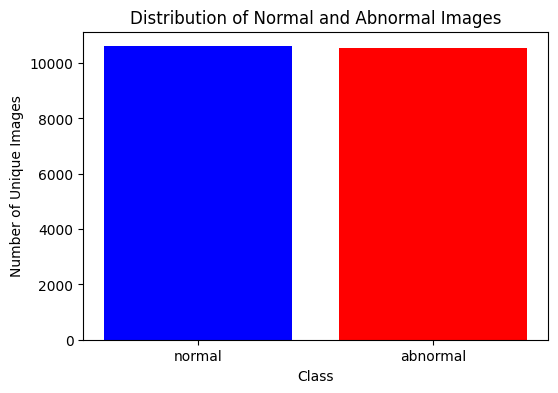

Ï†ïÏÉÅ(Normal) Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: 10606
ÎπÑÏ†ïÏÉÅ(Abnormal) Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: 10564


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = "/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/last_train_augmented/last_train_augmented.csv"

# CSV ÌååÏùº Î°úÎìú
df = pd.read_csv(csv_path)

# Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Í≥†Ïú†Ìïú image_id Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏
unique_df = df.drop_duplicates(subset=["image_id"])

# 'label' Ïª¨Îüº Í∞í ÌôïÏù∏ (Ï†ïÏÉÅ: "normal", ÎπÑÏ†ïÏÉÅ: "abnormal")
if "label" not in unique_df.columns:
    print("‚ùå 'label' Ïª¨ÎüºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§. CSV ÌååÏùºÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
else:
    # Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò Í≥ÑÏÇ∞
    label_counts = unique_df["label"].value_counts()

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, 4))
    plt.bar(label_counts.index, label_counts.values, color=["blue", "red"])
    plt.xlabel("Class")
    plt.ylabel("Number of Unique Images")
    plt.title("Distribution of Normal and Abnormal Images")
    plt.show()

    # Í∞úÏàò Ï∂úÎ†•
    print(f"Ï†ïÏÉÅ(Normal) Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: {label_counts.get('normal', 0)}")
    print(f"ÎπÑÏ†ïÏÉÅ(Abnormal) Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: {label_counts.get('abnormal', 0)}")

In [ ]:
import os

# ÏÇ≠Ï†úÌï† Ìè¥Îçî Í≤ΩÎ°ú (last_train_augmented/images)
folder_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/last_train_augmented/images"

# Ìï¥Îãπ Ìè¥Îçî ÎÇ¥ CSV ÌååÏùº Ï∞æÍ∏∞
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # CSV ÌååÏùºÏù¥Î©¥ ÏÇ≠Ï†ú
        file_path = os.path.join(folder_path, file_name)
        os.remove(file_path)
        print(f"üóë CSV ÌååÏùº ÏÇ≠Ï†úÎê®: {file_path}")

print("‚úÖ CSV ÌååÏùº ÏÇ≠Ï†ú ÏôÑÎ£å!")

# ÏµúÏ¢Ö

## Train / Val / Test Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# CSV Î°úÎìú
csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/filtered_data/filtered_train_df.csv"
df = pd.read_csv(csv_path)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏ (Ï†ïÏÉÅ / ÎπÑÏ†ïÏÉÅ ÎπÑÏú® Ïú†ÏßÄ)
df["label"] = df["class_name"].apply(lambda x: 0 if x == "No finding" else 1)

# Train(80%) / Test(20%) Î∂ÑÌï† (stratify ÏòµÏÖòÏúºÎ°ú ÎπÑÏú® Ïú†ÏßÄ)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

# TrainÏùÑ Îã§Ïãú Train(90%) / Validation(10%)ÏúºÎ°ú Î∂ÑÌï†
train_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df["label"], random_state=42)

# ÌååÏùº Ï†ÄÏû•
train_df.to_csv("/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_val_test/train/train.csv", index=False)
val_df.to_csv("/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_val_test/val/val.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_val_test/test/test.csv", index=False)

print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

Train: 39142, Val: 4350, Test: 10873


In [ ]:
import pandas as pd

# CSV ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï
train_csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_val_test/train/train.csv"

# CSV Î°úÎìú
train_df = pd.read_csv(train_csv_path)

# image_id Í∏∞Ï§ÄÏúºÎ°ú Ï§ëÎ≥µ Ï†úÍ±∞ (Í∞Å Ïù¥ÎØ∏ÏßÄÎãπ Ìïú Í∞úÏùò Î†àÏù¥Î∏îÎßå Ïú†ÏßÄ)
unique_train_df = train_df.drop_duplicates(subset=["image_id"])

# Ï†ïÏÉÅ(0) / ÎπÑÏ†ïÏÉÅ(1) Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
label_counts = unique_train_df["label"].value_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print("Ï†ïÏÉÅ(0)Í≥º ÎπÑÏ†ïÏÉÅ(1) Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:")
print(label_counts)

Ï†ïÏÉÅ(0)Í≥º ÎπÑÏ†ïÏÉÅ(1) Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:
label
0    10375
1     3263
Name: count, dtype: int64


## TrainÎßå Ï¶ùÍ∞ï

In [ ]:
import pandas as pd
pd.read_csv("/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/train_val_test/train/train.csv")

image_id          class_name  class_id rad_id  \
0      7e86aee54688699519f47582c4d44bf3         Nodule/Mass         8    R10   
1      0cd17ac8af6bb78438a190ec56085b71          No finding        14    R11   
2      abc53b4a032de3231d80353c6f49e3a8          No finding        14    R13   
3      c2c54eed2dd73e20ef0e5af5a4aa1feb  Pleural thickening        11     R9   
4      17bf6589a34c41b8ae38e4942e70f92d          No finding        14     R1   
...                                 ...                 ...       ...    ...   
39137  5562ea946b0ed8574dd20d05a001d6c4        Other lesion         9     R9   
39138  848a8f3f7a4d210c2ee4901b0e07369a          No finding        14    R13   
39139  bdeeec185619e393d3cbd8f532f95c15  Pulmonary fibrosis        13     R8   
39140  d89ccf78c040252a66c9942cd95eb5d7          No finding        14     R7   
39141  83a177262aeb002703fb62d5694051f6          No finding        14     R7   

          x_min     y_min     x_max     y_max  width  height  label  
0      0.843810  0.552684  0.874663  0.588801   2593    3018      1  
1           NaN       NaN       NaN       NaN   2336    2836      0  
2           NaN       NaN       NaN       NaN   2375    2826      0  
3      0.663014  0.184425  0.724070  0.221593   2555    2825      1  
4           NaN       NaN       NaN       NaN   2336    2836      0  
...         ...       ...       ...       ...    ...     ...    ...  
39137  0.775089  0.267121  0.792939  0.288867   2521    3081      1  
39138       NaN       NaN       NaN       NaN   2375    2430      0  
39139  0.703125  0.223264  0.839410  0.441319   2304    2880      1  
39140       NaN       NaN       NaN       NaN   2336    2836      0  
39141       NaN       NaN       NaN       NaN   2750    3160      0  

[39142 rows x 11 columns]

In [ ]:
rm -rf "/content/train_augmented"

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
import shutil

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏ ÏÑ§Ï†ï
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.1),
    A.Rotate(limit=10, p=0.3),
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_name"], min_area=1, min_visibility=0.2))

# ‚úÖ Í≤ΩÎ°ú ÏÑ§Ï†ï
train_csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_val_test/train/train.csv"
input_dir = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/filtered_data/filtered_images"
output_dir = "/content/train_augmented/images"
os.makedirs(output_dir, exist_ok=True)

# ‚úÖ CSV Î°úÎìú
train_df = pd.read_csv(train_csv_path)

# ‚úÖ Ï†ïÏÉÅ(0) / ÎπÑÏ†ïÏÉÅ(1) Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("üîç Í∏∞Ï°¥ ÎùºÎ≤® Í∞í:", train_df["label"].unique())

# ‚úÖ ÎπÑÏ†ïÏÉÅ X-ray Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
abnormal_df = train_df[train_df["label"] == 1]

# ‚úÖ Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• Î¶¨Ïä§Ìä∏
augmented_images = []

# ‚úÖ Ï¶ùÍ∞ï ÏàòÌñâ
for _, row in tqdm(abnormal_df.iterrows(), total=len(abnormal_df)):
    image_id = row["image_id"]
    image_path = os.path.join(input_dir, f"{image_id}.png")

    # Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÌôïÏù∏
    if not os.path.exists(image_path):
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {image_path}")
        continue

    height, width = image.shape[:2]  # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ ÌôïÏù∏

    # ‚úÖ ÏõêÎ≥∏ Î∞îÏö¥Îî© Î∞ïÏä§ Í∞ÄÏ†∏Ïò§Í∏∞
    bbox_rows = train_df[train_df["image_id"] == image_id]
    bboxes = []
    class_names = []

    for _, bbox_row in bbox_rows.iterrows():
        if pd.notna(bbox_row["x_min"]):
            # ‚úÖ Ï†ïÍ∑úÌôîÎêú Ï¢åÌëú ‚Üí ÌîΩÏÖÄ Ï¢åÌëúÎ°ú Î≥ÄÌôò
            x_min = bbox_row["x_min"] * width
            y_min = bbox_row["y_min"] * height
            x_max = bbox_row["x_max"] * width
            y_max = bbox_row["y_max"] * height

            # ‚úÖ Ïù¥ÎØ∏ÏßÄ Í≤ΩÍ≥ÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÎèÑÎ°ù Î≥¥Ï†ï
            x_min = max(0, min(x_min, width))
            y_min = max(0, min(y_min, height))
            x_max = max(0, min(x_max, width))
            y_max = max(0, min(y_max, height))

            if x_max > x_min and y_max > y_min:  # Î∞îÏö¥Îî© Î∞ïÏä§ Ïú†Ìö®ÏÑ± Ï≤¥ÌÅ¨
                bboxes.append([x_min, y_min, x_max, y_max])
                class_names.append(bbox_row["class_name"])

    # ‚úÖ Ï¶ùÍ∞ï ÏàòÌñâ (Í∞Å Ïù¥ÎØ∏ÏßÄÎãπ 3Ìöå Ï∂îÍ∞Ä Ï¶ùÍ∞ï)
    for i in range(3):
        augmented = transform(image=image, bboxes=bboxes, class_name=class_names)

        aug_image = np.clip(augmented["image"], 0, 255).astype(np.uint8)
        new_image_name = f"{image_id}_aug_{i}.png"
        output_path = os.path.join(output_dir, new_image_name)

        # ‚úÖ Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú Í≤ÄÏ¶ù Î∞è Ï†ïÍ∑úÌôî
        valid_bboxes = []
        valid_class_names = []
        for bbox, class_name in zip(augmented["bboxes"], class_names):
            x_min, y_min, x_max, y_max = bbox

            # Îã§Ïãú Ï†ïÍ∑úÌôî (0~1 ÏÇ¨Ïù¥)
            x_min /= width
            y_min /= height
            x_max /= width
            y_max /= height

            if 0 <= x_min < x_max <= 1 and 0 <= y_min < y_max <= 1:
                valid_bboxes.append([x_min, y_min, x_max, y_max])
                valid_class_names.append(class_name)

        # ‚úÖ Î∞îÏö¥Îî© Î∞ïÏä§Í∞Ä ÏûàÎäî Í≤ΩÏö∞ÏóêÎßå Ï†ÄÏû•
        if len(valid_bboxes) > 0:
            cv2.imwrite(output_path, aug_image)
            for bbox, class_name in zip(valid_bboxes, valid_class_names):
                new_row = row.copy()
                new_row["image_id"] = new_image_name
                new_row["x_min"], new_row["y_min"], new_row["x_max"], new_row["y_max"] = bbox
                new_row["class_name"] = class_name
                augmented_images.append(new_row)

print("‚úÖ Î™®Îì† ÎπÑÏ†ïÏÉÅ X-ray Ï¶ùÍ∞ï ÏôÑÎ£å!")

# ‚úÖ Ï¶ùÍ∞ïÎêú CSV Ï†ÄÏû•
augmented_train_csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_val_test/train/augmented_train.csv"
augmented_train_df = pd.concat([train_df, pd.DataFrame(augmented_images)], ignore_index=True)
augmented_train_df.to_csv(augmented_train_csv_path, index=False)

print(f"‚úÖ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏôÑÎ£å! ÏÉàÎ°úÏö¥ Train CSV Ï†ÄÏû•Îê®: {augmented_train_csv_path}")

# ‚úÖ Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÎäî Ï¶ùÍ∞ï Ïù¥ÎØ∏ÏßÄ ÏÇ≠Ï†ú
saved_image_files = set(os.listdir(output_dir))  # Ï†ÄÏû•Îêú Î™®Îì† Ïù¥ÎØ∏ÏßÄ Î™©Î°ù
valid_image_ids = set(pd.read_csv(augmented_train_csv_path)["image_id"].unique())  # CSVÏóê Ï°¥Ïû¨ÌïòÎäî image_id

for image_file in saved_image_files:
    if image_file not in valid_image_ids:
        os.remove(os.path.join(output_dir, image_file))  # CSVÏóêÏÑú Ï†úÏô∏Îêú Ïù¥ÎØ∏ÏßÄÎäî ÏÇ≠Ï†ú

print(f"‚úÖ Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ ÏÇ≠Ï†ú ÏôÑÎ£å! ÎÇ®ÏùÄ Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í∞úÏàò: {len(valid_image_ids)}")

üîç Í∏∞Ï°¥ ÎùºÎ≤® Í∞í: [1 0]


  3%|‚ñé         | 525/16234 [03:31<1:45:38,  2.48it/s]


KeyboardInterrupt: 

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
import shutil

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏ ÏÑ§Ï†ï
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.1),
    A.Rotate(limit=10, p=0.3),
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_name"], min_area=1, min_visibility=0.2))

# ‚úÖ Í≤ΩÎ°ú ÏÑ§Ï†ï (Google Drive ‚Üí Colab Î°úÏª¨ Î≥µÏÇ¨)
drive_train_csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_val_test/train/train.csv"
drive_input_dir = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/filtered_data/filtered_images"
drive_output_dir = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_val_test/train/augmented_images"
drive_augmented_csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_val_test/train/augmented_train.csv"

# ‚úÖ Colab Î°úÏª¨ Í≤ΩÎ°ú ÏÑ§Ï†ï
local_train_csv_path = "/content/train.csv"
local_input_dir = "/content/local_images"
local_output_dir = "/content/train_augmented/images"
os.makedirs(local_output_dir, exist_ok=True)

# ‚úÖ Google Drive ‚Üí Colab Î°úÏª¨Î°ú Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ (ÏÜçÎèÑ Í∞úÏÑ†)
print("üìÇ Google DriveÏóêÏÑú Î°úÏª¨Î°ú Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ Ï§ë...")
!cp "$drive_train_csv_path" "$local_train_csv_path"
!cp -r "$drive_input_dir" "$local_input_dir"

# ‚úÖ CSV Î°úÎìú
train_df = pd.read_csv(local_train_csv_path)

# ‚úÖ Ï†ïÏÉÅ(0) / ÎπÑÏ†ïÏÉÅ(1) Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("üîç Í∏∞Ï°¥ ÎùºÎ≤® Í∞í:", train_df["label"].unique())

# ‚úÖ ÎπÑÏ†ïÏÉÅ X-ray Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
abnormal_df = train_df[train_df["label"] == 1]

# ‚úÖ Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• Î¶¨Ïä§Ìä∏
augmented_images = []

# ‚úÖ Ï¶ùÍ∞ï ÏàòÌñâ
for _, row in tqdm(abnormal_df.iterrows(), total=len(abnormal_df)):
    image_id = row["image_id"]
    image_path = os.path.join(local_input_dir, f"{image_id}.png")

    # Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÌôïÏù∏
    if not os.path.exists(image_path):
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {image_path}")
        continue

    height, width = image.shape[:2]  # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ ÌôïÏù∏

    # ‚úÖ ÏõêÎ≥∏ Î∞îÏö¥Îî© Î∞ïÏä§ Í∞ÄÏ†∏Ïò§Í∏∞
    bbox_rows = train_df[train_df["image_id"] == image_id]
    bboxes = []
    class_names = []

    for _, bbox_row in bbox_rows.iterrows():
        if pd.notna(bbox_row["x_min"]):
            # ‚úÖ Ï†ïÍ∑úÌôîÎêú Ï¢åÌëú ‚Üí ÌîΩÏÖÄ Ï¢åÌëúÎ°ú Î≥ÄÌôò
            x_min = bbox_row["x_min"] * width
            y_min = bbox_row["y_min"] * height
            x_max = bbox_row["x_max"] * width
            y_max = bbox_row["y_max"] * height

            # ‚úÖ Ïù¥ÎØ∏ÏßÄ Í≤ΩÍ≥ÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÎèÑÎ°ù Î≥¥Ï†ï
            x_min = max(0, min(x_min, width))
            y_min = max(0, min(y_min, height))
            x_max = max(0, min(x_max, width))
            y_max = max(0, min(y_max, height))

            if x_max > x_min and y_max > y_min:  # Î∞îÏö¥Îî© Î∞ïÏä§ Ïú†Ìö®ÏÑ± Ï≤¥ÌÅ¨
                bboxes.append([x_min, y_min, x_max, y_max])
                class_names.append(bbox_row["class_name"])

    # ‚úÖ Ï¶ùÍ∞ï ÏàòÌñâ (Í∞Å Ïù¥ÎØ∏ÏßÄÎãπ 3Ìöå Ï∂îÍ∞Ä Ï¶ùÍ∞ï)
    for i in range(3):
        augmented = transform(image=image, bboxes=bboxes, class_name=class_names)

        aug_image = np.clip(augmented["image"], 0, 255).astype(np.uint8)
        new_image_name = f"{image_id}_aug_{i}.png"
        output_path = os.path.join(local_output_dir, new_image_name)

        # ‚úÖ Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú Í≤ÄÏ¶ù Î∞è Ï†ïÍ∑úÌôî
        valid_bboxes = []
        valid_class_names = []
        for bbox, class_name in zip(augmented["bboxes"], class_names):
            x_min, y_min, x_max, y_max = bbox

            # Îã§Ïãú Ï†ïÍ∑úÌôî (0~1 ÏÇ¨Ïù¥)
            x_min /= width
            y_min /= height
            x_max /= width
            y_max /= height

            if 0 <= x_min < x_max <= 1 and 0 <= y_min < y_max <= 1:
                valid_bboxes.append([x_min, y_min, x_max, y_max])
                valid_class_names.append(class_name)

        # ‚úÖ Î∞îÏö¥Îî© Î∞ïÏä§Í∞Ä ÏûàÎäî Í≤ΩÏö∞ÏóêÎßå Ï†ÄÏû•
        if len(valid_bboxes) > 0:
            cv2.imwrite(output_path, aug_image)
            for bbox, class_name in zip(valid_bboxes, valid_class_names):
                new_row = row.copy()
                new_row["image_id"] = new_image_name
                new_row["x_min"], new_row["y_min"], new_row["x_max"], new_row["y_max"] = bbox
                new_row["class_name"] = class_name
                augmented_images.append(new_row)

print("‚úÖ Î™®Îì† ÎπÑÏ†ïÏÉÅ X-ray Ï¶ùÍ∞ï ÏôÑÎ£å!")

# ‚úÖ Ï¶ùÍ∞ïÎêú CSV Ï†ÄÏû• (Î°úÏª¨Ïóê Î®ºÏ†Ä Ï†ÄÏû•)
local_augmented_csv_path = "/content/augmented_train.csv"
augmented_train_df = pd.concat([train_df, pd.DataFrame(augmented_images)], ignore_index=True)
augmented_train_df.to_csv(local_augmented_csv_path, index=False)

print(f"‚úÖ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏôÑÎ£å! ÏÉàÎ°úÏö¥ Train CSV Ï†ÄÏû•Îê®: {local_augmented_csv_path}")

# ‚úÖ Google DriveÎ°ú ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ (Colab ‚Üí Drive)
print("üìÇ Google DriveÎ°ú Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• Ï§ë...")
!cp "$local_augmented_csv_path" "$drive_augmented_csv_path"
!cp -r "$local_output_dir" "$drive_output_dir"

print("‚úÖ ÏµúÏ†ÅÌôî ÏôÑÎ£å! Google DriveÏóê Ï†ÄÏû•Îê®.")

üìÇ Google DriveÏóêÏÑú Î°úÏª¨Î°ú Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ Ï§ë...
^C
üîç Í∏∞Ï°¥ ÎùºÎ≤® Í∞í: [1 0]


  1%|          | 167/16234 [00:27<07:16, 36.78it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: /content/local_images/9598f874069cca35ff56d54925d35ccb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9b1d076abcb937c2e19f7c2e10dbcbc0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5955a4d3f94e8125db08141bd25a6824.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5fb44599ac9e8866dc107e366467cafc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/357b22f02be38869ae859f0add02b898.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da8a1f7ff197b044c9080c8ad34b1df2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7f461c0aaa21762f7e9e7e1e7b24dc9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3911f0e97683eb279550e59ad3213da0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e90a23fb8d5ce13eb766d538afcafea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0ea4221d568ab487af7c433a3df6307e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  1%|‚ñè         | 225/16234 [00:27<02:13, 119.94it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/25c278c9f3eac8a0f53780aa5e615e23.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5895fa847d7ce6fbc0c1ad1ca998b613.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c201c69926e59f0c1dfeeeb8365ff05a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b48d6f9b38b698b6ac534ec7ded5c4e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b08d54426c6af35ea469ecb63d047fbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e1d60fdb0e8b11d6198093e11afb562b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7c5f3e2c0518bba6ca3464c385d4787c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d36704fc4f9a8f997128b92551bbc4d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1dafb16f8c69e188cf2152200e0cb2ef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15b164c54f0bf0baac308b47a45a1468.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/67923e1fdac310042f5feb9f788839bf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  2%|‚ñè         | 283/16234 [00:27<01:42, 155.05it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/070d087c1badb18ee110e19cbe158a40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/353564207b9d09b26db607c43d99ce18.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/046ad82db74a4155eaff3586b0d1e068.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b01037a08ba72220deddf845bfd02466.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/14c5c3e0782fd77750815c5d2b565e72.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6312578be73812b1634727a012980bc6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a5a2a3b02ccb9c3145d553d269e4b0b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/764eeaca1e91f7410e68f3daf40de6ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ed4cf45940bbfbcdc31cf4289c1c1e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/51b168d29879c8972aa29d9f31f4b00c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  2%|‚ñè         | 299/16234 [00:28<01:50, 143.85it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f35a721ceb1f89cbbd33ade57b32f4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5a58e4e711cccb78407ae86820d643d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8b32bb8de86a0f89db7241a3de5eb5c2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f1c4779f16c3ebad57ecb73dcf2a2c1d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2534b21e1fcdf7748a07109999952840.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a5beb1c44c49e97f1f46e5071c5c38e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2592036272857648c597c9045a6588d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/98dca7e62a4f2d47455b9a275fa75a08.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d55788f759da917cf8b89f300764dee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7cc9b48563e197c84ec4ee8d30d5b3ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  2%|‚ñè         | 326/16234 [00:28<02:41, 98.50it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5b2e28bd44d10e3e10605d0d95ffba22.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3cdce1131cdbbbc959330bb08be55a3d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cc9a84f1f3942ceb845c5f174e5b70cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c3abe21f7e07452e6760cdc2cab95296.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/316b07c8233162f6c57b23d94b823ea8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/424c14b6f0a526ca2e8b4e9be9f70e03.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0b7995c5e532803dc1bd077eaa4d2a01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b22bd21cfb3258bad7d934f036c34b5b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7242fc163c07f6d286ed049914d962e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cfe3e67ca5f8235d64e51416a26e70cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58e1820f96aa84a141c9e217c46dfe71.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  2%|‚ñè         | 345/16234 [00:29<04:33, 58.15it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a946684583c7bf346b18e1d69d17e9cf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/43cbc92d48a9318036e947277c3981fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/363dc405e14ed95659d88707f54730de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d9caa9e06ec349f19f871e3fe2f343a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d56fd281ce49dd0ed4dfcf1d72ca78d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7df5c81873c74ecc40610a1ad4eb2943.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/43c1e275bc208f31cc3b1a6c8fda1ea7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e03a12bdc2f03b99a92662e992ea810.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/78e8eee238eeb6f386be08ece092167c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0b0e106a53f9dc3b28a9b15f94510b7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3bf8346b7d5b0743713624143004772f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  2%|‚ñè         | 374/16234 [00:29<03:34, 73.90it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/14a097373f1e4e57878c3929fd2f3b4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2285e92d66a166fa72444a73f4c5fc52.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bc7483c563cf172e46390a235cdc63b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/353564207b9d09b26db607c43d99ce18.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b56bc6d22b192f075f13231419dfcc8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4fa30afdf5d4bbfcfd9071e2a56e7a4b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d2de60c06501603f1d4842fa71808636.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca72b54e1dc0ba04d64631ccd30acb9d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1730d2ebd1cc96e9e5656cdf916ac7f8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3b887c0550e9722c9b86b7c22ad09e11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23f267e42a7e9f496aa143fe11f241ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  2%|‚ñè         | 383/16234 [00:29<04:54, 53.82it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8a7ca215a9c86fb9a1352de720c182f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/86c1b099be1f08120cdc722e88738dc0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/26fcfa2a147cabce7658e1ea656e1efe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1fce42f55a0de66eb161fc831cd33cc3.png


  2%|‚ñè         | 404/16234 [00:29<03:58, 66.50it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/499bf22f9d6aba3f7da0609d935c9e1d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5562ea946b0ed8574dd20d05a001d6c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd3fe876153eeddad8bab49b129ea081.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/be85b7d55e0ef589729ef4dd6ffc38fb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/63af905bd663fe539c2b6c3190dd222d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/86c1b099be1f08120cdc722e88738dc0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c2079e62ddfb06a8a5300cefaa3a970.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f591f6e017545ab779d1e88735340128.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/159c46115f7d74337f83074f1b99114d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0061cf6d35e253b6e7f03940592cc35e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/606147f7461d5d7642f887d6b1b9d16b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  3%|‚ñé         | 470/16234 [00:30<01:47, 147.24it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddec878b93cd18918c2b81bca339a5e9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7e6c0dc72fa1db4a501f7ac5f6aac040.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aad2e740715e926cee0a56a56efa26db.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e5d63ef8a922c6775c51ce9b511235b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/df2e21b90ce0510ed66e161136cf60ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cc9a84f1f3942ceb845c5f174e5b70cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a6377016b455cd0f2b6e64bf1af6cc7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9e1a8854e0bec89e37445f9cbf7bb95.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cdbd07a6e9e17958d4cafd4278872806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  3%|‚ñé         | 501/16234 [00:30<02:29, 104.99it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7f5eab5de5307d4ae8e2a0fa99c0b41a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ba459709d0d25824e0baf9f6d4f94e6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b76cca59757045fa3cedad238c878354.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8634131ee43469be8f4f75ab4595b10.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d5eaa2c2ae8e05956394f24470224843.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d21c69075630b741fe0629e696fa167.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0abd4fc2425edd5c2efb2c149e9319c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c09a2d6a72b0f14763619224335d685e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87f7997c901c0026e338e6f6d79b385f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  3%|‚ñé         | 513/16234 [00:31<03:23, 77.39it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/980cbaa4ca9127c95c7a24cfa7b08598.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/39095bfc67751891aebabdeeb8b89f5a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/62071e073320c21515baab6e5c55ddf8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a95d641ac8ee1a9f186cd0b8c0dca7ef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3637a1935a905b3c326af31389cb846.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db8d818bc4047e5c02af17c31bb78009.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/44ca3d27effe04ec7ac6e46ef63099b5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db65300cb20b50abb1e3b30f908ef3e0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a99a720cab88405baaf789e85ce20c45.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec7572df0f93d21860c5dc1147d1393b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bbac60d6c7695f5eeccb56cb56336f6d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  3%|‚ñé         | 533/16234 [00:31<03:33, 73.70it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f69a67703fe0e5e5bd9535025fbff414.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/51b32791c77b71fca56fc28f10ce770c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/33c856f133a5a726ffc26fe36d451518.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68194ba7f002feafff03a21625a07305.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/708249b5f1cff1ae05f850da5fc2b625.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8573fa95ec3defbe2dec45d85a5093a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/414615baf78e32f3405cbcf5b742895d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd33be932bca447f6bf5b83b03018806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5c236bd87dff8c15d259c70b842620aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3156b5feb62ed8cfdafef21f1f82a6c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee3b2a3399a40af7703ce312d43df635.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  3%|‚ñé         | 565/16234 [00:31<03:32, 73.72it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3312ab0661750f9899b4589eae97731a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c0343764fd0e6b3edb40b15740a597e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82c8e033e6fde13b0bf365370407d342.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80615519a6e4a619f88f76994b4a05ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3411581087b63a70a2bdba24e55ff4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d617b24dad98aa3b1f2d645828095355.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27179c32f1a5d2b20d5a289372823554.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30303a4b9ba969bea4e676cbd4a2496c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e1e596163010acb347ac7fa1a48d8d9c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fbbc76c4db97f2f7caa7926655f13d32.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  4%|‚ñé         | 602/16234 [00:31<02:20, 111.52it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/83e7cd905776606181931c7b695db12f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b821bbaa6723f749a915b00b94a69977.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/008b3176a7248a0a189b5731ac8d2e95.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a45407e8b1daab75a1217b65de60c29d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dff6766d2464bfe77de7f6f19edbf51a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd3fe876153eeddad8bab49b129ea081.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1cb2f31d6914dbb6550d2ed5538fc184.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  4%|‚ñç         | 635/16234 [00:32<02:10, 119.77it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aefca6fbdab82ce59b2c7cceed75d062.png


  4%|‚ñç         | 648/16234 [00:32<03:01, 86.08it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/877a53d035ddd0a518cb4c08f7f0d962.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34557d39d42d74a3355d509f340cfc8a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/023a8b8557d1fd59f272c63be6f3d4c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c797ab3749e39389929f6b188eee412e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd3fe876153eeddad8bab49b129ea081.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c577dc6594dab44ebbd6964de673eaa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/236c84dba2293e1afd669eee1b6511c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/033e1637bed9b9f3dccac9c6c419adc2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d106ec9b305178f3da060efe3191499a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2aac840e7e6f54e6fe0003c60c51c57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3312ab0661750f9899b4589eae97731a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  4%|‚ñç         | 669/16234 [00:32<03:10, 81.80it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae3382840414ce4de46c3827674b9709.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f5a3aa315379bb01b8b4c9a1ece8e2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/88e33acc19c4296385bb217cf333d8ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8d6a0dcadf3c7322e146e729f4ac4ebf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5766dfc49e91557e8cd4a06a406b8890.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddff143851d1399b550480a41b4c6fe2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/39c0cec7df2082421f852bc79cb333a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2546f825d7846960568c710eab2cbbd3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0005e8e3701dfb1dd93d53e2ff537b6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bbc8cca2bda1c6bc5b66715a12830d78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  4%|‚ñç         | 695/16234 [00:33<03:02, 85.37it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/de4ab903cee751d979e2a7c14f51500f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15c3fc505c414c69ba757cb3be3ed213.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1e685beca49d62411bb69bc4ddf7ad11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/45d77bbb17ed1131a96b6fa31327a9de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/36fb9803c515de8b2b44028af25662ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/985be77c13eb905ee8e19a45e46ab785.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22807ea675967a02baf8f510543a4a95.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9fd7f8bc66d606ffee290028c4d5d1f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02617da0a33fe0446a508186417c2646.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7db70125d7739e6cd0c442e7b7592d4c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  4%|‚ñç         | 720/16234 [00:33<02:54, 88.96it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdd8423e5deae0ae5dc7e0547887fafc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4eed7a6bb03888eade13343f141dd5c8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c5ff01c7bfb4362fcd98f36e555b08c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdd8423e5deae0ae5dc7e0547887fafc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/07ac9545dcc585901865f7f958a7857d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dad083d8150288db33157fde49ab35f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05721adb43ab7c061733568b274c006b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f233f426d24061d9584932e52bfdbd49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/830d05f396b604388e2d7b68d79a6bbf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d740f84910f8b7f0bfb870f8f4ad8b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e7fe9cc13468517b324743c8c8b7b40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  5%|‚ñç         | 775/16234 [00:33<02:24, 107.04it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef85cda3a115da5e7399342ac986d489.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f351e56a857e49f1e5c12b0fbd43db98.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/77d6928016b9ddbb311fe1653289790e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/902ff31bc097877d97df0921ca238aa3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e093fa90e5be5666cd396d722cc84ac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/afe9c9c0bcc2c72f4fab87d9bc63cc8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e652b2cebae0a6c74e292b3112d29e6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4c4cf43e7c8529c430c1d1295fee1784.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/807797c8ef120370d45796ed35260d81.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b8c24a1eaeabd898c28a92d25cc3632.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  5%|‚ñå         | 814/16234 [00:34<02:48, 91.39it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/acc6529ff7e03c2a225fd1ddb5319db8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5a0fbc7c40ea94bef4c8342d47c05b26.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37054193bd4e6a2f3ca764088913b0f0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1e1dcf1ea1d974a5fea81b7616a11723.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8111591b7fea74653fbd7e935a74cf36.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/616f7784ae537b00b14617a57b53de73.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d791f10dbcb0ab7c0c34dafd2fdf8b08.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/305e4add9c72c91e9984305bf4e85aee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7c6bf9b40c9b53c6b49b00c0fa1e61e5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4004f114ab2ecb224ac7484957b79ea4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  5%|‚ñå         | 824/16234 [00:34<03:29, 73.68it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/81b8689df47e19fee5d5a2b104a3f8b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/25b123c53b8d9f39e9e29e4ee34c9906.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9269d70abec8d90f4790c6afaa4a924.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab5a33b1a98f405f60d41b563e741164.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643a5b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e90a23fb8d5ce13eb766d538afcafea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1296335140a042ff0270825cdae2fa09.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd2ca6c232cc1c107ad1249579b457be.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  5%|‚ñå         | 844/16234 [00:35<05:23, 47.52it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a770deeb23778c30bbf5dc7d00f75c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/768480654fabe20d0c1340a17e129808.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2229148faa205e881cf0d932755c9e40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef85cda3a115da5e7399342ac986d489.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c09a2d6a72b0f14763619224335d685e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02cd1d17763c869ff3d4af5e28539456.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/65dfd8ef3a4201185c6fd6e9135cb20d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/528b0f9791c96c9cb1b2e4f510223f8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7324c001e2512d3ea9197b0151c6c1b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  5%|‚ñå         | 871/16234 [00:35<03:54, 65.44it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d70e8f6924ff1e80d6b008965df94e08.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f111f79e145a2062200644c1e77dbd4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1a414a1cb6b545c2ee4de4abede481c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2ca9713ed2b4fb5632aa8647769c1a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e04fc8c293aab8b63db7576e123a7d84.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b5f927abb8fd8e0800d2ad31a5620c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0c8a1f0f9ecb4748b67876c19af37ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aba445ebea68177bc4f3a519ee27daff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/77d6928016b9ddbb311fe1653289790e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/379da637859b61609c15e1f4ed2a5e7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  5%|‚ñå         | 887/16234 [00:35<04:03, 63.12it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/36d12290ed702e358cabe1d85657dafb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e76af44f2856bf89d69d00d43536cf8c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6ae2757005410f45933298a2bd5d7f50.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b48d6f9b38b698b6ac534ec7ded5c4e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3583d368951a896ea95b498bb4efaec4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/45fad4fe08460cf9aec10986ba13c582.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/62fad4135a04319bc5e499828b05ac70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/beaa1ae511a49bd86ee5c090f91c80d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a4f9965e83bfad45d66d4afa5d28cc5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f5647785cac236ffe0ec3287f9f6aa84.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  6%|‚ñå         | 901/16234 [00:35<04:38, 55.11it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee9e445e316c60e028de2486e3f459df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ceaa4c6e93b4496df1831cccc3e433a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fe9e2c89c75a48f88d5d7274ff939b31.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/038fc325ff4aa0a21c76d5dd7c740c89.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8a81e64b8258068648760ba016d0d3a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf9eb0e92ca13ace0ac71331f964371.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54513c2ba05c261ea2b2a87455634b1c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdaace04fa79a60e8542a3b573288076.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5cb875c0e27e2af51deea598506dd926.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9caac1a690115767b3d4f97702f571d2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  6%|‚ñå         | 908/16234 [00:36<04:48, 53.07it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9def44a5c7f43c29e24752e03add7809.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b57e21ea64ba9736e0711bdbbe53c221.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3df005a70ab162381374fd43655aa145.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f32fbc404c68b727c5bf14bca3ec7b5e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9ea6802588a0cf35c44631bf01f9bd7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23c9516db65572bae3125bcaead302d3.png


  6%|‚ñå         | 920/16234 [00:36<06:56, 36.79it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/258d918ebb5b4e4d13e381f0df399b5a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee9e445e316c60e028de2486e3f459df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cdc9449b58f831981f7df30de936077d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5dfd21f7ffbb5183cb8a2b7874de381.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc206ae1d3ef8a63e90642dba9f75e4a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cefc99738c5307f12d9104f31ff2c1c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d730f10402fbb1de01aa617b80a8242.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8169688849f800eed6dded6f1c10a352.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdde865328435f214633b4858d9a4d20.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  6%|‚ñå         | 945/16234 [00:37<04:56, 51.65it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15a12089e9c773cb200ee8959740e1b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/43cbc92d48a9318036e947277c3981fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/59d215990b0e15b66e129d47f1b34943.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7cc9b48563e197c84ec4ee8d30d5b3ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/04031e57794b9e8861e3c65e935f11d2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3ef9ae515fb3cd3565e2c9875b3e0aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9f2360f56f61751a254678ec0adbc77d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e8e6ff19c3be05a4ccfb20abc4202d52.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7a4bbf44262ba36208dbb20153f4569d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1e96e84ac07738cd2f019b1c1d1aac5c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb0c86ba705f5dfebc0d3b4d59d2dcab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  6%|‚ñå         | 1003/16234 [00:37<02:02, 123.88it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b08d54426c6af35ea469ecb63d047fbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2aac840e7e6f54e6fe0003c60c51c57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/edbb3284303d5df669dc8bd73ea38358.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0b0e106a53f9dc3b28a9b15f94510b7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5fb44599ac9e8866dc107e366467cafc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1f68a73472d32146d1cbe3bcd9355337.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/299278f67dc5e40ee4fd003595c6e8d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/167a1190bb99a8d01efdd75802745376.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  6%|‚ñã         | 1035/16234 [00:38<03:39, 69.11it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/afb6230703512afc370f236e8fe98806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d9f6c5f7623550374aff527ad8ba6ccd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fd810298e165ef0b9a88bb25fda7a34b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdde108a7d024a734cdbed2952f64fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e8d3736396b615c0798033f37e4a481.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9ea6802588a0cf35c44631bf01f9bd7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1280dc55c1ff852024be232c2942e3fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cdc9449b58f831981f7df30de936077d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3dcbf04ea4cf926b6efb6ac526d5ff9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  7%|‚ñã         | 1108/16234 [00:38<01:56, 129.96it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f31dd0e07a6342b11cb64cbc8af90835.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8cb084ad48ad4a21e15bdb8f4567ed8f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8cb084ad48ad4a21e15bdb8f4567ed8f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b3f160c75b16300c0f4a89ce8814d1bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ec2fcd26cb91d4d33596c69c46e0816.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2fd65c3d2a4c8d35293784167c7a2348.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab9d58c665c19627affd36ec20815090.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/917974e9208badd0cf8ed8f757276a1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0abd4fc2425edd5c2efb2c149e9319c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  7%|‚ñã         | 1126/16234 [00:38<02:46, 90.98it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6fbeb3ec1ec16b267f98fc12cbab9b6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9188790e0ad5b3a06595039d9314baad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30a08276cab4bd3ba231b2307341b987.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a0a6050fdda9f59eff1ca6a197883fcb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2aac840e7e6f54e6fe0003c60c51c57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aff45c4a432e02d85ff83fc3de55cbb9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3dae58e1cf69a2284f2a44ded5c7405a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1c2edaf3f7c1867f34d76dafe8f53d80.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2480b9f63cc65e052dc0b9ad19c866e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  7%|‚ñã         | 1153/16234 [00:39<02:45, 91.31it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6e1f33532a2f3f93d17d2be963cd122.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cefc99738c5307f12d9104f31ff2c1c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/053cf0f0a75926ebd53f0265bad6aee4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1bc4c3008d6a7144722daa35a7ff2b00.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/21086ab046da90a4526e5604670a96ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d4654c4c7def98196c0f8f14277ec7c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc7d6c6fa1fdde25e0aa64a1f6fd594a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/07d004fabfd7246f9ed4283dd5237deb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b8c24a1eaeabd898c28a92d25cc3632.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a4fbc9ade84a7abd1680eb8ba031a9d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d0e636b3ef2ccbb0c67b3243a1478ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  7%|‚ñã         | 1178/16234 [00:39<02:19, 107.72it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1606093b9d036cda7e30316ada6ea2cf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fdcbaf21dccc1202812b5233b960de0b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a692a1afd469e83448d1148facc77de7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f9d48a25ddad7cb044c500cb7266455a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/610d69d7787f995a196a5d8ea8ed1be5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/320636f4d907fe2a72073b7b5fe33f86.png


  7%|‚ñã         | 1202/16234 [00:39<02:56, 85.22it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d0e636b3ef2ccbb0c67b3243a1478ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f680a42a3444d3739c5552face67bf18.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cbc971fb918adb51914a165519ba121a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/033e1637bed9b9f3dccac9c6c419adc2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae127045cca13da6dbfee11df1f08c7e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68f7ee667e33c638abc21bcd543ad9d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f4573aa154b6ee5f4ba4dc90626f5ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf3f071a229e2d4433abcb38c4b35cac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7cf206f4cfa9f72eb70cd9d5d9200185.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/226452107c14a6218e9c4d582025110b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  8%|‚ñä         | 1233/16234 [00:39<02:06, 118.73it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f5b2547ee619395f63368aab8996f2fb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b4105a81821522d6bfe3d18d9b757eb4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/83bf2acb96d1e39c553401a9c994eff1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e4915e84e38de5d90efe0ecfd8f2cf6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef9ba80e23c77ad5c619e74bfbdffd8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7307f00233a2858176b4b8c93213d7de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d211355c013edb6306146222ebb2082f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9943805f08872ab64d994fc84ff1b25d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15f023463d88b8f8bc852a9a7b72e6e3.png


  8%|‚ñä         | 1273/16234 [00:40<02:17, 108.56it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a69a393d7beccc1043d5ee8cf0517d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/357b22f02be38869ae859f0add02b898.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2954986a6bc846398d3cc9bc2297ed84.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f9004576db9e423ddce7bc64608e2aed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/803e047ce22c14175d0631e947ed1599.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/acd377b981077dfd46028b37d3efb502.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc7a5aa2e71f3a9cd2ee1a871303239e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc979a294242406c565414d75dd68f9f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad52065fa03e78f1a4d5046e8434ec1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6f5f1420c9f88f1ec8b886e3700410f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  8%|‚ñä         | 1287/16234 [00:40<02:59, 83.50it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8fdf29fa92d82675c73489bcbb4dda0a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/963e75d60b45a08a1de456d383759167.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0906a09b04f8d82c2cad5b820602a403.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bb7d4479b3065e5912e328c065733504.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54513c2ba05c261ea2b2a87455634b1c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/efb4c40bcdca8c2e5100a9febf5fbd4b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7f6545a0985a090403178267ff0295a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e231c613316a725fb7f844b9390fa024.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/963e75d60b45a08a1de456d383759167.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/19417bae94986e8c122ae6efd92e3997.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  8%|‚ñä         | 1298/16234 [00:40<03:38, 68.41it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6669f6481deca63ed9c421d5ac012c76.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d66132dc1a3e262df38c3ad25626a00.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/62863bee894cbb15f96074e8da760b40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca06e2f4999e77fe76003a86b64a0710.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6833c509c10b569d6167db70b83ee5d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c87a39abf714b710d0539e246739d783.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1756a285d1bc917bbe55024b0727a836.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/967f2ad4d9bd6d377127624161468188.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/167a1190bb99a8d01efdd75802745376.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa8115db4830d2b29eccf4f133341a7c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a9ed4b5aaf129325369ebae1cfd5e321.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  9%|‚ñä         | 1397/16234 [00:41<01:33, 158.55it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8634131ee43469be8f4f75ab4595b10.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8fe0e719bc142d9327cb86cc28e82b03.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/010018c93ed33ae56ed048ee54867e46.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/31873abb42a5af56c33d1681971d014b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c6266968277d8d98717a106dfb716c3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a94ecf839c2405342ebcb57648444e2a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b3cc453518cf826875edcd3d5778ee87.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/18ee9ef3baea468de2087e0edd85e919.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9da65d59721d58bd125a4fc94b6ffec6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae3382840414ce4de46c3827674b9709.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/12ccbda1f9c224e5d5496cd7fe3d26d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  9%|‚ñâ         | 1443/16234 [00:41<01:30, 163.22it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05c0c802db4f100de8e2a9fa4aa62d14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1dafb16f8c69e188cf2152200e0cb2ef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9259faeeda26a934fb32c74b8682e15f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa7b469e21cf7a4e7afe9f17cf721259.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/55fb526d34d6a1397c64f537883fefec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a5e985887d6db5408eeac67bcdf771c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0f186e3eba8d9ebd51feed957204ddbf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1374c483d258203eadf6c6a525899d51.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d433568de3111a8536c18e27eff73a47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0ad8549835ae5a3208c03ce618e79a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7c6f191b5d28bc1992e491d906f0d1a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

  9%|‚ñâ         | 1494/16234 [00:41<01:22, 179.25it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d60854afebf749f87a8c95a07cb30d48.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a8dd1496dde8d6f63316c8ec2a823b38.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4f3f489a6b0257782ee57deaba29b0d8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/761156f763bd414dfd2037ae413d5fe8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fe90142bc4523ef5e2413ba94415e037.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf95785b8e8bf924e9cf0b51faef41aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b5284b043c6459e1e1e0a4a328cad79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e0856fe29f4d2eecc45dcac43c39c1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 10%|‚ñâ         | 1561/16234 [00:41<01:04, 226.40it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30303a4b9ba969bea4e676cbd4a2496c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dd2fcc4feaa9544f3691e1db071e7e8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e5776831430f043f18d70c93239457a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/508c4c30d17b6c425cecaaa7121c578a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0ea942db524a895c4bc433e03c3cd3a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/64b17a1d9119aa0a4df55d164eae856b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/81e1bdd75db3ed8260cd2a8a206107a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6081e75c58a050442a9ff3a5a2a51ffc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37a64f131e20057e6649e0cf60a3efce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cad7f3b0b26e674d67eb5a735c0a9bbe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b4a7269d3fcbed43638a44892088ac4a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 10%|‚ñâ         | 1604/16234 [00:42<01:55, 126.68it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c92a0bd2d3c781a82946934351821e9a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb159c22e0b94e4f00fab42d40efb584.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37d00f2fdb0521a0f3fd6c7ec458ff61.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f8418a411444f8ea00f9b3affe70a758.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8772752985ad53b7c0214c4c954dd01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/89bab84561df6af7b88b6a7d05254725.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/72bce8eed8324b1544f1698f56a2b0ba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a1134e92282815efb505a93105083393.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/170709246c0ac68fa305fb3acc2cfb77.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37111bde86ae8d81aa66f2f46f89c03b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 10%|‚ñà         | 1681/16234 [00:42<01:22, 176.68it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c62972a4eeaf465e0461d4d74394366.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/79ff39552d8204ba42c5041e7650effc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/258b0025af766aa2a485e3221da4b46e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/379da637859b61609c15e1f4ed2a5e7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fe9e2c89c75a48f88d5d7274ff939b31.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/48c44319fb3ad32555821ee0c74e6719.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c58bc096aa929d9645f0a15a62771893.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2583527ca7c4a6e278fb4506ba8637ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 10%|‚ñà         | 1704/16234 [00:43<01:45, 137.27it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e67e4cab40626c54b8fc20ce6e9e4273.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d6d95f11e158dafc5fe2955b81192f51.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf95785b8e8bf924e9cf0b51faef41aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba68c12f2141bba79d9c29322c2c295a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/31873abb42a5af56c33d1681971d014b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2229148faa205e881cf0d932755c9e40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/683ec9af11ca7fe33686ddce989d3768.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab5a33b1a98f405f60d41b563e741164.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/08ce56202e44175674fc5f5517e74db4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/26d9a51c0e889911fadbfd7219c6540a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 11%|‚ñà         | 1739/16234 [00:43<01:48, 133.51it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/46ddca654164928e6c422e3e2eb24f9e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f680a42a3444d3739c5552face67bf18.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/768db39e794f0d37d296c418e50d8126.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/75de97fbdf15aa3e1927a97ff9479327.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/85cfc59f138f490784170dbaeb0112a7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf36a90601939ea964925fce1f0cc41.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae7e40fec9afc78a66a48232532faa07.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/edc6ab1b2233143d011edf7706c32b6c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/995533127aa50c3b1a64829055850319.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4d911f55a3576833aa411f5718c8021e.png
‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: /content/local_images/9598f874069cca35ff56d54925d35ccb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 11%|‚ñà         | 1803/16234 [00:43<01:29, 161.15it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68f7ee667e33c638abc21bcd543ad9d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/78dba36bdd34da385efcca7bb9ff5fde.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4f3f5460ae80ab6ec1bf00b33087a828.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3d6be0fd234f4be9a57ea0ec00d1e6b6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd2ca6c232cc1c107ad1249579b457be.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3e8b186331c3acb1b9f82b1f2cbe56d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/45fad4fe08460cf9aec10986ba13c582.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc24ad13f52fb8b4135f5a18a982a1cf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b88d596bf6fd4664434f6525ac632f74.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1259ee6feb64a552e3521ddcb395888c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dad083d8150288db33157fde49ab35f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 12%|‚ñà‚ñè        | 1875/16234 [00:44<01:11, 199.49it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b1d44013e0b4fab1d38af22901e312c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/407530901f066b6b5b5d486495617fc8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e7ee695015acda8604f34f0da3849efb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddf85fd2c17b59964206fd00d8a71917.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b01037a08ba72220deddf845bfd02466.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff924bcbd38f123aec723aa7040d7e43.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc3d3675ea30a5f3885dcc1b258a6a2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3759c5c3b6dd31e4f79dad538500928c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7eda1e28e4cee7d8016276c87b76259f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/835b1552b7be3350d697503504211aa4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a76bd15bd83fe8e44ccdfd058d42d4aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 12%|‚ñà‚ñè        | 1925/16234 [00:44<01:19, 179.09it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/009d4c31ebf87e51c5c8c160a4bd8006.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/28ff3d4ede34ff71de27c9091b25fc44.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/97f48290716a3cad241bf74f3ce47143.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cc6fc3c91c3d9061b11b65f8257a2ad0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/64c4cafb533cc198f91e6ddbddee9a0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f4573aa154b6ee5f4ba4dc90626f5ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a4fbc9ade84a7abd1680eb8ba031a9d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec9927d1322b9c33ad265903e06ee108.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8b32bb8de86a0f89db7241a3de5eb5c2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c351e3875444070992012c35126bf41f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdd8423e5deae0ae5dc7e0547887fafc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 12%|‚ñà‚ñè        | 1944/16234 [00:44<02:19, 102.18it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52ad48bb3bd43f207c56972dbc29ce4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/48c44319fb3ad32555821ee0c74e6719.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7021edd61c6640c497c774e6ef61e491.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8566d9205d59b74e1828d61c6739e15d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/78076acd1cd80e71ff62d4fb58f047bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1700104c53dad4e23980cc44dfec1b64.png


 12%|‚ñà‚ñè        | 1959/16234 [00:45<02:44, 86.66it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bbcafeecae64804e1e0780b49bafd5bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdd0bebed953f69413213d387c9717e7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d433568de3111a8536c18e27eff73a47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da668869900c862ce12bd06fde5feb8d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9b389242ffe5059b705ee8f5aac00bd5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/573b1453639e5e3e842956bbc7048547.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee87cffb47722b3161ea80a75fa307a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca2a64d3c50654de6327f3880bbc17d3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7664d4a022c8ca9a94c0bb8adb48209c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3d592a653c8fefc7c85a43cf64c3c0f0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4be367babe3680af9278fa53a5f6224.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 12%|‚ñà‚ñè        | 1975/16234 [00:45<03:00, 78.81it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a7eaf74178c4aca851e331b2c8503ff1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da43f621e092ce20c96b5f4efcc2ea43.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/127f66766091998a72268caf4ec34bef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/673f5442a2c3f1b012fcb0efa77527af.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b6ec0aa221b1f430e8f5cb1696844dd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a1134e92282815efb505a93105083393.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f06d2ac151719fe4d2cf5546a9dbb734.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/662fe30af3399b56c1579e95b0c6c87e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22d12a2c3610060793453d39c4330429.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdddb2fbd93102ff052738ae31ff7e75.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 12%|‚ñà‚ñè        | 1991/16234 [00:45<03:15, 72.85it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/42e45c17b9e92a9108ef6f2f47804d8a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba0f97b49906ccf1bf205dd7ca108c06.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f635b5ecbb18bd0b90c881dd055fb089.png


 12%|‚ñà‚ñè        | 2015/16234 [00:46<03:34, 66.28it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad0fa9668da66d13e4d8cdbd7d9b215c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7ed7def1a431371634f38e5113c396f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c4d68aad9fdec87b76853d26744026bb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f57a452f52edaaaf43d41c78f1f73181.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3c5ff1eb0d55039f3bbc3c4875543c3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4a528876744e3a37158645935028c57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5e679b95d1ce29e2bb0938b6b305a265.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b87b691b9ceeaf0c9539b2844be6e1e1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8c000de5f90b8dd6ed6f77923874c20e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b995057fed5cd441821c8a954697ea57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e47a3c35eecd25bf915998f192b32d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 12%|‚ñà‚ñè        | 2025/16234 [00:46<04:54, 48.26it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d2ee971a8b41f013def83648617b43cc.png


 13%|‚ñà‚ñé        | 2032/16234 [00:46<05:53, 40.21it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3156b5feb62ed8cfdafef21f1f82a6c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/85ce3df7831fce5801ab5b798aa79c10.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b42e930c16c0166dbeae813b47bb8b07.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/63415dfe4d7eb0c122a6818e84195475.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1700104c53dad4e23980cc44dfec1b64.png


 13%|‚ñà‚ñé        | 2037/16234 [00:47<09:59, 23.68it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/45f8fd11d471cfb910172d26f8157ee5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab11a974837f5313912804939bfae79e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/70050ec61a0f61030b7ce001eab0fefa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2583527ca7c4a6e278fb4506ba8637ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc50039c45fdb6c9224bfff5ba4e64b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3875a7e4eb1bdb443470a1abbe93cb58.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a137951bfa9be68fec6cb6ef0a679d20.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/90823fdce55e57a5c6de680ccf9ffc38.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0b62bc6644be72ce4dfa5ea77a77f311.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 13%|‚ñà‚ñé        | 2052/16234 [00:47<07:45, 30.45it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ace398a669b2e39eb12fdd80d5e526a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92928a912d1736877050c8c00c3dacdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e82cedee4afa9651a7bd0d57a23280f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3929f29e01d98f3666da7114c4e554ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa8115db4830d2b29eccf4f133341a7c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5bb68aea19f6eb00d28d0e6386afecfc.png


 13%|‚ñà‚ñé        | 2061/16234 [00:48<08:01, 29.45it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e952e4a222f3b3e022f0e0815ce9b02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf7b4c06372d21a1d7dc81dcd6757dfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d9a6b1f6a4175eaee343eef3c1134928.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84a27b87601b81cd39889ced2d489f70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a040343977edb13d15604e5e3c125e59.png


 13%|‚ñà‚ñé        | 2069/16234 [00:48<08:23, 28.15it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3156b5feb62ed8cfdafef21f1f82a6c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/adec73c9152d88ac38c830602cd8b1ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7520d54e60d31f2310d1eb5c77a7507a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7c5f3e2c0518bba6ca3464c385d4787c.png


 13%|‚ñà‚ñé        | 2075/16234 [00:48<08:45, 26.94it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66d28ab317b915eb7a400ad4a005ebc0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d106ec9b305178f3da060efe3191499a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ed696103132aee457b0e11ce0d7b7d27.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ceaa4c6e93b4496df1831cccc3e433a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb8f8632ea2bb7e136adee05a286105d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dd8944d0fd8028eae388491f0d0ed3e1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/861788e0e73283c8872552da6e6a4b7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/014e3dd712dc90f61da7ce8747d8c4c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47062412df3d5cbfe56f5753cfc45035.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 13%|‚ñà‚ñé        | 2094/16234 [00:48<06:04, 38.81it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e583b6c45b5622f1e714f57521a22a30.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef85cda3a115da5e7399342ac986d489.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bc87c2265556912b25d36f2fef105a01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a2119f5509f4f9b7811ff4e7d786a62.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5714aea8b5a2d9b030196646842a6d47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9ea6802588a0cf35c44631bf01f9bd7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c2d843a231c6aa30c9239083bc612f7b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/46ddca654164928e6c422e3e2eb24f9e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/997fca43b97287e53c551c3d4753edcb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7eda1e28e4cee7d8016276c87b76259f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 14%|‚ñà‚ñé        | 2223/16234 [00:49<01:33, 150.48it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0114c5cd093c742334d5a5fa14140421.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d0e636b3ef2ccbb0c67b3243a1478ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e18a100e84aefa9da53dc8cc2fd4f22c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2d4a3f928bbd1cf6cec20fc617af2fa3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5170326726acc5b2f50c4426417f3b23.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/08e3d3783927a15d35137c756c1a7e0b.png


 14%|‚ñà‚ñç        | 2238/16234 [00:49<02:17, 102.10it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/167a1190bb99a8d01efdd75802745376.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05d676834dbed1639cb5eea70c1e307b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/36d12290ed702e358cabe1d85657dafb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/325fece9273ff0bf0ea08a42fe24626d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3bf8346b7d5b0743713624143004772f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54e6184c63c75a9695d7effc17969ad0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c184ac40eb6c1713f28f34582f768c5d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/830d05f396b604388e2d7b68d79a6bbf.png


 14%|‚ñà‚ñç        | 2250/16234 [00:50<02:40, 87.08it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/861788e0e73283c8872552da6e6a4b7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8933f5b721da3ab96e2a6b7efa61fc24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae127045cca13da6dbfee11df1f08c7e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/427db646765e399ae43ccd98c50effdc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/639a44bdf6f3cfe5d05f96683604e758.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a1134e92282815efb505a93105083393.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/611310e3e1ec37e73e74f1a756b3bb69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7ffe83778375bb8229b12c2ad4570c0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0b1b897b1e1e170f1b5fd7aeff553afa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 14%|‚ñà‚ñç        | 2271/16234 [00:50<03:14, 71.70it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3bf8346b7d5b0743713624143004772f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2a364dea24600221fb6208567bda008b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/21cf533a9fe77bdbee21babd427a0d1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/07d82e7e5749cbc21633134f489a7fbf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3b887c0550e9722c9b86b7c22ad09e11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ad9acab15f15722dada12e90242178c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23f267e42a7e9f496aa143fe11f241ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0c179bc7f39eeb0add4d6e00e51732c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2ec7fc4c6f718c7da540ee96d64b724.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 14%|‚ñà‚ñç        | 2288/16234 [00:50<03:33, 65.19it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/be95363066a0f6e2d9644cc14b39d3e1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2dae0b56a64f3708706e63711d970243.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ddadcb081c3779b4b569d9ec57f5208.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/081d1700020b6bf0099f1e4d8aeec0f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddcd8866dd04a1b1e87bbcf3ab9c6760.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c37c1b0387090f95fa7f6b38542f1d19.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53d0c95f346e365f81fb95c5c6a6d027.png


 14%|‚ñà‚ñç        | 2308/16234 [00:51<03:14, 71.73it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9f9c6cde56f7e1b36c94f6d72fe0a2f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d2e80d6cae14b72a824f1ac625d23472.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d5203efda6708309bae1c60534f16192.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3312ab0661750f9899b4589eae97731a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d18baf80b9c942af3688e9ddeb3dd18b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7531cbe38186e2d9aeb1b5de83984b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9b1d076abcb937c2e19f7c2e10dbcbc0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c577dc6594dab44ebbd6964de673eaa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/86c1b099be1f08120cdc722e88738dc0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/715278d742ca1d668e20ffab02e7fe36.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 14%|‚ñà‚ñç        | 2325/16234 [00:51<03:27, 67.04it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4972b3b12340e6f5b302c45ac60a1f75.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2cb21c7b25708742a6eed6ba4a59e6eb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/42e45c17b9e92a9108ef6f2f47804d8a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/60ba71ee189d4892f99bdbe3fa08f98a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3dfd38de2eecc6492fa8101d8245b76.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6314692e3a4f5fc017e052dbd1cd683e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecd1275cbffcd530452e2b20dd070b4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/07bedc010fd13a8e5903473ebcf39cd1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d06c3bda18d5dc7ff656faf4358615a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c7235e58f45b35fa517bb1a855f7504.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 15%|‚ñà‚ñç        | 2366/16234 [00:51<02:00, 115.03it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/354fc9f443af86eebc10e9b06a22481b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8f98e3e6e86e573a6bd32403086b3707.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e04fc8c293aab8b63db7576e123a7d84.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e82cedee4afa9651a7bd0d57a23280f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37a64f131e20057e6649e0cf60a3efce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2511b7d5a4657b9b161d7c3e69587ae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f3bb25eb6ae1a19b982c6ba56f725e2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/04bb8bd7ee6f88a16623fe5c6dd4da91.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 15%|‚ñà‚ñç        | 2378/16234 [00:51<02:45, 83.66it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/39e1084eccfc3b7961eb19ea7ecaa8b7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/afb8601b20f73b8ca44fbb72ceb39a1a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3d51d381e84870cd453748be166fb7ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6dd1a29dcafeb9545da50d85324bb781.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/01cbbeab94b4d2bfd5cd8a467fee46a7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b48d6f9b38b698b6ac534ec7ded5c4e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/407530901f066b6b5b5d486495617fc8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 15%|‚ñà‚ñç        | 2409/16234 [00:52<02:48, 81.89it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27e113d3d158dbdd548b534c26164e55.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab730707fed0edaf38a9b788b226b9f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8d6a0dcadf3c7322e146e729f4ac4ebf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09f0b00bd079304f72c079d369925aee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5b295b1def2ae7beedc752eb0fd668aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b01037a08ba72220deddf845bfd02466.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d47efdd2527ed1646f31bec6dcbbcdc1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5161ae032f0552603b6de965b2bb3e09.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/20e88cb9beaf2949c3fdd01827404235.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30174f91133f986dd4f8f95d2b2d92b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a1781dd524b50ec31f94c184bbb6b4c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 15%|‚ñà‚ñå        | 2442/16234 [00:52<02:18, 99.43it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bc7483c563cf172e46390a235cdc63b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53b894bd3ec511ae4bec7b5b47ce260a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b18121dc37e2914d7a630c3ac781c9d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b770403a1d0ab861f1944f8b896afcae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/952b065c0aac9ab20a9bcc051987a00f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cad7f3b0b26e674d67eb5a735c0a9bbe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8a24a5d72c93b72685287c27e0d4623.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d41ae882fa21638f67228ff85cb05ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4268985caaa0bb4145dd056d5aa84b27.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a629d0f2bd9dfde3991ef4aec75e1c8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a29cfd596229d4ac24ad8cbaa103c11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 15%|‚ñà‚ñå        | 2516/16234 [00:52<01:05, 209.47it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e63db3c1b443ca561e426b798096b8f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7bd856b30b7129c81c6803c7f1fe23b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e63db3c1b443ca561e426b798096b8f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff60d1425ffd67d12aa61e3eb3b45040.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/42aa1ebd4dbf93efaeb7442f6484ed00.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41bce02542a90273d79a8cc6d214170d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0608fb82e9965a0a6f3607f93e304d2a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b065d3b4da92b8015b47224341661fd8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37ec1f4e30acc60a1dd892ab9036274a.png


 16%|‚ñà‚ñå        | 2539/16234 [00:53<01:45, 129.35it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8c000de5f90b8dd6ed6f77923874c20e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8ecc4a091d838d9a615f100a907d5ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8acab997bea043eb15c9aa293b095374.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30174f91133f986dd4f8f95d2b2d92b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6acc13406eda521dedfca734ddbe3e25.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3d592a653c8fefc7c85a43cf64c3c0f0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/673f5442a2c3f1b012fcb0efa77527af.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7210d8d2f377ab74e46acfb4a158e79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d2e80d6cae14b72a824f1ac625d23472.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d14f7d9469a5cdf6a60feea8f190f38d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b8202fc93f201492ab7880cb6b4c9165.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 16%|‚ñà‚ñå        | 2564/16234 [00:53<01:43, 131.63it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7f96d122bf50434dcfd3dd9b16d2c05f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4d314293037f079e4916231d262212d3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/430e3d75b2b3924e82d5fcf9bec84e8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdde108a7d024a734cdbed2952f64fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2860567dbd5d3f2597072e0b0e45ccd6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e583b6c45b5622f1e714f57521a22a30.png


 16%|‚ñà‚ñå        | 2595/16234 [00:53<02:11, 103.49it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c50bb66530634bfac9d5487a607e8211.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/14fbd0bf63f33188f29e54275fb7cafb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e8e6ff19c3be05a4ccfb20abc4202d52.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dadf619a987c90a4f2c250ae26ed2041.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/50625148e666a338a8588bd1b1e0b7f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab11a974837f5313912804939bfae79e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/041762ff7fe435f22ea7541e77bfeafa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87a516c6446958f3f56cf3e4ab8a0c5f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c31081e8ada2990bcbef0f12ea60b07.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b37cd57257591d19366e5a6f23ceb8f6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9f9c6cde56f7e1b36c94f6d72fe0a2f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 16%|‚ñà‚ñã        | 2652/16234 [00:53<01:20, 169.12it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee47fd39217a0d25550cb6b9badd3ee2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0cc2c92c421a86197cf135253e57e51.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6833c509c10b569d6167db70b83ee5d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d791f10dbcb0ab7c0c34dafd2fdf8b08.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643a5b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f9ba2d912ef79893510ff58bafa70558.png


 16%|‚ñà‚ñã        | 2673/16234 [00:54<02:08, 105.83it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9f7a76f14e777ed53606a7d6d3ef3890.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d70837c881f01f8c51afe9616879de50.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddec878b93cd18918c2b81bca339a5e9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/330423a5c20c1fab3ba43d966bd6e2e5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41bce02542a90273d79a8cc6d214170d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cc6fc3c91c3d9061b11b65f8257a2ad0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/256b0ad89e73b03f15635e647c2bdb02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2d914572fd6d5cd4b158067b5a1eda1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/62b2efa946bc993544fe42785b40fcdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9850d20ee4d2bf722154a90ae07ddff8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 17%|‚ñà‚ñã        | 2704/16234 [00:54<02:03, 109.39it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/352ab0683046ce107942e9e477007b72.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba8cf1b843900f3e754f6e172f62efc4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8794eea4b84bc93cdf786327e3e606f6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9089facaf103cdb37adce579bd64f064.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23c9516db65572bae3125bcaead302d3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ac0f6a69e78c3adae6905693914ba80f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8be157ed11fc1bb06d77637ae7da43bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/719ef3ece6314f7962ffe89cfd4cdb7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/33d11e9c98ade6b3937407364fd07103.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 17%|‚ñà‚ñã        | 2745/16234 [00:55<01:48, 123.97it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27179c32f1a5d2b20d5a289372823554.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/af9a9224cf1f0dd1bacdb95a1b8ea36b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1a85266eec98f756269a91a56d5fb1a8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f1d1e5089e66fc256f08e621b5dcc9bf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd3f8d06c2eab0bfe5428dfe3f9a1499.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6371c2201020a3f7e4c5a56f8f7a4fea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30d01b42c2a0495ceea5873455e4c4e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5164a68ca025b37b2ee9525b66c01071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c854dff7593a38e6e7a83330ff32ac86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2d9dbcfad0e6a4bfeae0c6fe1f780d98.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 17%|‚ñà‚ñã        | 2774/16234 [00:55<01:54, 117.70it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0a52e18d443efb28d082f0ae8e7b893.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b87b691b9ceeaf0c9539b2844be6e1e1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15c3fc505c414c69ba757cb3be3ed213.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0df2d378c04b59dbd0f7c20352c35e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5ad7caaee32f3d5647a993ab299b1c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/273a53879b3ba9afa3d6d1e3aea0a453.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2ca9713ed2b4fb5632aa8647769c1a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cb0165cbc17f5d8d0fc4deab637aa2ae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/134cd4124bd1d75563cb47732742e331.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb2b28e4c2d24f22d4f67804eef69ecf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4fa30afdf5d4bbfcfd9071e2a56e7a4b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 17%|‚ñà‚ñã        | 2798/16234 [00:55<02:47, 80.10it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce2c97cafc1a2ef349e996e91abd554a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8900e436ef9c73811c793b32127de1b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc7d6c6fa1fdde25e0aa64a1f6fd594a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a43f966e46d3da7816d35145890ad03d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e6af94d17007c94d858b3bb7adb7dac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d552285af8132602f23a7951eec8efe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/326f5799de625f4fddd67b9c7827bfe5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8d6a0dcadf3c7322e146e729f4ac4ebf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d21c69075630b741fe0629e696fa167.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8b704237f088b80ad737f48ff49d8cd9.png


 17%|‚ñà‚ñã        | 2817/16234 [00:56<03:06, 71.83it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b5284b043c6459e1e1e0a4a328cad79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ed9f5c40c389c115089e5a8f15e162b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23c9516db65572bae3125bcaead302d3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b8202fc93f201492ab7880cb6b4c9165.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/24b3b89454ece6db0ba1a5cb83f3421a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c3977477c6ca3ea8a3d18ba0e4afed4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ed696103132aee457b0e11ce0d7b7d27.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8fe0e719bc142d9327cb86cc28e82b03.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ace398a669b2e39eb12fdd80d5e526a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 18%|‚ñà‚ñä        | 2861/16234 [00:56<01:47, 124.32it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9943805f08872ab64d994fc84ff1b25d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fdcbaf21dccc1202812b5233b960de0b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/573b1453639e5e3e842956bbc7048547.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b8d0602c3d243b1f833bc0e5885a0b0c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09d6b99ffec66ae485de851924187bfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f90442f2620175fa21b6afeda865df11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9385f1142a0999cae18ceb73dc804bc7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f68b31e44bfe5252ca65f6bc22152e61.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80b4a951ab0029dbcc40fd4480fc6162.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/952b065c0aac9ab20a9bcc051987a00f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 18%|‚ñà‚ñä        | 2922/16234 [00:56<01:21, 162.77it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff4cd09578f32d803e5996a4a2ec29b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eacc53e9f724bd51a38d76306e6db8d2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/98f00bae3d65ebcebd046c12e5b27f7c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f5eb3e7e9ee9c4d08377de30251a94e2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d6746496137a10dbfbb4019c47174c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ab165974684980021cfd4d69d0874a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3637a1935a905b3c326af31389cb846.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2583527ca7c4a6e278fb4506ba8637ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/01b0510a8d3b0860429536653db5eb21.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e1c7cdc2d2faec46612191158a77a38a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 18%|‚ñà‚ñä        | 2963/16234 [00:56<01:33, 142.08it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7705b3f3b2a3a2de67e579119f53466e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/258d918ebb5b4e4d13e381f0df399b5a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ea43f30fdd925340ad598bb10028c97.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c42997b00e59f4523788aa9fbe1f7526.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c00a2b726b1d7854efc73ef3611c7591.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff924bcbd38f123aec723aa7040d7e43.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/42fba4329860d5995fea57553104907a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a69a393d7beccc1043d5ee8cf0517d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/62071e073320c21515baab6e5c55ddf8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/499bf22f9d6aba3f7da0609d935c9e1d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02562eb68a9c682f5f644fa7a099733f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 18%|‚ñà‚ñä        | 2996/16234 [00:57<01:40, 131.96it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f791a58edd0f0080354090193069373d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30303a4b9ba969bea4e676cbd4a2496c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd33be932bca447f6bf5b83b03018806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15a12089e9c773cb200ee8959740e1b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f51434ef988e30a05f8b0986814d9485.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2de831b92a2dc7237d2b1885ee4bb9c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db0409f17482d968dc350ae12a91d913.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/edbb3284303d5df669dc8bd73ea38358.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/af793b61efb4ac8fba4bc62475506e23.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 19%|‚ñà‚ñä        | 3023/16234 [00:57<01:56, 113.28it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cc6fc3c91c3d9061b11b65f8257a2ad0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca2a64d3c50654de6327f3880bbc17d3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b5284b043c6459e1e1e0a4a328cad79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4652edceea12613caef68322a7fddec0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23b8b9881d7effc2a5aa2b7372f01d7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/897a9061820965f894abf66586bef0a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/16b02dc3b4e8deb6c1cc686c9ef911dd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c4863368b0bf5c811a52e24fa2cd2d8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd61bab9751a2dc321165c975901bb23.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5f612ff593f8d5568d3b5d5594d96d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d2bc15eab8150cfcbcd9364c20c7297d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 19%|‚ñà‚ñâ        | 3051/16234 [00:57<01:34, 139.40it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/81314db8b8a964015628efa277e1d7db.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3479c81736f275a848b74d952ebfab29.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db0409f17482d968dc350ae12a91d913.png


 19%|‚ñà‚ñâ        | 3078/16234 [00:58<02:23, 91.93it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b5c56a5624857bd608eeadd16a7f566b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa9cd1a78a6d2d8d6e918a8c4125faf4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aad2e740715e926cee0a56a56efa26db.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e2a10eb9969b0e336a51d11dda17f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aa7fd75c84c03f4eec5b9e0468043d68.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/76f84c8d0216ec44b47059fa80049995.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2254df0c59c659c6eec67a73327bc857.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ca77fab496427204152c5bd079ea9ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68ab5b60e34d374002405dfe7f14b7ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/69cb46ac057f1c04cb0a582fcf2f8b96.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 19%|‚ñà‚ñâ        | 3119/16234 [00:58<01:48, 120.77it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d2bc15eab8150cfcbcd9364c20c7297d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5f6d317d6ef78eb1f66b9cf0f0bd8555.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aae2387bb66db167eed5051e14ca784c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/271f9008a6ac0c2fbed2ee6d40ff8750.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7242fc163c07f6d286ed049914d962e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c00a2b726b1d7854efc73ef3611c7591.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae5cec1517ab3e82c5374e4c6219a17d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa7d454b6cb43448ed5a8da49df6ce05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/39fba09b48f252efaa54f0d093a8294d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3cdce1131cdbbbc959330bb08be55a3d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4d8a51ab3ebdb9b9f91c373b56b5d7f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 19%|‚ñà‚ñâ        | 3164/16234 [00:58<01:34, 137.97it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d914b535b048cf5f93363556b0c2b16e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/511e8b50c9a7ecee4e1a8621f262e9ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2534b21e1fcdf7748a07109999952840.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7ec4a135c83baf0142cb9d7cfc597937.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/357b22f02be38869ae859f0add02b898.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ec0857964d6c66165927a14b9b7f26f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b493be668f28b801ecaa2278069825eb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d087fb5597b73624c84203ca9633a2c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1e380cbe7d0d59de0527d31486a24fa2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 20%|‚ñà‚ñâ        | 3195/16234 [00:59<02:28, 87.91it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84a27b87601b81cd39889ced2d489f70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/163898fbc57f00f58ad27e72031a541f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/543c0591a8706112a0e71620509a398f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aa89a83d50a147e44d6dc72893f01fef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1cb2f31d6914dbb6550d2ed5538fc184.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/00f2f97f74e086e1f82acc285ee4a5c5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/852ec6a0bcb9608ffee9b3fda0867f91.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2201904fdc9c81df726cb626bf58edeb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/25a73bf0f701b9275c74fc23aa30e681.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5170326726acc5b2f50c4426417f3b23.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7531cbe38186e2d9aeb1b5de83984b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 20%|‚ñà‚ñâ        | 3227/16234 [00:59<02:13, 97.41it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f3264d3c0a52bb2e280855bcfd35733.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f791a58edd0f0080354090193069373d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b995057fed5cd441821c8a954697ea57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/be85b7d55e0ef589729ef4dd6ffc38fb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/43a9edf6cea5fec0b63f8a6d9e2a50d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da9778a74d1eb6016acd497948eae1d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6b8bb3a6cc110df0f2e182c1db0b4b21.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a16dc6491142ff8c7c36f3b3f4ebd02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a0ed62efc8bf9e5053d18e250390b96d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54513c2ba05c261ea2b2a87455634b1c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 20%|‚ñà‚ñâ        | 3238/16234 [00:59<02:58, 72.82it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e285b95faad220e17e6cbfbe514733e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f33741a2c2ffaa247cea27ba87e6f4d9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3b82f17d58da80f02e2b0812606cee2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ef3fb1b703ffcb77d3709d45adf8695.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/784a4ee98cfc37a7c1ae9721bc8603ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4e6a45ca9bfadf6a01e7e451539441a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/de15c0fca6c7441dd089122ad074a7f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e5d63ef8a922c6775c51ce9b511235b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d43c6680c56521ab6aafd6babf8bd7c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb2b28e4c2d24f22d4f67804eef69ecf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 20%|‚ñà‚ñà        | 3277/16234 [01:00<02:14, 96.30it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/258b0025af766aa2a485e3221da4b46e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cffa67149b86b1359623d25f061a2063.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7cb4aab02fe2cdcf2de5b7a93f49d73.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/51eb9c41906d5d46d35740f53d37ab49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7a4bbf44262ba36208dbb20153f4569d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7962a93b582c5bc277d892f31dfc5dae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e285b95faad220e17e6cbfbe514733e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0df2d378c04b59dbd0f7c20352c35e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a0ed62efc8bf9e5053d18e250390b96d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 20%|‚ñà‚ñà        | 3318/16234 [01:00<01:54, 112.41it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4524f9b0da0eb546173210ef937b583c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d0e636b3ef2ccbb0c67b3243a1478ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4c7d33b4c5bf485af4df30bb8500a002.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/edbb3284303d5df669dc8bd73ea38358.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d86ef0cf8f2fe8de11926a45bbce5379.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80234017eb6caeada9e14d421eb0b8f8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/845d1edaada5683f85efcb17937404be.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b995057fed5cd441821c8a954697ea57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 21%|‚ñà‚ñà        | 3358/16234 [01:00<01:31, 140.17it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/16b02dc3b4e8deb6c1cc686c9ef911dd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4899401111bd09c261554c3b55009e08.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff60d1425ffd67d12aa61e3eb3b45040.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05d45c0a96b2c363f8b9a34a1f181c58.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4524f9b0da0eb546173210ef937b583c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9bb8bb42168a8ce95a57d818bc23b112.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/98617a2bbd11c4afa7be664889cdd6de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58c96358e94c768b0eeb723bf985d575.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9581123b6819b2cd1bcf6ed35481520.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ea43f30fdd925340ad598bb10028c97.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 21%|‚ñà‚ñà        | 3373/16234 [01:01<02:44, 78.34it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c24029f31fb9ae265934082ce6b47d33.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/af793b61efb4ac8fba4bc62475506e23.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/269fe47164da086b729babc8225ea116.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/be965185f4128002ad591b91c41e0211.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c75d652b2cd934bb797a9a02c6aec8ee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e31b4459572dee5881ec70c7b46dcab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6371c2201020a3f7e4c5a56f8f7a4fea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5a0fbc7c40ea94bef4c8342d47c05b26.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0a078144e3167316fa44673aa5e3aab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/93cb971f3c5504f1362de4367f9199d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5de91fab780d937e6cba46c4e807bb12.png


 21%|‚ñà‚ñà        | 3384/16234 [01:01<03:17, 65.11it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee253aab2bfa090c01a596a449159233.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/79c5d4d7f3b2e7a5a183bfbe664c699d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0ea942db524a895c4bc433e03c3cd3a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95b9b32e68bfb95100cc300664f9aae5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/736548ed94e659b342a15a4b32e71a1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e895c0a84cf6c38ffee0cfd5be9849fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6e87644b798ae36a29fc57cccf14f8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6452a9e9489dadc789cb44af7d3dadab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1374c483d258203eadf6c6a525899d51.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b412dfe3a17da1fe404b67ec756b8a67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5164a68ca025b37b2ee9525b66c01071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 21%|‚ñà‚ñà        | 3401/16234 [01:01<03:04, 69.38it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/07bedc010fd13a8e5903473ebcf39cd1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db169d0be36123bd55b866d6aa73983b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3dae58e1cf69a2284f2a44ded5c7405a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/929cadd9346edbd600e909ce306ebfb6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d926d49104e258332d45e8afb02dd575.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/18a5c8860abc63dbef3627d3e5efd951.png


 21%|‚ñà‚ñà        | 3410/16234 [01:02<03:45, 56.90it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ccce794d56a43641c1bb3d6b0253e794.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/061fa33f6ba0028fbbad8caaeac8d145.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/696214f9b38c455d2b867484da3570d8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a99a720cab88405baaf789e85ce20c45.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/231a4b73de5ac7e0218f736b6b6ff1f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4869a847a5271f2eeffe65ff1db8a9b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6a08696962a275ee2dd46d9ae1c6150.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1713f5cf5838c1592e5f712b5d4928e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e86cde1dbe7a082d03b9c38b400e4c67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/305c85dddfdddac905f288a8106ca371.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 21%|‚ñà‚ñà        | 3447/16234 [01:02<03:19, 63.98it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/967f2ad4d9bd6d377127624161468188.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2ca9713ed2b4fb5632aa8647769c1a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d754c0b8f318f683355ec2b11954abb4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37a64f131e20057e6649e0cf60a3efce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/76f84c8d0216ec44b47059fa80049995.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54fa20d07ac42e467ab67a87cf8563a3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef0b10e9d207fa0ff2f4e2f59a590970.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d647ae4618fc943d965b25c3aab3fb4c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c407f9bc14eb1d87dbb961aa226a43b6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 21%|‚ñà‚ñà‚ñè       | 3489/16234 [01:02<02:13, 95.42it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6fbeb3ec1ec16b267f98fc12cbab9b6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ba445edf32750faf59f06cb09f1ed93.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d0a7a1b8c1495d66ac9c427a36d9f6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc8aa159b1b1bfe781235fb843de2e78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95b32ce2a10f57629eb63830376237ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f09f740821c6160878d713149db4adf6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/033dae57cec0aca171d47090f299bed2.png


 22%|‚ñà‚ñà‚ñè       | 3500/16234 [01:03<03:48, 55.68it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6974b05fb97620ec153a9eb3200db4eb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/997fca43b97287e53c551c3d4753edcb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d3451478ca527968706d5075d5bf0ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/57036d99900dabe66e5294251e3f56de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e82cedee4afa9651a7bd0d57a23280f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0bed7f179df709d35aef763544ebfebf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/392910e2001c7d9710d1e11f1bf4bd73.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b5585b9fe48edd5d89069a8d6ca07543.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a137951bfa9be68fec6cb6ef0a679d20.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da1f25221a05f7b1852b8191f89aca1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d0cc84e9002c1eb219559540c014e7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 22%|‚ñà‚ñà‚ñè       | 3547/16234 [01:03<02:32, 83.21it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d54f205e3f01d2ead98f02fc1bd4c164.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41d514ff20e011d114c57e8a5058fe61.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1691ab3a82040297355b59a34c1e3fa9.png


 22%|‚ñà‚ñà‚ñè       | 3558/16234 [01:03<02:55, 72.39it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c394eadea89e5795c8037280492d116d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/682008cffca1751980b4010f4e82520d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a0da094696816e8ccc92c81602173d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b770403a1d0ab861f1944f8b896afcae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3cac0eba7aff674db58e5e7d5cebe985.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e093fa90e5be5666cd396d722cc84ac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3637a1935a905b3c326af31389cb846.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c42c054b21c3a7ff91f13e3b43e5418.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/010a3dbb67bc37800a041866844861b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 22%|‚ñà‚ñà‚ñè       | 3589/16234 [01:04<02:25, 87.08it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6833c509c10b569d6167db70b83ee5d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47188d0c91088558e62b52f1c9f06b0d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/379aef556ea6744aa51174e342fabcef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e2a10eb9969b0e336a51d11dda17f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/624fadcfe3f204dd43ce49bdce00c0f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d46fcfc88827c952da48421ecdac7e30.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8dcb48f8f81f5d883b1c85b7106a2378.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/343e1bdfaa62eb9f0148e3cd32aab124.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95b32ce2a10f57629eb63830376237ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8933f5b721da3ab96e2a6b7efa61fc24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 22%|‚ñà‚ñà‚ñè       | 3608/16234 [01:04<02:36, 80.47it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a3d018df521eaab6b4eec203a19970b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5a45ede0cbd270bf54e8a5e7fd27813.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a76703a9a5a6459ca0c4ba8407403bc0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1e380cbe7d0d59de0527d31486a24fa2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c6266968277d8d98717a106dfb716c3.png


 22%|‚ñà‚ñà‚ñè       | 3617/16234 [01:04<03:33, 59.05it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f29df9890df1e30033396c8f220a9f14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7ffe83778375bb8229b12c2ad4570c0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eacc53e9f724bd51a38d76306e6db8d2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f2f1cf0ebcbc9348fba2dcd55f6e8c91.png


 22%|‚ñà‚ñà‚ñè       | 3624/16234 [01:05<04:08, 50.66it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84eb3e8b282f648bbc43c356f058f24e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d4654c4c7def98196c0f8f14277ec7c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/12d8de45e35e8b8c896109bfb46f8a82.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7be2d2fc4e5821cbf3f5fb7d7d3a3c8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb8e11c6b2886b2d41b379e0598669b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3759c5c3b6dd31e4f79dad538500928c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5326a0f289b91e4fe88b86d5b00a7bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/44227b3ea199ef4a06524f5c843e2608.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b22bd21cfb3258bad7d934f036c34b5b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dfd523a5991fc852654bf1235c6282c6.png


 22%|‚ñà‚ñà‚ñè       | 3632/16234 [01:05<04:30, 46.53it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/222beb3cd839eacd08d35c2785e48265.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8bbf80bd095c75b2207ef57a277a661d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f5a3aa315379bb01b8b4c9a1ece8e2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ebb05b4c603d590854c621fa4f1fd5c.png


 23%|‚ñà‚ñà‚ñé       | 3656/16234 [01:05<03:47, 55.22it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c93d43336ef6d28348794b5ced1886a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/57d537d956b0881fda614facacdd4408.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/76a8a1a491e23dc44e0c33654f10c632.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dab8bef96e96c74e44e44b513760086b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/04bb8bd7ee6f88a16623fe5c6dd4da91.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/285c4b227a6c923d674fa58fdfdd2eca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bdaa2947c7003aff2cd158ae9e186dc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/492c436c00725c4c909ec6fbc9223b92.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/059ec0fc0d6840cff6e268e46f85faa0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 23%|‚ñà‚ñà‚ñé       | 3695/16234 [01:06<02:15, 92.75it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c892bb46e4187bddce8fe179d7225dc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6aee48100cc84e8ce9fa362fbac6113b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/306ed332a8e21425894424f73c17b11f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/414ae85a6ec97db19ed913bde0062b11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/551456e08a1327bdba41297c8ebb8c6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8b75d2a0acb6e0fa20ef05300b7e006.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ed6f20cff422347c954f41eac82fac8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8d09bc6c72b4f8ad8346be6c55f9f136.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0f70ba8840ab9c8f39f37768c97e78d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/614b0af08224c7163278ff78abc8bad7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/64f4fa78d723ad71e2422bc74bcd38f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 23%|‚ñà‚ñà‚ñé       | 3741/16234 [01:06<01:47, 115.98it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aaf7eca124ab4fd9fc5b7d842a0dfca7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a29cfd596229d4ac24ad8cbaa103c11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8a454755517a41861d07dd898e6572a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0005e8e3701dfb1dd93d53e2ff537b6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2729583d1f9bbee7c2f1a9f3e483936.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4987937425ec6478ba2f1c7549cb5369.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/06f3c1a8441d61da08aac07558ab5f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e7a58f5647d24fc877f9cb3d051792e2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f730c80ec55bf2f6b80001ec0686f245.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c24029f31fb9ae265934082ce6b47d33.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 23%|‚ñà‚ñà‚ñé       | 3755/16234 [01:06<02:31, 82.49it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f5e6b0ff23298eff87b65789ee32959e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da1f25221a05f7b1852b8191f89aca1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/784a4ee98cfc37a7c1ae9721bc8603ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ab165974684980021cfd4d69d0874a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a76bd15bd83fe8e44ccdfd058d42d4aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0853ab3a3dbadae1e6f28b933ddff809.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7987e0db0dcf873c778b099ebd9bf1a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c35a010256b29d6db4956f5bffff4a2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d8c27abe7add51ed3ede20c7d091f16.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 23%|‚ñà‚ñà‚ñé       | 3766/16234 [01:07<03:31, 58.85it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/85cfc59f138f490784170dbaeb0112a7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ac74ec4ce879ddfe2cb00be038821457.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d24c1ef5bcdd03fc1b01c8e6086c9d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2d4a3f928bbd1cf6cec20fc617af2fa3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8ecc4a091d838d9a615f100a907d5ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3eaab50f6e8eb3229e752d546e41979b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/57036d99900dabe66e5294251e3f56de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb319a3149253e25a32a6f2926cf67b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3d5edcf6b873d7738cd50ccaf6182ef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4c4cf43e7c8529c430c1d1295fee1784.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/20e88cb9beaf2949c3fdd01827404235.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 23%|‚ñà‚ñà‚ñé       | 3786/16234 [01:07<03:15, 63.80it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1ded9f78544969878049b01149d0dd2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5ff1fca7e25f078c81b1e22a057dcd69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eca27ff9495044fbcd347ee51a8f1187.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cffa67149b86b1359623d25f061a2063.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3ae85dcad0b8befecc06e496f3c4263.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/357b22f02be38869ae859f0add02b898.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/51422a086cffde581d437b25a71f2b20.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/281ea309fd2fd61c9955f9d29c88a092.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4127fa1e8bcb9931cc8b49367eecef78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4a46cdf01cee2a200f00daedf11576a9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a5e985887d6db5408eeac67bcdf771c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 24%|‚ñà‚ñà‚ñé       | 3820/16234 [01:07<02:21, 88.01it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/76339ec8c17dbcdd117914581cee59f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58e1820f96aa84a141c9e217c46dfe71.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7049d549349da79c6fce9744a52e470.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d74aa13b3bc96f254461e842232dbfce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/de20b8c80c04bd2dbe0782fb21738588.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/35e38672875ff60d5a131d91b4db5a6d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a4b3bf66d8876480d5ea698d3f9304a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e4391555899c8474c4d32f42b2ba21b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/499bf22f9d6aba3f7da0609d935c9e1d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c996a67b615c29ae24418c918bd44c69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 24%|‚ñà‚ñà‚ñé       | 3847/16234 [01:07<02:22, 87.17it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5b34fd56bddef0fba0a3d88286604cbe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fee46e386a84e134836e01d0b9a38154.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/316b07c8233162f6c57b23d94b823ea8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b3d1eabc4bb5b66d92f3fae7ddb67b29.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bace601f50d2f324022ae6a9ad608123.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f97b35befd831df48967fda3cef13c12.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab51ed37f90ea78c93f1e92aa8a9d749.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8c09865ee3cb674cc41dee8bca45fe5a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/81e1bdd75db3ed8260cd2a8a206107a4.png


 24%|‚ñà‚ñà‚ñç       | 3857/16234 [01:08<02:40, 77.28it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a16dc6491142ff8c7c36f3b3f4ebd02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb929e0efd696fe0f54902da5e7ec57a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8559bb12926cbc66f8a6b40a7fd1207d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a9909b1cd924cd593151ba2d3d3dd55.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b3cc453518cf826875edcd3d5778ee87.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8af84125f707b873c506f65de72e02e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/454d4b20bb55eb38f90fd51706531b9e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41bce02542a90273d79a8cc6d214170d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/acf77cd6d5785f7f95c041f350c9d017.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/000d68e42b71d3eac10ccc077aba07c1.png


 24%|‚ñà‚ñà‚ñç       | 3874/16234 [01:08<03:19, 61.88it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b4105a81821522d6bfe3d18d9b757eb4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba4a00ea7764b5ee772792a50531e9e7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff0191df898268978f2c29231450fd66.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3ddfa552c6cd137bf46a5db89f5a2ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6452a9e9489dadc789cb44af7d3dadab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/430e3d75b2b3924e82d5fcf9bec84e8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/009d837e29ba400e03856cf8d6a5b545.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66a42146929520fe337cad37816f4384.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1951e0eba7c68aa1fbd6d723f19ee7c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a8db71e482a4dc2e83a1f5eecd9568cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 24%|‚ñà‚ñà‚ñç       | 3925/16234 [01:08<01:48, 113.73it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/46355182cba3399f341d1cd6474f45ac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9163f352663788a365db4685d32099b6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a8dd1496dde8d6f63316c8ec2a823b38.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41bce02542a90273d79a8cc6d214170d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ba0b6688726a0efd3641d086a4dee35.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/39fba09b48f252efaa54f0d093a8294d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a4b41309551add1836dd1f0e96e7c594.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/62863bee894cbb15f96074e8da760b40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 24%|‚ñà‚ñà‚ñç       | 3937/16234 [01:09<02:36, 78.64it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/010018c93ed33ae56ed048ee54867e46.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4f3f5460ae80ab6ec1bf00b33087a828.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e7a534c72ee26ef1610dd6e5c94d246.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/11dbd33fc77075c94a202362ed8e197e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e49cc23db589bc0acd59a8841128560.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ea18aab66eff5e0e540553178f9cad4d.png


 24%|‚ñà‚ñà‚ñç       | 3956/16234 [01:09<02:54, 70.38it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c191a7c7c0e1847b1aebc8e8ef628aed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa8115db4830d2b29eccf4f133341a7c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e5d2d36ee724738906a15a54647d0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47d1e25eede8a23cc44fda5c031127d6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c71ce6345cf70b23ab481a2d66e9c288.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d754c0b8f318f683355ec2b11954abb4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/170709246c0ac68fa305fb3acc2cfb77.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce2c5376b597eb067395da4c7f9960aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 24%|‚ñà‚ñà‚ñç       | 3973/16234 [01:09<03:08, 65.01it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/053cf0f0a75926ebd53f0265bad6aee4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3741f47791eca3ad54e01f9c36188a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6bb5088976d0d3d51f3041b2172cffb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad58ac84f676ff6813a5df7a0057829b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/168ff8ed5a696e2b1270b6449a996cd5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87292fd850fa8494048bbdae18312907.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/379aef556ea6744aa51174e342fabcef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c42997b00e59f4523788aa9fbe1f7526.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/053cf0f0a75926ebd53f0265bad6aee4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c58bc096aa929d9645f0a15a62771893.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/305e4add9c72c91e9984305bf4e85aee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 25%|‚ñà‚ñà‚ñç       | 3987/16234 [01:09<03:30, 58.11it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/033e1637bed9b9f3dccac9c6c419adc2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/36fb9803c515de8b2b44028af25662ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f0dea85c5527d47a3b7f4227813f0b95.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa3b6b158acb587e7cfac000b3737a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d6b38dc0d4cb99ead6ff30cc999f17ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34557d39d42d74a3355d509f340cfc8a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e224b4caf02b51618bda425011636f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a4f9965e83bfad45d66d4afa5d28cc5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/662fe30af3399b56c1579e95b0c6c87e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3eaab50f6e8eb3229e752d546e41979b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2121782e288bb5fccf342938ce4faee2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 25%|‚ñà‚ñà‚ñç       | 4003/16234 [01:10<03:38, 56.08it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7cb4aab02fe2cdcf2de5b7a93f49d73.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f491935369d316678118cd07d5646de6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9c83d9f88170cd38f7bca54fe27dc48a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/46f3ff375571079569284a232627d27c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92c8ef82a9059eade4fd85c649f3b1fe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23fcdb51ca6f2495a08911d8bd8f19e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/63af905bd663fe539c2b6c3190dd222d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/afb41a2217d37b54f0427fc1c69336be.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f591f6e017545ab779d1e88735340128.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fd1bd078f5f30ad02ed984c94077bbdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 25%|‚ñà‚ñà‚ñç       | 4019/16234 [01:10<03:37, 56.22it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/910c99ddbefd826f8e28f0969d0d162f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82877be2465c084b0b9bc186fc7f158f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5562ea946b0ed8574dd20d05a001d6c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/877735b744c0d327c287cdf7ffb44406.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6b49f9a611fb606933242b3409569497.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d91b584f369006155e911a1dce5261da.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e86cde1dbe7a082d03b9c38b400e4c67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68389e585575ff6e536f3fbff8101474.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b8202fc93f201492ab7880cb6b4c9165.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15b164c54f0bf0baac308b47a45a1468.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 25%|‚ñà‚ñà‚ñç       | 4057/16234 [01:10<02:05, 97.24it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9fa07ce40365c2c37f75ba3a5486b8c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf3f071a229e2d4433abcb38c4b35cac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cb0165cbc17f5d8d0fc4deab637aa2ae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3bf8346b7d5b0743713624143004772f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca6c1531a83f8ee89916ed934f8d4847.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/498ac0c4815a890629cf509446a47238.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3024b7dc8e38999c16ab20ed51c7aa2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/611310e3e1ec37e73e74f1a756b3bb69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7253800842122c9e6e95878b46008f54.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 25%|‚ñà‚ñà‚ñå       | 4137/16234 [01:11<01:26, 139.59it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/60ef7a89da46636e62b8351d15bff6c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/63415dfe4d7eb0c122a6818e84195475.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3637a1935a905b3c326af31389cb846.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e7b51cf120ec59d369331d09bba34b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4987937425ec6478ba2f1c7549cb5369.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ace398a669b2e39eb12fdd80d5e526a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f8418a411444f8ea00f9b3affe70a758.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0e7b36dd1975188809340a634301e87.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e90a23fb8d5ce13eb766d538afcafea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db8d818bc4047e5c02af17c31bb78009.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 26%|‚ñà‚ñà‚ñå       | 4155/16234 [01:11<01:56, 103.69it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23f267e42a7e9f496aa143fe11f241ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/17a43dc27cccda142f5d54d378f4aed7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f6fc6f200924da874ae95664661e67aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6b6e002c7d2d78f98fe443c1f9af2b4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aa1ebd488f7f3cab0aa784073b0a9d70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/64a46917dfbd81f3747a1635f47f622d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3143c4090b404863d57a355e61585d0b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bc87ef332a3c532a7e86893cae30e127.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8573fa95ec3defbe2dec45d85a5093a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e9e7ccc49692f0c6fa6917d7289f6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9b9f47628be6a48ddb41aec8ba39b454.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 26%|‚ñà‚ñà‚ñå       | 4216/16234 [01:12<01:11, 168.21it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c74f4196862f688266048d27224464d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2860567dbd5d3f2597072e0b0e45ccd6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5bb68aea19f6eb00d28d0e6386afecfc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0ecc5a44cb8163dedbdf8d9049e92344.png


 26%|‚ñà‚ñà‚ñå       | 4255/16234 [01:12<01:36, 124.68it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cdbd07a6e9e17958d4cafd4278872806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/afe9c9c0bcc2c72f4fab87d9bc63cc8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a31fef91832012791b0a749471e37159.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/14600a97b1c302343b1b5850ed53ae13.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e9e7ccc49692f0c6fa6917d7289f6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9ea6802588a0cf35c44631bf01f9bd7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/29fd996e134b7e6658edb78f41022878.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce2c97cafc1a2ef349e996e91abd554a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e1eb9553f694d0eba82535625d70186c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/19850eb0ba7a72faf4b329254ab42828.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 27%|‚ñà‚ñà‚ñã       | 4311/16234 [01:12<01:18, 151.68it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47062412df3d5cbfe56f5753cfc45035.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/498ac0c4815a890629cf509446a47238.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b75b0115ce7e890c8d3cc739cfc8c089.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db0409f17482d968dc350ae12a91d913.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa4c38b3c5e53e1e84bd0923f2d8e480.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/064023f1ff95962a1eee46b9f05f7309.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/129a1e7753432edd052a2cdbfbaee00e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6371c2201020a3f7e4c5a56f8f7a4fea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b2a0d46de6a845624835477b8207cbe8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 27%|‚ñà‚ñà‚ñã       | 4348/16234 [01:13<01:26, 137.39it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/736548ed94e659b342a15a4b32e71a1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f9f7feefb4bac748ff7ad313e4a78906.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9f7a76f14e777ed53606a7d6d3ef3890.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f77548b76082f9b45c05764493005039.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6747991aa8970e35ec44fe90b309d627.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdd8423e5deae0ae5dc7e0547887fafc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2f74cb96fb90ec20839f4ff497c007f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66332eb5425bcdc6854aae970cc656b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1374c483d258203eadf6c6a525899d51.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8845010681f45c2c6f2271ac8bebdfbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 27%|‚ñà‚ñà‚ñã       | 4377/16234 [01:13<01:38, 119.97it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ec0857964d6c66165927a14b9b7f26f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/13088cbf40717bace59ef0961554c08f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fbfa7706ae60ef2f3f18211269a8d2ac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/662fe30af3399b56c1579e95b0c6c87e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddcd8866dd04a1b1e87bbcf3ab9c6760.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c7d940c13f1be3feeb46adb7e8206de9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7aea6f37597df566725da73655edcc2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a137951bfa9be68fec6cb6ef0a679d20.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/231a4b73de5ac7e0218f736b6b6ff1f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 27%|‚ñà‚ñà‚ñã       | 4464/16234 [01:13<00:44, 261.69it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddcd8866dd04a1b1e87bbcf3ab9c6760.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e18a100e84aefa9da53dc8cc2fd4f22c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8bed8c7cbb164f7e8dcc5708ef41f7b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b3588a07ee672507c31f69109089b805.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1c4d23bf90d9e32947d50b5e01ce4d78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3583d368951a896ea95b498bb4efaec4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/902d77e0d68673b7f8d12a3ab1483b95.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7043451da60cb89537435829965759c3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/628ab07625d7ac80f9c909b4380e75b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bbc8cca2bda1c6bc5b66715a12830d78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 28%|‚ñà‚ñà‚ñä       | 4516/16234 [01:14<01:11, 162.99it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47188d0c91088558e62b52f1c9f06b0d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/369bf7d495f4a800910764a6f9a9a071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9390e4ee9fcf6bdba3b1f03d40bfd4d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6f3b580b96c7912c0c0cbc15da4c9ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c2079e62ddfb06a8a5300cefaa3a970.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e45bf032d966f8d3e6fdd0f03a7fdec4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9850d20ee4d2bf722154a90ae07ddff8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba8cf1b843900f3e754f6e172f62efc4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/613fd7f3a8b48248d4027c90a414ff9a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 28%|‚ñà‚ñà‚ñä       | 4574/16234 [01:14<01:09, 168.17it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8072c8f70ffb83e6a82b01aafb25263d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/231eceaec9e603e7cdb2021bd2ccbe02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b5284b043c6459e1e1e0a4a328cad79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/59782bef0d73440e75ec2f92b4d4e38d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2a3def0aa2b27bea4235348e5d4cf345.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7ea14022f825d9bd869b05c7f10831db.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e469682b53c4c558e23632c4c7e4fe5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95d3c55f3737289bc2ea761df9a0c120.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9581123b6819b2cd1bcf6ed35481520.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ccce794d56a43641c1bb3d6b0253e794.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 28%|‚ñà‚ñà‚ñä       | 4593/16234 [01:14<01:29, 129.46it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e9e7ccc49692f0c6fa6917d7289f6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d5331c5488785e73b81760e5418a192d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ec0857964d6c66165927a14b9b7f26f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab8276dba30d7268b96c07a0fff9bbdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c0343764fd0e6b3edb40b15740a597e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8f175ebdd1fb0e26809311ca829077b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b455c6067fa5e154a2c48ac187029022.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba8c1cd9bceb450054920b79af773650.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/693008c77b426c4afc45e990f5f07287.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 28%|‚ñà‚ñà‚ñä       | 4611/16234 [01:14<01:36, 120.48it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/89bab84561df6af7b88b6a7d05254725.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e224b4caf02b51618bda425011636f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2dd5e1ec060f1389e24a4caffa6d534e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d740f84910f8b7f0bfb870f8f4ad8b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8cb084ad48ad4a21e15bdb8f4567ed8f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7cb4aab02fe2cdcf2de5b7a93f49d73.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/35e38672875ff60d5a131d91b4db5a6d.png


 29%|‚ñà‚ñà‚ñä       | 4636/16234 [01:15<02:54, 66.52it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f5a3aa315379bb01b8b4c9a1ece8e2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9581123b6819b2cd1bcf6ed35481520.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5a43f10c267152bdbf23851b50c1c52d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b78367d7be3c92afe88f13efcb6dcaf5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/424c14b6f0a526ca2e8b4e9be9f70e03.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8933f5b721da3ab96e2a6b7efa61fc24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b8d0602c3d243b1f833bc0e5885a0b0c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d47efdd2527ed1646f31bec6dcbbcdc1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2ca3716b1e7923e5f8e0fc6f8200509.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5fb44599ac9e8866dc107e366467cafc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1ded9f78544969878049b01149d0dd2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 29%|‚ñà‚ñà‚ñä       | 4659/16234 [01:16<02:59, 64.56it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/551456e08a1327bdba41297c8ebb8c6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d610aae49bf4f979e16c2d8859f5f87.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f9e722d2706d42998afff41568223a01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68fcd04c343c408db5acce03b38c2e1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8991d0302a45f1bb372795cea3f18a75.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb504655d27862892ea7c99c352d5aad.png


 29%|‚ñà‚ñà‚ñâ       | 4668/16234 [01:16<04:35, 42.03it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ea99ac7087780248ca58449abd57f377.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2aac840e7e6f54e6fe0003c60c51c57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8bed8c7cbb164f7e8dcc5708ef41f7b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d9f6c5f7623550374aff527ad8ba6ccd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9809f0d8f7d4654a2599c052a5b83dbd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b1317b9c87824f682908a6c503f8d39d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/69afc1cd6a3209dfc08651a43e7628fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4117133a86ed741c387d404a8ffe5581.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a75ffc1c7b9a233ab869e52d79cefefb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 29%|‚ñà‚ñà‚ñâ       | 4693/16234 [01:17<04:18, 44.66it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9ca97574cdfcbcd1db8ba2fb76e2dd34.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3138b15692cfedc5a35d1bf5314616e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1aaa4b217affae30113bd3a7a384a4c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56923ac65e4a3bf6e8ec0af530c4a205.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/de6e8f086381d773cb6290df0d6a7eb9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ea18aab66eff5e0e540553178f9cad4d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8222ee980c821621f5a6cff2b212b2ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/86c1b099be1f08120cdc722e88738dc0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f6fc6f200924da874ae95664661e67aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c34e6aa7a5db3386850b830dd3c45a98.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e6af94d17007c94d858b3bb7adb7dac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 29%|‚ñà‚ñà‚ñâ       | 4752/16234 [01:17<03:08, 60.75it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d754c0b8f318f683355ec2b11954abb4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c41d4f698ccccbf7068c44c8c14f4e16.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7355afc2a3a775378d54578397734408.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4d8a51ab3ebdb9b9f91c373b56b5d7f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f2f1cf0ebcbc9348fba2dcd55f6e8c91.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/427db646765e399ae43ccd98c50effdc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7eda1e28e4cee7d8016276c87b76259f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1951e0eba7c68aa1fbd6d723f19ee7c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/04d3efc7a608c4d58edb8c1b7f90a708.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9394d988f22d6f03b220ce1b1af919ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3cd8187f824b95bd1d21945cbce7a15a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 29%|‚ñà‚ñà‚ñâ       | 4765/16234 [01:18<03:12, 59.65it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37029ba2468f77989cae221948b772ae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1eb013c56b49d88034915dbee6c5f68.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/df1ba068fad70f8cfa474ee67004067c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d8f4d5daf11f2b01695b71a862aa813.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/44999de3c6dd3312011578cdbfc7116e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/20d9e4989fab7ecae4243324d81ad309.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8be5bfabd547e1ef91f0b0b7b4d597d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b23ee0544bba6ed7301111820f8de415.png


 29%|‚ñà‚ñà‚ñâ       | 4776/16234 [01:18<03:16, 58.26it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad0fa9668da66d13e4d8cdbd7d9b215c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8f186efb51af999168f501bda156eda5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bc0e94e539fcc6c3f623d6ce5db07370.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7b3fa818839a04913e45fa796203462.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/18a3dd5dcbabc9484be39f9f2f6c0756.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3f2673ee39dc21448dcf80ed2a6f128f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e0856fe29f4d2eecc45dcac43c39c1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ab165974684980021cfd4d69d0874a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5955a4d3f94e8125db08141bd25a6824.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 30%|‚ñà‚ñà‚ñâ       | 4823/16234 [01:18<02:13, 85.78it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ef589fee1b30a47d9955e4613cf901c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7eafe6a9ffafc052512cac5aa378efb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/810491951571933b11959743e41a704b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ebb0f756621fb2c6dcfa2b82d4fc8ed8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b78367d7be3c92afe88f13efcb6dcaf5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0853ab3a3dbadae1e6f28b933ddff809.png


 30%|‚ñà‚ñà‚ñâ       | 4832/16234 [01:18<02:39, 71.53it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c41d4f698ccccbf7068c44c8c14f4e16.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0005e8e3701dfb1dd93d53e2ff537b6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8004676ecf95af8cee446cbcd139a938.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e45bf032d966f8d3e6fdd0f03a7fdec4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a956ce4e56235dd8de081a965a36c2a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23e3c7a5073d74c1d2daed5ad73fb254.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/91c5f8decf441bfaf7c89e7c3dd06fd9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dad083d8150288db33157fde49ab35f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84ccfc2b291a2986d20f22861de7f699.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 30%|‚ñà‚ñà‚ñâ       | 4847/16234 [01:19<02:49, 67.04it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/395a89a6041167d0254dc826ddfe7110.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee9e445e316c60e028de2486e3f459df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6fe1659a6cacb4f2ea6ef651481e0ba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8751da44b525b4328e1457adab72f8e0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/50b13defc76ed84a3b775856bfda2dfb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/efd841b9897ceb215d30cff8e1fb85b4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a5e985887d6db5408eeac67bcdf771c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/96e6dbf6148db615d730bdc0d5d76785.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/26cff5d4eedc6c89172888ea18b09893.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/90014bdac9592e29646c4c358275fdfc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 30%|‚ñà‚ñà‚ñà       | 4889/16234 [01:19<02:03, 91.56it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/529d855ec524ddf484434d90da0e3f4a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/628ba9788c00a8fa5fd77992fa9f63ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/129a1e7753432edd052a2cdbfbaee00e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b455c6067fa5e154a2c48ac187029022.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/877735b744c0d327c287cdf7ffb44406.png


 30%|‚ñà‚ñà‚ñà       | 4898/16234 [01:19<03:11, 59.26it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05d676834dbed1639cb5eea70c1e307b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66332eb5425bcdc6854aae970cc656b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b065d3b4da92b8015b47224341661fd8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdd0bebed953f69413213d387c9717e7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1e95f585e1094cb8ddf94c1d97a4d1a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/943587a46ada0ee193c60a106ac61934.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8863e2fc68e2bb33caa4c05bdbbd363.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/522dea0833b59836405679f464299eac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d99ee7158fccfc6add49cd6b8389fb55.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0a52e18d443efb28d082f0ae8e7b893.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 31%|‚ñà‚ñà‚ñà       | 4961/16234 [01:20<01:49, 102.62it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ed9f5c40c389c115089e5a8f15e162b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c465dd63a0c768fac5d985c9d14c4aa8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e6af94d17007c94d858b3bb7adb7dac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1713f5cf5838c1592e5f712b5d4928e.png


 31%|‚ñà‚ñà‚ñà       | 4973/16234 [01:20<02:03, 91.53it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95b9b32e68bfb95100cc300664f9aae5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4899401111bd09c261554c3b55009e08.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/06b2ff94bd0270f543deb7074c2a006a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/45d77bbb17ed1131a96b6fa31327a9de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1dca2f734825798b81f034da81d257f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0abd4fc2425edd5c2efb2c149e9319c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c8015354af1a7509937c82f2979ba49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/36fb9803c515de8b2b44028af25662ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/971e2965c2e5149f64be489d589dc3d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee3b2a3399a40af7703ce312d43df635.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 31%|‚ñà‚ñà‚ñà       | 5003/16234 [01:20<02:14, 83.25it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d60fdd6237c71b741d10c85895723d16.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/36fb4eaf5da9525924d1b4ff5bdbd52f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b455c6067fa5e154a2c48ac187029022.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f233f426d24061d9584932e52bfdbd49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e224b4caf02b51618bda425011636f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c07e9a9fc06aa20e54a83cded97aa7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/89bab84561df6af7b88b6a7d05254725.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/20e27597c972c6e7fdb4d1e7638e227e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8a454755517a41861d07dd898e6572a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c2fafca7a6e8316c8bc0a3dc400b8aba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56e12dd250d23cb2199f1f90eb5a337f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 31%|‚ñà‚ñà‚ñà       | 5053/16234 [01:21<01:39, 112.33it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05c0c802db4f100de8e2a9fa4aa62d14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5766dfc49e91557e8cd4a06a406b8890.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d9caa9e06ec349f19f871e3fe2f343a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/06dfb2b996464c7b0e4c5177d433edbe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ec0857964d6c66165927a14b9b7f26f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/324c908cb345ed14be7a468a56f1ceba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8036ddc6d564439af50497faef05eec3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d433568de3111a8536c18e27eff73a47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa1d691e369b258e948303634d83b2f6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4334f287e7a843348a24c4dfa9718d6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/16bd4511e7391b3e3d7da90b6c2653d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 31%|‚ñà‚ñà‚ñà‚ñè      | 5087/16234 [01:21<02:23, 77.59it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1a4a1dfe32d84179b5ab03e56532bcde.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b1deab22cfb50881b47c52daa9993ab3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a770deeb23778c30bbf5dc7d00f75c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f4c97bfedbc71ab64cf312ea2962971e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c684171749ce2c0c601b9d69b882edb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c2079e62ddfb06a8a5300cefaa3a970.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb504655d27862892ea7c99c352d5aad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9809f0d8f7d4654a2599c052a5b83dbd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6fa7dad34b96816f31cc091a0507bbdd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 32%|‚ñà‚ñà‚ñà‚ñè      | 5161/16234 [01:22<01:14, 148.29it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/91e721ea0143333c5efe5dfb8ca98746.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1296335140a042ff0270825cdae2fa09.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd92b5a85b85e254d101eb7b1deed668.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/69e956035a447c4d4f4d28e13ed92dc4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5bb68aea19f6eb00d28d0e6386afecfc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5578d9ba48381064e92e7c9198e1f1b4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d93676d54152dd6a7a78cdf2659171d8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ceb5e06ea1a66fedab43e8bdb51890eb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d7f85337975dded50e1414cef194deb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bb99c58b3e18ca4a52dbd27495d88216.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 32%|‚ñà‚ñà‚ñà‚ñè      | 5178/16234 [01:22<02:03, 89.74it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1730d2ebd1cc96e9e5656cdf916ac7f8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3dead8495b3fdcdde5912953e520b303.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/77b13969911c7f66060294c6cd76f58a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0501d62912b9a6ff04eae4ffc56affc2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cdbd07a6e9e17958d4cafd4278872806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eab57c526a617da691b80234ed8ee9d9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2390bb5d4c550b82277f815a8e5fe9b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c41d4f698ccccbf7068c44c8c14f4e16.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb72e2bb09327ca57b150dab46677e1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d15440be54e5314679b36d0e7c9c0da1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/71dadd60877ab8a22b3d5075c40415c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 32%|‚ñà‚ñà‚ñà‚ñè      | 5202/16234 [01:22<02:24, 76.24it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd9a6c424edb2e622c1f4b6a59a58e91.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5a45ede0cbd270bf54e8a5e7fd27813.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b355bd7207c70cdc8b499739edaaa8ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b761841b1bffc40e56e97a869f994f69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/379da637859b61609c15e1f4ed2a5e7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a813d584b7e746b4baeb1e9a2002cfa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cc6fc3c91c3d9061b11b65f8257a2ad0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cdbd07a6e9e17958d4cafd4278872806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb319a3149253e25a32a6f2926cf67b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb929e0efd696fe0f54902da5e7ec57a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02cd1d17763c869ff3d4af5e28539456.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 32%|‚ñà‚ñà‚ñà‚ñè      | 5238/16234 [01:23<01:52, 98.09it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee47fd39217a0d25550cb6b9badd3ee2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/73ca5ade271925fe03782a52a85f75b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee7cc34733914fd5924eb5d75a27fba3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7be2d2fc4e5821cbf3f5fb7d7d3a3c8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aab340b68fb6481774913dd75523e15e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a14aeaf02d42990d8bb5d55270b7274.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3bf8346b7d5b0743713624143004772f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/65c9045820f5c8bb44b60cbbf5402d29.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3827e2d25e931b294811ad92ae898887.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 32%|‚ñà‚ñà‚ñà‚ñè      | 5250/16234 [01:23<02:31, 72.27it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3cac0eba7aff674db58e5e7d5cebe985.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/10f28558b1667b3d30d9e4c44f7a5bc6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a8712873fe9accd992e9b306cf2d1f25.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7210d8d2f377ab74e46acfb4a158e79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a0cf3914af765ef60fb7682f4c53cf8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3d10382c3359b2e799d0bc45306e146c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f32ab457c492c30221d3a89fe7c6b25a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d433568de3111a8536c18e27eff73a47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/690a74b4ebf969fbadc5ad0a1187968d.png


 33%|‚ñà‚ñà‚ñà‚ñé      | 5285/16234 [01:23<01:58, 92.32it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/343e1bdfaa62eb9f0148e3cd32aab124.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/33d11e9c98ade6b3937407364fd07103.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e8d8e5b84f477e17297df90008ab053.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e31b4459572dee5881ec70c7b46dcab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce371ba7a1fb344e711357b2a55c8754.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3929f29e01d98f3666da7114c4e554ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c32573547f924b6b663798730d915724.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c5ff01c7bfb4362fcd98f36e555b08c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0ea942db524a895c4bc433e03c3cd3a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d015e02257639b55b196e26820e10081.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 33%|‚ñà‚ñà‚ñà‚ñé      | 5314/16234 [01:24<01:51, 97.95it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/33d11e9c98ade6b3937407364fd07103.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae7e40fec9afc78a66a48232532faa07.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bd2c3d9e7b1e62d3b55d858b5dca1a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7531cbe38186e2d9aeb1b5de83984b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2c6dd0cabc2fc70fbb1cf2dac50d11c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30d01b42c2a0495ceea5873455e4c4e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6541e2d7a4e09d6c1bdee83632bf781.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/61d584d7b486245f3e861371fcf7da9b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68fcd04c343c408db5acce03b38c2e1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/18533a53425600e4da1e36085cbad104.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5a45ede0cbd270bf54e8a5e7fd27813.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 33%|‚ñà‚ñà‚ñà‚ñé      | 5336/16234 [01:24<01:33, 116.19it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f8e34b28f4fa0c030e1d55b1190990f1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db724caf57a7adc90648a092e9fa2395.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7691599752bbacd065fc71d3b54e67d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0262bc4aa5a47704a3c3d1cbc150bd4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/768db39e794f0d37d296c418e50d8126.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66856d8ef0cf387346c195d4e4adcf1a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84b3b3b5c73b0798b732b4f34f84ca05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eca27ff9495044fbcd347ee51a8f1187.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/86ea362edec93fb69697ad8e6920d0d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 33%|‚ñà‚ñà‚ñà‚ñé      | 5366/16234 [01:24<01:54, 94.75it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a4b3bf66d8876480d5ea698d3f9304a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/efc7bc78ce88e95191fdab525f974c24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/36cf5300d146ed2c232acd54b45f317e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5895fa847d7ce6fbc0c1ad1ca998b613.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1605d4007fbbdbec96acce4a834d10b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/76daa0fd9fc0346e09cbcc7ac90c9fb1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a5a92798a840e7b12533ada2e2816cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/980030eec2892fd979adc481d9675550.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d3f19498c5e7a48a14376c3e170c68b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 33%|‚ñà‚ñà‚ñà‚ñé      | 5403/16234 [01:25<01:58, 91.58it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c71ce6345cf70b23ab481a2d66e9c288.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ea18aab66eff5e0e540553178f9cad4d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/603b1ac8a6e947e4cb0992dbed44f0d9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/72264a7633d9eaa863732d9d18658516.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/091ce012ed7cb036288d2abdb32504c2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84c87b7beb63b5b3ac76ed9da17c7033.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0339aac16e3dd93ee397315a224147a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf3f071a229e2d4433abcb38c4b35cac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/31bdfdc7f6e09f2df77cefac8e857518.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6dc197d0503400617170a11ab7812d73.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9188790e0ad5b3a06595039d9314baad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 33%|‚ñà‚ñà‚ñà‚ñé      | 5413/16234 [01:25<02:07, 84.62it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a629d0f2bd9dfde3991ef4aec75e1c8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7db70125d7739e6cd0c442e7b7592d4c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56dd85ec693c65d811902a9054610f8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56dd85ec693c65d811902a9054610f8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95b9f6b4e21ace0ad8ec1bbcdf93060d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4869a847a5271f2eeffe65ff1db8a9b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9c0a723726efbed9a1d43d4db015ff3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0b1b897b1e1e170f1b5fd7aeff553afa.png


 33%|‚ñà‚ñà‚ñà‚ñé      | 5436/16234 [01:25<02:34, 69.99it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d54f205e3f01d2ead98f02fc1bd4c164.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7bd856b30b7129c81c6803c7f1fe23b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/924c710624ba217ea2a275babf7903a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5ff1e6bd7cb14179a70db035d3aa6ba6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/90d8e7b88a0d29d30f98e069b0e2cceb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/46e487b18e0988c53bf9056bd3689a6d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2ec7fc4c6f718c7da540ee96d64b724.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e39db9ee3a3fa04e219e4649581708a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd3042360365944aa845f34f0aa70424.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7c6f191b5d28bc1992e491d906f0d1a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 34%|‚ñà‚ñà‚ñà‚ñé      | 5469/16234 [01:25<01:47, 100.37it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5ff1fca7e25f078c81b1e22a057dcd69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da8a1f7ff197b044c9080c8ad34b1df2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ea43f30fdd925340ad598bb10028c97.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5b2e28bd44d10e3e10605d0d95ffba22.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/018a2fe44c3451281ec338c27ecc9c53.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/32c05ef69ce090ebbdaa6741c21afc01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56c3bbef093e2a2601cf4373aac9ff92.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cde07682ce7758568b5a3701eee9f46a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/90823fdce55e57a5c6de680ccf9ffc38.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d266f5353352d86d3c092da96dc67f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 34%|‚ñà‚ñà‚ñà‚ñç      | 5481/16234 [01:26<01:50, 97.74it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/703e3e8b33821c0b0553c5d534a5419f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d65e8ebeaf0add8c9491ba9d8b35931e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9581123b6819b2cd1bcf6ed35481520.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6db6e5b15b7497f9179ec06fb3723d5c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/175e3663cc06a6d4ee39f8f9fa7f9183.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/14a097373f1e4e57878c3929fd2f3b4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d740f84910f8b7f0bfb870f8f4ad8b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2254df0c59c659c6eec67a73327bc857.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c8f7823a733497e98add3125db370cf.png


 34%|‚ñà‚ñà‚ñà‚ñç      | 5492/16234 [01:26<02:38, 67.72it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0697473448bb5e83ac926fe92271e7d8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58ab031cf2346b3a7b8fb32fb9ccd1c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd857b26125043e9eee272433187f3a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f32fbc404c68b727c5bf14bca3ec7b5e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2592036272857648c597c9045a6588d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a1e8167621dbbff8f8bf5714e43fd188.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png


 34%|‚ñà‚ñà‚ñà‚ñç      | 5512/16234 [01:26<03:08, 56.84it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/49ded6fae1ab18e9200f9d9cbf26e884.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/98cf181303375a6b877a30af28fa3bfc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecce24df48ffadc82e635c279a18c622.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/59b1dc77610f1c18cf6524b476128321.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/06b2ff94bd0270f543deb7074c2a006a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb8e11c6b2886b2d41b379e0598669b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b28339816a52309160153d0e27833cef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6fb55d54b54b05b50913b456d1b5d0cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2ec7fc4c6f718c7da540ee96d64b724.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05dfd35f424da60897dfafc2340e0891.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 34%|‚ñà‚ñà‚ñà‚ñç      | 5534/16234 [01:27<02:39, 67.28it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2cf24e4b4380252c4dc94a0e63bed062.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e7136e97a466963b452941e91b6330fe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56dd85ec693c65d811902a9054610f8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/11b3a0fe7f25bbe7643c60bcb14c35f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/659c6031ed4b7d875e5e14662eb50bf2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/af201da8a5f8354c4c3291995d5cbafd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4170940c52599e7c3bb9b4088bb3d884.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/256b0ad89e73b03f15635e647c2bdb02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b76cca59757045fa3cedad238c878354.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c6266968277d8d98717a106dfb716c3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 34%|‚ñà‚ñà‚ñà‚ñç      | 5550/16234 [01:27<02:48, 63.57it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/af201da8a5f8354c4c3291995d5cbafd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae36d480c2a2fc78c9ff95f4266bd059.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a770deeb23778c30bbf5dc7d00f75c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/357b22f02be38869ae859f0add02b898.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee47fd39217a0d25550cb6b9badd3ee2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a9ed4b5aaf129325369ebae1cfd5e321.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3e8b186331c3acb1b9f82b1f2cbe56d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/17381ffc2b43778487e782dbb5cb963a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 34%|‚ñà‚ñà‚ñà‚ñç      | 5564/16234 [01:27<03:20, 53.27it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a824f7f43552c3af8d846dd1cc0f0c11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fda13aa356913d7c5530897288978420.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05721adb43ab7c061733568b274c006b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/91a12fbbe1ad5eb62cdf97edeb122280.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/836875cb65e35b17f6bd79b04d151a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e426ab34288f1f7edba1c73feb45a05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b1d44013e0b4fab1d38af22901e312c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f62e254cf73362e117599c99791f706f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f3264d3c0a52bb2e280855bcfd35733.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/97e953ca3bf93ddf8a9f9044cbdd8e7c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 35%|‚ñà‚ñà‚ñà‚ñç      | 5604/16234 [01:27<01:46, 99.53it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b065d3b4da92b8015b47224341661fd8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/de7de41f2a0c21dc5fa8c1b3e05f469d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f8dbc59e1e501220fa867a6d68d93641.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2ec7fc4c6f718c7da540ee96d64b724.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d60fdd6237c71b741d10c85895723d16.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/723f93a3f0e3905c498839d23b961631.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/091ce012ed7cb036288d2abdb32504c2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5ff1e6bd7cb14179a70db035d3aa6ba6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b5585b9fe48edd5d89069a8d6ca07543.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37c55613c78c7775df0514fb0c804f4a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f13e10ca4f8d95667e05156f2f51d095.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 35%|‚ñà‚ñà‚ñà‚ñç      | 5653/16234 [01:28<01:02, 168.63it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3b834778550579c140f46805b019e78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2a3def0aa2b27bea4235348e5d4cf345.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/24dd3c2b634ac8b951b5aa1b24a536c8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b5f927abb8fd8e0800d2ad31a5620c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0e7b36dd1975188809340a634301e87.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f111f79e145a2062200644c1e77dbd4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/872fcda56bcda425012eef3cbf6ebf95.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f24f5cb1232f59b8688e655a48127b43.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7eda97fb8a4ab94a7c0dfd1d3d1c17e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7f96d122bf50434dcfd3dd9b16d2c05f.png


 35%|‚ñà‚ñà‚ñà‚ñå      | 5690/16234 [01:28<01:26, 121.77it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3eb4d8c855c884225e771d77c18e6215.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb511731a1fc742451a090891ebaa0ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0a7f7a788eedf388b90bf00bd4e39df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/70050ec61a0f61030b7ce001eab0fefa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ed6f20cff422347c954f41eac82fac8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f2c0995bf613672b13eb82ee09b1547b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/305e4add9c72c91e9984305bf4e85aee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1a414a1cb6b545c2ee4de4abede481c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3d10382c3359b2e799d0bc45306e146c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2fa7906cc0d122c8ef0a654409b5e1d2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 35%|‚ñà‚ñà‚ñà‚ñå      | 5754/16234 [01:28<00:59, 176.90it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/784a4ee98cfc37a7c1ae9721bc8603ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/353564207b9d09b26db607c43d99ce18.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e2a10eb9969b0e336a51d11dda17f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddff143851d1399b550480a41b4c6fe2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4c68b98043a1d2f7215d0db1a761bab3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/357b22f02be38869ae859f0add02b898.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e34c8c01586e531b57fe7e67f9d846e9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2de831b92a2dc7237d2b1885ee4bb9c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bf0ac90b81bd62e7444fbe3142506e3d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 36%|‚ñà‚ñà‚ñà‚ñå      | 5774/16234 [01:28<01:02, 166.15it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c08a98e48ba72aee1b7b62e1f28e6da.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05dfd35f424da60897dfafc2340e0891.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/238b1299945de447d94124e14734edab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c7235e58f45b35fa517bb1a855f7504.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b1d44013e0b4fab1d38af22901e312c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/35d86694979dba2c3cade3f87924385a.png
‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: /content/local_images/9598f874069cca35ff56d54925d35ccb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8fcbf4c0ba3178b938cc3c80df975fe3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8bed8c7cbb164f7e8dcc5708ef41f7b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c4863368b0bf5c811a52e24fa2cd2d8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 36%|‚ñà‚ñà‚ñà‚ñå      | 5792/16234 [01:29<01:24, 124.26it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aabbf5ce0173007aaba2e6df836b10ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f5a3aa315379bb01b8b4c9a1ece8e2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e484e2051dfa000b770a6ea1e0686b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e39db9ee3a3fa04e219e4649581708a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae995f3866b1bd3f06dc4d713407a0be.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84a27b87601b81cd39889ced2d489f70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b2a0d46de6a845624835477b8207cbe8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3cf29ab62dd4b9866c7e055c59098d3e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/36fb4eaf5da9525924d1b4ff5bdbd52f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b91d54f3170a9c8a757e6acd6c25588.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 36%|‚ñà‚ñà‚ñà‚ñå      | 5822/16234 [01:29<01:50, 94.41it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8f4c737a0dbc8fc4be1e1def59ef4fa9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9823c13f2412bfef40728c2f08972b03.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/151893dad65d5077f5a377fc9d0e6881.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9269d70abec8d90f4790c6afaa4a924.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27179c32f1a5d2b20d5a289372823554.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23d1c67775a1f20404642b6086b74cc8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/91c5f8decf441bfaf7c89e7c3dd06fd9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0a078144e3167316fa44673aa5e3aab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f53c45bd444bfa9796ac5ce5489136c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/50b13defc76ed84a3b775856bfda2dfb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f2495f8fc8e1640e7ca9383966aa9f5f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 36%|‚ñà‚ñà‚ñà‚ñã      | 5915/16234 [01:29<00:51, 201.35it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/427693347c93b01e186e65ddabcc01b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/761156f763bd414dfd2037ae413d5fe8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ebf23deb8ee4d7bba82aa38d3420fee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6bb5088976d0d3d51f3041b2172cffb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8794eea4b84bc93cdf786327e3e606f6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/91a12fbbe1ad5eb62cdf97edeb122280.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b4faf90679534ac80ab9113365203dc0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2954986a6bc846398d3cc9bc2297ed84.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d653c05dad30d8c04fa23fdac2572ab6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a3d018df521eaab6b4eec203a19970b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2aeb88a0d7394443e815a4b3e15399d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 37%|‚ñà‚ñà‚ñà‚ñã      | 5938/16234 [01:30<01:08, 150.99it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8788745c121bcbce59873c943afa0ebd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d60002856387ce505f27d4a6dd8d2bec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdddb2fbd93102ff052738ae31ff7e75.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e76c69a0601a1f3f059a762b7fb0614e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c79f2551808438721052023e043ab4d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1f60588926146538eeb34cd3215b4848.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/00f2f97f74e086e1f82acc285ee4a5c5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db0409f17482d968dc350ae12a91d913.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dab8bef96e96c74e44e44b513760086b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/90294c2e98cf161d97c32633e5a67ab1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5e679b95d1ce29e2bb0938b6b305a265.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 37%|‚ñà‚ñà‚ñà‚ñã      | 5971/16234 [01:30<01:02, 163.78it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bc89dfd66b1662e2aaf94bc7e1e7f630.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/26585204e3c296a3b105bd5bd1c537ee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0df187b5072103a0919c1a34be03e7ed.png


 37%|‚ñà‚ñà‚ñà‚ñã      | 5990/16234 [01:30<01:50, 92.94it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84073a6a8201f339407be82dda7e1303.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6e87644b798ae36a29fc57cccf14f8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/828468076a2fa7c97169cfb83a117593.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c772fcde08c1e9cb49ab6c11b8fe6e42.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6c1ab12c31f8330977696c199b0592a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9823c13f2412bfef40728c2f08972b03.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eedb247767ce38e4dd2498c5dd56dc11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7aeae4110d509875a693b23aa17bd9ac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/924eb4734344e5808df5d15855d68178.png


 37%|‚ñà‚ñà‚ñà‚ñã      | 6005/16234 [01:31<02:17, 74.17it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f25a910b0e75a30296bb0350b2a648bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/83ee97a2340f95bc8cf74934b2f8fae2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9300415e9ac5678a968ea7b751c8c8ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/49124d28f1789656d1da791c8f60b17a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b08d54426c6af35ea469ecb63d047fbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7f96d122bf50434dcfd3dd9b16d2c05f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/21f596b4f75fd3d0ff54f55ad760272b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/81b8689df47e19fee5d5a2b104a3f8b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e11ca52ad7ea9add47da7eded8efe03.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54122627c6aeed581fde506562a73b2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 37%|‚ñà‚ñà‚ñà‚ñã      | 6017/16234 [01:31<02:16, 74.64it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e8d3736396b615c0798033f37e4a481.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5fb44599ac9e8866dc107e366467cafc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7c8b14cc4c55e569c6bb92637b27595.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b5585b9fe48edd5d89069a8d6ca07543.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3ae85dcad0b8befecc06e496f3c4263.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/26585204e3c296a3b105bd5bd1c537ee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aa4370e72e37cb955a24369f7fc9f35f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3283c0e38a77249f38ca0c949862726a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e295e1f2ce1695b80db68a73c6042d99.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2321f70d075c658946e167356ef516c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 37%|‚ñà‚ñà‚ñà‚ñã      | 6033/16234 [01:31<02:15, 75.29it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7242fc163c07f6d286ed049914d962e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da668869900c862ce12bd06fde5feb8d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/24e9b243d734e26d9de71aa3e08ef9b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef9ba80e23c77ad5c619e74bfbdffd8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aac7be2bd0b4a2eeea474ffeac78ad13.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dfd523a5991fc852654bf1235c6282c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/150cfe73d6dd162e02e1bc799a9d71e0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c4135c9dce53b084dd7423af76626eb8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/98cf181303375a6b877a30af28fa3bfc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87686c267f1534a0b3107cbf62b15222.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 37%|‚ñà‚ñà‚ñà‚ñã      | 6046/16234 [01:31<02:26, 69.46it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1374c483d258203eadf6c6a525899d51.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc16611b33711249ce1605b2d7148bc0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d106ec9b305178f3da060efe3191499a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ffceb71a80efba3b83c88e11f4b9694b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cce1682c4fbfc0f04fb84136651a3813.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e282be557a81566f8ccc78271c7f2ff2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2201904fdc9c81df726cb626bf58edeb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c71ce6345cf70b23ab481a2d66e9c288.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1e95f585e1094cb8ddf94c1d97a4d1a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d433568de3111a8536c18e27eff73a47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 37%|‚ñà‚ñà‚ñà‚ñã      | 6074/16234 [01:32<02:07, 79.47it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f233f426d24061d9584932e52bfdbd49.png


 37%|‚ñà‚ñà‚ñà‚ñã      | 6083/16234 [01:32<02:31, 67.17it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/81314db8b8a964015628efa277e1d7db.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8622dd9ca5c02271e81ebc135a602520.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a458bca92aaba1cea1793c8e1cfde5f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa9cd1a78a6d2d8d6e918a8c4125faf4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba46dcb445340df33566b52d7192ab6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e67e6bf89bc680a13cdf9f72cf99423.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/900fa6baa0c15f5c96eaed57294ec6d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/508083b00dfef2ea10fe2aebee580990.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/24b3c4ccc0e19044935c8f40ab37fc18.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 38%|‚ñà‚ñà‚ñà‚ñä      | 6094/16234 [01:32<03:05, 54.54it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/959e5d96df8e3eaa7eed10f8b0b3d08c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c7a38f293d5f5e4846aa4ca6db4daf1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bb3d26414a85af5edf485b330607860d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f351e56a857e49f1e5c12b0fbd43db98.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c475d89c90a50567ba0cf5ddd62f68a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/21f596b4f75fd3d0ff54f55ad760272b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad65ef4667adaa5e3bc774ad80158540.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/001d127bad87592efe45a5c7678f8b8d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a7f1d66c0930fc471b6723dec24d707f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 38%|‚ñà‚ñà‚ñà‚ñä      | 6131/16234 [01:33<02:09, 77.93it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f51434ef988e30a05f8b0986814d9485.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/247af0fcdbe53ade2def3f79e4eb9345.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e4915e84e38de5d90efe0ecfd8f2cf6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5308d2b6f06e98bd8e7c16ed6124aff1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/330423a5c20c1fab3ba43d966bd6e2e5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/835b1552b7be3350d697503504211aa4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7307f00233a2858176b4b8c93213d7de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7a0d573c9f9582d04423325d3ca146e7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c8447ce02d73c505a90a9c7af8c83ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad7ccd5224c39c8f0c6675044e95f185.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 38%|‚ñà‚ñà‚ñà‚ñä      | 6177/16234 [01:33<01:37, 103.61it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b4a7269d3fcbed43638a44892088ac4a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f4c12a07224893104dec25b926db33a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aff45c4a432e02d85ff83fc3de55cbb9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/222cd825ec14127cfb030b84780c30d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a54dadab8f6cc14103878d99092d2b7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/60fe9e6fc41b0e1f8be7b7b6b13db5cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6541e2d7a4e09d6c1bdee83632bf781.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3a37326d6d7c5c35e6f84cfbb8187ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/980030eec2892fd979adc481d9675550.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/498ac0c4815a890629cf509446a47238.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 38%|‚ñà‚ñà‚ñà‚ñä      | 6203/16234 [01:34<02:29, 67.12it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/813a6d586e217397402e45009ec068e3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/35d86694979dba2c3cade3f87924385a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cdbd07a6e9e17958d4cafd4278872806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef063a93b1392dc44be6a968b8e32838.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fe9ae553a2fa76cba207ebd4b9b0cddb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/754e5c9903b4b9bec894ebde02b54db8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b18121dc37e2914d7a630c3ac781c9d7.png


 38%|‚ñà‚ñà‚ñà‚ñä      | 6211/16234 [01:34<03:37, 46.05it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dd736e1b1729796f6212e55b7fef44b7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/78dba36bdd34da385efcca7bb9ff5fde.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/efc7bc78ce88e95191fdab525f974c24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc16611b33711249ce1605b2d7148bc0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fe9e2c89c75a48f88d5d7274ff939b31.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0491b08361fdfb9359cad9d6a078f275.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b80be20a79e5a7539bd00f4907b444b2.png


 38%|‚ñà‚ñà‚ñà‚ñä      | 6217/16234 [01:34<04:05, 40.75it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e6afc683a445f6e88ab4a101618f718.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bd71829299b65b9ba7a01ce24387427.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7cf206f4cfa9f72eb70cd9d5d9200185.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ad9acab15f15722dada12e90242178c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c4d68aad9fdec87b76853d26744026bb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/682008cffca1751980b4010f4e82520d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf3f071a229e2d4433abcb38c4b35cac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f5647785cac236ffe0ec3287f9f6aa84.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6692df8a8c5f641eff181a2f589bfe80.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8de556d9cd8d026b8eba03870cc6acba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3d10382c3359b2e799d0bc45306e146c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 39%|‚ñà‚ñà‚ñà‚ñä      | 6253/16234 [01:35<03:00, 55.15it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/354fc9f443af86eebc10e9b06a22481b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c35a010256b29d6db4956f5bffff4a2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1c2edaf3f7c1867f34d76dafe8f53d80.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1eb013c56b49d88034915dbee6c5f68.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd6eb525438d6da1ced0ed1810857772.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d60854afebf749f87a8c95a07cb30d48.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/00f2f97f74e086e1f82acc285ee4a5c5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2072e55e4f38ef869fc492b5e282057b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 39%|‚ñà‚ñà‚ñà‚ñä      | 6260/16234 [01:35<03:22, 49.29it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f034b173fe81cebbf8ba0b793c3d3eb1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/62863bee894cbb15f96074e8da760b40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1fc71d17e68259b0ae13b884ccce7309.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d8c27abe7add51ed3ede20c7d091f16.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82240a46a3961830c1f340424fa7ce65.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0252f72f9db197d04d2f59c8f77f908.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6fe8a6cb3929ebdfa1cc078b0318e363.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66c570971c7df4782e3dfb9e74f0dd1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58ce2d9435ef94fcf6fe4eeda8387890.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/57e0f7ded402e2fac6be1f00fd7c0b19.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 39%|‚ñà‚ñà‚ñà‚ñâ      | 6291/16234 [01:35<02:26, 68.03it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4f3f5460ae80ab6ec1bf00b33087a828.png


 39%|‚ñà‚ñà‚ñà‚ñâ      | 6298/16234 [01:36<02:58, 55.79it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba0d29d84db98416a0858ad30c4d41a7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/daa2bf07bac956d6742ac7fda965cf99.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3143c4090b404863d57a355e61585d0b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dfb2b9c6d978d65bf5b78728f744c830.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c8015354af1a7509937c82f2979ba49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6b49f9a611fb606933242b3409569497.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52e2c09b396b3591287d7040a9df8177.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a9909b1cd924cd593151ba2d3d3dd55.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0453de2faeb8d349af739a68d9dee1cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7b30d37b73be405bfd91ed5e2d46c473.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 39%|‚ñà‚ñà‚ñà‚ñâ      | 6359/16234 [01:36<01:30, 108.57it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/662fe30af3399b56c1579e95b0c6c87e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b5be61351d358e354a42633e5d853352.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/320636f4d907fe2a72073b7b5fe33f86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c351e3875444070992012c35126bf41f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/18a61a07e6f5f13ebfee57fa36cd8b6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/00150343289f317a0ad5629d5b7d9ef9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6e15b40a6370f847f1cb97f73528068.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/35d86694979dba2c3cade3f87924385a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1a4a1dfe32d84179b5ab03e56532bcde.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/07c12d0f562f17579aabc18c11e2ad54.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/357f8f4587f096c180f701f450fffcfa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 39%|‚ñà‚ñà‚ñà‚ñâ      | 6382/16234 [01:36<01:40, 97.63it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3a37326d6d7c5c35e6f84cfbb8187ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/45398cfbf0d0f364c24b5d4458df4c8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/330423a5c20c1fab3ba43d966bd6e2e5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c92a0bd2d3c781a82946934351821e9a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/273a53879b3ba9afa3d6d1e3aea0a453.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5673fae597c1b5218f79eead1f413da6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7944aab8e3c02270d273b8b65fad7305.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa4c38b3c5e53e1e84bd0923f2d8e480.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/26814fc54bbb41c62e1fc2c2646f3288.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 39%|‚ñà‚ñà‚ñà‚ñâ      | 6411/16234 [01:37<01:50, 88.98it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1e380cbe7d0d59de0527d31486a24fa2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/761156f763bd414dfd2037ae413d5fe8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3479c81736f275a848b74d952ebfab29.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fd1bd078f5f30ad02ed984c94077bbdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/714e4c788c40892e9a5500e4fde9c753.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9809f0d8f7d4654a2599c052a5b83dbd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05d676834dbed1639cb5eea70c1e307b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37969967243726a9e231291224502076.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a9141690efddf683c82a9d90af347ab1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b1d599b4bf50932fb66d8a9aaf41ba3e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3b834778550579c140f46805b019e78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 40%|‚ñà‚ñà‚ñà‚ñâ      | 6430/16234 [01:37<02:02, 79.75it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c475d89c90a50567ba0cf5ddd62f68a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/72bce8eed8324b1544f1698f56a2b0ba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/49124d28f1789656d1da791c8f60b17a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ce8e5fe27fc9db53129cdbdd8de89de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/10e8248185760938d4cae1f0462af88a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c314b1dd87505c653cd66939582a0aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5938d1edca572c6168c83190a35b4504.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/598047ea4f0c2a65a298a50f60f4c7d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/97a05a3ade68254d5163547aab61f3f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9bb8bb42168a8ce95a57d818bc23b112.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 40%|‚ñà‚ñà‚ñà‚ñà      | 6499/16234 [01:37<01:07, 144.89it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db169d0be36123bd55b866d6aa73983b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e67e6bf89bc680a13cdf9f72cf99423.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a673c55470f775d286249e189896c376.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5b2e28bd44d10e3e10605d0d95ffba22.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd3fe876153eeddad8bab49b129ea081.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3aefb8dc3f0615131c0dc1477b4e3133.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5164a68ca025b37b2ee9525b66c01071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9af0316eb1e082f0b2fac36ecf9a6c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d5b2a2c4177eb355dd3c0bfacbfd39bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2729583d1f9bbee7c2f1a9f3e483936.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c08a98e48ba72aee1b7b62e1f28e6da.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 40%|‚ñà‚ñà‚ñà‚ñà      | 6553/16234 [01:38<01:04, 148.95it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f90442f2620175fa21b6afeda865df11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7d87f19a1daba2fa97a0eae0a033a9c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5766dfc49e91557e8cd4a06a406b8890.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c996a67b615c29ae24418c918bd44c69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b311e9ad56a71aadfcd8be7009111352.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7245fcab6a98659146972d983aa01c6d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b3510302f95f75a91e0fd49e04767f02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1606093b9d036cda7e30316ada6ea2cf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e652b2cebae0a6c74e292b3112d29e6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/009d4c31ebf87e51c5c8c160a4bd8006.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 40%|‚ñà‚ñà‚ñà‚ñà      | 6571/16234 [01:38<01:09, 139.69it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3b520a6957e4c70f34da759e82784125.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a629d0f2bd9dfde3991ef4aec75e1c8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/097c63f9c6d46cfe5bd4937f277fbdbd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/21cf533a9fe77bdbee21babd427a0d1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2860567dbd5d3f2597072e0b0e45ccd6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2a8071358cf2858d45596364fd4ec85.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5714aea8b5a2d9b030196646842a6d47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ed696103132aee457b0e11ce0d7b7d27.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/407530901f066b6b5b5d486495617fc8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 41%|‚ñà‚ñà‚ñà‚ñà      | 6615/16234 [01:38<01:15, 127.93it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c72da81a8c464b9a804b757363291c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/24b3b89454ece6db0ba1a5cb83f3421a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f0c719e77a94983d22ad4a1e96e37f34.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ba459709d0d25824e0baf9f6d4f94e6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab11a974837f5313912804939bfae79e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bc87ef332a3c532a7e86893cae30e127.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f034b173fe81cebbf8ba0b793c3d3eb1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7af293bb03a398b6c01473dafb739d1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05d676834dbed1639cb5eea70c1e307b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 41%|‚ñà‚ñà‚ñà‚ñà      | 6631/16234 [01:38<01:18, 121.94it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/81314db8b8a964015628efa277e1d7db.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4004f114ab2ecb224ac7484957b79ea4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23cc21ad490ea10045c00fba3a208b3f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4117133a86ed741c387d404a8ffe5581.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4dba0415612e40d5f6351068afec5188.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/609aa57eca1fce9afb86a341b7b560fc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aa1ebd488f7f3cab0aa784073b0a9d70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/457e53f750c2f152033022e7918cc296.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6e1f33532a2f3f93d17d2be963cd122.png


 41%|‚ñà‚ñà‚ñà‚ñà      | 6645/16234 [01:39<02:00, 79.39it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8f186efb51af999168f501bda156eda5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8222ee980c821621f5a6cff2b212b2ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/373c57c281c8b4476ee2603757fde26a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b4b6e377eedea6b7a33ce8958d79fe71.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa6cfad334f4061af968f0896319bdf4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d211355c013edb6306146222ebb2082f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/736548ed94e659b342a15a4b32e71a1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3b9fe4e47c5650cf87c2e556fb7a1f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 41%|‚ñà‚ñà‚ñà‚ñà      | 6682/16234 [01:39<01:36, 98.89it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/628ba9788c00a8fa5fd77992fa9f63ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b66bd49e532dc5b3d043aff504c5f165.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/238b1299945de447d94124e14734edab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a77bfe2433adc567669ac27ed874b0ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d36704fc4f9a8f997128b92551bbc4d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/71a5a3f60976a7b46875a26dfd7a669e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d280f2ad03ad22e2fdcdcd0d26869e47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab8276dba30d7268b96c07a0fff9bbdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/215ebc513445e8e809addf6029df970c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/88bf02cc510da5050a869c290d8f8565.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d936f8115e8be8a46c5933decd3b6b94.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 6732/16234 [01:39<01:15, 126.40it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2bac12b65fe143e0d0a4b56b320782e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/703e3e8b33821c0b0553c5d534a5419f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22807ea675967a02baf8f510543a4a95.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3abc9bc2967d1891119ae82511e479b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/88bf02cc510da5050a869c290d8f8565.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9b9f47628be6a48ddb41aec8ba39b454.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a18d88dbf60435ac196dbcdc512115c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db3e54a9097fc39788693da5bbcef8cf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3cdce1131cdbbbc959330bb08be55a3d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2dd5e1ec060f1389e24a4caffa6d534e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e224b4caf02b51618bda425011636f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 6757/16234 [01:40<02:07, 74.17it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f2c0995bf613672b13eb82ee09b1547b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce229a03f797a78f5c482af89d78c988.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92c8ef82a9059eade4fd85c649f3b1fe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/167a1190bb99a8d01efdd75802745376.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f90442f2620175fa21b6afeda865df11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eca27ff9495044fbcd347ee51a8f1187.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dd2fcc4feaa9544f3691e1db071e7e8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c5ff01c7bfb4362fcd98f36e555b08c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/328c2e4790fad49004a3bf14be3a51c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8be157ed11fc1bb06d77637ae7da43bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87f7997c901c0026e338e6f6d79b385f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 6787/16234 [01:40<01:48, 86.87it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/de4ab903cee751d979e2a7c14f51500f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82877be2465c084b0b9bc186fc7f158f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab8276dba30d7268b96c07a0fff9bbdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad52065fa03e78f1a4d5046e8434ec1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/26814fc54bbb41c62e1fc2c2646f3288.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc3d3675ea30a5f3885dcc1b258a6a2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f62e254cf73362e117599c99791f706f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/be965185f4128002ad591b91c41e0211.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05d676834dbed1639cb5eea70c1e307b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/edbb3284303d5df669dc8bd73ea38358.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 6821/16234 [01:40<01:40, 93.22it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b154780d4c3de6dfedeb1efcb2411575.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1374c483d258203eadf6c6a525899d51.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db462203729870bda6162307e7d2f319.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0f6a0c19f3b18beda2c9197d1c4440b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56e12dd250d23cb2199f1f90eb5a337f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a593d4aa6d8d9dbe2139c6c3889535eb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/75692666e09ea0a3cbfcc4b36241c7c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/320ec834b1f64d745ebb19de0cfc184d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c201c69926e59f0c1dfeeeb8365ff05a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c314b1dd87505c653cd66939582a0aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 6861/16234 [01:41<01:23, 112.13it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d433568de3111a8536c18e27eff73a47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0853ab3a3dbadae1e6f28b933ddff809.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8cc5ee4cf5c697d98d7c85951aa4f8d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9dc2037ca1424465db0c4fe2972767f0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f233f426d24061d9584932e52bfdbd49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/128f55a981d4192a2990946431a7469b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0e76a5226cdee7e8e17b45f117d9ed5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52e2c09b396b3591287d7040a9df8177.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a9909b1cd924cd593151ba2d3d3dd55.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7fd93d9774bd704ebd2f9933d6f98df8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 6893/16234 [01:41<01:30, 102.68it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/135101b508a998968ea963ebacd63ecb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7210d8d2f377ab74e46acfb4a158e79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b6b4e0d7f5f7d7ad2bf8b70783244be.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ed9f5c40c389c115089e5a8f15e162b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/226452107c14a6218e9c4d582025110b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bbc8cca2bda1c6bc5b66715a12830d78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aff45c4a432e02d85ff83fc3de55cbb9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7ec4a135c83baf0142cb9d7cfc597937.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d99ee7158fccfc6add49cd6b8389fb55.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1296335140a042ff0270825cdae2fa09.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 6946/16234 [01:41<01:09, 133.62it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3052424d097d8b94d387a20248639d47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3741f47791eca3ad54e01f9c36188a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a9b3444f50e7ab612641a6fe1e4f8cb9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9b9f47628be6a48ddb41aec8ba39b454.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a5a92798a840e7b12533ada2e2816cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8cef7f9bbed9e8303371f940dcfc495.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8cef7f9bbed9e8303371f940dcfc495.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84fe5801e7bcf024bb26b7c9285e43bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/91dcbfac33b20bb82e9641211b18f53b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6833c509c10b569d6167db70b83ee5d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/32459f62247d44d5da83192aa03400e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 7009/16234 [01:42<00:55, 165.66it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eea459fdf4b72989a21ac94125a64f0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4be367babe3680af9278fa53a5f6224.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7aeae4110d509875a693b23aa17bd9ac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3362408dd6a238f4bc0660e763f37e94.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/be1bb194dfb986bf7554b491852b8901.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6bfb85750420c5ee853ad5372dcfbd76.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02cd1d17763c869ff3d4af5e28539456.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdde108a7d024a734cdbed2952f64fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f1d1e5089e66fc256f08e621b5dcc9bf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d740f84910f8b7f0bfb870f8f4ad8b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 7036/16234 [01:42<00:55, 166.35it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3145bee8f1346fa89938289eedd7b05c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f51c1a48919f8b36116ed4aa799dcb23.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f1c4779f16c3ebad57ecb73dcf2a2c1d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27128ae2af0e160293897cd55c02993b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6f81359c392e30ddea9260b22d732e69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/25fca74811355266a2c7a0bc442db4e3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/59b1dc77610f1c18cf6524b476128321.png


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 7053/16234 [01:42<01:50, 83.24it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/17a43dc27cccda142f5d54d378f4aed7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4004f114ab2ecb224ac7484957b79ea4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2511b7d5a4657b9b161d7c3e69587ae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png


 44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 7078/16234 [01:43<01:48, 84.10it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/097c63f9c6d46cfe5bd4937f277fbdbd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf7b4c06372d21a1d7dc81dcd6757dfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a68dc259352540652c16a30b4ad4c99f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7531cbe38186e2d9aeb1b5de83984b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/93a37385c5f53a0c3a1357f996f22555.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c8015354af1a7509937c82f2979ba49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce2c97cafc1a2ef349e996e91abd554a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5b05df19287bc68ead3011b06492d5e9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/70e09b0d52ed4571aa953c4d844bc5cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 7103/16234 [01:43<01:58, 77.03it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/49d5b90070caab91081e5e3b26b1a0f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b311e9ad56a71aadfcd8be7009111352.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6e1f33532a2f3f93d17d2be963cd122.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f034b173fe81cebbf8ba0b793c3d3eb1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/64c4cafb533cc198f91e6ddbddee9a0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1625249b80df13df89d06b2c30877a1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca300a7c90492a6f03220a3f9efe7c4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c3adefe651baf211a73e391f3068e916.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8be157ed11fc1bb06d77637ae7da43bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b9ee23b2f17c3621158a9bef81cf86b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 7120/16234 [01:43<02:18, 65.77it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2480b9f63cc65e052dc0b9ad19c866e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54402d9750c85f0e06e3d9464f6c2363.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f04c078e7bb7c23addf7464f7c4e925.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/371f686aebbbe6929b4bd3b86ab58873.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/70050ec61a0f61030b7ce001eab0fefa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9378e938afe891b372d0d7a1924c7aa5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/afcbed04ed7232fb28279ef81f7c4bc1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/78e8eee238eeb6f386be08ece092167c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf3f071a229e2d4433abcb38c4b35cac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b5fa2fc3b3e2a3bbf93884481fb08b74.png


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 7144/16234 [01:44<02:00, 75.15it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b5284b043c6459e1e1e0a4a328cad79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d211355c013edb6306146222ebb2082f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e67e91b27935a01b738eaa01ede863fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1060e455b64eea9e29ca4a3e05b47557.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09175449df9374e0f6afe517f7b6249f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6883a6ffa058ed027ac1626175b5aff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0760a14308badcbd370c6866c9db3a0a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3d5edcf6b873d7738cd50ccaf6182ef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/14a097373f1e4e57878c3929fd2f3b4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a5e363abd637698b9113973ccd5c663e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 7177/16234 [01:44<01:36, 94.33it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb9b834aa6ef13e715d55dac9beb0bb7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34e22877dc637c756273febcdd660178.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4142e0645234ffd87a9fa0b8aaa6bbb5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9188790e0ad5b3a06595039d9314baad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27ea40d58f6894394fc2990d739a8c0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3d5edcf6b873d7738cd50ccaf6182ef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/97f48290716a3cad241bf74f3ce47143.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5b05df19287bc68ead3011b06492d5e9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 7196/16234 [01:44<01:56, 77.85it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b489964b59d3f6f9070e45a02e469d8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9dffce64ee5dd73e861bd8c407c65cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b1d44013e0b4fab1d38af22901e312c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27ea40d58f6894394fc2990d739a8c0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/afcbed04ed7232fb28279ef81f7c4bc1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1ae8f8c681cf7e9ad6fc1f8ab02dc3a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92928a912d1736877050c8c00c3dacdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ce8e5fe27fc9db53129cdbdd8de89de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/91a12fbbe1ad5eb62cdf97edeb122280.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 7220/16234 [01:45<01:53, 79.25it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db8d818bc4047e5c02af17c31bb78009.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8573fa95ec3defbe2dec45d85a5093a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bd71829299b65b9ba7a01ce24387427.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37c55613c78c7775df0514fb0c804f4a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a257e58a06d3267edc82453ae093ac97.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fda13aa356913d7c5530897288978420.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/acd377b981077dfd46028b37d3efb502.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8762595001d994ee7c1734a165301a09.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/231eceaec9e603e7cdb2021bd2ccbe02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f591f6e017545ab779d1e88735340128.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 7243/16234 [01:45<01:50, 81.37it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c09a2d6a72b0f14763619224335d685e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/72a60e1680fed635062ad42bc5df893d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c184ac40eb6c1713f28f34582f768c5d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7705b3f3b2a3a2de67e579119f53466e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecadf9a1eca2152b13f18d3a0b8bfba4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d015e02257639b55b196e26820e10081.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0a078144e3167316fa44673aa5e3aab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8f572ec6313554380c112b06168aed35.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e469682b53c4c558e23632c4c7e4fe5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 7264/16234 [01:45<01:54, 78.43it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47d5d77dd3faf937362a6a8c44c3df6d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4113bf958daeb1b468c147801007dfc3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a4ce4aaed43f660e1055d6f30e4da63f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd2ca6c232cc1c107ad1249579b457be.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/484ac8b02e7fdf5807e95774da5f625f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/be95363066a0f6e2d9644cc14b39d3e1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7dbccd763c4ffbfd0d6b841fb5e4337a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b8e5248b4e87c2775642f2b5c7bdbade.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 7283/16234 [01:45<02:10, 68.45it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e5cdc84592cc075cd953fc65fc57f573.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02562eb68a9c682f5f644fa7a099733f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cb0165cbc17f5d8d0fc4deab637aa2ae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab659f1080296ba99ca110763beb2f72.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b3f160c75b16300c0f4a89ce8814d1bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/055ea315ae13148aae178aed27fa980d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d936f8115e8be8a46c5933decd3b6b94.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/65624a2cdd11858b1ebadc900859214d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1aef7fa409ee0cb4579032577e02e9cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd857b26125043e9eee272433187f3a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/14600a97b1c302343b1b5850ed53ae13.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 7319/16234 [01:46<01:34, 94.17it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c2079e62ddfb06a8a5300cefaa3a970.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fe9e2c89c75a48f88d5d7274ff939b31.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b9bf0f1b540eaf41cb590ee0a15fe0e7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3b464abb85ca7ca83a105e6057afab52.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6cb76e80cd8312a6cb453b11d5ea44f8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/73677ea9100c2fc6b88ba7442c90bcf9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7541cb14619967aa42444e6327bb2f59.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/13776ecb39222a7aaace2d9721abebbe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4da6d92e1eeeed4658aaa52ce11fe8f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 7349/16234 [01:46<02:05, 70.96it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f4c12a07224893104dec25b926db33a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/31873abb42a5af56c33d1681971d014b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/816008f1b6e1fd740b3b52bb9e258377.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/508083b00dfef2ea10fe2aebee580990.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b065d3b4da92b8015b47224341661fd8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8cb084ad48ad4a21e15bdb8f4567ed8f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1a4f3604083f0bb00c748cd1c19236c2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/06dfb2b996464c7b0e4c5177d433edbe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/090b30ca55ab2a592cd3b24c9407a2bf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 7361/16234 [01:47<02:16, 64.96it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/acf77cd6d5785f7f95c041f350c9d017.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae127045cca13da6dbfee11df1f08c7e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba665972d68d2cb8b55839ad6592961c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22ca7192ef23cf85a365a0e68ad6f9c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3f0621a867476fca9f51e5eaec666aca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cc47c14b9aa97e08fad1925a6dc1efee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/36fb4eaf5da9525924d1b4ff5bdbd52f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15f023463d88b8f8bc852a9a7b72e6e3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/44ff83f86f81c54ed2540ccddcc68263.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 7375/16234 [01:47<02:43, 54.08it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/78e8eee238eeb6f386be08ece092167c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7a418b9be0b9981e1a5e81f97e70690.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7307f00233a2858176b4b8c93213d7de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8098d1ce056318c03a3c70ccf3707945.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bf33d826094fabd938f69b3ba663f607.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/339bd65420300e35fa74ef9a042cb778.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/08e3d3783927a15d35137c756c1a7e0b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/28ff3d4ede34ff71de27c9091b25fc44.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c7168280c801ce96908597527695ab5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/454d4b20bb55eb38f90fd51706531b9e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c4863368b0bf5c811a52e24fa2cd2d8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 7399/16234 [01:47<02:17, 64.21it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/412c4d81ec9510492343169ea6fc6a68.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/50625148e666a338a8588bd1b1e0b7f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/156620bd19b7dee86079be71d26bd87e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/803e047ce22c14175d0631e947ed1599.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 7407/16234 [01:48<03:27, 42.50it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dfd523a5991fc852654bf1235c6282c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aa89a83d50a147e44d6dc72893f01fef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad65ef4667adaa5e3bc774ad80158540.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d106ec9b305178f3da060efe3191499a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bc87c2265556912b25d36f2fef105a01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56dac092c516acffda2ffac85f90e9cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/abffa843a8032bc9d0fd85b85ee99ca3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ee8d416f1b67797ce0495b4393b2aaf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bd2c3d9e7b1e62d3b55d858b5dca1a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 7435/16234 [01:48<02:26, 59.91it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9b1d076abcb937c2e19f7c2e10dbcbc0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/44999de3c6dd3312011578cdbfc7116e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d30dc1e0070e7a934f39452e3ad3b83.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2480b9f63cc65e052dc0b9ad19c866e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7b3fa818839a04913e45fa796203462.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae36d480c2a2fc78c9ff95f4266bd059.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ba839f1e3d3c2d8760c11ccb7e3f01c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/135101b508a998968ea963ebacd63ecb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dad083d8150288db33157fde49ab35f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 7459/16234 [01:48<02:05, 69.65it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7049d549349da79c6fce9744a52e470.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a838e79ba2e9716bc790a76f7ae1c94e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6bfb85750420c5ee853ad5372dcfbd76.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c92a0bd2d3c781a82946934351821e9a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f90442f2620175fa21b6afeda865df11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1acd93cf651789703cd37ab249f58580.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff60d1425ffd67d12aa61e3eb3b45040.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d06c3bda18d5dc7ff656faf4358615a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53f8a8327590a490890d3d2acfb08dea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec0b1ecd417bf735801bf2b971ab61ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 7516/16234 [01:48<01:13, 118.10it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5f39b234c96c89da0f9db28c873b75b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/363999879bc614085397f192124c23b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6fbeb3ec1ec16b267f98fc12cbab9b6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8862ef75274d0c13bba19d7b5f2147c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/75ed9329d92e12a8d1eb26cdaa0c5094.png


 46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 7531/16234 [01:49<02:19, 62.27it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/35388720c654dc329d698234c3205892.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7a418b9be0b9981e1a5e81f97e70690.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e694841193437bcb89ad2c1acbf95f79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3853062c38f4f0888baef9b1ec0a2331.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9340b8c8362e2734af5bf9edecf6efac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e9cc9d084546cb6d7f7ddba63411a81.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8111591b7fea74653fbd7e935a74cf36.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/31a2b39d2a73f406dbef13c7cd023eb0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b19ed7f40285fbd541be0bacde17fae3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/071ff9c782ead87dfa9b1c025c25e769.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f5a3aa315379bb01b8b4c9a1ece8e2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 7561/16234 [01:50<01:59, 72.31it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c31081e8ada2990bcbef0f12ea60b07.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2469a8efd790f12eb9304f5c013a966e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/258b0025af766aa2a485e3221da4b46e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/64f4fa78d723ad71e2422bc74bcd38f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b8c24a1eaeabd898c28a92d25cc3632.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02617da0a33fe0446a508186417c2646.png


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 7572/16234 [01:50<02:17, 63.20it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4a2dec8f7163be64ef67f0d09056c921.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6f5f1420c9f88f1ec8b886e3700410f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d106ec9b305178f3da060efe3191499a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2a176d08f99af402c877cde732008c46.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/75ecc008a5e1a7f034c309b4f3f1e64e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f42000d2ffb02c74c696fba7678c51a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5a58e4e711cccb78407ae86820d643d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e76af44f2856bf89d69d00d43536cf8c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3c5ff1eb0d55039f3bbc3c4875543c3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2c6dd0cabc2fc70fbb1cf2dac50d11c.png


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 7596/16234 [01:51<03:07, 46.09it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3759c5c3b6dd31e4f79dad538500928c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7163e05dad88864eb0111956c16eb66.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddff143851d1399b550480a41b4c6fe2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f5a677d35532e18388a9993ca166a80.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/412c4d81ec9510492343169ea6fc6a68.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ccce794d56a43641c1bb3d6b0253e794.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8900e436ef9c73811c793b32127de1b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643a5b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8a7ca215a9c86fb9a1352de720c182f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/354fc9f443af86eebc10e9b06a22481b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bfdd2b7d930f17b450e1d1e7ec7a57bb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 7603/16234 [01:51<03:28, 41.32it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d4b3527d37d04d52eef04650b7c45c1d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d2ee971a8b41f013def83648617b43cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6b6e002c7d2d78f98fe443c1f9af2b4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3af25684534b7791434f7dfff22f9550.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef725f99c37d1a779747e5f592a620fb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82240a46a3961830c1f340424fa7ce65.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db8d818bc4047e5c02af17c31bb78009.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0fca086ebe001f784d428aa9973ba691.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f289d19e4b47b6f38bc2dca65d2d40bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 7620/16234 [01:51<03:01, 47.45it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/25fca74811355266a2c7a0bc442db4e3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a1058b4368a7e3d945757f218393baf9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/32c05ef69ce090ebbdaa6741c21afc01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/144b76b191aa1e02065903ee1cc3d578.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db56d92cb8648d1bd80eff002eefdbf7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ea97fdc2b0bf64e712a784849efbab79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/06dfb2b996464c7b0e4c5177d433edbe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/009d4c31ebf87e51c5c8c160a4bd8006.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 7663/16234 [01:52<02:03, 69.37it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c80fe973b34b764cf37e43efb755c0b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b66bd49e532dc5b3d043aff504c5f165.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3fcf06bf3f3395ba65a8b648b68e98d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/571ffeb5344b749ef4e99c75b8449a86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6f8d6f377c0d4ffcf13554466668be5a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/af4f5a12b32b5d76951f3994cd7e9ad6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47188d0c91088558e62b52f1c9f06b0d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/144b76b191aa1e02065903ee1cc3d578.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c79f2551808438721052023e043ab4d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 7703/16234 [01:52<01:40, 85.16it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95d3c55f3737289bc2ea761df9a0c120.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/af793b61efb4ac8fba4bc62475506e23.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e063eadea9a6aeb684c893c8598be3e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3cf29ab62dd4b9866c7e055c59098d3e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84eb3e8b282f648bbc43c356f058f24e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8d6a0dcadf3c7322e146e729f4ac4ebf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1f60588926146538eeb34cd3215b4848.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 7722/16234 [01:52<01:52, 75.35it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf7b4c06372d21a1d7dc81dcd6757dfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23f267e42a7e9f496aa143fe11f241ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/69e956035a447c4d4f4d28e13ed92dc4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3ddfa552c6cd137bf46a5db89f5a2ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/498ac0c4815a890629cf509446a47238.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdeeec185619e393d3cbd8f532f95c15.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/379aef556ea6744aa51174e342fabcef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1eb013c56b49d88034915dbee6c5f68.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c87a39abf714b710d0539e246739d783.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dff6766d2464bfe77de7f6f19edbf51a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 7738/16234 [01:53<02:53, 49.04it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da668869900c862ce12bd06fde5feb8d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c996a67b615c29ae24418c918bd44c69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0f81902a673f0d826b55ea9dc9da297b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cca122e46a24a6ccfeba9ade9f7b933c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5955a4d3f94e8125db08141bd25a6824.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4c02da7cd2dc7415b226103114e5aaf0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecdaa71066f64d1f0592799186135925.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/abffa843a8032bc9d0fd85b85ee99ca3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3f59f95dab9548ad6cbbd7eec034bd57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddec878b93cd18918c2b81bca339a5e9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 7766/16234 [01:53<01:57, 72.13it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/25897fa85891d5fcf7c65d520628cf20.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/25207f1f73016eb9d84327860e5c9b49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/69972b49aac9f4aea137e51984cf8691.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/902d77e0d68673b7f8d12a3ab1483b95.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2dae0b56a64f3708706e63711d970243.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/371f686aebbbe6929b4bd3b86ab58873.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3052424d097d8b94d387a20248639d47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f5eb3e7e9ee9c4d08377de30251a94e2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6e87644b798ae36a29fc57cccf14f8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66c03db83615b5c925b5bbdcd4a3c326.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 7783/16234 [01:53<02:11, 64.51it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e2a10eb9969b0e336a51d11dda17f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/01ee6e560f083255a630c41bba779405.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f89143595274fa6016f6eec550442af9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6fe8a6cb3929ebdfa1cc078b0318e363.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5ff1e6bd7cb14179a70db035d3aa6ba6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e3cbb3460e37bd5418cb4bc23c07af8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7f777981e2a46b0d4f770de8def6cb78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecd1275cbffcd530452e2b20dd070b4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d94b4e689299d6eb3cc8f5ac772d759b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5ff1e6bd7cb14179a70db035d3aa6ba6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d4b3527d37d04d52eef04650b7c45c1d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 7820/16234 [01:54<01:25, 98.36it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/17b6cfad0ea2ecd3b9511743a608bcb7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7049d549349da79c6fce9744a52e470.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d9caa9e06ec349f19f871e3fe2f343a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/498ac0c4815a890629cf509446a47238.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa7d454b6cb43448ed5a8da49df6ce05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7cde19a331d3ba71fcb8efc361af419.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9340b8c8362e2734af5bf9edecf6efac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/afb6230703512afc370f236e8fe98806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3583d368951a896ea95b498bb4efaec4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 7833/16234 [01:54<01:29, 94.03it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/498ac0c4815a890629cf509446a47238.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/acb556c64a4b230f77a02103b34afe7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e652b2cebae0a6c74e292b3112d29e6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8862ef75274d0c13bba19d7b5f2147c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/018a2fe44c3451281ec338c27ecc9c53.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2229148faa205e881cf0d932755c9e40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3138b15692cfedc5a35d1bf5314616e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e4915e84e38de5d90efe0ecfd8f2cf6.png


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 7866/16234 [01:54<01:32, 90.82it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef063a93b1392dc44be6a968b8e32838.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9089facaf103cdb37adce579bd64f064.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ddadcb081c3779b4b569d9ec57f5208.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9eba0d101f410f9cdfae46cb094ae2a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/910c99ddbefd826f8e28f0969d0d162f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/73677ea9100c2fc6b88ba7442c90bcf9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/285c4b227a6c923d674fa58fdfdd2eca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/852ec6a0bcb9608ffee9b3fda0867f91.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53be245b32ccb6e9cfd1bee68969fcd5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0cf83a19a8281e4a281dece9854008ac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 7887/16234 [01:55<02:23, 58.25it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643a5b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/21d0e0bb639ebec0b2a2ce0c5c805344.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/897a9061820965f894abf66586bef0a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/16b02dc3b4e8deb6c1cc686c9ef911dd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c4d68aad9fdec87b76853d26744026bb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e29eceb0a991c17d07de2fe27a8ddf44.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5bb68aea19f6eb00d28d0e6386afecfc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2254df0c59c659c6eec67a73327bc857.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cde07682ce7758568b5a3701eee9f46a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6bb5088976d0d3d51f3041b2172cffb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 7954/16234 [01:55<01:14, 111.25it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e9e7ccc49692f0c6fa6917d7289f6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2d4a3f928bbd1cf6cec20fc617af2fa3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/041762ff7fe435f22ea7541e77bfeafa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a722712967b38150cee4f85dad4230ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da668869900c862ce12bd06fde5feb8d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a103f2f70e89e234d5aca1a4535329b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4376c4766028d6873001b6653c5b6a13.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3eaab50f6e8eb3229e752d546e41979b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52637c1cd09bb2655f4c08aaa698a270.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2415d19465e30def974fc2c9747692d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/96486c2488f9b4755798099db0d54a18.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 7968/16234 [01:55<01:16, 107.86it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b1d44013e0b4fab1d38af22901e312c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d4e8665286a7fd59bcd408868c247a5d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ee425093210d7bb252a277e4788f18f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37ec1f4e30acc60a1dd892ab9036274a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4268985caaa0bb4145dd056d5aa84b27.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8f186efb51af999168f501bda156eda5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e9e7ccc49692f0c6fa6917d7289f6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7f5eab5de5307d4ae8e2a0fa99c0b41a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/be78bb12b31ef59665212f778a7ca895.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0046f681f078851293c4e710c4466058.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b4148f125cfe78550775272f6b8c965a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 7996/16234 [01:56<01:38, 83.42it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c50bb66530634bfac9d5487a607e8211.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1dca2f734825798b81f034da81d257f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d65e8ebeaf0add8c9491ba9d8b35931e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca2367e34e80cf17deb67602a24e4920.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdde108a7d024a734cdbed2952f64fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/498ac0c4815a890629cf509446a47238.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ac1cb704bf021b7f462182beb082291.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ec0857964d6c66165927a14b9b7f26f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c314b1dd87505c653cd66939582a0aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 8050/16234 [01:56<00:59, 138.21it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/26d9a51c0e889911fadbfd7219c6540a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png


 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 8078/16234 [01:56<01:20, 101.47it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0007d316f756b3fa0baea2ff514ce945.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f9004576db9e423ddce7bc64608e2aed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/28439c0a4f24e1319b22dd12b8a56a14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e7a534c72ee26ef1610dd6e5c94d246.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54122627c6aeed581fde506562a73b2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05e0b2465053b685ca37849eac3dd62f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8a24a5d72c93b72685287c27e0d4623.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/064023f1ff95962a1eee46b9f05f7309.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0262bc4aa5a47704a3c3d1cbc150bd4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1e717af900c3f539f967ad27b1ce905f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 8104/16234 [01:57<01:27, 93.06it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1296335140a042ff0270825cdae2fa09.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e76af44f2856bf89d69d00d43536cf8c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/381e9c224c892d437f498779e349469e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3f59f95dab9548ad6cbbd7eec034bd57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a330d6606525415c5e462b9e13ca8452.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30cf440566432d0f579a2a10bb3f3bf3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c42997b00e59f4523788aa9fbe1f7526.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/50b13defc76ed84a3b775856bfda2dfb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7d4e27e5a9b3752fddcf5c6080026d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d647ae4618fc943d965b25c3aab3fb4c.png


 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 8114/16234 [01:57<01:52, 72.13it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4dba0415612e40d5f6351068afec5188.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/624fadcfe3f204dd43ce49bdce00c0f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e4391555899c8474c4d32f42b2ba21b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a14aeaf02d42990d8bb5d55270b7274.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7cca0874f0a8fdfdcb8952ec15c2e24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6312578be73812b1634727a012980bc6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9ce4169ac820450d4a18f4d9d33d40f1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2511b7d5a4657b9b161d7c3e69587ae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e8605a691bd8149aad332a64fce5dcf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eacc53e9f724bd51a38d76306e6db8d2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 8191/16234 [01:57<00:51, 155.31it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6541e2d7a4e09d6c1bdee83632bf781.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dbca1fb4fbbfbd6032a9764f3e922ad3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6398a304dcec08b7e3f31d0bdd6358a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/72bce8eed8324b1544f1698f56a2b0ba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0ea942db524a895c4bc433e03c3cd3a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8aecb4535fbfdee0217ef2f37b735c29.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6206fcafbe92f484f03def2b5074a8a8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/79b2e5ab9d3cf6375a3a1fa0386adfdc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d37efa5bcce26d6cc9a224f99db3f0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/038fc325ff4aa0a21c76d5dd7c740c89.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 8253/16234 [01:58<00:42, 187.54it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecae6af88e3b859c906e9b149a422b3f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecb9c0dda8a3ec89624e780ac054d2e0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/959e5d96df8e3eaa7eed10f8b0b3d08c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a8db71e482a4dc2e83a1f5eecd9568cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/145691883baff4df3e4863ca6354c44e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c0b2806d0baff57d885063624d744ac1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a8dd1496dde8d6f63316c8ec2a823b38.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f3f84ed97b4ae346a990e843d929f9d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7c1add6833d5f0102b0d3619a1682a64.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9049aa8aa21b134a75e38dfc18facced.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 8339/16234 [01:58<00:33, 238.21it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/997fca43b97287e53c551c3d4753edcb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7fa31ce0f6768ace9e8b25d1240feda0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/633440744a1f7413483909dc0af84de1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/959e5d96df8e3eaa7eed10f8b0b3d08c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab5a33b1a98f405f60d41b563e741164.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/55fb526d34d6a1397c64f537883fefec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9df823bdb8130ffcea2bee7544a0db94.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3f59f95dab9548ad6cbbd7eec034bd57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fe9ae553a2fa76cba207ebd4b9b0cddb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 8399/16234 [01:58<00:35, 221.22it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8de556d9cd8d026b8eba03870cc6acba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/151893dad65d5077f5a377fc9d0e6881.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6e87644b798ae36a29fc57cccf14f8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/430e3d75b2b3924e82d5fcf9bec84e8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc8aa159b1b1bfe781235fb843de2e78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37ec1f4e30acc60a1dd892ab9036274a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/36d12290ed702e358cabe1d85657dafb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e652b2cebae0a6c74e292b3112d29e6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/be85b7d55e0ef589729ef4dd6ffc38fb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2a7a75a118e112a3b655617f77a3009a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 8444/16234 [01:59<00:41, 188.38it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68291bf070ea8be26049e41d95b1bd25.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a847bdede3ab373ca4e2ab6199dc569f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef063a93b1392dc44be6a968b8e32838.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/339bd65420300e35fa74ef9a042cb778.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1831b088f3a62617cb5cacc3d852cd3c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23f267e42a7e9f496aa143fe11f241ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8863e2fc68e2bb33caa4c05bdbbd363.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34c80ab45be6a7d01ee5ee230967f3e1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/025534801b62d61f1c1c9e571ea74695.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3dcbf04ea4cf926b6efb6ac526d5ff9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/26be9cde1a3d1a38f19c6753cc9ed40d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 8489/16234 [01:59<00:49, 157.80it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e62a91d3bdb8e212af2518125eb9dbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a51be5f7bf1078ac8972a14de31c515.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a0ed62efc8bf9e5053d18e250390b96d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/654957991bdf2ede340cc5335285be5f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6f8e0af5fff2c4c45f6eb841a4221235.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2df96190b0062c04b4dad588079c4caf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ed9f5c40c389c115089e5a8f15e162b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/328a03f1cf631960207c6f6f3026bdb1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30174f91133f986dd4f8f95d2b2d92b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cbfe3d59be5549fee6a56e73fc8b2803.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca2a64d3c50654de6327f3880bbc17d3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 8521/16234 [01:59<00:57, 134.59it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0046f681f078851293c4e710c4466058.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02562eb68a9c682f5f644fa7a099733f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e104788d948797f70790dce9067c277.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d5c70800f518f6584e25b2a88238a22.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee47fd39217a0d25550cb6b9badd3ee2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/163898fbc57f00f58ad27e72031a541f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/91c5f8decf441bfaf7c89e7c3dd06fd9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/73dcc0c151e92d0090c75815c315ba83.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/150cfe73d6dd162e02e1bc799a9d71e0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e443471026e11f9cdf418dca3f35017f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 8552/16234 [02:00<01:07, 113.58it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e39db9ee3a3fa04e219e4649581708a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/364a18cd8e445fdcb63e3692393e6854.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e9cb16d1950ad82347cade9cacedc8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9875e42950bf3e157e96b0fc8c6f4680.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54122627c6aeed581fde506562a73b2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b8d0602c3d243b1f833bc0e5885a0b0c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e23431ed927b6459935d0d5457ca8604.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80234017eb6caeada9e14d421eb0b8f8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8eb38ce22b1b5323c2dad3a92c79e1bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9340b8c8362e2734af5bf9edecf6efac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d9f6c5f7623550374aff527ad8ba6ccd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 8613/16234 [02:00<00:45, 167.81it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6cb76e80cd8312a6cb453b11d5ea44f8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4c02da7cd2dc7415b226103114e5aaf0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2592036272857648c597c9045a6588d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/deffec9fbce51979a23bc9932988c78f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/966ae608783951f73244e01c1e5694d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/097c63f9c6d46cfe5bd4937f277fbdbd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d3e79d32d233140b7e30880739a42c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b4ed7fedb5fd04e7a72bf8bc2f8aa91c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68eb45dbf790f2f829d8c6a8690b0d25.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05e0b2465053b685ca37849eac3dd62f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 8645/16234 [02:00<01:00, 126.28it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0e7b36dd1975188809340a634301e87.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8a782d151fc7bc3305ec970901b7bfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c3977477c6ca3ea8a3d18ba0e4afed4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c4135c9dce53b084dd7423af76626eb8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37233691ba64ed88b4e05882d7e41d61.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5c6e3e0700cff1f8d88bad0ba40076aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5b2e28bd44d10e3e10605d0d95ffba22.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92c4bde91acc54147a32701d24422734.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee87cffb47722b3161ea80a75fa307a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3dcbf04ea4cf926b6efb6ac526d5ff9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/224ad5cca3b13b0a820052fe0491699a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 8680/16234 [02:00<00:57, 130.64it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8fcbf4c0ba3178b938cc3c80df975fe3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/771e151f13e719b549b4e3d74c4777fe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/32c05ef69ce090ebbdaa6741c21afc01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6883a6ffa058ed027ac1626175b5aff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a5beb1c44c49e97f1f46e5071c5c38e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4eed7a6bb03888eade13343f141dd5c8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c35a010256b29d6db4956f5bffff4a2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/810a3894117aa4dc8d1cd1d22aa7e9de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bbcafeecae64804e1e0780b49bafd5bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 8694/16234 [02:01<01:22, 91.38it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab659f1080296ba99ca110763beb2f72.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/395a89a6041167d0254dc826ddfe7110.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3623eea22ab15bd3cc7901e3c00695de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/305e4add9c72c91e9984305bf4e85aee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/24dd3c2b634ac8b951b5aa1b24a536c8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/810491951571933b11959743e41a704b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/112cf0367dd8b6aa14b4e384439d9eb7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7049d549349da79c6fce9744a52e470.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b4b6e377eedea6b7a33ce8958d79fe71.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e18a100e84aefa9da53dc8cc2fd4f22c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 8732/16234 [02:01<01:10, 105.73it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5308d2b6f06e98bd8e7c16ed6124aff1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6371c2201020a3f7e4c5a56f8f7a4fea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bb9f4f20dd8f4e5c5ab518d7f1818b1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d740f84910f8b7f0bfb870f8f4ad8b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f90442f2620175fa21b6afeda865df11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52c85584532b1c23d447ab91ac1787ef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab8276dba30d7268b96c07a0fff9bbdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54f9194379210945be0ed72fac357456.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c32573547f924b6b663798730d915724.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/414ae85a6ec97db19ed913bde0062b11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 8779/16234 [02:01<01:00, 122.78it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6dc207746578921c58e86d97b78534bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e1a6f52b179c14edd1af37ead978cb2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/064023f1ff95962a1eee46b9f05f7309.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/420e72f8ebc531f2eaed5ee48a3203b4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9f3cd35d1e478da2bac4bf5afd1153c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2072e55e4f38ef869fc492b5e282057b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9ea6802588a0cf35c44631bf01f9bd7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c4b78e706f33af6d0561c990df490b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b56bc6d22b192f075f13231419dfcc8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a7dae5a9e0ee3afd267ae9a5ebca1c11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 8800/16234 [02:02<01:04, 114.87it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5c0e5d5565e95746f3760193c38a48bf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e4915e84e38de5d90efe0ecfd8f2cf6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3dfd38de2eecc6492fa8101d8245b76.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d2bc15eab8150cfcbcd9364c20c7297d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee3b2a3399a40af7703ce312d43df635.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc50039c45fdb6c9224bfff5ba4e64b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/352ab0683046ce107942e9e477007b72.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/001d127bad87592efe45a5c7678f8b8d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c440f25216153cfc2bcf4af70c3d59c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/001d127bad87592efe45a5c7678f8b8d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b412dfe3a17da1fe404b67ec756b8a67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 8813/16234 [02:02<02:25, 51.02it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1700104c53dad4e23980cc44dfec1b64.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff924bcbd38f123aec723aa7040d7e43.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a0ac65c40a9ac441651e4bfbde03c4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/543c0591a8706112a0e71620509a398f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cde07682ce7758568b5a3701eee9f46a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52448f4ee36620bad15bf4c097c6f17e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a458bca92aaba1cea1793c8e1cfde5f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/116c19c289e285a60ab20cf72090c9fa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 8861/16234 [02:03<01:39, 74.11it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a24f6e745dea4cfb8c3a31aa084650f7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/60ef7a89da46636e62b8351d15bff6c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/708249b5f1cff1ae05f850da5fc2b625.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fdcbaf21dccc1202812b5233b960de0b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba68c12f2141bba79d9c29322c2c295a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/499bf22f9d6aba3f7da0609d935c9e1d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aa1ebd488f7f3cab0aa784073b0a9d70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c7544daad44cfaa27e274b88dce60c46.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3b2d71af1014019e7639088a255e13f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c60b87f681462b74b5cc58bc78f5b99e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddff143851d1399b550480a41b4c6fe2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 8875/16234 [02:03<01:40, 72.88it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/522dea0833b59836405679f464299eac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53385a96b1681676153e5e8900eaac66.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/17dc4a83558d835efd5f7d6f110f07f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fe90142bc4523ef5e2413ba94415e037.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d700828f067b24ac9bc70bc8bbee1bea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4869a847a5271f2eeffe65ff1db8a9b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f9ba2d912ef79893510ff58bafa70558.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae3382840414ce4de46c3827674b9709.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5bb68aea19f6eb00d28d0e6386afecfc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2f74cb96fb90ec20839f4ff497c007f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 8895/16234 [02:03<01:39, 73.62it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d7ba4000ddf7f707822b2aab9ed4b36.png


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 8904/16234 [02:04<01:58, 61.62it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/67d78accb5656a6e435a912ca941c27e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2a8071358cf2858d45596364fd4ec85.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5673fae597c1b5218f79eead1f413da6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2a96255deafcf2f24bf9f266e1c12633.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6312578be73812b1634727a012980bc6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5714aea8b5a2d9b030196646842a6d47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3024b7dc8e38999c16ab20ed51c7aa2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5ca166e3c183eed19a435a0db42d9939.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8c564256945c5e76731f827d472683ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3f5ac68c8d1b1805be21f18c47fc186.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 8943/16234 [02:04<01:19, 92.10it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bde4bfa149bc13cee2de7c2e942979e7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eea459fdf4b72989a21ac94125a64f0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0007d316f756b3fa0baea2ff514ce945.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef2e25ee2c102a3b20052b4a3770f0d8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66856d8ef0cf387346c195d4e4adcf1a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9174dcffa34a6ea52cff8a626864de26.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4c7d33b4c5bf485af4df30bb8500a002.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d6c0df203f0e3f04467e27507029026.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27179c32f1a5d2b20d5a289372823554.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b42e930c16c0166dbeae813b47bb8b07.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c8447ce02d73c505a90a9c7af8c83ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 8972/16234 [02:04<01:21, 89.05it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eca27ff9495044fbcd347ee51a8f1187.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f736d35657c19d752b94cb194d9ed59a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7fd93d9774bd704ebd2f9933d6f98df8.png


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 8982/16234 [02:04<01:36, 74.82it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95b9f6b4e21ace0ad8ec1bbcdf93060d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a24f6e745dea4cfb8c3a31aa084650f7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/807797c8ef120370d45796ed35260d81.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15b164c54f0bf0baac308b47a45a1468.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/79bd8310bd57dfd23d33bfe5b3cc81d3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1e95f585e1094cb8ddf94c1d97a4d1a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e6af94d17007c94d858b3bb7adb7dac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/35666a43bb8105a07d1020d9a4839f2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/414ae85a6ec97db19ed913bde0062b11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/67d78accb5656a6e435a912ca941c27e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 9002/16234 [02:05<01:51, 65.10it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d8aad3fbe2a422089ebf41678bda3ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5f39b234c96c89da0f9db28c873b75b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e846b1cde620c95fbb326a4bae3d9df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0211f9fe31142ba1e25fb6a2ea3fea38.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c4b3875e507999d883e7bda6428fa30.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/de7de41f2a0c21dc5fa8c1b3e05f469d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/edc6ab1b2233143d011edf7706c32b6c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/debcc0c8e3b22dd08b85037c91da1df7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c3abe21f7e07452e6760cdc2cab95296.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30a08276cab4bd3ba231b2307341b987.png


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 9009/16234 [02:05<02:19, 51.93it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/363999879bc614085397f192124c23b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5b05df19287bc68ead3011b06492d5e9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c41d4f698ccccbf7068c44c8c14f4e16.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0a078144e3167316fa44673aa5e3aab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3dc45b4e1efdaf51bc35ab371110877.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/51b32791c77b71fca56fc28f10ce770c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c3977477c6ca3ea8a3d18ba0e4afed4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1125f1da5766f0392d45630133c7bed6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b23ee0544bba6ed7301111820f8de415.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/330b3939ea1fe042ad347e8d02abc393.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 9019/16234 [02:05<02:35, 46.53it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f4adab67a67f3ee8322175840092fe5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/abac6c7bdaf2149035157fd02883dbcd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d55788f759da917cf8b89f300764dee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/129a1e7753432edd052a2cdbfbaee00e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/17b6cfad0ea2ecd3b9511743a608bcb7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95bbadf9fca1ad13b442ab060935e06c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7729fbb58b8006fe2b8305f9b2b33883.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fd1bd078f5f30ad02ed984c94077bbdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/339bd65420300e35fa74ef9a042cb778.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 9038/16234 [02:06<02:09, 55.54it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4334f287e7a843348a24c4dfa9718d6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6df9b3fba3fb8745fe06fe9fb84ecfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f4de2c4362a04f072fa06a8440bc7473.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/379aef556ea6744aa51174e342fabcef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/768db39e794f0d37d296c418e50d8126.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb0c86ba705f5dfebc0d3b4d59d2dcab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdaace04fa79a60e8542a3b573288076.png


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 9048/16234 [02:06<02:22, 50.34it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca06e2f4999e77fe76003a86b64a0710.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e093fa90e5be5666cd396d722cc84ac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a137951bfa9be68fec6cb6ef0a679d20.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/706e9e2d05f37843759f3e1da02f2d6c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/57a083a3936273d9308af1bb7c83791b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae3382840414ce4de46c3827674b9709.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a4b41309551add1836dd1f0e96e7c594.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d653c05dad30d8c04fa23fdac2572ab6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c52edbfaea1be8334fd862161a8f4e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/75ecc008a5e1a7f034c309b4f3f1e64e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 9090/16234 [02:06<01:26, 82.31it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87a516c6446958f3f56cf3e4ab8a0c5f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a0f8199197edd3488950b47b3db6646b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/afb8a317a1c70191a4169cf5dd4e1da6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/14f8770d112738119f0f31ee75e8fc41.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7a7b30a642d5f305ccf5f7a6f2e901e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/522dea0833b59836405679f464299eac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/78e8eee238eeb6f386be08ece092167c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/65bf4d6bc6fcf6a912ef3ec74bf9e35c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27ea40d58f6894394fc2990d739a8c0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 9121/16234 [02:06<01:13, 96.96it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/75ecc008a5e1a7f034c309b4f3f1e64e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b2506496d79b479a6b1427288235190c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bffb5303ac64552996db400e0f7058b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0abd4fc2425edd5c2efb2c149e9319c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8d74ba04415b33be3134b55c868016f8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/63415dfe4d7eb0c122a6818e84195475.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b57e21ea64ba9736e0711bdbbe53c221.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d47efdd2527ed1646f31bec6dcbbcdc1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2d4a3f928bbd1cf6cec20fc617af2fa3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c85587ddf15dbf7ab134208647cb9856.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 9140/16234 [02:07<01:17, 91.96it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27e6678a92ac10ed461ddc9f04bd3fcf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/81b2b950caf9b6c1f2ba9162f3fd259b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6b6f79dad019a4dee92fa35456f75a48.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/247af0fcdbe53ade2def3f79e4eb9345.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aefca6fbdab82ce59b2c7cceed75d062.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/61d9e4505c1f8391ce055d3ce793a899.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e7fe9cc13468517b324743c8c8b7b40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/efbc06ce023ce45d33b8473672773aef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/13776ecb39222a7aaace2d9721abebbe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c24029f31fb9ae265934082ce6b47d33.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 9222/16234 [02:07<00:45, 153.90it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58ce2d9435ef94fcf6fe4eeda8387890.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f233f426d24061d9584932e52bfdbd49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/32c05ef69ce090ebbdaa6741c21afc01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa7d454b6cb43448ed5a8da49df6ce05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a5a92798a840e7b12533ada2e2816cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d754c0b8f318f683355ec2b11954abb4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1a414a1cb6b545c2ee4de4abede481c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bf0ac90b81bd62e7444fbe3142506e3d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/354fc9f443af86eebc10e9b06a22481b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6f81359c392e30ddea9260b22d732e69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 9262/16234 [02:08<01:02, 112.13it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7216517a6e4daf3bd95b7b065dac16dd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/96734f3235d72a018aaef6b78391df7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f8dbc59e1e501220fa867a6d68d93641.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/43e11813c6d7bcef779a1a287edc02c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e67e6bf89bc680a13cdf9f72cf99423.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54122627c6aeed581fde506562a73b2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/85cfc59f138f490784170dbaeb0112a7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23cc21ad490ea10045c00fba3a208b3f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3052424d097d8b94d387a20248639d47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c2fafca7a6e8316c8bc0a3dc400b8aba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/45fe7f662e03438dcf15144ae9d74ce5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 9288/16234 [02:08<01:08, 101.15it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b5632581be1d7da89d9d01a9983c4afa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc979a294242406c565414d75dd68f9f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c35a010256b29d6db4956f5bffff4a2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5b295b1def2ae7beedc752eb0fd668aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3ef9ae515fb3cd3565e2c9875b3e0aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a072917005494298d153c01bbd8f689.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5766dfc49e91557e8cd4a06a406b8890.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d07557904cbe57fc1bdebac1e8aeefa1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/83d663ac0f523bd9dd0b6234704767fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7fa31ce0f6768ace9e8b25d1240feda0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 9310/16234 [02:08<01:18, 88.14it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/76150430edf4bc123a894d8dfb55b864.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/38e987ce7d99adc13adeebb0ca3e3182.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2461ca359068b06237e93aae140a25f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eabf04158953bb71ac4e934f4e28d160.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/af7bc6de796b5a2399c962fead126547.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/07c12d0f562f17579aabc18c11e2ad54.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0a52e18d443efb28d082f0ae8e7b893.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 9388/16234 [02:08<00:36, 189.07it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5ff1fca7e25f078c81b1e22a057dcd69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05721adb43ab7c061733568b274c006b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80615519a6e4a619f88f76994b4a05ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a18d88dbf60435ac196dbcdc512115c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f51c1a48919f8b36116ed4aa799dcb23.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3cac0eba7aff674db58e5e7d5cebe985.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8a782d151fc7bc3305ec970901b7bfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ba0b6688726a0efd3641d086a4dee35.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f730c80ec55bf2f6b80001ec0686f245.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b18121dc37e2914d7a630c3ac781c9d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 9407/16234 [02:09<00:39, 171.70it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3ae85dcad0b8befecc06e496f3c4263.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5b1ca661c257f3ab27cb8d43b7770fab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80566fdc49f6da7e1a3e5f69bda6d299.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3b9fe4e47c5650cf87c2e556fb7a1f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4d919ecede4ac171b4815ba0863f2f7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/83ead8dbc31cd2bbe0ddc8a93c071520.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d5fd5c2233862d3d73a5e4f7b57be280.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/63af905bd663fe539c2b6c3190dd222d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc50039c45fdb6c9224bfff5ba4e64b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a782b1a571da89222c8085b9fb6b1df5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/357b22f02be38869ae859f0add02b898.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 9438/16234 [02:09<00:59, 114.50it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d66132dc1a3e262df38c3ad25626a00.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c2079e62ddfb06a8a5300cefaa3a970.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c184ac40eb6c1713f28f34582f768c5d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c7f79f9a904282f9dbe9b625216cffc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/083a89dfc9a74a3f809035f886634ee2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9c5b6aec6d12a963522ae5b333f612d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d6569366db7f18f343963d9119307f89.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/01ee6e560f083255a630c41bba779405.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/90294c2e98cf161d97c32633e5a67ab1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/25b123c53b8d9f39e9e29e4ee34c9906.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddcd8866dd04a1b1e87bbcf3ab9c6760.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 9461/16234 [02:10<01:34, 71.85it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f736d35657c19d752b94cb194d9ed59a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1831b088f3a62617cb5cacc3d852cd3c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d94b4e689299d6eb3cc8f5ac772d759b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3f444025d87aeacdc84c8cc7d0bf50f6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3283c0e38a77249f38ca0c949862726a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c7168280c801ce96908597527695ab5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3312ab0661750f9899b4589eae97731a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d04d4c8e2d4a4338994e37f3eec158ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9278f10a8ff708a2cb687a2f0366ad74.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b8e264216ade48723aff628067080b04.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4d8fb15d5bf045d6fb3809b305ce9d42.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 9482/16234 [02:10<01:35, 70.75it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b48d6f9b38b698b6ac534ec7ded5c4e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6df9b3fba3fb8745fe06fe9fb84ecfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bc2be005526db7ab9d5ec6741ddee945.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/73a09e14492d3c6c579a48507303431b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/44ff83f86f81c54ed2540ccddcc68263.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/231a4b73de5ac7e0218f736b6b6ff1f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e5d2d36ee724738906a15a54647d0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba142c273c1f6e0fcccfeec5751351b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0061cf6d35e253b6e7f03940592cc35e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0608fb82e9965a0a6f3607f93e304d2a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 9504/16234 [02:10<01:32, 72.79it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c71ce6345cf70b23ab481a2d66e9c288.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/18b362567e282e3ada32ee486ea6bad1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3bdfeef73cd67f5583466d3df2829df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e952e4a222f3b3e022f0e0815ce9b02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9c89004f6827ca42cc151098ce8bd986.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1aef7fa409ee0cb4579032577e02e9cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2895afe060760a377fea0d6c8fcbf9d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2d914572fd6d5cd4b158067b5a1eda1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ace398a669b2e39eb12fdd80d5e526a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/238b1299945de447d94124e14734edab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d653c05dad30d8c04fa23fdac2572ab6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 9558/16234 [02:10<00:45, 147.42it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e8d3736396b615c0798033f37e4a481.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9304a2da1a0b23b779266d91a9719415.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7c2e1c2b8ddcfaeae966c23615f01546.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e9e7ccc49692f0c6fa6917d7289f6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68eb45dbf790f2f829d8c6a8690b0d25.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/45d77bbb17ed1131a96b6fa31327a9de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f2c0995bf613672b13eb82ee09b1547b.png


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 9586/16234 [02:11<01:02, 106.50it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d4654c4c7def98196c0f8f14277ec7c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80bc61a643d289b3c2afc3a1ad297e48.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b691366d6d838d521c053720ef950e54.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0abd4fc2425edd5c2efb2c149e9319c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b775ef55984de7ff2b12941010f9d968.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/834f395ef75cdefe26c9d2cb3cf809b4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2a335bf71ad32a097557e379b6113ce9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2583527ca7c4a6e278fb4506ba8637ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/01570ee44031e4ebab6031501293bf66.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 9600/16234 [02:11<01:05, 101.46it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aaef6f8db63b90e24660b8d788103ff6.png


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 9657/16234 [02:11<00:58, 113.09it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9f1bdd6de55cf175cd65c01aed55ff12.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a257e58a06d3267edc82453ae093ac97.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a5e985887d6db5408eeac67bcdf771c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/273a53879b3ba9afa3d6d1e3aea0a453.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/af793b61efb4ac8fba4bc62475506e23.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f6689a5d04b19e0750f5128f629b5d39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab11a974837f5313912804939bfae79e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cca5fa8df1efa35b42580fc781efadb7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b3588a07ee672507c31f69109089b805.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/24051b6c68ac93e887c70b671d9197cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 9672/16234 [02:12<01:11, 92.38it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4d8a51ab3ebdb9b9f91c373b56b5d7f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb76c1606548e4410a5fa74b70ebe5c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6dc197d0503400617170a11ab7812d73.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f1e4056384e1926c3ae33882e0dc00cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47d5d77dd3faf937362a6a8c44c3df6d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3f59f95dab9548ad6cbbd7eec034bd57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c8447ce02d73c505a90a9c7af8c83ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84eb3e8b282f648bbc43c356f058f24e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/499bf22f9d6aba3f7da0609d935c9e1d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9f329a8c05ac45949b43e6626efdb8d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 9695/16234 [02:12<01:19, 82.00it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27179c32f1a5d2b20d5a289372823554.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f31dd0e07a6342b11cb64cbc8af90835.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d730f10402fbb1de01aa617b80a8242.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7bd83b3d3af0ea8150c8f2a737712db1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d700828f067b24ac9bc70bc8bbee1bea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5bec9b12b354f2d865db06ae323259b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/458a8766b1f96850e9f893e382058988.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7df5c81873c74ecc40610a1ad4eb2943.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c69c8b15929c66d8756acc34fe456713.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34c1f477c3cdd534ef53de3c832f1ac4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 9705/16234 [02:12<01:45, 61.86it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/038fc325ff4aa0a21c76d5dd7c740c89.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7cde19a331d3ba71fcb8efc361af419.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27c69745b5ba6930e94b9b29bd1965ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3633b8a8cffa248a55bab4084f4ff5e9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b19140c03d24dd602afccafbb6485930.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9b9c8cc2a7eb9c66f77432e677f7fdb5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15c3fc505c414c69ba757cb3be3ed213.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4f3f5460ae80ab6ec1bf00b33087a828.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/672ece5866dfa259ad2cede3afd0d41f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84b3b3b5c73b0798b732b4f34f84ca05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 9746/16234 [02:13<01:08, 94.79it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1c4d23bf90d9e32947d50b5e01ce4d78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/682b61023d547b7b92f47dfdea263775.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce2c97cafc1a2ef349e996e91abd554a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7af293bb03a398b6c01473dafb739d1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a824f7f43552c3af8d846dd1cc0f0c11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/38e8d0a7c6e90bb221619d0d8836b3a8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58ac0fe8d8c2cf736216f42a31e89e85.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80566fdc49f6da7e1a3e5f69bda6d299.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3ae85dcad0b8befecc06e496f3c4263.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb319a3149253e25a32a6f2926cf67b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/980030eec2892fd979adc481d9675550.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 9758/16234 [02:13<01:27, 74.01it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba46dcb445340df33566b52d7192ab6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/659e8fa4b3d038c98fbfc0ab4cfcd411.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/81b8689df47e19fee5d5a2b104a3f8b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1aaa4b217affae30113bd3a7a384a4c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/633a915d9f92edf4edc1c4a85548201f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aac7be2bd0b4a2eeea474ffeac78ad13.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/498ac0c4815a890629cf509446a47238.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 9816/16234 [02:13<00:51, 124.32it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc3d3675ea30a5f3885dcc1b258a6a2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad86f42123384e2441cce36347aa7d1a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/01a3c3d994d85ce5634d2d13c03fd4b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/64f4fa78d723ad71e2422bc74bcd38f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/edc6ab1b2233143d011edf7706c32b6c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5a43f10c267152bdbf23851b50c1c52d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7c5f3e2c0518bba6ca3464c385d4787c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/935a7deda5e549ec48293dea791b7c5a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/382fde0b4f36b498850d79b00cf5593d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4a73f3555433a101aa6f6a0ca5006ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 9883/16234 [02:14<00:40, 155.24it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d653c05dad30d8c04fa23fdac2572ab6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a813bd68c097cb009e6ef9d5f884489.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1606093b9d036cda7e30316ada6ea2cf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/33c856f133a5a726ffc26fe36d451518.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7af293bb03a398b6c01473dafb739d1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66332eb5425bcdc6854aae970cc656b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4350258eb4d7ec91137c01233fe0a51c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e063eadea9a6aeb684c893c8598be3e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/25897fa85891d5fcf7c65d520628cf20.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66c03db83615b5c925b5bbdcd4a3c326.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53b894bd3ec511ae4bec7b5b47ce260a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 9900/16234 [02:14<00:55, 115.14it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/acb556c64a4b230f77a02103b34afe7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd42d4220f19d14291f1cf7c2a194f07.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5aa1078fe0601b8d13d779ecf83badac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a9f2816d377349f221a96f46c728d36e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4d911f55a3576833aa411f5718c8021e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c04ee933a8fed37ebbeb697b03356a56.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d6231a3ed3eefc3ba60353b9ad00816.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf7b4c06372d21a1d7dc81dcd6757dfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/59615049fbc2df4b0aaeb3aca6648421.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/feb24760f15f661154ccc371571ceb4b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 9914/16234 [02:14<01:06, 94.65it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52ad48bb3bd43f207c56972dbc29ce4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1148a27d6ea1ec7669de022fe2480890.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a072917005494298d153c01bbd8f689.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d0cc84e9002c1eb219559540c014e7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/281ea309fd2fd61c9955f9d29c88a092.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02cd1d17763c869ff3d4af5e28539456.png


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 9936/16234 [02:15<01:52, 55.83it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca6c1531a83f8ee89916ed934f8d4847.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95b32ce2a10f57629eb63830376237ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3f5ac68c8d1b1805be21f18c47fc186.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cde438e260e3b75a814cd3519a2c28b5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d730f10402fbb1de01aa617b80a8242.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d0cc84e9002c1eb219559540c014e7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/20e27597c972c6e7fdb4d1e7638e227e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1acd93cf651789703cd37ab249f58580.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6a9b0eb532d8aab0ce29b787d81614b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1f897eadcbbca4e2104e7a2d7fd3e0f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 9952/16234 [02:15<01:56, 53.84it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b1061d4cdf14dd101734a129b89a85de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8eb38ce22b1b5323c2dad3a92c79e1bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ed4cf45940bbfbcdc31cf4289c1c1e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb65f00dc9ea6fe17670ad9564e41db5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c2d843a231c6aa30c9239083bc612f7b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6b6f79dad019a4dee92fa35456f75a48.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3411581087b63a70a2bdba24e55ff4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6692df8a8c5f641eff181a2f589bfe80.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e9cb16d1950ad82347cade9cacedc8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 10033/16234 [02:16<00:39, 155.56it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6df9b3fba3fb8745fe06fe9fb84ecfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3349c0d8861ff59db82c4e6f1d10705a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a458bca92aaba1cea1793c8e1cfde5f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/231a4b73de5ac7e0218f736b6b6ff1f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b24fc9d451749e2edfc5ff60be60192.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3126f384167edfe4650413888feb60f1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddfe291fa3e2d21ce8681a2e9e4b300a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/78076acd1cd80e71ff62d4fb58f047bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 10070/16234 [02:16<00:45, 135.80it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3b887c0550e9722c9b86b7c22ad09e11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb504655d27862892ea7c99c352d5aad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2c6dd0cabc2fc70fbb1cf2dac50d11c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87a8df2f22475c7200ebe891d0f25b88.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2229148faa205e881cf0d932755c9e40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1125f1da5766f0392d45630133c7bed6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02562eb68a9c682f5f644fa7a099733f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/24b3c4ccc0e19044935c8f40ab37fc18.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e093fa90e5be5666cd396d722cc84ac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 10142/16234 [02:16<00:27, 224.03it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/339bd65420300e35fa74ef9a042cb778.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/43cbc92d48a9318036e947277c3981fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e60ce67640c934d4fb3bcac5b334983d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7c6bf9b40c9b53c6b49b00c0fa1e61e5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84baca7ccea00d8087be7b834603a5db.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23ca1279bcbf10d8dc39e769e145a516.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5164a68ca025b37b2ee9525b66c01071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cefc99738c5307f12d9104f31ff2c1c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/305c85dddfdddac905f288a8106ca371.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6e15b40a6370f847f1cb97f73528068.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3ef9ae515fb3cd3565e2c9875b3e0aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 10167/16234 [02:17<00:50, 119.79it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fe620114981e611e4e92f017dafc254f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aabbf5ce0173007aaba2e6df836b10ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1c4d37f9cbacdce0f114ed4c3fd94dd5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84baca7ccea00d8087be7b834603a5db.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3dcbf04ea4cf926b6efb6ac526d5ff9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e79511cf61feac9fb92f92325c0a19.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8d92135190568a756e7850cec9f6577a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/75dc0e82de7e756942ad4dcdb45c1c8d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/498ac0c4815a890629cf509446a47238.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9269d70abec8d90f4790c6afaa4a924.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 10190/16234 [02:17<00:52, 115.17it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/24b77560428d23bcaf7c06a536fbb287.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b06c6e447980a2561175026ad10ae04d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/93d04c587467e12a828828f907adecdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b489964b59d3f6f9070e45a02e469d8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/231f7662ddb1e997de7ae4e11840960f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/97bdb0096786b6ac9b5f0901cf144084.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e7fe9cc13468517b324743c8c8b7b40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b420f79b18aeb2c7644d4998d313f37.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/21bdb7a46e19c697209064855102859e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6ec5b8679737f741fb225e79a849ac9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e553a378133c655abbda6a0b64b3077e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 10261/16234 [02:17<00:37, 160.33it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ea18aab66eff5e0e540553178f9cad4d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/995533127aa50c3b1a64829055850319.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a722712967b38150cee4f85dad4230ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/382fde0b4f36b498850d79b00cf5593d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c4c1ef63bd568c89beb4ae3ab9eeb1bb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/543c0591a8706112a0e71620509a398f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56dac092c516acffda2ffac85f90e9cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aa12ea6652b3b8bea37df74e4e127e8f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/38e4156d00946746696b72f9bfa791de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9ca97574cdfcbcd1db8ba2fb76e2dd34.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 10281/16234 [02:18<00:58, 101.37it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0be45114544283beb4f6d371f946e889.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae3382840414ce4de46c3827674b9709.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e4888894ce1958ed9367866eaa9cb79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6bfb85750420c5ee853ad5372dcfbd76.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/acd377b981077dfd46028b37d3efb502.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e37a70ea49570b31cb4b83e5a109a7e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd33be932bca447f6bf5b83b03018806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ed6f20cff422347c954f41eac82fac8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 10304/16234 [02:18<01:13, 81.18it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b78367d7be3c92afe88f13efcb6dcaf5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6883a6ffa058ed027ac1626175b5aff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e7b51cf120ec59d369331d09bba34b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7962a93b582c5bc277d892f31dfc5dae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/633440744a1f7413483909dc0af84de1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5de91fab780d937e6cba46c4e807bb12.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/32459f62247d44d5da83192aa03400e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e60ce67640c934d4fb3bcac5b334983d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/31873abb42a5af56c33d1681971d014b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 10364/16234 [02:19<01:06, 88.23it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7041c4545b91fb9fd032398c297fd992.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/059412ad34b2c48179f178e3138b5022.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/930659d5e9eb2e7e224255e9337b9f99.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/60ba71ee189d4892f99bdbe3fa08f98a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/571ffeb5344b749ef4e99c75b8449a86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/75de97fbdf15aa3e1927a97ff9479327.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c92a0bd2d3c781a82946934351821e9a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb6c714df22142229464c6b83e47d7d6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f9b6143fdadf3e46bc016548719a4371.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad58ac84f676ff6813a5df7a0057829b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 10386/16234 [02:19<01:21, 71.86it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9850d20ee4d2bf722154a90ae07ddff8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c60b87f681462b74b5cc58bc78f5b99e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/76daa0fd9fc0346e09cbcc7ac90c9fb1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e3a3b03cf00a9060ac139f57843a241.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/46e487b18e0988c53bf9056bd3689a6d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a0cf3914af765ef60fb7682f4c53cf8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db56d92cb8648d1bd80eff002eefdbf7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a1375f9466915186308ef31e0766db3f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47d5d77dd3faf937362a6a8c44c3df6d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 10407/16234 [02:20<01:46, 54.74it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8634131ee43469be8f4f75ab4595b10.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/980030eec2892fd979adc481d9675550.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1f6cae728b0bab822a84b2014feff03d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c92a0bd2d3c781a82946934351821e9a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/041762ff7fe435f22ea7541e77bfeafa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cfe3e67ca5f8235d64e51416a26e70cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6371c2201020a3f7e4c5a56f8f7a4fea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aaef6f8db63b90e24660b8d788103ff6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddc38d560476be1d8fc06f8867c0277b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bc849fedf97c9eb2bc7707bac17329bc.png


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 10447/16234 [02:21<01:42, 56.38it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/06f3c1a8441d61da08aac07558ab5f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/357b22f02be38869ae859f0add02b898.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f3bb25eb6ae1a19b982c6ba56f725e2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3911f0e97683eb279550e59ad3213da0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/49ded6fae1ab18e9200f9d9cbf26e884.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/633a915d9f92edf4edc1c4a85548201f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e7b51cf120ec59d369331d09bba34b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6f5f1420c9f88f1ec8b886e3700410f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6f5f1420c9f88f1ec8b886e3700410f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34c80ab45be6a7d01ee5ee230967f3e1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/508083b00dfef2ea10fe2aebee580990.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 10465/16234 [02:23<03:26, 27.98it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c351e3875444070992012c35126bf41f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eabf04158953bb71ac4e934f4e28d160.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3145bee8f1346fa89938289eedd7b05c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/330b3939ea1fe042ad347e8d02abc393.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/776d1803d568d646b2e8d8b0648cde5a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3b684bf9b1beb9744ac598bb19b6dd6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0cf83a19a8281e4a281dece9854008ac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23ca1279bcbf10d8dc39e769e145a516.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/06b04918044786c36584a86273d72747.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f351e56a857e49f1e5c12b0fbd43db98.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 10523/16234 [02:25<03:19, 28.57it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b91d54f3170a9c8a757e6acd6c25588.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/77a86229631c04f92af02336b28db006.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b08d54426c6af35ea469ecb63d047fbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db56d92cb8648d1bd80eff002eefdbf7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/63ae0334ee9804a3bb06d66432fefa26.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b455c6067fa5e154a2c48ac187029022.png


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 10531/16234 [02:26<04:23, 21.67it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/97e953ca3bf93ddf8a9f9044cbdd8e7c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aabbf5ce0173007aaba2e6df836b10ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/628ab07625d7ac80f9c909b4380e75b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b455c6067fa5e154a2c48ac187029022.png


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 10537/16234 [02:27<05:29, 17.31it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5010a72f3e20e9b59d7bb991d3c633b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f2c0995bf613672b13eb82ee09b1547b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9850d20ee4d2bf722154a90ae07ddff8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15c3fc505c414c69ba757cb3be3ed213.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1245f853816564c0ee3f1b9e93521ff0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7b3fa818839a04913e45fa796203462.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0df187b5072103a0919c1a34be03e7ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0a078144e3167316fa44673aa5e3aab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1730d2ebd1cc96e9e5656cdf916ac7f8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0c8a1f0f9ecb4748b67876c19af37ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/13ceff5f3d113919c224c8b42d3c2411.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 10551/16234 [02:27<05:00, 18.93it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/857b9d89572e03adb17d0630b33709ea.png


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 10555/16234 [02:28<05:07, 18.48it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/305c85dddfdddac905f288a8106ca371.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/70050ec61a0f61030b7ce001eab0fefa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2c6dd0cabc2fc70fbb1cf2dac50d11c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/98dca7e62a4f2d47455b9a275fa75a08.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cca5fa8df1efa35b42580fc781efadb7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1bc4c3008d6a7144722daa35a7ff2b00.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d915a93afa7a4d47aeb206eefba2465.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d5802f146ff1cde67791855f2b531420.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0906a09b04f8d82c2cad5b820602a403.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7e9e8a42a7581a9f40b67f4ed3bab72.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 10589/16234 [02:28<02:51, 32.82it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b293d02e9eb0ddf6f13ae424f3aec2b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e102c995058060f394b532a81bc21011.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6fa721dbeeea8b191be3336226a2d3e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/018a2fe44c3451281ec338c27ecc9c53.png


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 10595/16234 [02:28<03:22, 27.80it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8fd4e7599250d006e579f1ffcb28b1b1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/df2e21b90ce0510ed66e161136cf60ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2de831b92a2dc7237d2b1885ee4bb9c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/499bf22f9d6aba3f7da0609d935c9e1d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/70050ec61a0f61030b7ce001eab0fefa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9def44a5c7f43c29e24752e03add7809.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 10613/16234 [02:29<02:41, 34.86it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f0b7c809436fc5f445098da06308cebc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bbfa8505b7fbc0685c14d1003763f9e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/354bad318bdc4946fbb261867157901f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92c4bde91acc54147a32701d24422734.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84293339bfff0b76aadb731526ac3dd2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d791f10dbcb0ab7c0c34dafd2fdf8b08.png


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 10620/16234 [02:29<02:41, 34.76it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b6ec0aa221b1f430e8f5cb1696844dd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/39eaf0dbdf50b88ac6b3f02b918ac86a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e4391555899c8474c4d32f42b2ba21b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e29eceb0a991c17d07de2fe27a8ddf44.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47188d0c91088558e62b52f1c9f06b0d.png


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 10627/16234 [02:29<02:48, 33.28it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/659e8fa4b3d038c98fbfc0ab4cfcd411.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/16b02dc3b4e8deb6c1cc686c9ef911dd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9259faeeda26a934fb32c74b8682e15f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8f98e3e6e86e573a6bd32403086b3707.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/061fa33f6ba0028fbbad8caaeac8d145.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68291bf070ea8be26049e41d95b1bd25.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa3b6b158acb587e7cfac000b3737a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/96e6dbf6148db615d730bdc0d5d76785.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e04fc8c293aab8b63db7576e123a7d84.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 10676/16234 [02:30<01:20, 69.43it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0bee0cde729de2d82b39527c37f11934.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f29df9890df1e30033396c8f220a9f14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f3bb25eb6ae1a19b982c6ba56f725e2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ede3e4041468a91f1a8027aeaa10e540.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3dc45b4e1efdaf51bc35ab371110877.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b2a52a18d74c641353762a0c1569a695.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/16b02dc3b4e8deb6c1cc686c9ef911dd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d48ee923365d79f033147cd5f4aafc1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c341b3f8a0353bab2ec49147b97ce9d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 10687/16234 [02:30<01:33, 59.49it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aff45c4a432e02d85ff83fc3de55cbb9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c337c0c48cb14bcfac1ba739a785c2cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/897a9061820965f894abf66586bef0a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c3a7cdd9fb36706cfd3a4fdb86b65061.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/061fa33f6ba0028fbbad8caaeac8d145.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/acc6529ff7e03c2a225fd1ddb5319db8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27c69745b5ba6930e94b9b29bd1965ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce2c5376b597eb067395da4c7f9960aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/861788e0e73283c8872552da6e6a4b7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ac9d40920ef54d20f860195073a1d2a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 10730/16234 [02:30<01:02, 88.00it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/55fb526d34d6a1397c64f537883fefec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8fb5356727d6147b99fea57e012b0b64.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/57a083a3936273d9308af1bb7c83791b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23cc21ad490ea10045c00fba3a208b3f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0f4fd2b86df83111f83444ee90edbea1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b3510302f95f75a91e0fd49e04767f02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/69cb46ac057f1c04cb0a582fcf2f8b96.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9246c1061217b8131ccdaea80327e24d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3abc9bc2967d1891119ae82511e479b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 10779/16234 [02:31<00:43, 125.64it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f77548b76082f9b45c05764493005039.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a770deeb23778c30bbf5dc7d00f75c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/492c436c00725c4c909ec6fbc9223b92.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f9e722d2706d42998afff41568223a01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a0f8199197edd3488950b47b3db6646b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/862a7784c0c283c84f570d01bc151667.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/17791317b59d89c03ce7a15826e1b876.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf7b4c06372d21a1d7dc81dcd6757dfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/00150343289f317a0ad5629d5b7d9ef9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 10806/16234 [02:31<01:08, 79.15it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dfd523a5991fc852654bf1235c6282c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0007d316f756b3fa0baea2ff514ce945.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c7235e58f45b35fa517bb1a855f7504.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f6fc6f200924da874ae95664661e67aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef9ba80e23c77ad5c619e74bfbdffd8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2d4a3f928bbd1cf6cec20fc617af2fa3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/339bd65420300e35fa74ef9a042cb778.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e895c0a84cf6c38ffee0cfd5be9849fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e7dad9b7047a87bb31b871d98c648d13.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3c5ff1eb0d55039f3bbc3c4875543c3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 10851/16234 [02:31<00:42, 125.32it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/67cfebc952a1751733ad336895f0d73c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8d73dcf93b13ff0bd2f11639abd0003.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54122627c6aeed581fde506562a73b2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 10880/16234 [02:32<00:59, 89.31it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0252f72f9db197d04d2f59c8f77f908.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db8cef631031c241d7eea067c09fde94.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1aef7fa409ee0cb4579032577e02e9cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1e380cbe7d0d59de0527d31486a24fa2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7705b3f3b2a3a2de67e579119f53466e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a48b09b94137d7500ba23cfc72c990fa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cde6b59dc5447237fd9f9b264567a653.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/328a03f1cf631960207c6f6f3026bdb1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/096688dacee6b1a1a5660ad15024a6f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7aea6f37597df566725da73655edcc2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3052424d097d8b94d387a20248639d47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 10906/16234 [02:32<00:59, 90.22it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/415f0f58066bad3d69bd5fac2c80574b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bde4bfa149bc13cee2de7c2e942979e7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/75692666e09ea0a3cbfcc4b36241c7c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3daa0e551477dbb5c10280fd744c4087.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef0b10e9d207fa0ff2f4e2f59a590970.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e553a378133c655abbda6a0b64b3077e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/682008cffca1751980b4010f4e82520d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b1e31fb059b5a49bb70bb4f274c56841.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d252062152a9c144706233c2a544c711.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8111591b7fea74653fbd7e935a74cf36.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 10974/16234 [02:32<00:40, 131.44it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/281ea309fd2fd61c9955f9d29c88a092.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643a5b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c2d4ab1622ab34e5680710a63501c8b6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6dc197d0503400617170a11ab7812d73.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/abb91bdaa9d02f50bde1eaa88e13afab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f332f8f1673ac8dbf2d755540520a511.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e484e2051dfa000b770a6ea1e0686b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6ed469a35361b49e04971347281bc312.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34557d39d42d74a3355d509f340cfc8a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/167a1190bb99a8d01efdd75802745376.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/89e6ab133f587191383608ee04cea79a.png
‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: /co

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 11001/16234 [02:33<00:47, 110.89it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2f74cb96fb90ec20839f4ff497c007f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/027c56d37095bcc595ddd429f96902ae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30a08276cab4bd3ba231b2307341b987.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d915a93afa7a4d47aeb206eefba2465.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87072b31f1655d67bafa2705d96b876b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54e6184c63c75a9695d7effc17969ad0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd82bfb604a82629f08b99b1c165db35.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3bc2e1cb9a227c162900a57fb5acd0cf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37969967243726a9e231291224502076.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/579ceeec7e5374a80d88551c81db441a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d106ec9b305178f3da060efe3191499a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 11037/16234 [02:33<00:45, 115.29it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/79b2e5ab9d3cf6375a3a1fa0386adfdc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d21c69075630b741fe0629e696fa167.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bf59a73e51a04d9e381630527339ad43.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cb9658d61c84a99ba31665f40cb0788d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba8c1cd9bceb450054920b79af773650.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e3cbb3460e37bd5418cb4bc23c07af8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/852ec6a0bcb9608ffee9b3fda0867f91.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e8d9fffe6ef4c59d01e8e64cf5c7466c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/90014bdac9592e29646c4c358275fdfc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8a782d151fc7bc3305ec970901b7bfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 11065/16234 [02:33<00:54, 95.11it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d46fcfc88827c952da48421ecdac7e30.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cad8e7e5f5034a50d4b1ebb30db533c5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/959e5d96df8e3eaa7eed10f8b0b3d08c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/91f1c20e4e0753f19022f919014aaa3d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/545c9dbeb94829f48598298810c03c22.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e1a4dd4c30b1757eafb095021def4d63.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f33741a2c2ffaa247cea27ba87e6f4d9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7c8b14cc4c55e569c6bb92637b27595.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c65efe41cef6390d70796a2947dbcc91.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa7d454b6cb43448ed5a8da49df6ce05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 11126/16234 [02:34<00:33, 151.91it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c6a7e3c733bd4f4d89443ca16615fc6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3024b7dc8e38999c16ab20ed51c7aa2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/df1ba068fad70f8cfa474ee67004067c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a838e79ba2e9716bc790a76f7ae1c94e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4492c069f7ada2a19b95a740e9af64e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0007d316f756b3fa0baea2ff514ce945.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/271f9008a6ac0c2fbed2ee6d40ff8750.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/08ce56202e44175674fc5f5517e74db4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 11142/16234 [02:34<00:49, 103.50it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a9b3444f50e7ab612641a6fe1e4f8cb9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4652edceea12613caef68322a7fddec0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb8e11c6b2886b2d41b379e0598669b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/170709246c0ac68fa305fb3acc2cfb77.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87292fd850fa8494048bbdae18312907.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dab8bef96e96c74e44e44b513760086b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6f81359c392e30ddea9260b22d732e69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e62a91d3bdb8e212af2518125eb9dbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecd11f0b7b55d7d0515fb569cbcc39d8.png


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 11155/16234 [02:34<01:06, 76.28it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/33911feed1282c67d5096d50d9070592.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a8dd1496dde8d6f63316c8ec2a823b38.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d266f5353352d86d3c092da96dc67f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/325fece9273ff0bf0ea08a42fe24626d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da668869900c862ce12bd06fde5feb8d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54e6184c63c75a9695d7effc17969ad0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce371ba7a1fb344e711357b2a55c8754.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6a3e8472da94404496b18198004f698.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/813a6d586e217397402e45009ec068e3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/caf1b7af2b0caf57a7ae5d23b5dd2aba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 11198/16234 [02:35<00:45, 110.35it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba0f97b49906ccf1bf205dd7ca108c06.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a62197f08a9d755712d126c4c8c93541.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/623a14228a9ea0c33a9012c02ef70487.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/98617a2bbd11c4afa7be664889cdd6de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/14fbd0bf63f33188f29e54275fb7cafb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3126f384167edfe4650413888feb60f1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d4654c4c7def98196c0f8f14277ec7c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf3f071a229e2d4433abcb38c4b35cac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9823c13f2412bfef40728c2f08972b03.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7705b3f3b2a3a2de67e579119f53466e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 11224/16234 [02:35<00:42, 118.01it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/efbc06ce023ce45d33b8473672773aef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce371ba7a1fb344e711357b2a55c8754.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6b4c5c08d6767a47e348b79bf9ab2d2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ebe4ab991ab3c0551a697e34f5e83b36.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d07557904cbe57fc1bdebac1e8aeefa1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 11249/16234 [02:35<00:57, 86.59it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/32459f62247d44d5da83192aa03400e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95b9b32e68bfb95100cc300664f9aae5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/328c2e4790fad49004a3bf14be3a51c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/412c4d81ec9510492343169ea6fc6a68.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0501d62912b9a6ff04eae4ffc56affc2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d189ad84aa78fffbb5bea14f1c230e54.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ee956f957e7b9ec0787e07fe2b76135.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee87cffb47722b3161ea80a75fa307a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05e0b2465053b685ca37849eac3dd62f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0853ab3a3dbadae1e6f28b933ddff809.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 11292/16234 [02:36<00:41, 118.37it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aaf7eca124ab4fd9fc5b7d842a0dfca7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1ae8f8c681cf7e9ad6fc1f8ab02dc3a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9c9d6d92f17ef2b3145ad8743e11b194.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58e1820f96aa84a141c9e217c46dfe71.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eabf04158953bb71ac4e934f4e28d160.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/98cfae70f256055ec24e8ba2dfd54ca6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15b164c54f0bf0baac308b47a45a1468.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bace601f50d2f324022ae6a9ad608123.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9f1bdd6de55cf175cd65c01aed55ff12.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3b84fad11366b42cf32c96c2d0fa84d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 11331/16234 [02:36<00:31, 156.64it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c4c1ef63bd568c89beb4ae3ab9eeb1bb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e719b0f794aebc789651fbd91ade8a05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9f1bdd6de55cf175cd65c01aed55ff12.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/01a3c3d994d85ce5634d2d13c03fd4b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3013a1bf9748593f9a413cf4f067d7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/128f55a981d4192a2990946431a7469b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/321c111713c3ee5385db0effb54ff568.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/18a5c8860abc63dbef3627d3e5efd951.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f5e6b0ff23298eff87b65789ee32959e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f29df9890df1e30033396c8f220a9f14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 11348/16234 [02:36<01:00, 80.73it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad74c895feae8a322c54bbce08626812.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54122627c6aeed581fde506562a73b2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/970dcfd176e4fdaaf9bcb511a82e3b70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80b4a951ab0029dbcc40fd4480fc6162.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/61306376f68f499c2d6e52b56225012b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66cd940a7bbf8b37c6abecc0a4004661.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f78a44efd6e19fe5e6f71247a4d97126.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/238b1299945de447d94124e14734edab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53023065af5f5dbdc581ae1d01c707ba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/de4ab903cee751d979e2a7c14f51500f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 11385/16234 [02:37<00:57, 84.75it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc7d6c6fa1fdde25e0aa64a1f6fd594a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d4654c4c7def98196c0f8f14277ec7c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7112ac1c4800858be0b871cb50c3c18.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a62197f08a9d755712d126c4c8c93541.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9fa07ce40365c2c37f75ba3a5486b8c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/50f315c754b3530ac3c9bac3e96b22ac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8b297c773294eb23707c0a7f693c5fc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e68532fbad2aa9d9fee2900c341c8c6b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/10ab7eaa1ef08dea7a899cc893564838.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 11466/16234 [02:37<00:33, 142.14it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/835b1552b7be3350d697503504211aa4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a07064273b3f1112655970e8326f25df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3bb06e20b2595be65d7a95e948b2169c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e521b0e2fca887f754c05d26a9783103.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0bef1b57611726c4b0c636264fe5061.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6a9b0eb532d8aab0ce29b787d81614b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/316ce67a6c95d104d5864cf2f30786bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/920cbb3a89aba24738b16fd78fc79196.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab37cbf66e86936027846e53ac03e3c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6818b9a73dbaf129b63a2848ac1e576f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 11484/16234 [02:37<00:35, 133.69it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff45df5e7c2a2724c532d13eba7cde2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cca5fa8df1efa35b42580fc781efadb7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f9192d70b8ae33af5fa02c6764e7457c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/828c239be4afbb409fc1c190360a73c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b1d599b4bf50932fb66d8a9aaf41ba3e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1aebe196c344ddae48ec99b142bcf4c2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7253800842122c9e6e95878b46008f54.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d6231a3ed3eefc3ba60353b9ad00816.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 11513/16234 [02:38<00:46, 100.50it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5e679b95d1ce29e2bb0938b6b305a265.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab4146d29b600f971b22f88b9852ae0a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/606147f7461d5d7642f887d6b1b9d16b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/69972b49aac9f4aea137e51984cf8691.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4d919ecede4ac171b4815ba0863f2f7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3d10382c3359b2e799d0bc45306e146c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/38d59aef0ecbc73f365767bc09692283.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 11525/16234 [02:38<01:03, 74.46it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34c80ab45be6a7d01ee5ee230967f3e1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/91c5f8decf441bfaf7c89e7c3dd06fd9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/62071e073320c21515baab6e5c55ddf8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d41ae882fa21638f67228ff85cb05ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9fd7f8bc66d606ffee290028c4d5d1f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3f3acd7f9f383c01b4392b8dd8bb8f10.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a0da094696816e8ccc92c81602173d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4c8b34b2b49560459f55016cc28a9b4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5a45ede0cbd270bf54e8a5e7fd27813.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/57d537d956b0881fda614facacdd4408.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 11535/16234 [02:38<01:06, 70.17it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/60398630bcbf4f2fa6f5730fd9a9f4dc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db3e54a9097fc39788693da5bbcef8cf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd3f8d06c2eab0bfe5428dfe3f9a1499.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8c09865ee3cb674cc41dee8bca45fe5a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e674608b3b3609bdf9a5c8017ddcacba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/322976528934fc60a595afd9a1bc656d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db56d92cb8648d1bd80eff002eefdbf7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9af0316eb1e082f0b2fac36ecf9a6c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ffd7c077cbf6ac90d95669b7cb314cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8933f5b721da3ab96e2a6b7efa61fc24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f9192d70b8ae33af5fa02c6764e7457c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 11551/16234 [02:39<01:27, 53.27it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a59363995006fd88ee83584b1e3f6e7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54122627c6aeed581fde506562a73b2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c69c8b15929c66d8756acc34fe456713.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd23539b8fb116791fe16b9854601c1a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/379aef556ea6744aa51174e342fabcef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bde4bfa149bc13cee2de7c2e942979e7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/316b07c8233162f6c57b23d94b823ea8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0ffa24230f7064bcdb313507dce02ae3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6257b0277b6dc697985febc707d83011.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ce046da31101c578df3349c36f325a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/604340ab6423f81a91ac72182163e9a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 11566/16234 [02:39<01:36, 48.37it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/865ea295fcf3442224a58a60a9190b41.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5e679b95d1ce29e2bb0938b6b305a265.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3b84fad11366b42cf32c96c2d0fa84d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/62b135c34d01b4af10c39d65939d9d43.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fef3e36fbec340a6ef785936fb8859c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/39c0cec7df2082421f852bc79cb333a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9390e4ee9fcf6bdba3b1f03d40bfd4d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d189ad84aa78fffbb5bea14f1c230e54.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d74aa13b3bc96f254461e842232dbfce.png


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 11607/16234 [02:39<00:48, 95.48it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef50301bda56ee37e33b99fde2be8c7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7b3fa818839a04913e45fa796203462.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c008cfaf7009c94d297cc2e715e81c03.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/42e45c17b9e92a9108ef6f2f47804d8a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da922b5ee573e770260d4f6c849a17a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/018a2fe44c3451281ec338c27ecc9c53.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8aecb4535fbfdee0217ef2f37b735c29.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/649ec80ede7722141ecea3c810107176.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c47bf1efb40dc9e8eb8975abcb539ab8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d56fd281ce49dd0ed4dfcf1d72ca78d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 11624/16234 [02:39<00:44, 103.17it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e7a534c72ee26ef1610dd6e5c94d246.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/269fc38670939729787d740e47145028.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7210d8d2f377ab74e46acfb4a158e79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/128f55a981d4192a2990946431a7469b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/85ce3df7831fce5801ab5b798aa79c10.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/afa4de6570c31504ba4b77978377ccc9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82240a46a3961830c1f340424fa7ce65.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f4c97bfedbc71ab64cf312ea2962971e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/354fc9f443af86eebc10e9b06a22481b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4117133a86ed741c387d404a8ffe5581.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a33cd2473556d2cdfd77ba3d2fa78349.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 11638/16234 [02:40<00:56, 80.89it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cb9658d61c84a99ba31665f40cb0788d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0007d316f756b3fa0baea2ff514ce945.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ccce794d56a43641c1bb3d6b0253e794.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d5de314c3280fe6e89ec1e101c1539e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7b87ff45f630da27a103b7e587bc6fd1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ffceb71a80efba3b83c88e11f4b9694b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae9d5b3baccd0f0f32f178b85aa868ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3ef9ae515fb3cd3565e2c9875b3e0aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba68c12f2141bba79d9c29322c2c295a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/acf77cd6d5785f7f95c041f350c9d017.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e8108b7709b8f9f60eabe001816dbd4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 11655/16234 [02:40<00:58, 77.96it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/768f286b65425e98e6d03fa3bd1c5ded.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c2d843a231c6aa30c9239083bc612f7b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/571ffeb5344b749ef4e99c75b8449a86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6669f6481deca63ed9c421d5ac012c76.png


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 11664/16234 [02:40<01:08, 66.99it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/abac6c7bdaf2149035157fd02883dbcd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3fcf06bf3f3395ba65a8b648b68e98d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/89e503ac5a54714d03b313b1a6fac252.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c41d4f698ccccbf7068c44c8c14f4e16.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6314692e3a4f5fc017e052dbd1cd683e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6be2e43de24f6b2d0b1f908f181cbe5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cfe3e67ca5f8235d64e51416a26e70cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 11703/16234 [02:41<01:04, 69.71it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8794eea4b84bc93cdf786327e3e606f6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bb6c5c14ec3550cf81d67c8298ea5f41.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5325bdc682cf5b460a489405dc2369f0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/498ac0c4815a890629cf509446a47238.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba566bf98caaa797816d7a2ffa296d5d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/771bad280d3f521bae62b331ea7db8f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7eda1e28e4cee7d8016276c87b76259f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 11719/16234 [02:41<01:00, 74.40it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a782b1a571da89222c8085b9fb6b1df5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6cde3166d972c7b9ceff0e6099d4e374.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58f1092e67574175f2f17b06b1f66911.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/60398630bcbf4f2fa6f5730fd9a9f4dc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cca5fa8df1efa35b42580fc781efadb7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d9caa9e06ec349f19f871e3fe2f343a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54122627c6aeed581fde506562a73b2e.png


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 11727/16234 [02:41<01:14, 60.50it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/715278d742ca1d668e20ffab02e7fe36.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02a4774868d677ef8ecff2168c0161c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3052424d097d8b94d387a20248639d47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cffa67149b86b1359623d25f061a2063.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e469682b53c4c558e23632c4c7e4fe5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c5e999bcc6ac19f375f201c27546de1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0252f72f9db197d04d2f59c8f77f908.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ee674202cc0887b7b43db270ca54555.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dd0d24793fa18a607a734a0d66d0d760.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0b0e106a53f9dc3b28a9b15f94510b7a.png


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 11739/16234 [02:41<01:17, 58.06it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a321e5a866cee9e943cf5f3684de512.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e6da52d629393b3bcf24d8e99c1ea3f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5aa1078fe0601b8d13d779ecf83badac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5aa1078fe0601b8d13d779ecf83badac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc50039c45fdb6c9224bfff5ba4e64b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84a27b87601b81cd39889ced2d489f70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c55486a359cc99e2d1518ceba3020967.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/caf1b7af2b0caf57a7ae5d23b5dd2aba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9089facaf103cdb37adce579bd64f064.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c24029f31fb9ae265934082ce6b47d33.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e469682b53c4c558e23632c4c7e4fe5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 11775/16234 [02:42<01:01, 72.01it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3911f0e97683eb279550e59ad3213da0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/39c0cec7df2082421f852bc79cb333a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c34e6aa7a5db3386850b830dd3c45a98.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/31873abb42a5af56c33d1681971d014b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0f6a0c19f3b18beda2c9197d1c4440b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ed696103132aee457b0e11ce0d7b7d27.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2dae0b56a64f3708706e63711d970243.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a956ce4e56235dd8de081a965a36c2a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6e1f33532a2f3f93d17d2be963cd122.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80f636996b540968f24c909d3c1da685.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 11837/16234 [02:42<00:38, 113.36it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f332f8f1673ac8dbf2d755540520a511.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/330b3939ea1fe042ad347e8d02abc393.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8de556d9cd8d026b8eba03870cc6acba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a0a6050fdda9f59eff1ca6a197883fcb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5673fae597c1b5218f79eead1f413da6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0f6a0c19f3b18beda2c9197d1c4440b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cfcd11e1470297208eb39c9e82d6618a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c475d89c90a50567ba0cf5ddd62f68a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2895afe060760a377fea0d6c8fcbf9d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05d676834dbed1639cb5eea70c1e307b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f4c12a07224893104dec25b926db33a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 11849/16234 [02:43<01:07, 65.36it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2a176d08f99af402c877cde732008c46.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3cf29ab62dd4b9866c7e055c59098d3e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ada5ba2e729f9b4518de5a6bc31e1eca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/70e621d1855d992b74df22c66021b25d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb6c714df22142229464c6b83e47d7d6.png


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 11859/16234 [02:43<01:17, 56.77it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ce046da31101c578df3349c36f325a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecadf9a1eca2152b13f18d3a0b8bfba4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/908e8d4196bf6a2c6a4bc91d62f1e8eb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34c83a38559d01f09ab25ee8ffc79511.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6257b0277b6dc697985febc707d83011.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/77d6928016b9ddbb311fe1653289790e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c41d4f698ccccbf7068c44c8c14f4e16.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cb9cfff99f0aa6a0e618e2310a68f186.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/339bd65420300e35fa74ef9a042cb778.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa7b469e21cf7a4e7afe9f17cf721259.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 11867/16234 [02:44<01:54, 38.03it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff60d1425ffd67d12aa61e3eb3b45040.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c3977477c6ca3ea8a3d18ba0e4afed4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c7dfac0ca6b7382d2d51a92ebdf6169e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f591f6e017545ab779d1e88735340128.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/48f3a35fcd6c76d5d0ee2d475b3f1f51.png


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 11873/16234 [02:44<02:01, 35.99it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6747991aa8970e35ec44fe90b309d627.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc50039c45fdb6c9224bfff5ba4e64b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/60ef7a89da46636e62b8351d15bff6c6.png


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 11878/16234 [02:44<02:15, 32.12it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/72264a7633d9eaa863732d9d18658516.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5110151fc236f15afffe7a5f8b9d7173.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b48d6f9b38b698b6ac534ec7ded5c4e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b8d0602c3d243b1f833bc0e5885a0b0c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8a81e64b8258068648760ba016d0d3a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b91d54f3170a9c8a757e6acd6c25588.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd3257de200124da83881b37840d3987.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/719ef3ece6314f7962ffe89cfd4cdb7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0f6a0c19f3b18beda2c9197d1c4440b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ba839f1e3d3c2d8760c11ccb7e3f01c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 11898/16234 [02:44<01:37, 44.48it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cdeda235172891a9886537799cd57d76.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7245fcab6a98659146972d983aa01c6d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/13088cbf40717bace59ef0961554c08f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/429f8dfd3cd4748c67b8395f9e8d678e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c2fafca7a6e8316c8bc0a3dc400b8aba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3052424d097d8b94d387a20248639d47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b76cca59757045fa3cedad238c878354.png


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 11916/16234 [02:45<01:41, 42.65it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52e2c09b396b3591287d7040a9df8177.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7b30d37b73be405bfd91ed5e2d46c473.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7339f20488fdc162a8b06c2d8c887277.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3eaab50f6e8eb3229e752d546e41979b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0162dad8330007f8f0daf43bcf4033f1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/877a53d035ddd0a518cb4c08f7f0d962.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/42fba4329860d5995fea57553104907a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0211f9fe31142ba1e25fb6a2ea3fea38.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aabc4acd6a8f6c27828a11701675a6e7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c996a67b615c29ae24418c918bd44c69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 11931/16234 [02:45<01:30, 47.71it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1296335140a042ff0270825cdae2fa09.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d3f19498c5e7a48a14376c3e170c68b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/230ffa646a0bec6bce8b027cd4c66832.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2bcbeee6ac875c40fd3adc070a35f46b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b9bf0f1b540eaf41cb590ee0a15fe0e7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9b962decc3b730467e74a8fbfaa0d953.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d77ef79ee4580a65dcb1e0e26b91d017.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02a4774868d677ef8ecff2168c0161c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/83e7cd905776606181931c7b695db12f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b4105a81821522d6bfe3d18d9b757eb4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 11964/16234 [02:45<01:05, 65.45it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7841614f51ed3dfd1c3177a52493c56b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/952b45e292277cdeec3873a510360fec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c6a7e3c733bd4f4d89443ca16615fc6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d70837c881f01f8c51afe9616879de50.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/633440744a1f7413483909dc0af84de1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8dfdb16f2373ca92d484bb8ae376d7dc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa3b6b158acb587e7cfac000b3737a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56fc900d3d2f8bfec66a7b5577cf2b59.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cc9a84f1f3942ceb845c5f174e5b70cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/412c4d81ec9510492343169ea6fc6a68.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e8d3736396b615c0798033f37e4a481.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 11975/16234 [02:46<01:03, 67.09it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/77721a660a5784c2b244167443f1bc26.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/48774729b8921e024731f773e541d248.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9852b93d2e984a4c427f7d14be534717.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/64fd03319a30c50cfa302fc5457baf3f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58ce2d9435ef94fcf6fe4eeda8387890.png


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 11995/16234 [02:46<01:12, 58.68it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/675d4dfbc02d948b3be479815f560c2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dfb9686c9e1146bd8ff746390ad0ab0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/765760a9e2d3b82da72ca1ab86229b79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6312578be73812b1634727a012980bc6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb8e11c6b2886b2d41b379e0598669b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8bbf80bd095c75b2207ef57a277a661d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ed4cf45940bbfbcdc31cf4289c1c1e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/33c856f133a5a726ffc26fe36d451518.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db56d92cb8648d1bd80eff002eefdbf7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 12022/16234 [02:46<00:59, 70.78it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/16bd4511e7391b3e3d7da90b6c2653d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8708b2d996ae54a106918d7b115ecfea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da80aff78196208d9395ced4a9f0d485.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5ca166e3c183eed19a435a0db42d9939.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f9e2672a5b9363b4df480c9b8b773379.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/415f0f58066bad3d69bd5fac2c80574b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e469682b53c4c558e23632c4c7e4fe5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c3979232fe659fb46d4ca12263e75d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e45bf032d966f8d3e6fdd0f03a7fdec4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 12050/16234 [02:47<00:53, 78.48it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e285b95faad220e17e6cbfbe514733e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ea334ae927f1feeaf80e59b5d937c31.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/363999879bc614085397f192124c23b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e04fc8c293aab8b63db7576e123a7d84.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4d919ecede4ac171b4815ba0863f2f7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0ea4221d568ab487af7c433a3df6307e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa1d691e369b258e948303634d83b2f6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7aeae4110d509875a693b23aa17bd9ac.png


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 12105/16234 [02:47<00:28, 147.00it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9089facaf103cdb37adce579bd64f064.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cce1682c4fbfc0f04fb84136651a3813.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4fe775718f2633a8989f20e06612f01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e7af557ff6a1782400710d2c8ddb2568.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/43947f72e5d1a4998606a193af8b7a69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3583d368951a896ea95b498bb4efaec4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/88974ca0acec2690c1e0377c4523662e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/498ac0c4815a890629cf509446a47238.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9df823bdb8130ffcea2bee7544a0db94.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd23539b8fb116791fe16b9854601c1a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/04fbba5834f2abd713e66b3d0e6a678e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 12138/16234 [02:47<00:33, 121.57it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/551456e08a1327bdba41297c8ebb8c6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8c22b37c81902d8c42fec5b9363f79bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09175449df9374e0f6afe517f7b6249f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca6ad3f597ed0079bf27187e72855c15.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1e1dcf1ea1d974a5fea81b7616a11723.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff924bcbd38f123aec723aa7040d7e43.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/968172a174cec0c1f043932fd8a4576b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b8d0602c3d243b1f833bc0e5885a0b0c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a7ae31b4052444b8f576b657b1753445.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 12182/16234 [02:47<00:24, 168.29it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c20ca4cd7589fa3a77578769bf82ea1b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d791f10dbcb0ab7c0c34dafd2fdf8b08.png


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 12200/16234 [02:48<00:31, 126.66it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5f612ff593f8d5568d3b5d5594d96d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b5c56a5624857bd608eeadd16a7f566b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b455c6067fa5e154a2c48ac187029022.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba0d29d84db98416a0858ad30c4d41a7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d2305891b7a1433e06323ea610d47884.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fd1bd078f5f30ad02ed984c94077bbdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/401aee86de220c3e1fd9baae09f6f7e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/454d4b20bb55eb38f90fd51706531b9e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9809f0d8f7d4654a2599c052a5b83dbd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d106ec9b305178f3da060efe3191499a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 12238/16234 [02:48<00:35, 111.01it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a14aeaf02d42990d8bb5d55270b7274.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58f1092e67574175f2f17b06b1f66911.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d754c0b8f318f683355ec2b11954abb4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fbda3ef47493765e3d705185bf5c9538.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aa1ebd488f7f3cab0aa784073b0a9d70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/224ad5cca3b13b0a820052fe0491699a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b420f79b18aeb2c7644d4998d313f37.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/168ff8ed5a696e2b1270b6449a996cd5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b5c56a5624857bd608eeadd16a7f566b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 12286/16234 [02:48<00:30, 131.35it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f51c1a48919f8b36116ed4aa799dcb23.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce2c5376b597eb067395da4c7f9960aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7531cbe38186e2d9aeb1b5de83984b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c47bf1efb40dc9e8eb8975abcb539ab8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/72db011d874a7d2151f75b4f0ae679b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/966ae608783951f73244e01c1e5694d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/910c99ddbefd826f8e28f0969d0d162f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d5f6e4ac57771303fe96ac40b177a28d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3b464abb85ca7ca83a105e6057afab52.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 12307/16234 [02:49<00:30, 130.33it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/041081d11262c5f150e655f5e5ff0a2c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db56d92cb8648d1bd80eff002eefdbf7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15b164c54f0bf0baac308b47a45a1468.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cde07682ce7758568b5a3701eee9f46a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ea43f30fdd925340ad598bb10028c97.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2c6dd0cabc2fc70fbb1cf2dac50d11c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e645d9985d6afaacf2722b9c82b2c9c5.png


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 12344/16234 [02:49<00:34, 111.94it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7245fcab6a98659146972d983aa01c6d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/603b1ac8a6e947e4cb0992dbed44f0d9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9eeacc3c99e0b295f3e0ab1c6e8d66fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a3d018df521eaab6b4eec203a19970b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0491b08361fdfb9359cad9d6a078f275.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca1f29978ccbee874f58148f4148e278.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6ab95c0f04cb1c61e635ba82b76df6b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad52065fa03e78f1a4d5046e8434ec1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae36d480c2a2fc78c9ff95f4266bd059.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad74c895feae8a322c54bbce08626812.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 12370/16234 [02:49<00:42, 90.69it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a0e08352d5127c4654a6f563899fd901.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3cac0eba7aff674db58e5e7d5cebe985.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9943805f08872ab64d994fc84ff1b25d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0698d11e0b9d2f343888948f5fccb83.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/81e1bdd75db3ed8260cd2a8a206107a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3b464abb85ca7ca83a105e6057afab52.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab4146d29b600f971b22f88b9852ae0a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80bc61a643d289b3c2afc3a1ad297e48.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2dd5e1ec060f1389e24a4caffa6d534e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db169d0be36123bd55b866d6aa73983b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 12412/16234 [02:50<00:46, 81.97it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d106ec9b305178f3da060efe3191499a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b3d1eabc4bb5b66d92f3fae7ddb67b29.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66332eb5425bcdc6854aae970cc656b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80566fdc49f6da7e1a3e5f69bda6d299.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ca77fab496427204152c5bd079ea9ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dd736e1b1729796f6212e55b7fef44b7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4e6a45ca9bfadf6a01e7e451539441a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3ae85dcad0b8befecc06e496f3c4263.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 12424/16234 [02:50<00:56, 66.90it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7c1add6833d5f0102b0d3619a1682a64.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e39db9ee3a3fa04e219e4649581708a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/43a9edf6cea5fec0b63f8a6d9e2a50d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc7d6c6fa1fdde25e0aa64a1f6fd594a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f0c719e77a94983d22ad4a1e96e37f34.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc206ae1d3ef8a63e90642dba9f75e4a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e3dce43de58cedd6cca477f98b6c94f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/723a57bc840fd54341f543c2832ad6a2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f1da5e509f8a55be3ac43a1b0034ca77.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a8ae76a6902d594f90596f039ffca026.png


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 12452/16234 [02:51<00:49, 76.63it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c351e3875444070992012c35126bf41f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa4c38b3c5e53e1e84bd0923f2d8e480.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7a4bbf44262ba36208dbb20153f4569d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/415f0f58066bad3d69bd5fac2c80574b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/144b76b191aa1e02065903ee1cc3d578.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1bf31ecce06f5cab7b82b36daea676b6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/236c84dba2293e1afd669eee1b6511c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9eb64584567f0c8e31e0dfcedd137aea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1aaa4b217affae30113bd3a7a384a4c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6fa7dad34b96816f31cc091a0507bbdd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58ce2d9435ef94fcf6fe4eeda8387890.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 12462/16234 [02:51<01:02, 60.21it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8222ee980c821621f5a6cff2b212b2ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/04bb8bd7ee6f88a16623fe5c6dd4da91.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3fc4e540d940916de69e6a7e928cead.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ba0b6688726a0efd3641d086a4dee35.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9f329a8c05ac45949b43e6626efdb8d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e90a23fb8d5ce13eb766d538afcafea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f51434ef988e30a05f8b0986814d9485.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e6af94d17007c94d858b3bb7adb7dac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ba839f1e3d3c2d8760c11ccb7e3f01c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8c000de5f90b8dd6ed6f77923874c20e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 12527/16234 [02:51<00:31, 118.23it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fbfa7706ae60ef2f3f18211269a8d2ac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff60d1425ffd67d12aa61e3eb3b45040.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/033e1637bed9b9f3dccac9c6c419adc2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fe9ae553a2fa76cba207ebd4b9b0cddb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdeeec185619e393d3cbd8f532f95c15.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/320ec834b1f64d745ebb19de0cfc184d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/11b3a0fe7f25bbe7643c60bcb14c35f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/76daa0fd9fc0346e09cbcc7ac90c9fb1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e8108b7709b8f9f60eabe001816dbd4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b44e26dcb2892268d5326bf44ccd2b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 12585/16234 [02:52<00:26, 137.81it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/25fca74811355266a2c7a0bc442db4e3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8dfdb16f2373ca92d484bb8ae376d7dc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c18362ca7e7d5df7a4dd8db31dfed194.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4524f9b0da0eb546173210ef937b583c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2954986a6bc846398d3cc9bc2297ed84.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4462595f31d1a2c5aac2b3a8a49536d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/357f8f4587f096c180f701f450fffcfa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1e380cbe7d0d59de0527d31486a24fa2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7c522cd5b56c3fb87c066171a88cf481.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/01570ee44031e4ebab6031501293bf66.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 12600/16234 [02:52<00:37, 96.74it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/314517b694426a160b93fcdf447fa355.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd2ca6c232cc1c107ad1249579b457be.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a137951bfa9be68fec6cb6ef0a679d20.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e9cc9d084546cb6d7f7ddba63411a81.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a53a62b736fb59c4e2c35f99778656f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2480b9f63cc65e052dc0b9ad19c866e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ebfa9ce8a25b09fee878068fd7cd9212.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dd2fcc4feaa9544f3691e1db071e7e8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3ae85dcad0b8befecc06e496f3c4263.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e4391555899c8474c4d32f42b2ba21b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba665972d68d2cb8b55839ad6592961c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 12703/16234 [02:52<00:17, 199.49it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/64a46917dfbd81f3747a1635f47f622d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47a50643e0ffee2204984ca1ac6bccf0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3349c0d8861ff59db82c4e6f1d10705a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae9d5b3baccd0f0f32f178b85aa868ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15a12089e9c773cb200ee8959740e1b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d746268923b15615c93334eff3a6baf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/616f7784ae537b00b14617a57b53de73.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09b85abab0d2b7f151815538100717b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d86ef0cf8f2fe8de11926a45bbce5379.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0c8a1f0f9ecb4748b67876c19af37ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 12743/16234 [02:52<00:17, 198.50it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d617b24dad98aa3b1f2d645828095355.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d6c0df203f0e3f04467e27507029026.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0906a09b04f8d82c2cad5b820602a403.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/00150343289f317a0ad5629d5b7d9ef9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23e3c7a5073d74c1d2daed5ad73fb254.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2534b21e1fcdf7748a07109999952840.png


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 12765/16234 [02:53<00:27, 128.24it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d37efa5bcce26d6cc9a224f99db3f0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e8e6ff19c3be05a4ccfb20abc4202d52.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d3d38eae35191d06fd2a0261fa74934.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/62863bee894cbb15f96074e8da760b40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c71ce6345cf70b23ab481a2d66e9c288.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/be6a2a69a923979c38e8e83fed53ff89.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3ef9ae515fb3cd3565e2c9875b3e0aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/305c85dddfdddac905f288a8106ca371.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/642617909307cc0ba39930495ed65a41.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b5fa2fc3b3e2a3bbf93884481fb08b74.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 12812/16234 [02:53<00:25, 132.53it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8634131ee43469be8f4f75ab4595b10.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37233691ba64ed88b4e05882d7e41d61.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2072e55e4f38ef869fc492b5e282057b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/972f8298395b49ef09c8faf6a04e22b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3b520a6957e4c70f34da759e82784125.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/267d32594c86cba886ed0733e946c1df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6821f9488fa1827726c54dbf5c862b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22807ea675967a02baf8f510543a4a95.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb2b28e4c2d24f22d4f67804eef69ecf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7df5c81873c74ecc40610a1ad4eb2943.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7163e05dad88864eb0111956c16eb66.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 12844/16234 [02:54<00:30, 112.75it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bb39350ab564d44de74b77ad863a8ae6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6e1f33532a2f3f93d17d2be963cd122.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47a50643e0ffee2204984ca1ac6bccf0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd3f8d06c2eab0bfe5428dfe3f9a1499.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52c85584532b1c23d447ab91ac1787ef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8be157ed11fc1bb06d77637ae7da43bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/25207f1f73016eb9d84327860e5c9b49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c37c1b0387090f95fa7f6b38542f1d19.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/931786165c810445eff5e832421a93c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 12857/16234 [02:54<00:40, 84.39it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1f897eadcbbca4e2104e7a2d7fd3e0f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0061cf6d35e253b6e7f03940592cc35e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/00150343289f317a0ad5629d5b7d9ef9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6efabbfe08d43653606d7b16c5ad264d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/86ea362edec93fb69697ad8e6920d0d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b9e484fa14cf5877736daa59b2ce2b24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/81314db8b8a964015628efa277e1d7db.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e82cedee4afa9651a7bd0d57a23280f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2dd5e1ec060f1389e24a4caffa6d534e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/57036d99900dabe66e5294251e3f56de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 12912/16234 [02:54<00:25, 129.78it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8a9f6de8179f600733be50c16c7b929e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da8a1f7ff197b044c9080c8ad34b1df2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1374c483d258203eadf6c6a525899d51.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/72db011d874a7d2151f75b4f0ae679b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d106ec9b305178f3da060efe3191499a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ed4cf45940bbfbcdc31cf4289c1c1e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7216517a6e4daf3bd95b7b065dac16dd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/77a86229631c04f92af02336b28db006.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f1ed2d380bf23214b0522e753035545c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8dfdb16f2373ca92d484bb8ae376d7dc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/943587a46ada0ee193c60a106ac61934.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 12956/16234 [02:55<00:26, 123.39it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1acd93cf651789703cd37ab249f58580.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/69e956035a447c4d4f4d28e13ed92dc4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15edc6ae9aebe34220472aa7fcf34b08.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58c96358e94c768b0eeb723bf985d575.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f5eb3e7e9ee9c4d08377de30251a94e2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/51eb9c41906d5d46d35740f53d37ab49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c58bc096aa929d9645f0a15a62771893.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ee674202cc0887b7b43db270ca54555.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/784a4ee98cfc37a7c1ae9721bc8603ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e6da52d629393b3bcf24d8e99c1ea3f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d70e8f6924ff1e80d6b008965df94e08.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 12987/16234 [02:55<00:31, 104.14it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1625249b80df13df89d06b2c30877a1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/64a46917dfbd81f3747a1635f47f622d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6e15b40a6370f847f1cb97f73528068.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e719b0f794aebc789651fbd91ade8a05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aefca6fbdab82ce59b2c7cceed75d062.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/de15c0fca6c7441dd089122ad074a7f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aba445ebea68177bc4f3a519ee27daff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ba255d801f2e52fd54a67d79bd3da8a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5cb875c0e27e2af51deea598506dd926.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/07bedc010fd13a8e5903473ebcf39cd1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7cc9b48563e197c84ec4ee8d30d5b3ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 13072/16234 [02:55<00:14, 211.92it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e5a6825407439b31e234e69989ccd542.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1aaa4b217affae30113bd3a7a384a4c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5a43f10c267152bdbf23851b50c1c52d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c723c6ffb2f746dff02c9538c6c593f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/85cfc59f138f490784170dbaeb0112a7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc3d3675ea30a5f3885dcc1b258a6a2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/682b61023d547b7b92f47dfdea263775.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d04d4c8e2d4a4338994e37f3eec158ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/45d77bbb17ed1131a96b6fa31327a9de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e282be557a81566f8ccc78271c7f2ff2.png


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 13094/16234 [02:56<00:25, 122.39it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66cd940a7bbf8b37c6abecc0a4004661.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dab8bef96e96c74e44e44b513760086b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/af9a9224cf1f0dd1bacdb95a1b8ea36b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9fa07ce40365c2c37f75ba3a5486b8c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5ad7caaee32f3d5647a993ab299b1c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ca77fab496427204152c5bd079ea9ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cffa67149b86b1359623d25f061a2063.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e8d8e5b84f477e17297df90008ab053.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53f8a8327590a490890d3d2acfb08dea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54d9b89fd235a6141bc3512482e988a9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/183015e171f5159d7e60d43578632a3f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 13111/16234 [02:56<00:29, 107.67it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cde438e260e3b75a814cd3519a2c28b5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/11b3a0fe7f25bbe7643c60bcb14c35f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a10974aa0dabf26fb1b8a7d85cafedc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ac0f6a69e78c3adae6905693914ba80f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f38455688ba4360b502d7c512295953e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66332eb5425bcdc6854aae970cc656b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d3451478ca527968706d5075d5bf0ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cdfac35a0800774db5fe8a6354df64ef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a76bd15bd83fe8e44ccdfd058d42d4aa.png


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 13136/16234 [02:57<00:45, 68.81it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/58c96358e94c768b0eeb723bf985d575.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cbfe3d59be5549fee6a56e73fc8b2803.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9dc2037ca1424465db0c4fe2972767f0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab5a33b1a98f405f60d41b563e741164.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/14f8770d112738119f0f31ee75e8fc41.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23f267e42a7e9f496aa143fe11f241ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/570f86fa3c8923ee5476ac1b1e7485e0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fe9e2c89c75a48f88d5d7274ff939b31.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 13154/16234 [02:57<00:47, 64.97it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/38e4156d00946746696b72f9bfa791de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6b6f79dad019a4dee92fa35456f75a48.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/17d5b60d0b5decddb51eba55dc4a514b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8c22b37c81902d8c42fec5b9363f79bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb72e2bb09327ca57b150dab46677e1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/46f3ff375571079569284a232627d27c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7fd93d9774bd704ebd2f9933d6f98df8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e7a58f5647d24fc877f9cb3d051792e2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa3b6b158acb587e7cfac000b3737a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef8c3f4f4d6b6d278abdbc8077051629.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 13210/16234 [02:57<00:35, 85.71it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0a8b798569ce701b96f52058e99e5f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c58bc096aa929d9645f0a15a62771893.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3dae58e1cf69a2284f2a44ded5c7405a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f1d1e5089e66fc256f08e621b5dcc9bf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8862ef75274d0c13bba19d7b5f2147c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ffd7c077cbf6ac90d95669b7cb314cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a14aeaf02d42990d8bb5d55270b7274.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0dbdb924a9140849abd4ff650c5356da.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/18533a53425600e4da1e36085cbad104.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9c314e403d3e6e3ed09e79a57019f9ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0fd981034f74251d4a5d72891940d585.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 13220/16234 [02:58<00:41, 73.45it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1951e0eba7c68aa1fbd6d723f19ee7c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b192b0ddffed39cf6894a6beab870f9e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2fa7906cc0d122c8ef0a654409b5e1d2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bb9f4f20dd8f4e5c5ab518d7f1818b1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e4391555899c8474c4d32f42b2ba21b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2592036272857648c597c9045a6588d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3d10382c3359b2e799d0bc45306e146c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/551456e08a1327bdba41297c8ebb8c6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad58ac84f676ff6813a5df7a0057829b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 13274/16234 [02:58<00:26, 113.11it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c74f4196862f688266048d27224464d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f32fbc404c68b727c5bf14bca3ec7b5e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/43cbc92d48a9318036e947277c3981fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/07d82e7e5749cbc21633134f489a7fbf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/091ce012ed7cb036288d2abdb32504c2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/83bf2acb96d1e39c553401a9c994eff1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3f5ac68c8d1b1805be21f18c47fc186.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56dd85ec693c65d811902a9054610f8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7bd83b3d3af0ea8150c8f2a737712db1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca06e2f4999e77fe76003a86b64a0710.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 13289/16234 [02:58<00:30, 95.43it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d28436f3bcb1f8a129b35a812d5c8cfb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1dc3bbcc437933158a734f7e28547bb5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e285b95faad220e17e6cbfbe514733e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc206ae1d3ef8a63e90642dba9f75e4a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1700104c53dad4e23980cc44dfec1b64.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5de91fab780d937e6cba46c4e807bb12.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/522dea0833b59836405679f464299eac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e7a58f5647d24fc877f9cb3d051792e2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c65efe41cef6390d70796a2947dbcc91.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/027c56d37095bcc595ddd429f96902ae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/89e6ab133f587191383608ee04cea79a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 13312/16234 [02:58<00:33, 88.35it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/269fe47164da086b729babc8225ea116.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8acbe4fb1e5a886042029febc6700af2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d30dc1e0070e7a934f39452e3ad3b83.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a9ed4b5aaf129325369ebae1cfd5e321.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cf7b4c06372d21a1d7dc81dcd6757dfe.png


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 13322/16234 [02:59<00:37, 77.56it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2ba839f1e3d3c2d8760c11ccb7e3f01c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56e12dd250d23cb2199f1f90eb5a337f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f1d1e5089e66fc256f08e621b5dcc9bf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/deffec9fbce51979a23bc9932988c78f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34b63ee871b59cc84249bc3c3ec8a4bf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/90823fdce55e57a5c6de680ccf9ffc38.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8cc5ee4cf5c697d98d7c85951aa4f8d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4c343392ba20dd751dab3f9178bf01af.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/24b3c4ccc0e19044935c8f40ab37fc18.png


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 13330/16234 [02:59<00:49, 59.05it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4fe775718f2633a8989f20e06612f01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/17381ffc2b43778487e782dbb5cb963a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47062412df3d5cbfe56f5753cfc45035.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9259faeeda26a934fb32c74b8682e15f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a731afa074fdf826107fa38023459a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c55486a359cc99e2d1518ceba3020967.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c7a38f293d5f5e4846aa4ca6db4daf1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c337c0c48cb14bcfac1ba739a785c2cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7b3ebb99b0c19f567eb49c1bfdf4d163.png


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 13350/16234 [02:59<00:56, 50.88it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e7b51cf120ec59d369331d09bba34b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/71a5a3f60976a7b46875a26dfd7a669e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/be85b7d55e0ef589729ef4dd6ffc38fb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/44999de3c6dd3312011578cdbfc7116e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/13ceff5f3d113919c224c8b42d3c2411.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09b9674023305cb9a0acb367600efffa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a946684583c7bf346b18e1d69d17e9cf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4134e5340d245866991f98a73310358f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f51434ef988e30a05f8b0986814d9485.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/402e634d189693e887ccd6e488a4b29d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b685d041e15fd6b5ffbac258f0673518.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 13357/16234 [03:00<01:04, 44.27it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1691ab3a82040297355b59a34c1e3fa9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c577dc6594dab44ebbd6964de673eaa.png


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 13362/16234 [03:00<01:15, 38.00it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b9174fe081e3839ed1f7c8169d85739e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/10ab7eaa1ef08dea7a899cc893564838.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66a1a5d0239bd22d299a1e1333ed5d0b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4fea09c4066a754deae204145651ba66.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/08ce56202e44175674fc5f5517e74db4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d106ec9b305178f3da060efe3191499a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e56080a93578380082f934120565c181.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d93676d54152dd6a7a78cdf2659171d8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d433568de3111a8536c18e27eff73a47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/018a2fe44c3451281ec338c27ecc9c53.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 13373/16234 [03:00<01:09, 41.16it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/17381ffc2b43778487e782dbb5cb963a.png


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 13378/16234 [03:01<01:52, 25.36it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d10befbaf9fa291ed319f7118515a20c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/28ff3d4ede34ff71de27c9091b25fc44.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd23539b8fb116791fe16b9854601c1a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d47bdbcba4b30efdc224e8d6ab79f647.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f233f426d24061d9584932e52bfdbd49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/73ca5ade271925fe03782a52a85f75b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8aecb4535fbfdee0217ef2f37b735c29.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e67e4cab40626c54b8fc20ce6e9e4273.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 13401/16234 [03:01<01:05, 42.96it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9394d988f22d6f03b220ce1b1af919ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/75ecc008a5e1a7f034c309b4f3f1e64e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/560284e43ee691bdc27fa34135d9a743.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4529b87e145b07c60ef3c4e3c914dc78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/72bce8eed8324b1544f1698f56a2b0ba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f53c45bd444bfa9796ac5ce5489136c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8a482be3ab941b8b011bd9badcb6c094.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b5632581be1d7da89d9d01a9983c4afa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0a8b798569ce701b96f52058e99e5f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/89d2c2a6c42bb2bc268b8d535c4f31fa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8b297c773294eb23707c0a7f693c5fc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 13441/16234 [03:01<00:39, 70.48it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54122627c6aeed581fde506562a73b2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/178fec733e92dffa7bdf5b6a0b0d54b7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8dfdb16f2373ca92d484bb8ae376d7dc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/534b124253b5513add03cd3c64d9b5cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/74292e695d6b5868b89acf26363ee93e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b872e348b0ba7c7259853c8312f9daa4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5326a0f289b91e4fe88b86d5b00a7bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/816008f1b6e1fd740b3b52bb9e258377.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1bbd7232924e951e7fa87ffa0f62ec3d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c4b78e706f33af6d0561c990df490b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b192b0ddffed39cf6894a6beab870f9e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 13484/16234 [03:01<00:24, 112.89it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e484e2051dfa000b770a6ea1e0686b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8bbf80bd095c75b2207ef57a277a661d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a4ce4aaed43f660e1055d6f30e4da63f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a07064273b3f1112655970e8326f25df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/231eceaec9e603e7cdb2021bd2ccbe02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52ad48bb3bd43f207c56972dbc29ce4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/762f339322e42d419878a7b9c887553c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f8e34b28f4fa0c030e1d55b1190990f1.png


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 13498/16234 [03:02<00:30, 90.41it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bee427b74f77002c1a4faa71e65d5744.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6314692e3a4f5fc017e052dbd1cd683e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2511b7d5a4657b9b161d7c3e69587ae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e82cedee4afa9651a7bd0d57a23280f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/acd377b981077dfd46028b37d3efb502.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/522dea0833b59836405679f464299eac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/373c57c281c8b4476ee2603757fde26a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 13518/16234 [03:02<00:38, 70.48it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/784a4ee98cfc37a7c1ae9721bc8603ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66cc79784846f7ec74c4ced47c244b24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/73677ea9100c2fc6b88ba7442c90bcf9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1138649f25528f0ab76c93ac60279ca3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/498ac0c4815a890629cf509446a47238.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/415f0f58066bad3d69bd5fac2c80574b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/046ad82db74a4155eaff3586b0d1e068.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27179c32f1a5d2b20d5a289372823554.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cefc99738c5307f12d9104f31ff2c1c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/768480654fabe20d0c1340a17e129808.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e285b95faad220e17e6cbfbe514733e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 13621/16234 [03:02<00:13, 194.65it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3cac0eba7aff674db58e5e7d5cebe985.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0dbdb924a9140849abd4ff650c5356da.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1374c483d258203eadf6c6a525899d51.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ffaeb3a9eb495e0a59bd62b09bdf319.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/902d77e0d68673b7f8d12a3ab1483b95.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8c09865ee3cb674cc41dee8bca45fe5a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c0b2806d0baff57d885063624d744ac1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/271f9008a6ac0c2fbed2ee6d40ff8750.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/231a4b73de5ac7e0218f736b6b6ff1f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/163898fbc57f00f58ad27e72031a541f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7962a93b582c5bc277d892f31dfc5dae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 13681/16234 [03:03<00:13, 190.85it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/81b2b950caf9b6c1f2ba9162f3fd259b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b66bd49e532dc5b3d043aff504c5f165.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae127045cca13da6dbfee11df1f08c7e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d087fb5597b73624c84203ca9633a2c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9209eb472d8c5200cbc8ad2015cbf1a2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a340f6b48cac7f561fd07809cb4bed96.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4529b87e145b07c60ef3c4e3c914dc78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f289d19e4b47b6f38bc2dca65d2d40bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80234017eb6caeada9e14d421eb0b8f8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c7d940c13f1be3feeb46adb7e8206de9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53be245b32ccb6e9cfd1bee68969fcd5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 13727/16234 [03:03<00:20, 122.85it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd33be932bca447f6bf5b83b03018806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7b30d37b73be405bfd91ed5e2d46c473.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8622dd9ca5c02271e81ebc135a602520.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dab8bef96e96c74e44e44b513760086b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e76c69a0601a1f3f059a762b7fb0614e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3138b15692cfedc5a35d1bf5314616e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7163e05dad88864eb0111956c16eb66.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef9ba80e23c77ad5c619e74bfbdffd8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c9e29220b5d0f9cfdb250f0872648a89.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 13794/16234 [03:04<00:14, 167.51it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ebe4ab991ab3c0551a697e34f5e83b36.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e583b6c45b5622f1e714f57521a22a30.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7bd856b30b7129c81c6803c7f1fe23b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b8d0602c3d243b1f833bc0e5885a0b0c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a9f2816d377349f221a96f46c728d36e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5aa1078fe0601b8d13d779ecf83badac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c249e006c2f7340f6fc550ede970e0d3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e1c7cdc2d2faec46612191158a77a38a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f4c12a07224893104dec25b926db33a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad58ac84f676ff6813a5df7a0057829b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 13841/16234 [03:04<00:15, 154.92it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3583d368951a896ea95b498bb4efaec4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/73389cedf5cac39b292141ad966adfcb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7653a1c4431f1929ae8c73588e39b8d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/06b04918044786c36584a86273d72747.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a5094b2563a1ef3ff50dc5c7ff71345.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7aea6f37597df566725da73655edcc2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4be367babe3680af9278fa53a5f6224.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8b297c773294eb23707c0a7f693c5fc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef063a93b1392dc44be6a968b8e32838.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6e1f33532a2f3f93d17d2be963cd122.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 13887/16234 [03:04<00:15, 150.85it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa6cfad334f4061af968f0896319bdf4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7b3fa818839a04913e45fa796203462.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9af0316eb1e082f0b2fac36ecf9a6c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dafe6d3ffe818409176b801fc4798881.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0046f681f078851293c4e710c4466058.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2a8071358cf2858d45596364fd4ec85.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87f7997c901c0026e338e6f6d79b385f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6fa721dbeeea8b191be3336226a2d3e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 13946/16234 [03:05<00:14, 162.82it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b117813585c3d832d90eabc3cce04721.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a9b3444f50e7ab612641a6fe1e4f8cb9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d65e8ebeaf0add8c9491ba9d8b35931e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/33911feed1282c67d5096d50d9070592.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f491935369d316678118cd07d5646de6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f347a8de5e60079db066c440949b8395.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5fac617f1ce097354f1a28e8fa5036e5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a8db71e482a4dc2e83a1f5eecd9568cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/610d69d7787f995a196a5d8ea8ed1be5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1a414a1cb6b545c2ee4de4abede481c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 13968/16234 [03:05<00:14, 151.07it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/484ac8b02e7fdf5807e95774da5f625f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7661ae717d26893100f399e76e02c438.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6818b9a73dbaf129b63a2848ac1e576f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b22bd21cfb3258bad7d934f036c34b5b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/181a28291c7bc0a6a721a5759c01fd34.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15f023463d88b8f8bc852a9a7b72e6e3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d6c0df203f0e3f04467e27507029026.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d60854afebf749f87a8c95a07cb30d48.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b117813585c3d832d90eabc3cce04721.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22c9f6b6888cce9bad89c72a2f87e56f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/061fa33f6ba0028fbbad8caaeac8d145.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 14005/16234 [03:05<00:20, 106.23it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7bd856b30b7129c81c6803c7f1fe23b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a47a8dbe0f480f7ce3abfb0b9d880afa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8a782d151fc7bc3305ec970901b7bfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/36fb4eaf5da9525924d1b4ff5bdbd52f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/305e4add9c72c91e9984305bf4e85aee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e68532fbad2aa9d9fee2900c341c8c6b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/04031e57794b9e8861e3c65e935f11d2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9943805f08872ab64d994fc84ff1b25d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad6e1fe898fb41a7c76718428f7c80a9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e0856fe29f4d2eecc45dcac43c39c1e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/877a53d035ddd0a518cb4c08f7f0d962.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 14047/16234 [03:06<00:18, 115.57it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9385f1142a0999cae18ceb73dc804bc7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09175449df9374e0f6afe517f7b6249f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/75dc0e82de7e756942ad4dcdb45c1c8d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/75dc0e82de7e756942ad4dcdb45c1c8d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c4b09bd2eab548d9f86223ccb905deb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/72a03107b8c5fffea70fb4d36ebeecb8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddec878b93cd18918c2b81bca339a5e9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 14077/16234 [03:06<00:22, 94.74it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643a5b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52e2c09b396b3591287d7040a9df8177.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e37a70ea49570b31cb4b83e5a109a7e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8933f5b721da3ab96e2a6b7efa61fc24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/129a1e7753432edd052a2cdbfbaee00e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/19da7247b897983617e17c69636620ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/328a03f1cf631960207c6f6f3026bdb1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/49d5b90070caab91081e5e3b26b1a0f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/836875cb65e35b17f6bd79b04d151a39.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/151893dad65d5077f5a377fc9d0e6881.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 14096/16234 [03:07<00:40, 52.31it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f1d1e5089e66fc256f08e621b5dcc9bf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1374c483d258203eadf6c6a525899d51.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7acb16c6d6f5cfc41a958e0b41e25106.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6b49f9a611fb606933242b3409569497.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a770deeb23778c30bbf5dc7d00f75c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7b3fa818839a04913e45fa796203462.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c6a7e3c733bd4f4d89443ca16615fc6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/929cadd9346edbd600e909ce306ebfb6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 14114/16234 [03:07<00:39, 53.90it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/776d1803d568d646b2e8d8b0648cde5a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ddd8b00908543e9d8a60f528452e59d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/13776ecb39222a7aaace2d9721abebbe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/131adb006bb6b9dcc365b3e645f8a47e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8d73dcf93b13ff0bd2f11639abd0003.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/00f2f97f74e086e1f82acc285ee4a5c5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/64c4cafb533cc198f91e6ddbddee9a0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce2c5376b597eb067395da4c7f9960aa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f479f67c2228f246b889508f794b785.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ffd7c077cbf6ac90d95669b7cb314cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 14188/16234 [03:07<00:14, 143.30it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c52edbfaea1be8334fd862161a8f4e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c24029f31fb9ae265934082ce6b47d33.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e5c83f02dfe7265bb10020c2fc7b487a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c08a98e48ba72aee1b7b62e1f28e6da.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a07064273b3f1112655970e8326f25df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/897a9061820965f894abf66586bef0a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ce2c97cafc1a2ef349e996e91abd554a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1ae8f8c681cf7e9ad6fc1f8ab02dc3a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8622dd9ca5c02271e81ebc135a602520.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8708b2d996ae54a106918d7b115ecfea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 14252/16234 [03:08<00:12, 154.36it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da43f621e092ce20c96b5f4efcc2ea43.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0ea4221d568ab487af7c433a3df6307e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/861788e0e73283c8872552da6e6a4b7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/73677ea9100c2fc6b88ba7442c90bcf9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aabbf5ce0173007aaba2e6df836b10ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9710d919aaab2bdac30900f140de109b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9b00eeaa317747fe5d908526e1268393.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/45398cfbf0d0f364c24b5d4458df4c8e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d04d4c8e2d4a4338994e37f3eec158ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3fcf06bf3f3395ba65a8b648b68e98d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 14268/16234 [03:08<00:18, 108.56it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f2495f8fc8e1640e7ca9383966aa9f5f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/43947f72e5d1a4998606a193af8b7a69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8f2f0fd9dfa82786b2c02b4a2df53dc1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8072c8f70ffb83e6a82b01aafb25263d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eabf04158953bb71ac4e934f4e28d160.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d3451478ca527968706d5075d5bf0ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/96fb81c205dcedda4f036353e4f18cdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0252f72f9db197d04d2f59c8f77f908.png


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 14308/16234 [03:08<00:16, 114.00it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecf36a90601939ea964925fce1f0cc41.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/682b61023d547b7b92f47dfdea263775.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3aefb8dc3f0615131c0dc1477b4e3133.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a4ce4aaed43f660e1055d6f30e4da63f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7da8cf1d4261791fbb0bae6f6bdb33ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15a12089e9c773cb200ee8959740e1b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/659c6031ed4b7d875e5e14662eb50bf2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/25207f1f73016eb9d84327860e5c9b49.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a14aeaf02d42990d8bb5d55270b7274.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b0d2503cdaa8d34ad9a82cf4fdb546e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 14340/16234 [03:09<00:18, 101.41it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4e3a3b03cf00a9060ac139f57843a241.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/18a61a07e6f5f13ebfee57fa36cd8b6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/13088cbf40717bace59ef0961554c08f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f8e34b28f4fa0c030e1d55b1190990f1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/965d2c73cfa52a84d2f432118434037e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1e96e84ac07738cd2f019b1c1d1aac5c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4cccd244506af875fc9d2a32ad2b4b96.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/96fb81c205dcedda4f036353e4f18cdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ddff143851d1399b550480a41b4c6fe2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d3e79d32d233140b7e30880739a42c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 14351/16234 [03:09<00:25, 72.77it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4a46cdf01cee2a200f00daedf11576a9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/afb6230703512afc370f236e8fe98806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d791f10dbcb0ab7c0c34dafd2fdf8b08.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c4f7b110380be6bee542f5c26c78f36d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc24ad13f52fb8b4135f5a18a982a1cf.png


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 14367/16234 [03:10<00:37, 49.21it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/42fba4329860d5995fea57553104907a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/afb6230703512afc370f236e8fe98806.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c6a7e3c733bd4f4d89443ca16615fc6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/402e634d189693e887ccd6e488a4b29d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fdcbaf21dccc1202812b5233b960de0b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95d26610969ba722c1b4def95637e23f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7987e0db0dcf873c778b099ebd9bf1a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2f3f84ed97b4ae346a990e843d929f9d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0760a14308badcbd370c6866c9db3a0a.png


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 14398/16234 [03:10<00:27, 65.89it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5673fae597c1b5218f79eead1f413da6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7c148eb16f56462447f7f9c78ce390d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9852b93d2e984a4c427f7d14be534717.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/135101b508a998968ea963ebacd63ecb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ff4cd09578f32d803e5996a4a2ec29b2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6398a304dcec08b7e3f31d0bdd6358a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/363999879bc614085397f192124c23b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e7a58f5647d24fc877f9cb3d051792e2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53385a96b1681676153e5e8900eaac66.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 14406/16234 [03:10<00:31, 58.86it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3156b5feb62ed8cfdafef21f1f82a6c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92928a912d1736877050c8c00c3dacdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87686c267f1534a0b3107cbf62b15222.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ebe4ab991ab3c0551a697e34f5e83b36.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80615519a6e4a619f88f76994b4a05ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02d9d0c89022adc381c23e72add7c389.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e90a23fb8d5ce13eb766d538afcafea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/01570ee44031e4ebab6031501293bf66.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3024b7dc8e38999c16ab20ed51c7aa2e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8220f2e082dae72b6db9b8a86637695.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 14464/16234 [03:10<00:14, 119.00it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b5c56a5624857bd608eeadd16a7f566b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/de45e56d725f9c1e2d3dec69587b2682.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b995057fed5cd441821c8a954697ea57.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66332eb5425bcdc6854aae970cc656b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/955c561b6301bc98d02990faa70a5ec6.png


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 14476/16234 [03:11<00:20, 84.09it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/411720e11033999fe479d1c1a66819e9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a5bdf59cbdda3f531f057d3c1840fef1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/678219cc34c08e4b184dbe73ef52a680.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ac52862c96cc0f4a21cb3f5314b2505.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7cde19a331d3ba71fcb8efc361af419.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4726c4907566b5876c5c1fc7c5e876f1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/71cfb66b2166800fae0283d2f28b0902.png


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 14486/16234 [03:11<00:26, 66.71it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3b2d71af1014019e7639088a255e13f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3106645d9ff642b102c1fae08356865.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/edc6ab1b2233143d011edf7706c32b6c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3d67e87b9ad31a5795719d97990f3a3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a731afa074fdf826107fa38023459a5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/145691883baff4df3e4863ca6354c44e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ea43f30fdd925340ad598bb10028c97.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bffb5303ac64552996db400e0f7058b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1245f853816564c0ee3f1b9e93521ff0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/daa2bf07bac956d6742ac7fda965cf99.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d14f7d9469a5cdf6a60feea8f190f38d.png


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 14496/16234 [03:11<00:33, 52.44it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/522dea0833b59836405679f464299eac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/be95363066a0f6e2d9644cc14b39d3e1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8205cbdfff77ee90770156c3075a38f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/43cbc92d48a9318036e947277c3981fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e2a10eb9969b0e336a51d11dda17f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9455d586debaa57d4e592d7a1292c977.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34c1f477c3cdd534ef53de3c832f1ac4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/522dea0833b59836405679f464299eac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9306d40fe3b77bd159c6ab92c0a306c8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3583d368951a896ea95b498bb4efaec4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 14526/16234 [03:12<00:32, 52.10it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b412dfe3a17da1fe404b67ec756b8a67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e8f6687544bfcd254e60e5e28b260d6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4117133a86ed741c387d404a8ffe5581.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cb0165cbc17f5d8d0fc4deab637aa2ae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d08a56a5d1e0918469413c81abc33bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/df1ba068fad70f8cfa474ee67004067c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0ecc5a44cb8163dedbdf8d9049e92344.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab11a974837f5313912804939bfae79e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/430e3d75b2b3924e82d5fcf9bec84e8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c7dfac0ca6b7382d2d51a92ebdf6169e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7a4bbf44262ba36208dbb20153f4569d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 14556/16234 [03:13<00:29, 56.45it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/316b07c8233162f6c57b23d94b823ea8.png


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 14563/16234 [03:13<00:41, 39.81it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e7b51cf120ec59d369331d09bba34b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/000d68e42b71d3eac10ccc077aba07c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f90442f2620175fa21b6afeda865df11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c577dc6594dab44ebbd6964de673eaa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e76af44f2856bf89d69d00d43536cf8c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/784a4ee98cfc37a7c1ae9721bc8603ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4be367babe3680af9278fa53a5f6224.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e8605a691bd8149aad332a64fce5dcf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8aecb4535fbfdee0217ef2f37b735c29.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/88974ca0acec2690c1e0377c4523662e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c2d4ab1622ab34e5680710a63501c8b6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 14605/16234 [03:13<00:25, 62.69it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/64b17a1d9119aa0a4df55d164eae856b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/beaa1ae511a49bd86ee5c090f91c80d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5fec3c0902c51a7a230544f540e2244d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bb9f4f20dd8f4e5c5ab518d7f1818b1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a722712967b38150cee4f85dad4230ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3d51d381e84870cd453748be166fb7ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ef589fee1b30a47d9955e4613cf901c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e506a2c5a4a64624770f56bd56fe684.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/efd841b9897ceb215d30cff8e1fb85b4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 14647/16234 [03:14<00:19, 82.93it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4972b3b12340e6f5b302c45ac60a1f75.png


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 14657/16234 [03:14<00:28, 55.57it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ef85cda3a115da5e7399342ac986d489.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8f0d77c5c2faa59b360bf71cc07f4d4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d3823d24855b6ef03c188e962948b4b9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7fd31cb67b22bf95cc94d909b6dd2e3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/163898fbc57f00f58ad27e72031a541f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/42c049fd05428f7d606e9da4a95a8c3b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/77d6928016b9ddbb311fe1653289790e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a51be5f7bf1078ac8972a14de31c515.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/222beb3cd839eacd08d35c2785e48265.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68291bf070ea8be26049e41d95b1bd25.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 14665/16234 [03:14<00:30, 51.67it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aa89a83d50a147e44d6dc72893f01fef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5e679b95d1ce29e2bb0938b6b305a265.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/131adb006bb6b9dcc365b3e645f8a47e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/018a2fe44c3451281ec338c27ecc9c53.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/26814fc54bbb41c62e1fc2c2646f3288.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0a7f7a788eedf388b90bf00bd4e39df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1fc71d17e68259b0ae13b884ccce7309.png


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 14672/16234 [03:15<00:34, 45.08it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b6c1ab12c31f8330977696c199b0592a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/19da7247b897983617e17c69636620ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82877be2465c084b0b9bc186fc7f158f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/96486c2488f9b4755798099db0d54a18.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f5eb3e7e9ee9c4d08377de30251a94e2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cb206cb073c2685558a0ef6dece16fa7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ba0b6688726a0efd3641d086a4dee35.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da1f25221a05f7b1852b8191f89aca1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c93d43336ef6d28348794b5ced1886a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 14735/16234 [03:15<00:19, 75.13it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d106ec9b305178f3da060efe3191499a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6d6746496137a10dbfbb4019c47174c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b4502be77b11e64bf31e62dc098da41.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/89e503ac5a54714d03b313b1a6fac252.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/43c1e275bc208f31cc3b1a6c8fda1ea7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/861788e0e73283c8872552da6e6a4b7f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/77f4f19048695b17ba4194ae3b9bea8a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/548bf1d835906c257ca4557ca44b3e81.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5fac617f1ce097354f1a28e8fa5036e5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/97bf1159c3d5a11144527bd31d2ee628.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba0f97b49906ccf1bf205dd7ca108c06.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 14744/16234 [03:16<00:22, 66.57it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/633440744a1f7413483909dc0af84de1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a44147b1b764d0cbd57a317bd22e48c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ca06e2f4999e77fe76003a86b64a0710.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d915a93afa7a4d47aeb206eefba2465.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0df187b5072103a0919c1a34be03e7ed.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9394d988f22d6f03b220ce1b1af919ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0453de2faeb8d349af739a68d9dee1cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f244d8f6b541d370470f56b8f6ebcb3b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8d73dcf93b13ff0bd2f11639abd0003.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/13776ecb39222a7aaace2d9721abebbe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 14773/16234 [03:16<00:27, 52.74it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1aef7fa409ee0cb4579032577e02e9cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9822d3f2c751dcc995ea4d827e63aed9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c47bf1efb40dc9e8eb8975abcb539ab8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5e7edf8a5f636b67a2a854b284360cfa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ae93342f946e59b019b3554610c6f760.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8fcbf4c0ba3178b938cc3c80df975fe3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0ecc5a44cb8163dedbdf8d9049e92344.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6ce61a39f1e1bff629566de047ab8775.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e7b51cf120ec59d369331d09bba34b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8900e436ef9c73811c793b32127de1b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f491935369d316678118cd07d5646de6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 14806/16234 [03:17<00:21, 65.38it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8dfdb16f2373ca92d484bb8ae376d7dc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aabc4acd6a8f6c27828a11701675a6e7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/529d855ec524ddf484434d90da0e3f4a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9394d988f22d6f03b220ce1b1af919ca.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a813d584b7e746b4baeb1e9a2002cfa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b311e9ad56a71aadfcd8be7009111352.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53b894bd3ec511ae4bec7b5b47ce260a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c4b09bd2eab548d9f86223ccb905deb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ebf23deb8ee4d7bba82aa38d3420fee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a847bdede3ab373ca4e2ab6199dc569f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 14818/16234 [03:17<00:22, 63.14it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e1d60fdb0e8b11d6198093e11afb562b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/968172a174cec0c1f043932fd8a4576b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d4e8665286a7fd59bcd408868c247a5d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/96e6dbf6148db615d730bdc0d5d76785.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/965d2c73cfa52a84d2f432118434037e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/144b76b191aa1e02065903ee1cc3d578.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0c577dc6594dab44ebbd6964de673eaa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0906a09b04f8d82c2cad5b820602a403.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e2ddc073ae97138d841b53076baf0b33.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2e285b95faad220e17e6cbfbe514733e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 14854/16234 [03:18<00:25, 53.76it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd3257de200124da83881b37840d3987.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8933f5b721da3ab96e2a6b7efa61fc24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4dba0415612e40d5f6351068afec5188.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6a9b0eb532d8aab0ce29b787d81614b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd6eb525438d6da1ced0ed1810857772.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab11a974837f5313912804939bfae79e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34b63ee871b59cc84249bc3c3ec8a4bf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a94ecf839c2405342ebcb57648444e2a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/83e7cd905776606181931c7b695db12f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 14864/16234 [03:18<00:24, 55.89it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3349c0d8861ff59db82c4e6f1d10705a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd6eb525438d6da1ced0ed1810857772.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4fe775718f2633a8989f20e06612f01.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a94ecf839c2405342ebcb57648444e2a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b3cc453518cf826875edcd3d5778ee87.png


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 14909/16234 [03:18<00:19, 69.40it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/47a50643e0ffee2204984ca1ac6bccf0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e224b4caf02b51618bda425011636f2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9d66132dc1a3e262df38c3ad25626a00.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6314692e3a4f5fc017e052dbd1cd683e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4c4cf43e7c8529c430c1d1295fee1784.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c24029f31fb9ae265934082ce6b47d33.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e952e4a222f3b3e022f0e0815ce9b02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e8f6687544bfcd254e60e5e28b260d6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/13ceff5f3d113919c224c8b42d3c2411.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 14959/16234 [03:19<00:13, 95.51it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2bac12b65fe143e0d0a4b56b320782e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/63415dfe4d7eb0c122a6818e84195475.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54e6184c63c75a9695d7effc17969ad0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15c3fc505c414c69ba757cb3be3ed213.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82603b0dce20d3f1495c3d02caf391cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/333a3070db2ef61c7b621e92d370d5c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/db30e6a7a66927f57bf3cbfd440e377a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0d6231a3ed3eefc3ba60353b9ad00816.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a3edf89d922032beef7cf3484ab9fe54.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/508083b00dfef2ea10fe2aebee580990.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 14972/16234 [03:19<00:16, 75.65it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3dae58e1cf69a2284f2a44ded5c7405a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c87a39abf714b710d0539e246739d783.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3b520a6957e4c70f34da759e82784125.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/508c4c30d17b6c425cecaaa7121c578a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/18ee9ef3baea468de2087e0edd85e919.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b99a097e12daedcc1d269899c813db0c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/097c63f9c6d46cfe5bd4937f277fbdbd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/06dfb2b996464c7b0e4c5177d433edbe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b022e92b9271babbc6a7a734fd7b77cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/112cf0367dd8b6aa14b4e384439d9eb7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/df2e21b90ce0510ed66e161136cf60ad.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 14994/16234 [03:19<00:14, 86.64it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e553a378133c655abbda6a0b64b3077e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/183015e171f5159d7e60d43578632a3f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0a7f7a788eedf388b90bf00bd4e39df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c35a010256b29d6db4956f5bffff4a2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/570f86fa3c8923ee5476ac1b1e7485e0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/70e621d1855d992b74df22c66021b25d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1cec183870c936178be89a81da2cc7fc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 15021/16234 [03:20<00:15, 75.88it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e1d60fdb0e8b11d6198093e11afb562b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b99a097e12daedcc1d269899c813db0c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d3e79d32d233140b7e30880739a42c4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa93ce20869f64a1d44d6b8b3d962061.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba665972d68d2cb8b55839ad6592961c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8d6a0dcadf3c7322e146e729f4ac4ebf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bc38a48bbec6ee4e1ccb6eb453529cae.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/31a2b39d2a73f406dbef13c7cd023eb0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f345c9caf6c388069ca35fcc4bb52001.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cfbac484f94686cd93d564487d9e5a8a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8788745c121bcbce59873c943afa0ebd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 15031/16234 [03:20<00:23, 51.77it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0eac4cf8618d5e582c336217d0291f25.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8ac52862c96cc0f4a21cb3f5314b2505.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b29679d2251dd63917530a6eb83e0493.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6a3e8472da94404496b18198004f698.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7aea6f37597df566725da73655edcc2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c9380a132776f6d999ed5a72a1212bcf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/231eceaec9e603e7cdb2021bd2ccbe02.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e8d3736396b615c0798033f37e4a481.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/90d8e7b88a0d29d30f98e069b0e2cceb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1cec183870c936178be89a81da2cc7fc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 15080/16234 [03:21<00:12, 91.65it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1dafb16f8c69e188cf2152200e0cb2ef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80bc61a643d289b3c2afc3a1ad297e48.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9bb8bb42168a8ce95a57d818bc23b112.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/151893dad65d5077f5a377fc9d0e6881.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/208cddf534a1bc9c35f5faa6a6c51f94.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f853be3a4ec02063d6e9c0279c8cb559.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2a2d24f9e9397ea669cf6ec9f850c367.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6747991aa8970e35ec44fe90b309d627.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7b3fa818839a04913e45fa796203462.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3c5ff1eb0d55039f3bbc3c4875543c3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/522dea0833b59836405679f464299eac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 15110/16234 [03:21<00:11, 99.42it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8dbee83116aef5c27b78b8b6aa53170.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/21042debbedcf41f16302df107a594a2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d5fd5c2233862d3d73a5e4f7b57be280.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6f81359c392e30ddea9260b22d732e69.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/178fec733e92dffa7bdf5b6a0b0d54b7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ad74c895feae8a322c54bbce08626812.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/401aee86de220c3e1fd9baae09f6f7e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5ee7d7e6df4cda91b44134754044751c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56dd85ec693c65d811902a9054610f8b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/56dac092c516acffda2ffac85f90e9cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba566bf98caaa797816d7a2ffa296d5d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 15162/16234 [03:21<00:07, 135.12it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/665ba9b5664d7055c1d0ac1a44ea1ea9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7cb4aab02fe2cdcf2de5b7a93f49d73.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c0343764fd0e6b3edb40b15740a597e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3115c1b6368f91b45f691edbd63f1a78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9369d8c9b16544b4f5c2d953f972a87c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/598047ea4f0c2a65a298a50f60f4c7d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6833c509c10b569d6167db70b83ee5d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b4b6e377eedea6b7a33ce8958d79fe71.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0b0e106a53f9dc3b28a9b15f94510b7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecdaa71066f64d1f0592799186135925.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/95b5b6f29ba51deea4fe7a8848a1b250.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 15195/16234 [03:21<00:08, 121.08it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4524f9b0da0eb546173210ef937b583c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/77a86229631c04f92af02336b28db006.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4e6a45ca9bfadf6a01e7e451539441a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/60ba71ee189d4892f99bdbe3fa08f98a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30d70dcb9b7a5d7e9028326954feaa35.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/abb91bdaa9d02f50bde1eaa88e13afab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dc7d6c6fa1fdde25e0aa64a1f6fd594a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d378b37e94c96925d6e96d281825519.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/84eb3e8b282f648bbc43c356f058f24e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d6c0df203f0e3f04467e27507029026.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/319781be30659abddca9230f0bca5311.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 15219/16234 [03:22<00:11, 86.54it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52637c1cd09bb2655f4c08aaa698a270.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/11b3a0fe7f25bbe7643c60bcb14c35f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05e0b2465053b685ca37849eac3dd62f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/877a53d035ddd0a518cb4c08f7f0d962.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/05c0c802db4f100de8e2a9fa4aa62d14.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e04fc8c293aab8b63db7576e123a7d84.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8169688849f800eed6dded6f1c10a352.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e674608b3b3609bdf9a5c8017ddcacba.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cbc971fb918adb51914a165519ba121a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6bb053f269fb54485e70eb65424578f3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 15251/16234 [03:22<00:10, 90.72it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0b62bc6644be72ce4dfa5ea77a77f311.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2cb442312ff65f3255923b38dc6dc2fa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/633a915d9f92edf4edc1c4a85548201f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b10952e32b77bd8acf557d7856856156.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/267d32594c86cba886ed0733e946c1df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3741f47791eca3ad54e01f9c36188a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/810a3894117aa4dc8d1cd1d22aa7e9de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3d51d381e84870cd453748be166fb7ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d653c05dad30d8c04fa23fdac2572ab6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7486840374f87cde690928d1b33aa97c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 15318/16234 [03:22<00:05, 174.28it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15f023463d88b8f8bc852a9a7b72e6e3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66e2d822ac451ea21fcfa3182c56a651.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0a072917005494298d153c01bbd8f689.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7c5f3e2c0518bba6ca3464c385d4787c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b10952e32b77bd8acf557d7856856156.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e722a8f83ef80b62f5b6d73828e1f760.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68eb45dbf790f2f829d8c6a8690b0d25.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d653c05dad30d8c04fa23fdac2572ab6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d610aae49bf4f979e16c2d8859f5f87.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da8a1f7ff197b044c9080c8ad34b1df2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 15336/16234 [03:23<00:08, 110.85it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e60ce67640c934d4fb3bcac5b334983d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e231c613316a725fb7f844b9390fa024.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e559048794d171b368b3570107840037.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8862ef75274d0c13bba19d7b5f2147c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c7ea6667211c1999c15af0e228a6e040.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eab57c526a617da691b80234ed8ee9d9.png


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 15361/16234 [03:23<00:10, 83.71it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a995b7251057480098c9c9d34b615b2a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e5c83f02dfe7265bb10020c2fc7b487a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3312ab0661750f9899b4589eae97731a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f77548b76082f9b45c05764493005039.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41bce02542a90273d79a8cc6d214170d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7cde19a331d3ba71fcb8efc361af419.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87292fd850fa8494048bbdae18312907.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fa9cd1a78a6d2d8d6e918a8c4125faf4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0e21abbef40e569be72ab0ad90544f87.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/543c0591a8706112a0e71620509a398f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 15371/16234 [03:24<00:12, 67.47it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8ecc4a091d838d9a615f100a907d5ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f41ccbeeaa2f48cbb13110e15c20a538.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e60ce67640c934d4fb3bcac5b334983d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/510de55463812cc7e80f16d523892408.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c5d9c4fdfc633cb9a6af8ead0c45f19.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6900482a91a538ead56b483f77bcf289.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3052424d097d8b94d387a20248639d47.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/55fb526d34d6a1397c64f537883fefec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0b0e106a53f9dc3b28a9b15f94510b7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee47fd39217a0d25550cb6b9badd3ee2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15a12089e9c773cb200ee8959740e1b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 15386/16234 [03:24<00:11, 73.91it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/30d01b42c2a0495ceea5873455e4c4e4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/271f9008a6ac0c2fbed2ee6d40ff8750.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/269fc38670939729787d740e47145028.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/659e8fa4b3d038c98fbfc0ab4cfcd411.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5895fa847d7ce6fbc0c1ad1ca998b613.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f58508942604632676c1df2639e18010.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6bfb85750420c5ee853ad5372dcfbd76.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a2480b9f63cc65e052dc0b9ad19c866e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e76af44f2856bf89d69d00d43536cf8c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c65efe41cef6390d70796a2947dbcc91.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f1c4779f16c3ebad57ecb73dcf2a2c1d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 15442/16234 [03:24<00:06, 123.86it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/333a3070db2ef61c7b621e92d370d5c0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0187da5fd71c7a2917346bf12a67bbe4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0844f274f2a388e70231d3133754ac35.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/238b1299945de447d94124e14734edab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7b3fa818839a04913e45fa796203462.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e484e2051dfa000b770a6ea1e0686b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b6ec0aa221b1f430e8f5cb1696844dd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5cb875c0e27e2af51deea598506dd926.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5ee7d7e6df4cda91b44134754044751c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 15492/16234 [03:24<00:05, 135.39it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ee674202cc0887b7b43db270ca54555.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b56bc6d22b192f075f13231419dfcc8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9f1bdd6de55cf175cd65c01aed55ff12.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87a724e9ba23be348dbaf24878afa014.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7f777981e2a46b0d4f770de8def6cb78.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4ec0857964d6c66165927a14b9b7f26f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0712b4f7b21e2a06eacece3cf35e3059.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e86cde1dbe7a082d03b9c38b400e4c67.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/14c5c3e0782fd77750815c5d2b565e72.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/167a1190bb99a8d01efdd75802745376.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1aaa4b217affae30113bd3a7a384a4c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 15508/16234 [03:25<00:12, 60.04it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9fa07ce40365c2c37f75ba3a5486b8c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8b704237f088b80ad737f48ff49d8cd9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/21cf533a9fe77bdbee21babd427a0d1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/69afc1cd6a3209dfc08651a43e7628fd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/610d69d7787f995a196a5d8ea8ed1be5.png


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 15520/16234 [03:25<00:13, 53.98it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a94ecf839c2405342ebcb57648444e2a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/79bd8310bd57dfd23d33bfe5b3cc81d3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2dae0b56a64f3708706e63711d970243.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/414ae85a6ec97db19ed913bde0062b11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/99b6a685b8c3992e218834b8777e0ce1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6cde3166d972c7b9ceff0e6099d4e374.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66bbea98f2c63f90d2c6e0d6792cca54.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/035480fbf46e946e21e7dce78637c329.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3bf8346b7d5b0743713624143004772f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02fe3eea41166a1d3eb75307a12c4a63.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 15581/16234 [03:26<00:06, 105.39it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e8605a691bd8149aad332a64fce5dcf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bb6c5c14ec3550cf81d67c8298ea5f41.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2c8f7823a733497e98add3125db370cf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e9581123b6819b2cd1bcf6ed35481520.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a4f9965e83bfad45d66d4afa5d28cc5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d5a37ba110538a40cbc037126af47d3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdde108a7d024a734cdbed2952f64fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/579ceeec7e5374a80d88551c81db441a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/573b1453639e5e3e842956bbc7048547.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 15611/16234 [03:26<00:06, 101.33it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54e6184c63c75a9695d7effc17969ad0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/357b22f02be38869ae859f0add02b898.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b5f927abb8fd8e0800d2ad31a5620c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c407f9bc14eb1d87dbb961aa226a43b6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68f7ee667e33c638abc21bcd543ad9d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/659e8fa4b3d038c98fbfc0ab4cfcd411.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8a67f8e2673ceb7004824904b6e72055.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/26cff5d4eedc6c89172888ea18b09893.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ecd11f0b7b55d7d0515fb569cbcc39d8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a5094b2563a1ef3ff50dc5c7ff71345.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 15650/16234 [03:26<00:05, 111.73it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/167a1190bb99a8d01efdd75802745376.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/15f023463d88b8f8bc852a9a7b72e6e3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a813d584b7e746b4baeb1e9a2002cfa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7c8b14cc4c55e569c6bb92637b27595.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ab51ed37f90ea78c93f1e92aa8a9d749.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a5a68ae68617df1b6362ed51973e1338.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/02562eb68a9c682f5f644fa7a099733f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/83bf2acb96d1e39c553401a9c994eff1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c75d652b2cd934bb797a9a02c6aec8ee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/20e88cb9beaf2949c3fdd01827404235.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e63db3c1b443ca561e426b798096b8f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 15689/16234 [03:27<00:04, 116.44it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b08d54426c6af35ea469ecb63d047fbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3bf462b3f48c0a1c35912a77a84f318d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d5b2a2c4177eb355dd3c0bfacbfd39bd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2dae0b56a64f3708706e63711d970243.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0046f681f078851293c4e710c4466058.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/682008cffca1751980b4010f4e82520d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2bcbeee6ac875c40fd3adc070a35f46b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/dad083d8150288db33157fde49ab35f9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8d71580638dabfe93678f1a7bab30bfe.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb16b22a22ab5aa31e8de22118a8183c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 15747/16234 [03:27<00:04, 116.07it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d087fb5597b73624c84203ca9633a2c1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2d377f5b2bd10b8ead268046859d939a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9b12521fa480b7872a66995a796f03e5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee9e445e316c60e028de2486e3f459df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/247af0fcdbe53ade2def3f79e4eb9345.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66396f621903b00a1b7e1f54c8e5e8b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/38791e51fbea01ae3935f311e8878f1c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/54d7976f3b2da92eafd691971f78ea2b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/52c85584532b1c23d447ab91ac1787ef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6fbeb3ec1ec16b267f98fc12cbab9b6f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 15779/16234 [03:28<00:04, 98.38it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cd2ca6c232cc1c107ad1249579b457be.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1e8892e58834c2a38f8d0b574327ed81.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8833a7356f60fd760f6647555a4d8264.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/624fadcfe3f204dd43ce49bdce00c0f4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1691ab3a82040297355b59a34c1e3fa9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/49ded6fae1ab18e9200f9d9cbf26e884.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ace398a669b2e39eb12fdd80d5e526a1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2a6d1ced2d75a229ea936e5f2dbbbe32.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b325d5dcf507c8cce2c5de3e9afb2847.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ac77155e8aea752d32fb1448c99a533b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8be5bfabd547e1ef91f0b0b7b4d597d4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 15790/16234 [03:28<00:05, 79.67it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0043062cebce85f2487407bc033d405.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1c2edaf3f7c1867f34d76dafe8f53d80.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5aa1078fe0601b8d13d779ecf83badac.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c08a98e48ba72aee1b7b62e1f28e6da.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fb65f00dc9ea6fe17670ad9564e41db5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/238b1299945de447d94124e14734edab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6ae2757005410f45933298a2bd5d7f50.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/66cd940a7bbf8b37c6abecc0a4004661.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5b1ca661c257f3ab27cb8d43b7770fab.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3aefb8dc3f0615131c0dc1477b4e3133.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f7b3fa818839a04913e45fa796203462.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 15823/16234 [03:28<00:03, 104.42it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9df823bdb8130ffcea2bee7544a0db94.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/87a8df2f22475c7200ebe891d0f25b88.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/96c522f25fae304c496697b220be49a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/06b2ff94bd0270f543deb7074c2a006a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2b0fb0afde2742c14c1c967cdcb20969.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/93ef5877b678e69cf43fa16bbae50b93.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fe9ae553a2fa76cba207ebd4b9b0cddb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d0043062cebce85f2487407bc033d405.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eefb68d818bf732e1cda9be83b641a19.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e6399a4d1b7a12a9a4c2fcbdc91ea41d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 15852/16234 [03:28<00:03, 99.69it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/beaa1ae511a49bd86ee5c090f91c80d7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a6be2e43de24f6b2d0b1f908f181cbe5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e45bf032d966f8d3e6fdd0f03a7fdec4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4b3710c1d18a0fe70a8eb0bfc5de2cc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7ffe83778375bb8229b12c2ad4570c0e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/0cfae3f740f87ca3b96dec765d06fad0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cdad4eefae33e95d6fb7e6422cf84758.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1691ab3a82040297355b59a34c1e3fa9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/38ab2d3283b496d60dc137e94d16b7c6.png


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 15863/16234 [03:29<00:04, 84.00it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/150cfe73d6dd162e02e1bc799a9d71e0.png


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 15872/16234 [03:29<00:05, 70.20it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/26be9cde1a3d1a38f19c6753cc9ed40d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3a9cdb601e0845a3e6b45c808fb75bc4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fd1bd078f5f30ad02ed984c94077bbdb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/aac7be2bd0b4a2eeea474ffeac78ad13.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/01a3c3d994d85ce5634d2d13c03fd4b0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/de7de41f2a0c21dc5fa8c1b3e05f469d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c5beeca4042003ebfeac1f3a786dbe6a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4987937425ec6478ba2f1c7549cb5369.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b99a097e12daedcc1d269899c813db0c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/af9a9224cf1f0dd1bacdb95a1b8ea36b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 15880/16234 [03:29<00:06, 56.83it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/edbb3284303d5df669dc8bd73ea38358.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e0a7f7a788eedf388b90bf00bd4e39df.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e694841193437bcb89ad2c1acbf95f79.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4cccd244506af875fc9d2a32ad2b4b96.png


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 15886/16234 [03:29<00:07, 44.72it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6b6f79dad019a4dee92fa35456f75a48.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/41981decf2f67490e917ab06a55a677c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d47efdd2527ed1646f31bec6dcbbcdc1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/79c5d4d7f3b2e7a5a183bfbe664c699d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc206ae1d3ef8a63e90642dba9f75e4a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/af4f5a12b32b5d76951f3994cd7e9ad6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8862ef75274d0c13bba19d7b5f2147c6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b28339816a52309160153d0e27833cef.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e7a58f5647d24fc877f9cb3d051792e2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 15939/16234 [03:30<00:03, 94.33it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b0a52e18d443efb28d082f0ae8e7b893.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/965d2c73cfa52a84d2f432118434037e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e07b71d8648f36747632a87acc3f2e21.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/17791317b59d89c03ce7a15826e1b876.png


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 15949/16234 [03:30<00:04, 67.32it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/952b065c0aac9ab20a9bcc051987a00f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e8acde7bd3c521671dae97d0a75cdde0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6a0da094696816e8ccc92c81602173d1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cffa67149b86b1359623d25f061a2063.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/92e484e2051dfa000b770a6ea1e0686b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5164a68ca025b37b2ee9525b66c01071.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6c79f2551808438721052023e043ab4d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a5e363abd637698b9113973ccd5c663e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8d73dcf93b13ff0bd2f11639abd0003.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9e63db3c1b443ca561e426b798096b8f.png


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 15966/16234 [03:30<00:04, 56.24it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/633a915d9f92edf4edc1c4a85548201f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7d610aae49bf4f979e16c2d8859f5f87.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3e8b186331c3acb1b9f82b1f2cbe56d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34557d39d42d74a3355d509f340cfc8a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5a58e4e711cccb78407ae86820d643d0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b1061d4cdf14dd101734a129b89a85de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/810a3894117aa4dc8d1cd1d22aa7e9de.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a5dd0a76a5253cbd34b9365c78e44110.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d56ea789585115ee47580ed320a8532e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 16007/16234 [03:31<00:02, 86.27it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d5802f146ff1cde67791855f2b531420.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3ca77fab496427204152c5bd079ea9ce.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/826ef40d8bd63f54f66cc620ad52c8e9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/63236a382e8f97864ea5af5d1c7a5d5a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6544852e523b70450c51b767f71eb275.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f90442f2620175fa21b6afeda865df11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/36a0490889068162384a000b02d37ad4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bd6eb525438d6da1ced0ed1810857772.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/2df96190b0062c04b4dad588079c4caf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/67923e1fdac310042f5feb9f788839bf.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 16059/16234 [03:31<00:01, 116.07it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/efc7bc78ce88e95191fdab525f974c24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d7c148eb16f56462447f7f9c78ce390d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bdeeec185619e393d3cbd8f532f95c15.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/145bbf5912e81c52ceac691693dfc716.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68f7ee667e33c638abc21bcd543ad9d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/357b22f02be38869ae859f0add02b898.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/813a6d586e217397402e45009ec068e3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/73389cedf5cac39b292141ad966adfcb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c88c3cfbb6ed6198f4e13b5e4dda7f5b.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c37c1b0387090f95fa7f6b38542f1d19.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23fcdb51ca6f2495a08911d8bd8f19e8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 16075/16234 [03:31<00:01, 86.50it/s] 

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/917974e9208badd0cf8ed8f757276a1f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c85587ddf15dbf7ab134208647cb9856.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/eb9b834aa6ef13e715d55dac9beb0bb7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7444ecc98d1984f4e864b265857bda11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4dba0415612e40d5f6351068afec5188.png


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 16085/16234 [03:32<00:02, 71.14it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/7df5c81873c74ecc40610a1ad4eb2943.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/306ed332a8e21425894424f73c17b11f.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fc50039c45fdb6c9224bfff5ba4e64b3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ba566bf98caaa797816d7a2ffa296d5d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/67d6d106da8aa96f4368d7cc11624f7a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/3362408dd6a238f4bc0660e763f37e94.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/578ccc9ae139b55ba1aad1a0b657b8d5.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c75d652b2cd934bb797a9a02c6aec8ee.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c8f9493ed65b68adb82000cb7ca7baf3.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8a9f6de8179f600733be50c16c7b929e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4c343392ba20dd751dab3f9178bf01af.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 16095/16234 [03:32<00:02, 60.62it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d730f10402fbb1de01aa617b80a8242.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8098d1ce056318c03a3c70ccf3707945.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/62863bee894cbb15f96074e8da760b40.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f3741f47791eca3ad54e01f9c36188a1.png


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 16103/16234 [03:32<00:02, 55.03it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/34c80ab45be6a7d01ee5ee230967f3e1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/c92a0bd2d3c781a82946934351821e9a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d36704fc4f9a8f997128b92551bbc4d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/fbe11df20d8794421a72b14fdc3aa593.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9850d20ee4d2bf722154a90ae07ddff8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/91f1c20e4e0753f19022f919014aaa3d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f58508942604632676c1df2639e18010.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 16138/16234 [03:33<00:01, 77.00it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b7cde19a331d3ba71fcb8efc361af419.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/37c55613c78c7775df0514fb0c804f4a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/6e2c5ac0b017ee374840d5ad3aba3629.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b42e930c16c0166dbeae813b47bb8b07.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e295e1f2ce1695b80db68a73c6042d99.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d5f6e4ac57771303fe96ac40b177a28d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d2bc15eab8150cfcbcd9364c20c7297d.png


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 16146/16234 [03:33<00:01, 67.50it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f769eea17a2e7678f481f386c3c6261c.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1d36704fc4f9a8f997128b92551bbc4d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f0c719e77a94983d22ad4a1e96e37f34.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/80566fdc49f6da7e1a3e5f69bda6d299.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9278f10a8ff708a2cb687a2f0366ad74.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d5f6e4ac57771303fe96ac40b177a28d.png


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 16153/16234 [03:33<00:01, 53.58it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e3e8b186331c3acb1b9f82b1f2cbe56d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d45374a1b323c34b8418b36b819783e3.png


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 16159/16234 [03:33<00:01, 45.63it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1296335140a042ff0270825cdae2fa09.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f908ceca3f24d487d583b5530b127013.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5f6d317d6ef78eb1f66b9cf0f0bd8555.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/19417bae94986e8c122ae6efd92e3997.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/5d8c27abe7add51ed3ede20c7d091f16.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/68ab5b60e34d374002405dfe7f14b7ff.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d14f7d9469a5cdf6a60feea8f190f38d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/659c6031ed4b7d875e5e14662eb50bf2.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cdeda235172891a9886537799cd57d76.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 16196/16234 [03:34<00:00, 74.93it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ded121c1fb2afcda23e7eb5aefa7daa0.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1bf31ecce06f5cab7b82b36daea676b6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/696214f9b38c455d2b867484da3570d8.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/cc625b64cd45864eb85bdf4446e813a4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1c1ef26e3b3323f74041f6dd2371cd24.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d8dbee83116aef5c27b78b8b6aa53170.png


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 16211/16234 [03:34<00:00, 57.02it/s]

‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/04d3efc7a608c4d58edb8c1b7f90a708.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/719182f814fc1a742e0fbc1a751f6af7.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/a47a8dbe0f480f7ce3abfb0b9d880afa.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/59e1f024cb9e119964b57d942fd72e36.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/ed68ca5f01252d51a5f07c8fc9835898.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8a81e64b8258068648760ba016d0d3a6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/010018c93ed33ae56ed048ee54867e46.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/258b0025af766aa2a485e3221da4b46e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1932e3ca2084c4ef9ee98c747cd21f16.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/70e09b0d52ed4571aa953c4d844bc5cb.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1ec5b9d1af1a295a5e0d1da32d4ed835.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16234/16234 [03:34<00:00, 75.66it/s]


‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/e45bf032d966f8d3e6fdd0f03a7fdec4.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/1659dcad9ea4f12c3c91b5702e800669.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/f90442f2620175fa21b6afeda865df11.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/8e8f6687544bfcd254e60e5e28b260d6.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/d106ec9b305178f3da060efe3191499a.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/63af905bd663fe539c2b6c3190dd222d.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/b720e511bfdfb393b77a26c29fc8cd91.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/14a097373f1e4e57878c3929fd2f3b4e.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/23e3c7a5073d74c1d2daed5ad73fb254.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /content/local_images/9a10974aa0dabf26fb1b8a7d85cafedc.png
‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: /co

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

# ‚úÖ Í∏∞Ï°¥ Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî & CSV ÌååÏùº Ïú†ÏßÄ
augmented_image_dir = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_val_test/train/augmented_images"
augmented_train_csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/train_val_test/train/augmented_train.csv"

# ‚úÖ Ï∂îÍ∞Ä Ï¶ùÍ∞ï Îç∞Ïù¥ÌÑ∞ ÏÑ§Ï†ï (ÏÉàÎ°úÏö¥ Î≥ÄÌòï Ï∂îÍ∞Ä)
extra_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussianBlur(p=0.2),
    A.Rotate(limit=5, p=0.3),  # ‚úÖ ÌöåÏ†Ñ Î≤îÏúÑ Ï†úÌïú (Î∞îÏö¥Îî© Î∞ïÏä§ ÏÜêÏã§ ÏµúÏÜåÌôî)
    A.RandomScale(scale_limit=0.1, p=0.3),  # ‚úÖ ÎûúÎç§ Ïä§ÏºÄÏùº Ï∂îÍ∞Ä
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.2),  # ‚úÖ Elastic Î≥ÄÌòï Ï∂îÍ∞Ä
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_name"], min_area=1, min_visibility=0.1))  # ‚úÖ min_visibility=0.1 ÏÑ§Ï†ï

# ‚úÖ Í∏∞Ï°¥ CSV Î°úÎìú
df_augmented = pd.read_csv(augmented_train_csv_path)

# ‚úÖ Ï∂îÍ∞Ä Ï¶ùÍ∞ï Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• Î¶¨Ïä§Ìä∏
extra_augmented_images = []

# ‚úÖ Í∏∞Ï°¥ Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï∂îÍ∞Ä Ï¶ùÍ∞ï ÏàòÌñâ
for _, row in tqdm(df_augmented.iterrows(), total=len(df_augmented)):
    image_id = row["image_id"]
    image_path = os.path.join(augmented_image_dir, image_id)

    # Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÌôïÏù∏
    if not os.path.exists(image_path):
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {image_path}")
        continue

    height, width = image.shape[:2]

    # ‚úÖ Í∏∞Ï°¥ Î∞îÏö¥Îî© Î∞ïÏä§ Í∞ÄÏ†∏Ïò§Í∏∞
    bbox_rows = df_augmented[df_augmented["image_id"] == image_id]
    bboxes = []
    class_names = []

    for _, bbox_row in bbox_rows.iterrows():
        if pd.notna(bbox_row["x_min"]):
            x_min = bbox_row["x_min"] * width
            y_min = bbox_row["y_min"] * height
            x_max = bbox_row["x_max"] * width
            y_max = bbox_row["y_max"] * height

            x_min = max(0, min(x_min, width))
            y_min = max(0, min(y_min, height))
            x_max = max(0, min(x_max, width))
            y_max = max(0, min(y_max, height))

            if x_max > x_min and y_max > y_min:
                bboxes.append([x_min, y_min, x_max, y_max])
                class_names.append(bbox_row["class_name"])

    # ‚úÖ Ï∂îÍ∞Ä Ï¶ùÍ∞ï ÏàòÌñâ (Í∞Å Ïù¥ÎØ∏ÏßÄÎãπ 2Ìöå Ï∂îÍ∞Ä Ï¶ùÍ∞ï)
    for i in range(2):
        extra_augmented = extra_transform(image=image, bboxes=bboxes, class_name=class_names)

        aug_image = np.clip(extra_augmented["image"], 0, 255).astype(np.uint8)
        new_image_name = f"{image_id}_extra_aug_{i}.png"
        output_path = os.path.join(augmented_image_dir, new_image_name)

        # ‚úÖ Î∞îÏö¥Îî© Î∞ïÏä§ Í≤ÄÏ¶ù Î∞è Ï†ïÍ∑úÌôî
        valid_bboxes = []
        valid_class_names = []
        for bbox, class_name in zip(extra_augmented["bboxes"], class_names):
            x_min, y_min, x_max, y_max = bbox

            x_min /= width
            y_min /= height
            x_max /= width
            y_max /= height

            if 0 <= x_min < x_max <= 1 and 0 <= y_min < y_max <= 1:
                valid_bboxes.append([x_min, y_min, x_max, y_max])
                valid_class_names.append(class_name)

        # ‚úÖ Î∞îÏö¥Îî© Î∞ïÏä§Í∞Ä ÏóÜÎäî Í≤ΩÏö∞, Ïù¥ÎØ∏ÏßÄÎèÑ Ï†ÄÏû•ÌïòÏßÄ ÏïäÏùå.
        if len(valid_bboxes) == 0:
            print(f"‚ö† Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå ‚Üí Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• X: {new_image_name}")
            continue  # Îã§Ïùå Î£®ÌîÑÎ°ú Ïù¥Îèô (Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• X)

        # ‚úÖ Î∞îÏö¥Îî© Î∞ïÏä§Í∞Ä ÏûàÎäî Í≤ΩÏö∞ÏóêÎßå Ï†ÄÏû•
        cv2.imwrite(output_path, aug_image)
        for bbox, class_name in zip(valid_bboxes, valid_class_names):
            new_row = row.copy()
            new_row["image_id"] = new_image_name
            new_row["x_min"], new_row["y_min"], new_row["x_max"], new_row["y_max"] = bbox
            new_row["class_name"] = class_name
            extra_augmented_images.append(new_row)

print("‚úÖ Ï∂îÍ∞Ä Ï¶ùÍ∞ï ÏôÑÎ£å!")

# ‚úÖ Í∏∞Ï°¥ CSVÏóê Ï∂îÍ∞Ä Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
df_extra_augmented = pd.DataFrame(extra_augmented_images)
df_final = pd.concat([df_augmented, df_extra_augmented], ignore_index=True)

# ‚úÖ ÏµúÏ¢Ö CSV Ï†ÄÏû• (Í∏∞Ï°¥ ÌååÏùº ÎçÆÏñ¥Ïì∞Í∏∞)
df_final.to_csv(augmented_train_csv_path, index=False)

print(f"‚úÖ Ï∂îÍ∞Ä Ï¶ùÍ∞ï Îç∞Ïù¥ÌÑ∞ Î∞òÏòÅ ÏôÑÎ£å! ÏµúÏ¢Ö CSV Ï†ÄÏû•Îê®: {augmented_train_csv_path}")

# ‚úÖ ÏµúÏ¢Ö Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ÌôïÏù∏ (Î∂àÌïÑÏöîÌïú ÏÇ≠Ï†ú ÏóÜÏùå)
num_augmented_images = len(os.listdir(augmented_image_dir))
print(f"‚úÖ ÏµúÏ¢Ö Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: {num_augmented_images}")

# ‚úÖ ÏµúÏ¢Ö CSV Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
print(f"‚úÖ ÏµúÏ¢Ö CSV Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(df_final)}")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/train_val_test/train/augmented_train.csv')
# ‚úÖ Ï§ëÎ≥µ Ï†úÍ±∞ (image_id Í∏∞Ï§Ä)
df_unique = df.drop_duplicates(subset=["image_id"])

# ‚úÖ ÎùºÎ≤®Î≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏
label_counts = df_unique["label"].value_counts()

# ‚úÖ Í≤∞Í≥º Ï∂úÎ†•
print("üîç ÎùºÎ≤®Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:")
print(label_counts)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/train_val_test/train/augmented_train.csv'

In [ ]:
df

image_id          class_name  \
0                7e86aee54688699519f47582c4d44bf3         Nodule/Mass   
1                0cd17ac8af6bb78438a190ec56085b71          No finding   
2                abc53b4a032de3231d80353c6f49e3a8          No finding   
3                c2c54eed2dd73e20ef0e5af5a4aa1feb  Pleural thickening   
4                17bf6589a34c41b8ae38e4942e70f92d          No finding   
...                                           ...                 ...   
74759  0ac383fcdc6f1957b3ecceaf0acec909_aug_2.png  Pleural thickening   
74760  0ac383fcdc6f1957b3ecceaf0acec909_aug_2.png  Pulmonary fibrosis   
74761  0ac383fcdc6f1957b3ecceaf0acec909_aug_2.png  Pulmonary fibrosis   
74762  0ac383fcdc6f1957b3ecceaf0acec909_aug_2.png  Pulmonary fibrosis   
74763  0ac383fcdc6f1957b3ecceaf0acec909_aug_2.png  Pulmonary fibrosis   

       class_id rad_id     x_min     y_min     x_max     y_max  width  height  \
0             8    R10  0.843810  0.552684  0.874663  0.588801   2593    3018   
1            14    R11       NaN       NaN       NaN       NaN   2336    2836   
2            14    R13       NaN       NaN       NaN       NaN   2375    2826   
3            11     R9  0.663014  0.184425  0.724070  0.221593   2555    2825   
4            14     R1       NaN       NaN       NaN       NaN   2336    2836   
...         ...    ...       ...       ...       ...       ...    ...     ...   
74759        13     R8  0.688368  0.709028  0.756076  0.736806   2304    2880   
74760        13     R8  0.151910  0.377431  0.255642  0.422222   2304    2880   
74761        13     R8  0.724826  0.434375  0.786024  0.466667   2304    2880   
74762        13     R8  0.161024  0.383681  0.256944  0.425347   2304    2880   
74763        13     R8  0.635417  0.221528  0.725694  0.311111   2304    2880   

       label  
0          1  
1          0  
2          0  
3          1  
4          0  
...      ...  
74759      1  
74760      1  
74761      1  
74762      1  
74763      1  

[74764 rows x 11 columns]

In [ ]:
import os

# Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî Í≤ΩÎ°ú
augmented_image_dir = '/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Öµ·Ü∏·ÑÖ·Ö•·ÑÇ·Öµ·Üº ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data/filtered_data/filtered_images'

# Ìè¥Îçî ÎÇ¥ ÌååÏùº Í∞úÏàò ÌôïÏù∏
num_augmented_images = len(os.listdir(augmented_image_dir))

# Ï∂úÎ†•
print(f"‚úÖ Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: {num_augmented_images}")

‚úÖ Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: 14018


# Îã§Ïö¥ ÏÉòÌîåÎßÅ

(Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ) Ï†ïÏÉÅ(0) vs ÎπÑÏ†ïÏÉÅ(1) Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:
 label
0    10606
1     3412
Name: count, dtype: int64


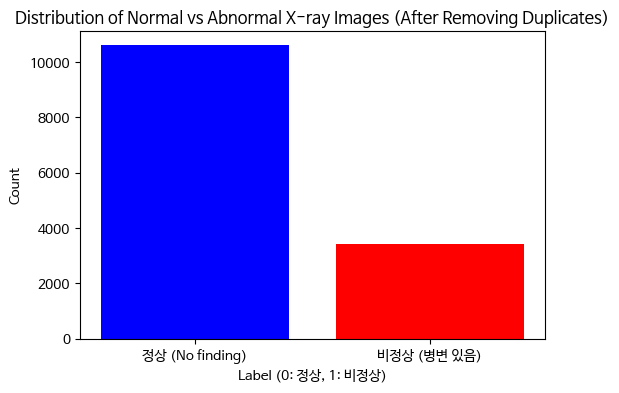

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ‚úÖ CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/filtered_data/filtered_train_df.csv"

# ‚úÖ CSV ÌååÏùº Î°úÎìú
df = pd.read_csv(csv_path)

# ‚úÖ Ï†ïÏÉÅ(0) / ÎπÑÏ†ïÏÉÅ(1) Î∂ÑÎ•ò (class_name Í∏∞Ï§Ä)
df["label"] = df["class_name"].apply(lambda x: 0 if x == "No finding" else 1)

# ‚úÖ Ï§ëÎ≥µ Ï†úÍ±∞ (image_id Í∏∞Ï§ÄÏúºÎ°ú Ìïú Î≤àÎßå ÎÇ®ÍπÄ)
df_unique = df.drop_duplicates(subset=["image_id"])

# ‚úÖ Ï†ïÏÉÅ(0) / ÎπÑÏ†ïÏÉÅ(1) Í∞úÏàò ÌôïÏù∏
label_counts = df_unique["label"].value_counts()
print("(Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ) Ï†ïÏÉÅ(0) vs ÎπÑÏ†ïÏÉÅ(1) Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:\n", label_counts)

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index.astype(str), label_counts.values, color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Ï†ïÏÉÅ (No finding)", "ÎπÑÏ†ïÏÉÅ (Î≥ëÎ≥Ä ÏûàÏùå)"])
plt.xlabel("Label (0: Ï†ïÏÉÅ, 1: ÎπÑÏ†ïÏÉÅ)")
plt.ylabel("Count")
plt.title("Distribution of Normal vs Abnormal X-ray Images (After Removing Duplicates)")
plt.show()

üîç (Îã§Ïö¥ÏÉòÌîåÎßÅ ÌõÑ) Ï†ïÏÉÅ(0) vs ÎπÑÏ†ïÏÉÅ(1) Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:
 label
0    3412
1    3412
Name: count, dtype: int64


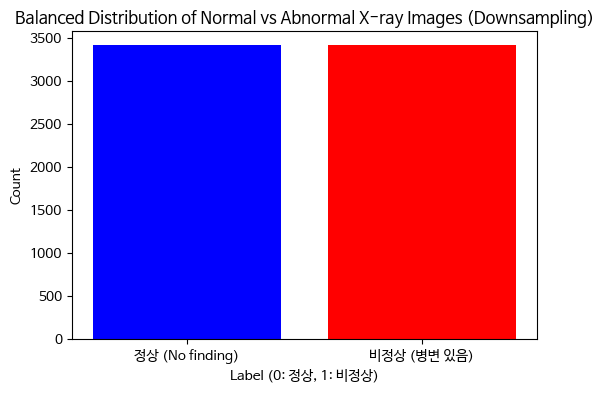

‚úÖ Îã§Ïö¥ÏÉòÌîåÎßÅ ÏôÑÎ£å! ÏÉàÎ°úÏö¥ CSV Ï†ÄÏû•Îê®: /content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/balanced_train_df.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ‚úÖ CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/filtered_data/filtered_train_df.csv"

# ‚úÖ CSV ÌååÏùº Î°úÎìú
df = pd.read_csv(csv_path)

# ‚úÖ Ï†ïÏÉÅ(0) / ÎπÑÏ†ïÏÉÅ(1) Î∂ÑÎ•ò (class_name Í∏∞Ï§Ä)
df["label"] = df["class_name"].apply(lambda x: 0 if x == "No finding" else 1)

# ‚úÖ Ï§ëÎ≥µ Ï†úÍ±∞ (image_id Í∏∞Ï§ÄÏúºÎ°ú Ìïú Î≤àÎßå ÎÇ®ÍπÄ)
df_unique = df.drop_duplicates(subset=["image_id"])

# ‚úÖ Ï†ïÏÉÅ(0)Í≥º ÎπÑÏ†ïÏÉÅ(1) Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
normal_df = df_unique[df_unique["label"] == 0]  # Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞
abnormal_df = df_unique[df_unique["label"] == 1]  # ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞

# ‚úÖ Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò(3,412Í∞ú)Î°ú Îã§Ïö¥ÏÉòÌîåÎßÅ
normal_df_sampled = normal_df.sample(n=len(abnormal_df), random_state=42)  # 3,412Í∞úÎ°ú ÏÉòÌîåÎßÅ

# ‚úÖ Îã§Ïö¥ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± (Ï†ïÏÉÅ 3,412 + ÎπÑÏ†ïÏÉÅ 3,412)
balanced_df = pd.concat([normal_df_sampled, abnormal_df]).sample(frac=1, random_state=42)  # Îç∞Ïù¥ÌÑ∞ ÏÑûÍ∏∞

# ‚úÖ ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
label_counts = balanced_df["label"].value_counts()
print("üîç (Îã§Ïö¥ÏÉòÌîåÎßÅ ÌõÑ) Ï†ïÏÉÅ(0) vs ÎπÑÏ†ïÏÉÅ(1) Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:\n", label_counts)

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index.astype(str), label_counts.values, color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Ï†ïÏÉÅ (No finding)", "ÎπÑÏ†ïÏÉÅ (Î≥ëÎ≥Ä ÏûàÏùå)"])
plt.xlabel("Label (0: Ï†ïÏÉÅ, 1: ÎπÑÏ†ïÏÉÅ)")
plt.ylabel("Count")
plt.title("Balanced Distribution of Normal vs Abnormal X-ray Images (Downsampling)")
plt.show()

# ‚úÖ Îã§Ïö¥ÏÉòÌîåÎßÅÎêú CSV Ï†ÄÏû•
balanced_csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/balanced_train_df.csv"
balanced_df.to_csv(balanced_csv_path, index=False)

print(f"‚úÖ Îã§Ïö¥ÏÉòÌîåÎßÅ ÏôÑÎ£å! ÏÉàÎ°úÏö¥ CSV Ï†ÄÏû•Îê®: {balanced_csv_path}")

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# ‚úÖ CSV ÌååÏùº Î°úÎìú
csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/data/filtered_data/balanced_train_df.csv"
df = pd.read_csv(csv_path)

# ‚úÖ Ï§ëÎ≥µ Ï†úÍ±∞ (image_id Í∏∞Ï§ÄÏúºÎ°ú Ìïú Î≤àÎßå ÎÇ®ÍπÄ)
df_unique = df.drop_duplicates(subset=["image_id"])

# ‚úÖ Train(80%) / Temp(20%) Î∂ÑÌï†
train_df, temp_df = train_test_split(df_unique, test_size=0.2, random_state=42, stratify=df_unique["label"])

# ‚úÖ Validation(10%) / Test(10%) Î∂ÑÌï†
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df["label"])

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
print(f"üîπ Train Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(train_df)}")
print(f"üîπ Validation Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(val_df)}")
print(f"üîπ Test Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(test_df)}")

# ‚úÖ Î∂ÑÌï†Îêú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
train_csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/train_data.csv"
val_csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/val_data.csv"
test_csv_path = "/content/drive/MyDrive/ÌîÑÎ°úÏ†ùÌä∏/test_data.csv"

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print("‚úÖ Train, Validation, Test Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å!")
print(f"‚úÖ Train CSV: {train_csv_path}")
print(f"‚úÖ Validation CSV: {val_csv_path}")
print(f"‚úÖ Test CSV: {test_csv_path}")
